In [26]:
from textblob import TextBlob
import numpy as np
import pandas as pd
import nltk
pd.options.display.max_columns = None
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('/Users/manu/Analisis Predictivo/Exámen 2/df.csv')
df.head(3)

#Divido entre val y train para probar los modelos.
train = df[df['review_scores_rating'].notnull()]
val = df[df['review_scores_rating'].isnull()]

In [27]:
val.reset_index(drop=True, inplace=True)

## Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor
X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

# Crear el regresor Random Forest
random_forest = RandomForestRegressor()

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: {:.2f}".format(mse))

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2): {:.2f}".format(r2))

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
for param, value in best_params.items():
    print("{}: {}".format(param, value))


Error cuadrático medio: 0.01
Coeficiente de determinación (R^2): 0.70
Mejores hiperparámetros:
max_depth: 15
max_features: sqrt
min_samples_leaf: 2
min_samples_split: 4
n_estimators: 300


Características más importantes:
                                        Feature  Importance
37                       review_scores_accuracy    0.149209
42                          review_scores_value    0.107221
38                    review_scores_cleanliness    0.104252
40                  review_scores_communication    0.084524
39                        review_scores_checkin    0.056160
..                                          ...         ...
47  calculated_host_listings_count_shared_rooms    0.000973
34                       number_of_reviews_l30d    0.000664
61                               bathrooms_type    0.000290
27                             has_availability    0.000003
10                         host_has_profile_pic    0.000000

[63 rows x 2 columns]


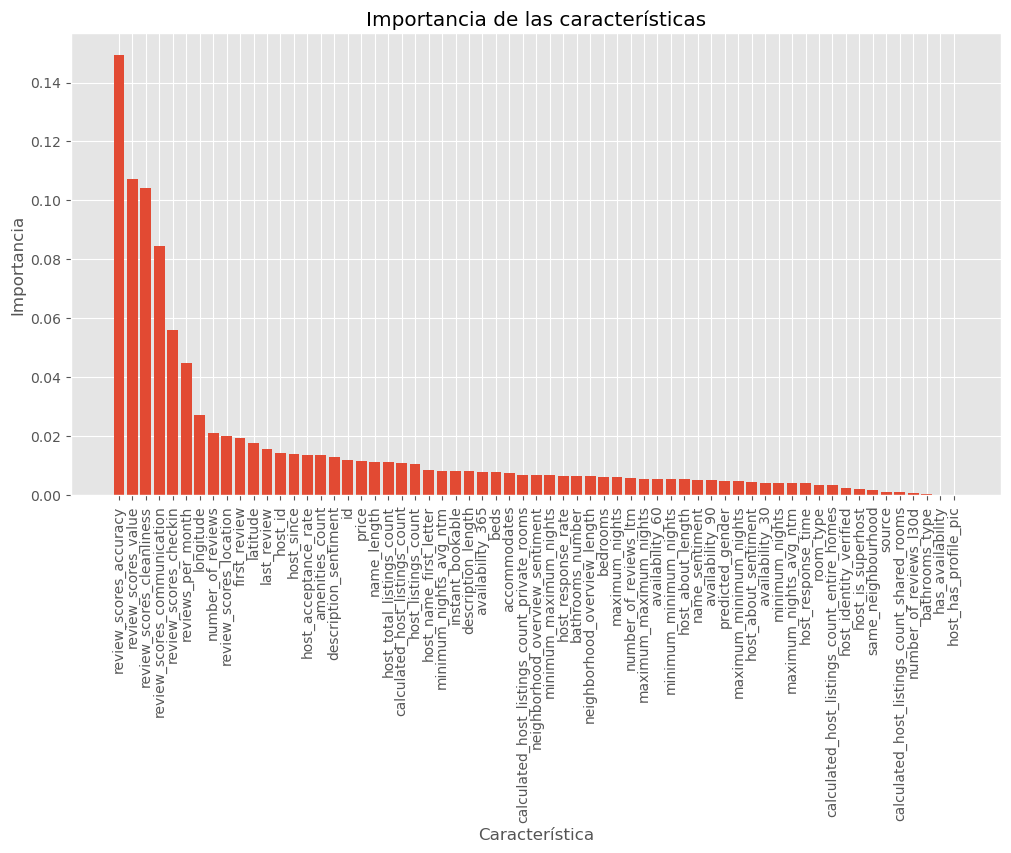

In [88]:
import matplotlib.pyplot as plt

# Obtener las características más importantes
importances = best_model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Crear un DataFrame con las características y sus importancias
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print("Características más importantes:")
print(importances_df)

# Visualizar las importancias de las características
plt.figure(figsize=(12, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()


In [ ]:
X_val = val.drop('review_scores_rating', axis=1)
y_pred_val = best_model.predict(X_val)
submission = pd.DataFrame({'id': val['id'], 'review_scores_rating': y_pred_val})
submission.to_csv('submission.csv', index=False)

## Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingRegressor


X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)

# Crear el regresor Gradient Boosting
gradient_boosting = GradientBoostingRegressor()

# Definir los hiperparámetros a ajustar
param_grid = {
    "n_estimators": [50, 100, 200],  # Número de estimadores (árboles)
    "learning_rate": [0.1, 0.05, 0.01],  # Tasa de aprendizaje
    "max_depth": [3, 4, 5],  # Profundidad máxima del árbol
    "min_samples_split": [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    "min_samples_leaf": [1, 2, 4]  # Número mínimo de muestras requeridas en cada hoja
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(gradient_boosting, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: {:.2f}".format(mse))

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2): {:.2f}".format(r2))

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
for param, value in best_params.items():
    print("{}: {}".format(param, value))

Error cuadrático medio: 0.02
Coeficiente de determinación (R^2): 0.63
Mejores hiperparámetros:
learning_rate: 0.01
max_depth: 3
min_samples_leaf: 2
min_samples_split: 2
n_estimators: 200


Características más importantes:
                                        Feature  Importance
37                       review_scores_accuracy    0.149209
42                          review_scores_value    0.107221
38                    review_scores_cleanliness    0.104252
40                  review_scores_communication    0.084524
39                        review_scores_checkin    0.056160
..                                          ...         ...
47  calculated_host_listings_count_shared_rooms    0.000973
34                       number_of_reviews_l30d    0.000664
61                               bathrooms_type    0.000290
27                             has_availability    0.000003
10                         host_has_profile_pic    0.000000

[63 rows x 2 columns]


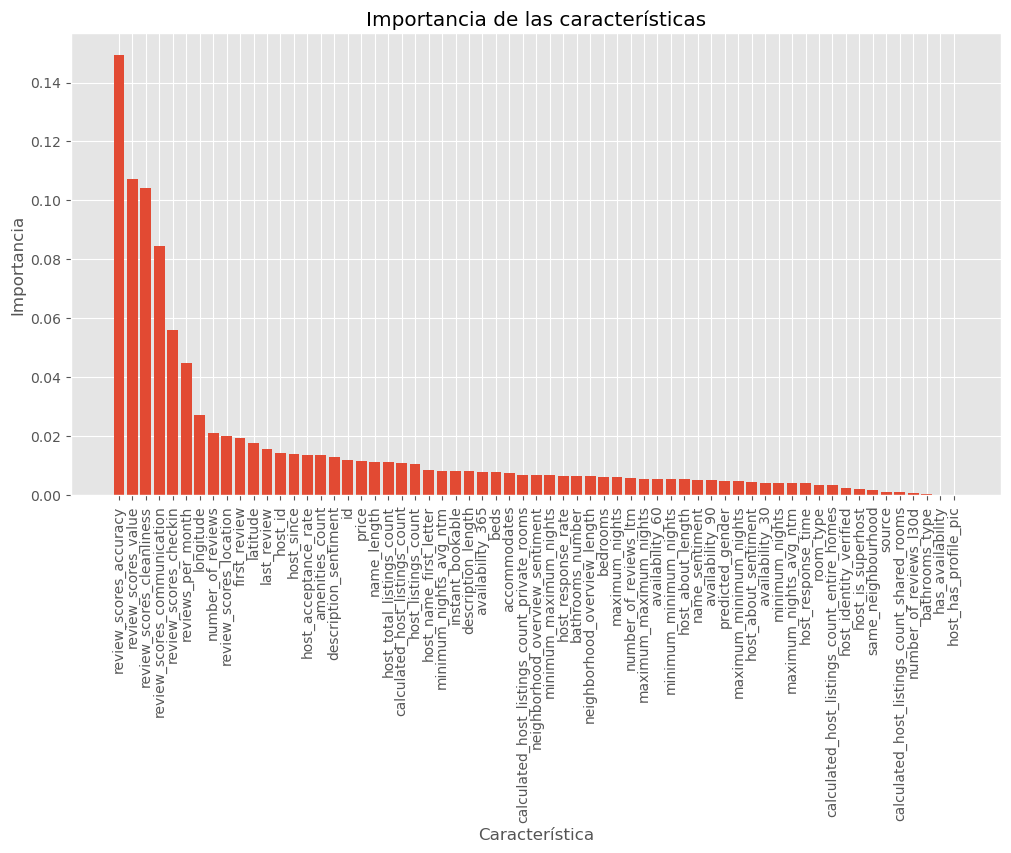

In [89]:
import matplotlib.pyplot as plt

# Obtener las características más importantes
importances = best_model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Crear un DataFrame con las características y sus importancias
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print("Características más importantes:")
print(importances_df)

# Visualizar las importancias de las características
plt.figure(figsize=(12, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()


## Extra Tree Regressor

In [95]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Crear el regresor Extra Trees
extra_trees = ExtraTreesRegressor()

# Realizar la búsqueda exhaustiva de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(extra_trees, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: {:.2f}".format(mse))

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2): {:.2f}".format(r2))

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
for param, value in best_params.items():
    print("{}: {}".format(param, value))


Error cuadrático medio: 0.01
Coeficiente de determinación (R^2): 0.75
Mejores hiperparámetros:
max_depth: 20
min_samples_leaf: 4
min_samples_split: 10
n_estimators: 150


Características más importantes:
                                        Feature  Importance
37                       review_scores_accuracy    0.256065
42                          review_scores_value    0.178598
38                    review_scores_cleanliness    0.132863
40                  review_scores_communication    0.115481
39                        review_scores_checkin    0.059239
..                                          ...         ...
34                       number_of_reviews_l30d    0.000458
61                               bathrooms_type    0.000384
47  calculated_host_listings_count_shared_rooms    0.000078
10                         host_has_profile_pic    0.000000
27                             has_availability    0.000000

[63 rows x 2 columns]


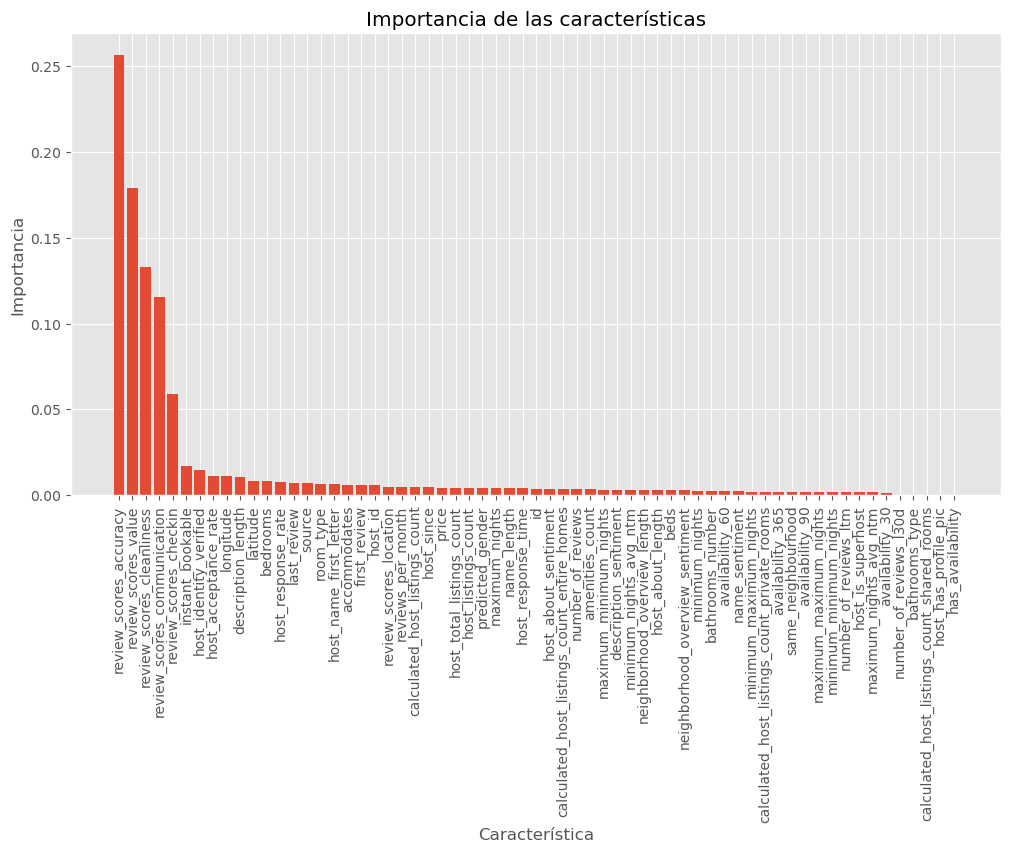

In [96]:
import matplotlib.pyplot as plt

# Obtener las características más importantes
importances = best_model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Crear un DataFrame con las características y sus importancias
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print("Características más importantes:")
print(importances_df)

# Visualizar las importancias de las características
plt.figure(figsize=(12, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()


Error cuadrático medio: 0.01
Coeficiente de determinación (R^2): 0.75
Mejores hiperparámetros:
max_depth: 20
min_samples_leaf: 4
min_samples_split: 10
n_estimators: 150

In [112]:
from sklearn.ensemble import ExtraTreesRegressor

X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)

# Definir los mejores hiperparámetros obtenidos
best_params = {
    'n_estimators': 150,
    'max_depth': 20,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

# Crear el regresor Extra Trees con los mejores hiperparámetros
best_model = ExtraTreesRegressor(**best_params)

# Entrenar el modelo con la base de datos completa 'train'
best_model.fit(X_train, y_train)

# Predecir en la base 'val' sin la columna 'review_scores_rating'
X_val = val.drop('review_scores_rating', axis=1)
y_pred = best_model.predict(X_val)

# Crear un DataFrame con las predicciones
y_pred_df = pd.DataFrame(y_pred, columns=['review_scores_rating'])

# Concatenar las predicciones con la columna 'id' de la base 'val'
submission = pd.concat([val['id'], y_pred_df], axis=1)

# Imprimir el resultado
submission

id  review_scores_rating
0     568520730880917893              4.996275
1     568523400177884625              4.970504
2     568561397403760678              4.009348
3     568683128219348239              4.995901
4     570029413851129083              4.893519
...                  ...                   ...
1228              794322              4.733997
1229              800723              4.793696
1230              801544              4.571683
1231              802052              4.917053
1232              805330              4.943835

[1233 rows x 2 columns]

In [113]:
submission.to_csv('submission.csv', index=False)

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 150, 200, 210, 125, 140, 160, 175, 190],
    'max_depth': [None, 15, 20, 25, 18, 19, 21, 22],
    'min_samples_split': [2, 5, 10, 15, 8, 9, 11, 12, 14],
    'min_samples_leaf': [1, 2, 4, 6, 8, 3, 5, 6, 7, 9]
}

# Crear el regresor Extra Trees
extra_trees = ExtraTreesRegressor()

# Realizar la búsqueda exhaustiva de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(extra_trees, param_grid, scoring='r2', cv=5)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: {:.2f}".format(mse))

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2): {:.2f}".format(r2))

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
for param, value in best_params.items():
    print("{}: {}".format(param, value))


Error cuadrático medio: 0.04
Coeficiente de determinación (R^2): 0.45
Mejores hiperparámetros:
max_depth: 22
min_samples_leaf: 8
min_samples_split: 9
n_estimators: 140


In [10]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV

X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': (100, 210),
    'max_depth': (1, 25),
    'min_samples_split': (2, 15),
    'min_samples_leaf': (1, 9,  'uniform')
}

# Crear el regresor Extra Trees
extra_trees = ExtraTreesRegressor()

# Realizar la búsqueda bayesiana de hiperparámetros utilizando BayesSearchCV
bayes_search = BayesSearchCV(
    extra_trees,
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Realizar la búsqueda de hiperparámetros
bayes_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params = bayes_search.best_params_
best_model = bayes_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: {:.2f}".format(mse))

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2): {:.2f}".format(r2))

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
for param, value in best_params.items():
    print("{}: {}".format(param, value))


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

## LightGBM

In [12]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the objective function for optimization
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'num_leaves': trial.suggest_int('num_leaves', 100, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1e-2),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1e-2),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 30)
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Get the best parameters and best model
best_params = study.best_params
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2): {:.2f}".format(r2))

# Print the best parameters found
print("Best Parameters:")
for param, value in best_params.items():
    print("{}: {}".format(param, value))



[I 2023-06-04 14:59:03,065] A new study created in memory with name: no-name-fa08bfd2-e774-4e8c-a8d2-ae24374b026d
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:23: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0.

[LightGBM] [Warning] bagging_fraction is set=0.9207872651499509, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9207872651499509
[LightGBM] [Warning] feature_fraction is set=0.6115978252144827, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6115978252144827
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00036453133252290203, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00036453133252290203
[LightGBM] [Warning] lambda_l1 is set=1.2959751093037083e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2959751093037083e-08


[I 2023-06-04 14:59:28,983] Trial 0 finished with value: 0.05890024129043779 and parameters: {'n_estimators': 2631, 'max_depth': 15, 'num_leaves': 217, 'learning_rate': 0.001982537788067306, 'feature_fraction': 0.6115978252144827, 'bagging_fraction': 0.9207872651499509, 'bagging_freq': 1, 'lambda_l1': 1.2959751093037083e-08, 'lambda_l2': 0.00036453133252290203, 'min_child_samples': 11}. Best is trial 0 with value: 0.05890024129043779.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.9414103997859066, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9414103997859066
[LightGBM] [Warning] feature_fraction is set=0.6962964175888364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6962964175888364
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0006057080680622315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006057080680622315
[LightGBM] [Warning] lambda_l1 is set=3.3020676704529034e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3020676704529034e-06


[I 2023-06-04 14:59:32,816] Trial 1 finished with value: 0.0635887210142252 and parameters: {'n_estimators': 2033, 'max_depth': 9, 'num_leaves': 126, 'learning_rate': 0.006254987799968822, 'feature_fraction': 0.6962964175888364, 'bagging_fraction': 0.9414103997859066, 'bagging_freq': 2, 'lambda_l1': 3.3020676704529034e-06, 'lambda_l2': 0.0006057080680622315, 'min_child_samples': 15}. Best is trial 0 with value: 0.05890024129043779.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

[LightGBM] [Warning] bagging_fraction is set=0.8053901326586523, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8053901326586523
[LightGBM] [Warning] feature_fraction is set=0.8712617177396574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8712617177396574
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.0003803041465919342, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003803041465919342
[LightGBM] [Warning] lambda_l1 is set=0.0004602890385362217, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004602890385362217


[I 2023-06-04 14:59:43,729] Trial 2 finished with value: 0.05764460860828255 and parameters: {'n_estimators': 2917, 'max_depth': 12, 'num_leaves': 267, 'learning_rate': 0.0018019807388264203, 'feature_fraction': 0.8712617177396574, 'bagging_fraction': 0.8053901326586523, 'bagging_freq': 1, 'lambda_l1': 0.0004602890385362217, 'lambda_l2': 0.0003803041465919342, 'min_child_samples': 22}. Best is trial 2 with value: 0.05764460860828255.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.7530412619009197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7530412619009197
[LightGBM] [Warning] feature_fraction is set=0.800092227586476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.800092227586476
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.001638647287192634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001638647287192634
[LightGBM] [Warning] lambda_l1 is set=0.0003930597203996509, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003930597203996509


[I 2023-06-04 14:59:46,056] Trial 3 finished with value: 0.06337614702079915 and parameters: {'n_estimators': 1053, 'max_depth': 5, 'num_leaves': 122, 'learning_rate': 0.0015835266384870996, 'feature_fraction': 0.800092227586476, 'bagging_fraction': 0.7530412619009197, 'bagging_freq': 10, 'lambda_l1': 0.0003930597203996509, 'lambda_l2': 0.001638647287192634, 'min_child_samples': 28}. Best is trial 2 with value: 0.05764460860828255.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

[LightGBM] [Warning] bagging_fraction is set=0.5676851469669817, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5676851469669817
[LightGBM] [Warning] feature_fraction is set=0.6918185068470333, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6918185068470333
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=1.77155863418031e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.77155863418031e-07
[LightGBM] [Warning] lambda_l1 is set=3.7255206080048746e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7255206080048746e-06


[I 2023-06-04 14:59:55,144] Trial 4 finished with value: 0.0603390868049666 and parameters: {'n_estimators': 1333, 'max_depth': 15, 'num_leaves': 181, 'learning_rate': 0.005605966176307408, 'feature_fraction': 0.6918185068470333, 'bagging_fraction': 0.5676851469669817, 'bagging_freq': 10, 'lambda_l1': 3.7255206080048746e-06, 'lambda_l2': 1.77155863418031e-07, 'min_child_samples': 10}. Best is trial 2 with value: 0.05764460860828255.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[LightGBM] [Warning] bagging_fraction is set=0.8589288374807875, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8589288374807875
[LightGBM] [Warning] feature_fraction is set=0.7979691376635986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7979691376635986
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.4867262869911433e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4867262869911433e-07
[LightGBM] [Warning] lambda_l1 is set=1.905556097254892e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.905556097254892e-07


[I 2023-06-04 15:00:17,418] Trial 5 finished with value: 0.05771070089414814 and parameters: {'n_estimators': 2532, 'max_depth': 19, 'num_leaves': 132, 'learning_rate': 0.0011914038860542503, 'feature_fraction': 0.7979691376635986, 'bagging_fraction': 0.8589288374807875, 'bagging_freq': 1, 'lambda_l1': 1.905556097254892e-07, 'lambda_l2': 3.4867262869911433e-07, 'min_child_samples': 11}. Best is trial 2 with value: 0.05764460860828255.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5214093037882583, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5214093037882583
[LightGBM] [Warning] feature_fraction is set=0.6045003834681006, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6045003834681006
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.0023889244346342294, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0023889244346342294
[LightGBM] [Warning] lambda_l1 is set=0.0001318391463402665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001318391463402665


[I 2023-06-04 15:00:20,649] Trial 6 finished with value: 0.0609428817862062 and parameters: {'n_estimators': 1714, 'max_depth': 8, 'num_leaves': 113, 'learning_rate': 0.002116822450420433, 'feature_fraction': 0.6045003834681006, 'bagging_fraction': 0.5214093037882583, 'bagging_freq': 1, 'lambda_l1': 0.0001318391463402665, 'lambda_l2': 0.0023889244346342294, 'min_child_samples': 26}. Best is trial 2 with value: 0.05764460860828255.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.co

[LightGBM] [Warning] bagging_fraction is set=0.8128678862744356, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8128678862744356
[LightGBM] [Warning] feature_fraction is set=0.9975502629912607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9975502629912607
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.3435326453415657e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3435326453415657e-08
[LightGBM] [Warning] lambda_l1 is set=2.684301245498798e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.684301245498798e-08


[I 2023-06-04 15:00:24,445] Trial 7 finished with value: 0.05360803426272245 and parameters: {'n_estimators': 2567, 'max_depth': 8, 'num_leaves': 188, 'learning_rate': 0.00991240719960816, 'feature_fraction': 0.9975502629912607, 'bagging_fraction': 0.8128678862744356, 'bagging_freq': 8, 'lambda_l1': 2.684301245498798e-08, 'lambda_l2': 1.3435326453415657e-08, 'min_child_samples': 23}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

[LightGBM] [Warning] bagging_fraction is set=0.9249539163028302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9249539163028302
[LightGBM] [Warning] feature_fraction is set=0.5867905068620622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5867905068620622
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.1972902261307589e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1972902261307589e-06
[LightGBM] [Warning] lambda_l1 is set=8.326182540534649e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.326182540534649e-06


[I 2023-06-04 15:00:36,608] Trial 8 finished with value: 0.05916377862500239 and parameters: {'n_estimators': 2885, 'max_depth': 19, 'num_leaves': 143, 'learning_rate': 0.004818999955826543, 'feature_fraction': 0.5867905068620622, 'bagging_fraction': 0.9249539163028302, 'bagging_freq': 4, 'lambda_l1': 8.326182540534649e-06, 'lambda_l2': 1.1972902261307589e-06, 'min_child_samples': 27}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.9655724451649089, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9655724451649089
[LightGBM] [Warning] feature_fraction is set=0.8114785345721349, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8114785345721349
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=1.6732308986959315e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6732308986959315e-05
[LightGBM] [Warning] lambda_l1 is set=1.820465454629467e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.820465454629467e-06


[I 2023-06-04 15:00:50,670] Trial 9 finished with value: 0.059762726666581695 and parameters: {'n_estimators': 1362, 'max_depth': 20, 'num_leaves': 273, 'learning_rate': 0.005017109239521602, 'feature_fraction': 0.8114785345721349, 'bagging_fraction': 0.9655724451649089, 'bagging_freq': 10, 'lambda_l1': 1.820465454629467e-06, 'lambda_l2': 1.6732308986959315e-05, 'min_child_samples': 10}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6689731754712056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6689731754712056
[LightGBM] [Warning] feature_fraction is set=0.9885385974860316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9885385974860316
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.0360258473144175e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0360258473144175e-08
[LightGBM] [Warning] lambda_l1 is set=1.5918772199577528e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5918772199577528e-08


[I 2023-06-04 15:00:52,863] Trial 10 finished with value: 0.0559198234767923 and parameters: {'n_estimators': 2232, 'max_depth': 5, 'num_leaves': 220, 'learning_rate': 0.009606739661447391, 'feature_fraction': 0.9885385974860316, 'bagging_fraction': 0.6689731754712056, 'bagging_freq': 7, 'lambda_l1': 1.5918772199577528e-08, 'lambda_l2': 1.0360258473144175e-08, 'min_child_samples': 21}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.6696459227461203, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6696459227461203
[LightGBM] [Warning] feature_fraction is set=0.9855514076343688, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9855514076343688
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.2002529867747937e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2002529867747937e-08
[LightGBM] [Warning] lambda_l1 is set=1.2546838400597113e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2546838400597113e-08


[I 2023-06-04 15:00:54,860] Trial 11 finished with value: 0.056029406626362764 and parameters: {'n_estimators': 2247, 'max_depth': 5, 'num_leaves': 217, 'learning_rate': 0.008846176454801886, 'feature_fraction': 0.9855514076343688, 'bagging_fraction': 0.6696459227461203, 'bagging_freq': 7, 'lambda_l1': 1.2546838400597113e-08, 'lambda_l2': 1.2002529867747937e-08, 'min_child_samples': 21}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6820556265809377, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6820556265809377
[LightGBM] [Warning] feature_fraction is set=0.9971784340841315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9971784340841315
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.566664926956059e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.566664926956059e-08
[LightGBM] [Warning] lambda_l1 is set=8.840337295300344e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.840337295300344e-08


[I 2023-06-04 15:00:58,729] Trial 12 finished with value: 0.05708113172796574 and parameters: {'n_estimators': 2317, 'max_depth': 8, 'num_leaves': 182, 'learning_rate': 0.009390137789194135, 'feature_fraction': 0.9971784340841315, 'bagging_fraction': 0.6820556265809377, 'bagging_freq': 7, 'lambda_l1': 8.840337295300344e-08, 'lambda_l2': 1.566664926956059e-08, 'min_child_samples': 16}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[LightGBM] [Warning] bagging_fraction is set=0.6996985063012201, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6996985063012201
[LightGBM] [Warning] feature_fraction is set=0.920343861358925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.920343861358925
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.555316327156489e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.555316327156489e-08
[LightGBM] [Warning] lambda_l1 is set=1.9744123102595443e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9744123102595443e-07


[I 2023-06-04 15:01:04,103] Trial 13 finished with value: 0.05473086643663055 and parameters: {'n_estimators': 1862, 'max_depth': 10, 'num_leaves': 246, 'learning_rate': 0.009826353491740046, 'feature_fraction': 0.920343861358925, 'bagging_fraction': 0.6996985063012201, 'bagging_freq': 7, 'lambda_l1': 1.9744123102595443e-07, 'lambda_l2': 1.555316327156489e-08, 'min_child_samples': 18}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.8393786005265109, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8393786005265109
[LightGBM] [Warning] feature_fraction is set=0.9072996551416868, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9072996551416868
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=9.236439046461227e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.236439046461227e-08
[LightGBM] [Warning] lambda_l1 is set=1.8995138830082154e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8995138830082154e-07


[I 2023-06-04 15:01:09,846] Trial 14 finished with value: 0.057333924239454166 and parameters: {'n_estimators': 1799, 'max_depth': 10, 'num_leaves': 300, 'learning_rate': 0.003240061465317526, 'feature_fraction': 0.9072996551416868, 'bagging_fraction': 0.8393786005265109, 'bagging_freq': 8, 'lambda_l1': 1.8995138830082154e-07, 'lambda_l2': 9.236439046461227e-08, 'min_child_samples': 24}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7501650750846519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7501650750846519
[LightGBM] [Warning] feature_fraction is set=0.9165021853780361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9165021853780361
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.6392555900011138e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6392555900011138e-06
[LightGBM] [Warning] lambda_l1 is set=0.004031594237421286, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004031594237421286


[I 2023-06-04 15:01:14,217] Trial 15 finished with value: 0.06011542056076344 and parameters: {'n_estimators': 1817, 'max_depth': 12, 'num_leaves': 254, 'learning_rate': 0.007082691153864143, 'feature_fraction': 0.9165021853780361, 'bagging_fraction': 0.7501650750846519, 'bagging_freq': 5, 'lambda_l1': 0.004031594237421286, 'lambda_l2': 1.6392555900011138e-06, 'min_child_samples': 17}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.8087695280065499, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8087695280065499
[LightGBM] [Warning] feature_fraction is set=0.9318593169750805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9318593169750805
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=6.577602039339007e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.577602039339007e-08
[LightGBM] [Warning] lambda_l1 is set=5.989564391954239e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.989564391954239e-07


[I 2023-06-04 15:01:20,240] Trial 16 finished with value: 0.057050534989181 and parameters: {'n_estimators': 2637, 'max_depth': 10, 'num_leaves': 167, 'learning_rate': 0.0036316073732643854, 'feature_fraction': 0.9318593169750805, 'bagging_fraction': 0.8087695280065499, 'bagging_freq': 8, 'lambda_l1': 5.989564391954239e-07, 'lambda_l2': 6.577602039339007e-08, 'min_child_samples': 30}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[LightGBM] [Warning] bagging_fraction is set=0.9990646180721909, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9990646180721909
[LightGBM] [Warning] feature_fraction is set=0.5051199111126429, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5051199111126429
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=4.396507852167117e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.396507852167117e-08
[LightGBM] [Warning] lambda_l1 is set=4.399889944876247e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.399889944876247e-08


[I 2023-06-04 15:01:22,431] Trial 17 finished with value: 0.06670387631819151 and parameters: {'n_estimators': 1511, 'max_depth': 7, 'num_leaves': 234, 'learning_rate': 0.007278691015010548, 'feature_fraction': 0.5051199111126429, 'bagging_fraction': 0.9990646180721909, 'bagging_freq': 5, 'lambda_l1': 4.399889944876247e-08, 'lambda_l2': 4.396507852167117e-08, 'min_child_samples': 18}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[LightGBM] [Warning] bagging_fraction is set=0.7079607685161626, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7079607685161626
[LightGBM] [Warning] feature_fraction is set=0.8622686370923296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8622686370923296
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=4.768731651981748e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.768731651981748e-07
[LightGBM] [Warning] lambda_l1 is set=6.411718071441469e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.411718071441469e-07


[I 2023-06-04 15:01:29,189] Trial 18 finished with value: 0.06287804854695478 and parameters: {'n_estimators': 2040, 'max_depth': 14, 'num_leaves': 242, 'learning_rate': 0.007755416221929807, 'feature_fraction': 0.8622686370923296, 'bagging_fraction': 0.7079607685161626, 'bagging_freq': 8, 'lambda_l1': 6.411718071441469e-07, 'lambda_l2': 4.768731651981748e-07, 'min_child_samples': 14}. Best is trial 7 with value: 0.05360803426272245.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.6330202448689208, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6330202448689208
[LightGBM] [Warning] feature_fraction is set=0.9464876004414551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9464876004414551
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=3.643609358924796e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.643609358924796e-08
[LightGBM] [Warning] lambda_l1 is set=5.850273086970772e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.850273086970772e-08


[I 2023-06-04 15:01:33,446] Trial 19 finished with value: 0.05191783975683397 and parameters: {'n_estimators': 2435, 'max_depth': 11, 'num_leaves': 196, 'learning_rate': 0.00965566060084111, 'feature_fraction': 0.9464876004414551, 'bagging_fraction': 0.6330202448689208, 'bagging_freq': 6, 'lambda_l1': 5.850273086970772e-08, 'lambda_l2': 3.643609358924796e-08, 'min_child_samples': 19}. Best is trial 19 with value: 0.05191783975683397.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.6324304604417493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6324304604417493
[LightGBM] [Warning] feature_fraction is set=0.9582015913602298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9582015913602298
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=5.4271627229864686e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.4271627229864686e-08
[LightGBM] [Warning] lambda_l1 is set=4.092747541364251e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.092747541364251e-08


[I 2023-06-04 15:01:41,132] Trial 20 finished with value: 0.05629194087891609 and parameters: {'n_estimators': 2467, 'max_depth': 17, 'num_leaves': 164, 'learning_rate': 0.004210005821124203, 'feature_fraction': 0.9582015913602298, 'bagging_fraction': 0.6324304604417493, 'bagging_freq': 3, 'lambda_l1': 4.092747541364251e-08, 'lambda_l2': 5.4271627229864686e-08, 'min_child_samples': 24}. Best is trial 19 with value: 0.05191783975683397.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6004287390083733, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6004287390083733
[LightGBM] [Warning] feature_fraction is set=0.9462476351396304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9462476351396304
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=3.3173259962474236e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3173259962474236e-08
[LightGBM] [Warning] lambda_l1 is set=1.1392070280950928e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1392070280950928e-07


[I 2023-06-04 15:01:45,687] Trial 21 finished with value: 0.05143460427720188 and parameters: {'n_estimators': 2745, 'max_depth': 11, 'num_leaves': 196, 'learning_rate': 0.00987598072704114, 'feature_fraction': 0.9462476351396304, 'bagging_fraction': 0.6004287390083733, 'bagging_freq': 6, 'lambda_l1': 1.1392070280950928e-07, 'lambda_l2': 3.3173259962474236e-08, 'min_child_samples': 19}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6133518781449473, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6133518781449473
[LightGBM] [Warning] feature_fraction is set=0.9507988463112715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9507988463112715
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=3.832311762888078e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.832311762888078e-08
[LightGBM] [Warning] lambda_l1 is set=4.55790309788594e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.55790309788594e-08


[I 2023-06-04 15:01:52,048] Trial 22 finished with value: 0.053690390114553906 and parameters: {'n_estimators': 2794, 'max_depth': 13, 'num_leaves': 192, 'learning_rate': 0.0064530807249054255, 'feature_fraction': 0.9507988463112715, 'bagging_fraction': 0.6133518781449473, 'bagging_freq': 6, 'lambda_l1': 4.55790309788594e-08, 'lambda_l2': 3.832311762888078e-08, 'min_child_samples': 19}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5894100116668131, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5894100116668131
[LightGBM] [Warning] feature_fraction is set=0.8822381033095692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8822381033095692
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.3199453790226265e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3199453790226265e-07
[LightGBM] [Warning] lambda_l1 is set=1.0201211680387092e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0201211680387092e-08


[I 2023-06-04 15:01:56,481] Trial 23 finished with value: 0.05468508451616739 and parameters: {'n_estimators': 2735, 'max_depth': 11, 'num_leaves': 158, 'learning_rate': 0.008200766761681192, 'feature_fraction': 0.8822381033095692, 'bagging_fraction': 0.5894100116668131, 'bagging_freq': 6, 'lambda_l1': 1.0201211680387092e-08, 'lambda_l2': 1.3199453790226265e-07, 'min_child_samples': 23}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5000222584924006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5000222584924006
[LightGBM] [Warning] feature_fraction is set=0.9582120291320205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9582120291320205
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=3.141857035993111e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.141857035993111e-08
[LightGBM] [Warning] lambda_l1 is set=6.610704657937198e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.610704657937198e-07


[I 2023-06-04 15:01:59,337] Trial 24 finished with value: 0.05529824051974164 and parameters: {'n_estimators': 3000, 'max_depth': 7, 'num_leaves': 208, 'learning_rate': 0.007709940501400758, 'feature_fraction': 0.9582120291320205, 'bagging_fraction': 0.5000222584924006, 'bagging_freq': 9, 'lambda_l1': 6.610704657937198e-07, 'lambda_l2': 3.141857035993111e-08, 'min_child_samples': 20}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.621687506077629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.621687506077629
[LightGBM] [Warning] feature_fraction is set=0.9993566311756623, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9993566311756623
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.0136385471895532e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0136385471895532e-07
[LightGBM] [Warning] lambda_l1 is set=7.453451204982656e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.453451204982656e-08


[I 2023-06-04 15:02:04,372] Trial 25 finished with value: 0.06095824303367327 and parameters: {'n_estimators': 2429, 'max_depth': 11, 'num_leaves': 197, 'learning_rate': 0.009959266292600862, 'feature_fraction': 0.9993566311756623, 'bagging_fraction': 0.621687506077629, 'bagging_freq': 4, 'lambda_l1': 7.453451204982656e-08, 'lambda_l2': 2.0136385471895532e-07, 'min_child_samples': 13}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5603073382458054, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5603073382458054
[LightGBM] [Warning] feature_fraction is set=0.881691831382203, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.881691831382203
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=2.9460649130742363e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9460649130742363e-08
[LightGBM] [Warning] lambda_l1 is set=2.8036740629063763e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8036740629063763e-08


[I 2023-06-04 15:02:08,107] Trial 26 finished with value: 0.056147829473600815 and parameters: {'n_estimators': 2691, 'max_depth': 7, 'num_leaves': 179, 'learning_rate': 0.005909837070928808, 'feature_fraction': 0.881691831382203, 'bagging_fraction': 0.5603073382458054, 'bagging_freq': 6, 'lambda_l1': 2.8036740629063763e-08, 'lambda_l2': 2.9460649130742363e-08, 'min_child_samples': 20}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.54653932820928, subsample=1.0 will be ignored. Current value: bagging_fraction=0.54653932820928
[LightGBM] [Warning] feature_fraction is set=0.9516094688337692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9516094688337692
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=9.920384825559297e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.920384825559297e-08
[LightGBM] [Warning] lambda_l1 is set=1.1326586417074178e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1326586417074178e-07


[I 2023-06-04 15:02:11,839] Trial 27 finished with value: 0.0566285269543445 and parameters: {'n_estimators': 2362, 'max_depth': 9, 'num_leaves': 198, 'learning_rate': 0.007533752680441195, 'feature_fraction': 0.9516094688337692, 'bagging_fraction': 0.54653932820928, 'bagging_freq': 9, 'lambda_l1': 1.1326586417074178e-07, 'lambda_l2': 9.920384825559297e-08, 'min_child_samples': 25}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

[LightGBM] [Warning] bagging_fraction is set=0.593856114023554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.593856114023554
[LightGBM] [Warning] feature_fraction is set=0.8441964954405614, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8441964954405614
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=5.385269318651396e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.385269318651396e-07
[LightGBM] [Warning] lambda_l1 is set=3.0366539835636513e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0366539835636513e-07


[I 2023-06-04 15:02:18,376] Trial 28 finished with value: 0.054478485830217534 and parameters: {'n_estimators': 2586, 'max_depth': 14, 'num_leaves': 149, 'learning_rate': 0.008510168345307465, 'feature_fraction': 0.8441964954405614, 'bagging_fraction': 0.593856114023554, 'bagging_freq': 4, 'lambda_l1': 3.0366539835636513e-07, 'lambda_l2': 5.385269318651396e-07, 'min_child_samples': 23}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6375870445980502, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6375870445980502
[LightGBM] [Warning] feature_fraction is set=0.9036530948657489, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9036530948657489
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=5.007231768802509e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.007231768802509e-06
[LightGBM] [Warning] lambda_l1 is set=2.4781692412411138e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4781692412411138e-08


[I 2023-06-04 15:02:27,101] Trial 29 finished with value: 0.05553119269464918 and parameters: {'n_estimators': 2199, 'max_depth': 16, 'num_leaves': 229, 'learning_rate': 0.006117209056670032, 'feature_fraction': 0.9036530948657489, 'bagging_fraction': 0.6375870445980502, 'bagging_freq': 5, 'lambda_l1': 2.4781692412411138e-08, 'lambda_l2': 5.007231768802509e-06, 'min_child_samples': 17}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.724385161104866, subsample=1.0 will be ignored. Current value: bagging_fraction=0.724385161104866
[LightGBM] [Warning] feature_fraction is set=0.8331686191160826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8331686191160826
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=8.852870822643784e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.852870822643784e-05
[LightGBM] [Warning] lambda_l1 is set=1.0126228608463068e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0126228608463068e-08


[I 2023-06-04 15:02:33,433] Trial 30 finished with value: 0.0542451796942164 and parameters: {'n_estimators': 2812, 'max_depth': 12, 'num_leaves': 209, 'learning_rate': 0.008497779556425342, 'feature_fraction': 0.8331686191160826, 'bagging_fraction': 0.724385161104866, 'bagging_freq': 9, 'lambda_l1': 1.0126228608463068e-08, 'lambda_l2': 8.852870822643784e-05, 'min_child_samples': 22}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.6160705399984111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6160705399984111
[LightGBM] [Warning] feature_fraction is set=0.9333672877090603, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9333672877090603
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=3.167679760987353e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.167679760987353e-08
[LightGBM] [Warning] lambda_l1 is set=5.29487594599479e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.29487594599479e-08


[I 2023-06-04 15:02:41,841] Trial 31 finished with value: 0.053789686760182975 and parameters: {'n_estimators': 2767, 'max_depth': 14, 'num_leaves': 194, 'learning_rate': 0.006540262292212977, 'feature_fraction': 0.9333672877090603, 'bagging_fraction': 0.6160705399984111, 'bagging_freq': 6, 'lambda_l1': 5.29487594599479e-08, 'lambda_l2': 3.167679760987353e-08, 'min_child_samples': 19}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6493644313705702, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6493644313705702
[LightGBM] [Warning] feature_fraction is set=0.9580161172241018, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9580161172241018
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=2.2116154079449514e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2116154079449514e-08
[LightGBM] [Warning] lambda_l1 is set=3.1767470905656395e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1767470905656395e-08


[I 2023-06-04 15:02:49,251] Trial 32 finished with value: 0.05343397661357273 and parameters: {'n_estimators': 2584, 'max_depth': 13, 'num_leaves': 187, 'learning_rate': 0.006780114459247526, 'feature_fraction': 0.9580161172241018, 'bagging_fraction': 0.6493644313705702, 'bagging_freq': 6, 'lambda_l1': 3.1767470905656395e-08, 'lambda_l2': 2.2116154079449514e-08, 'min_child_samples': 19}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6503851704906383, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6503851704906383
[LightGBM] [Warning] feature_fraction is set=0.9674842997833701, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9674842997833701
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.1822510611008287e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1822510611008287e-08
[LightGBM] [Warning] lambda_l1 is set=2.2194695528347425e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2194695528347425e-08


[I 2023-06-04 15:02:56,826] Trial 33 finished with value: 0.056134691650609476 and parameters: {'n_estimators': 2571, 'max_depth': 13, 'num_leaves': 172, 'learning_rate': 0.009811732075367743, 'feature_fraction': 0.9674842997833701, 'bagging_fraction': 0.6503851704906383, 'bagging_freq': 5, 'lambda_l1': 2.2194695528347425e-08, 'lambda_l2': 1.1822510611008287e-08, 'min_child_samples': 15}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6512308224435392, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6512308224435392
[LightGBM] [Warning] feature_fraction is set=0.9687554669634335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9687554669634335
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=9.021698915960987e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.021698915960987e-08
[LightGBM] [Warning] lambda_l1 is set=8.161534519003274e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.161534519003274e-08


[I 2023-06-04 15:03:01,432] Trial 34 finished with value: 0.05434175046033571 and parameters: {'n_estimators': 2042, 'max_depth': 11, 'num_leaves': 188, 'learning_rate': 0.006923790040949003, 'feature_fraction': 0.9687554669634335, 'bagging_fraction': 0.6512308224435392, 'bagging_freq': 7, 'lambda_l1': 8.161534519003274e-08, 'lambda_l2': 9.021698915960987e-08, 'min_child_samples': 21}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.7681431340437723, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7681431340437723
[LightGBM] [Warning] feature_fraction is set=0.8934106007393386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8934106007393386
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.8951527910786408e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8951527910786408e-07
[LightGBM] [Warning] lambda_l1 is set=2.772913061614618e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.772913061614618e-08


[I 2023-06-04 15:03:05,761] Trial 35 finished with value: 0.05594031505459297 and parameters: {'n_estimators': 2413, 'max_depth': 9, 'num_leaves': 215, 'learning_rate': 0.008273689521897856, 'feature_fraction': 0.8934106007393386, 'bagging_fraction': 0.7681431340437723, 'bagging_freq': 3, 'lambda_l1': 2.772913061614618e-08, 'lambda_l2': 1.8951527910786408e-07, 'min_child_samples': 19}. Best is trial 21 with value: 0.05143460427720188.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5906970367553712, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5906970367553712
[LightGBM] [Warning] feature_fraction is set=0.9288237464576437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9288237464576437
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=3.1462253250459316e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1462253250459316e-08
[LightGBM] [Warning] lambda_l1 is set=1.3068577152637655e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3068577152637655e-07


[I 2023-06-04 15:03:14,956] Trial 36 finished with value: 0.05102587050073067 and parameters: {'n_estimators': 2935, 'max_depth': 15, 'num_leaves': 178, 'learning_rate': 0.008685726826269875, 'feature_fraction': 0.9288237464576437, 'bagging_fraction': 0.5906970367553712, 'bagging_freq': 8, 'lambda_l1': 1.3068577152637655e-07, 'lambda_l2': 3.1462253250459316e-08, 'min_child_samples': 17}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5871556374866168, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5871556374866168
[LightGBM] [Warning] feature_fraction is set=0.93293126455033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.93293126455033
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=2.743309276608285e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.743309276608285e-07
[LightGBM] [Warning] lambda_l1 is set=3.061541717990767e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.061541717990767e-07


[I 2023-06-04 15:03:25,567] Trial 37 finished with value: 0.05382157082521133 and parameters: {'n_estimators': 2991, 'max_depth': 16, 'num_leaves': 145, 'learning_rate': 0.007039393616931793, 'feature_fraction': 0.93293126455033, 'bagging_fraction': 0.5871556374866168, 'bagging_freq': 6, 'lambda_l1': 3.061541717990767e-07, 'lambda_l2': 2.743309276608285e-07, 'min_child_samples': 16}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[LightGBM] [Warning] bagging_fraction is set=0.5365728028340652, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5365728028340652
[LightGBM] [Warning] feature_fraction is set=0.8644806209233193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8644806209233193
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=6.876319306777988e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.876319306777988e-08
[LightGBM] [Warning] lambda_l1 is set=1.1461365900151699e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1461365900151699e-07


[I 2023-06-04 15:03:35,427] Trial 38 finished with value: 0.05970203008885146 and parameters: {'n_estimators': 2872, 'max_depth': 15, 'num_leaves': 100, 'learning_rate': 0.005465994563948092, 'feature_fraction': 0.8644806209233193, 'bagging_fraction': 0.5365728028340652, 'bagging_freq': 7, 'lambda_l1': 1.1461365900151699e-07, 'lambda_l2': 6.876319306777988e-08, 'min_child_samples': 12}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5732718674603744, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5732718674603744
[LightGBM] [Warning] feature_fraction is set=0.7765516935254055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7765516935254055
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.4114506656497305e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4114506656497305e-08
[LightGBM] [Warning] lambda_l1 is set=1.5056067270224127e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5056067270224127e-06


[I 2023-06-04 15:03:46,618] Trial 39 finished with value: 0.05637960501509818 and parameters: {'n_estimators': 2661, 'max_depth': 17, 'num_leaves': 160, 'learning_rate': 0.008600309920349289, 'feature_fraction': 0.7765516935254055, 'bagging_fraction': 0.5732718674603744, 'bagging_freq': 3, 'lambda_l1': 1.5056067270224127e-06, 'lambda_l2': 2.4114506656497305e-08, 'min_child_samples': 15}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6075277480549129, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6075277480549129
[LightGBM] [Warning] feature_fraction is set=0.8920619894836884, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8920619894836884
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.009600267809005096, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009600267809005096
[LightGBM] [Warning] lambda_l1 is set=2.303994932166064e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.303994932166064e-05


[I 2023-06-04 15:03:53,189] Trial 40 finished with value: 0.056428439372867664 and parameters: {'n_estimators': 2132, 'max_depth': 13, 'num_leaves': 175, 'learning_rate': 0.005560403943788772, 'feature_fraction': 0.8920619894836884, 'bagging_fraction': 0.6075277480549129, 'bagging_freq': 5, 'lambda_l1': 2.303994932166064e-05, 'lambda_l2': 0.009600267809005096, 'min_child_samples': 17}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5775403963111295, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5775403963111295
[LightGBM] [Warning] feature_fraction is set=0.9737269740130586, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9737269740130586
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=2.125767850103496e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.125767850103496e-08
[LightGBM] [Warning] lambda_l1 is set=2.11847509738506e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.11847509738506e-08


[I 2023-06-04 15:03:59,451] Trial 41 finished with value: 0.05270805304226903 and parameters: {'n_estimators': 2506, 'max_depth': 12, 'num_leaves': 202, 'learning_rate': 0.009984471518412193, 'feature_fraction': 0.9737269740130586, 'bagging_fraction': 0.5775403963111295, 'bagging_freq': 8, 'lambda_l1': 2.11847509738506e-08, 'lambda_l2': 2.125767850103496e-08, 'min_child_samples': 20}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5660274029892811, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5660274029892811
[LightGBM] [Warning] feature_fraction is set=0.9373795062542625, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9373795062542625
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=2.1817674323308862e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1817674323308862e-08
[LightGBM] [Warning] lambda_l1 is set=5.638465418999615e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.638465418999615e-08


[I 2023-06-04 15:04:05,799] Trial 42 finished with value: 0.053865700418200914 and parameters: {'n_estimators': 2472, 'max_depth': 12, 'num_leaves': 204, 'learning_rate': 0.00879990023136738, 'feature_fraction': 0.9373795062542625, 'bagging_fraction': 0.5660274029892811, 'bagging_freq': 8, 'lambda_l1': 5.638465418999615e-08, 'lambda_l2': 2.1817674323308862e-08, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5341124590588566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5341124590588566
[LightGBM] [Warning] feature_fraction is set=0.9745859491394739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9745859491394739
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=6.113300128820996e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.113300128820996e-08
[LightGBM] [Warning] lambda_l1 is set=1.958770208684122e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.958770208684122e-08


[I 2023-06-04 15:04:14,632] Trial 43 finished with value: 0.054268629417986144 and parameters: {'n_estimators': 2885, 'max_depth': 15, 'num_leaves': 225, 'learning_rate': 0.007931295150914326, 'feature_fraction': 0.9745859491394739, 'bagging_fraction': 0.5341124590588566, 'bagging_freq': 9, 'lambda_l1': 1.958770208684122e-08, 'lambda_l2': 6.113300128820996e-08, 'min_child_samples': 20}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5971908932548283, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5971908932548283
[LightGBM] [Warning] feature_fraction is set=0.9170804482764113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9170804482764113
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.4103003401745002e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4103003401745002e-07
[LightGBM] [Warning] lambda_l1 is set=1.19054743366974e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.19054743366974e-07


[I 2023-06-04 15:04:17,298] Trial 44 finished with value: 0.05688343884216041 and parameters: {'n_estimators': 1017, 'max_depth': 11, 'num_leaves': 186, 'learning_rate': 0.008977812568173876, 'feature_fraction': 0.9170804482764113, 'bagging_fraction': 0.5971908932548283, 'bagging_freq': 7, 'lambda_l1': 1.19054743366974e-07, 'lambda_l2': 1.4103003401745002e-07, 'min_child_samples': 22}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6510657792107802, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6510657792107802
[LightGBM] [Warning] feature_fraction is set=0.9815102821525756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9815102821525756
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.0411638800726215e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0411638800726215e-08
[LightGBM] [Warning] lambda_l1 is set=1.6479124418008868e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6479124418008868e-08


[I 2023-06-04 15:04:25,706] Trial 45 finished with value: 0.05453804015358324 and parameters: {'n_estimators': 2520, 'max_depth': 14, 'num_leaves': 203, 'learning_rate': 0.006924480241376224, 'feature_fraction': 0.9815102821525756, 'bagging_fraction': 0.6510657792107802, 'bagging_freq': 8, 'lambda_l1': 1.6479124418008868e-08, 'lambda_l2': 1.0411638800726215e-08, 'min_child_samples': 16}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5721520450076286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721520450076286
[LightGBM] [Warning] feature_fraction is set=0.9478020729251101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9478020729251101
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=3.15587350209535e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.15587350209535e-08
[LightGBM] [Warning] lambda_l1 is set=1.7029440772131017e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7029440772131017e-07


[I 2023-06-04 15:04:32,246] Trial 46 finished with value: 0.053430482325238046 and parameters: {'n_estimators': 2335, 'max_depth': 13, 'num_leaves': 153, 'learning_rate': 0.009157458545442638, 'feature_fraction': 0.9478020729251101, 'bagging_fraction': 0.5721520450076286, 'bagging_freq': 10, 'lambda_l1': 1.7029440772131017e-07, 'lambda_l2': 3.15587350209535e-08, 'min_child_samples': 19}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5575958213234553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5575958213234553
[LightGBM] [Warning] feature_fraction is set=0.906094199460365, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.906094199460365
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=5.796817287210087e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.796817287210087e-08
[LightGBM] [Warning] lambda_l1 is set=1.5382863658531729e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5382863658531729e-07


[I 2023-06-04 15:04:37,722] Trial 47 finished with value: 0.05440617779426524 and parameters: {'n_estimators': 2347, 'max_depth': 12, 'num_leaves': 130, 'learning_rate': 0.009121655547947041, 'feature_fraction': 0.906094199460365, 'bagging_fraction': 0.5575958213234553, 'bagging_freq': 10, 'lambda_l1': 1.5382863658531729e-07, 'lambda_l2': 5.796817287210087e-08, 'min_child_samples': 21}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5763864890952813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5763864890952813
[LightGBM] [Warning] feature_fraction is set=0.9409835901793476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9409835901793476
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=2.9108757865876563e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9108757865876563e-07
[LightGBM] [Warning] lambda_l1 is set=3.04361790517051e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.04361790517051e-07


[I 2023-06-04 15:04:42,802] Trial 48 finished with value: 0.05203232671641122 and parameters: {'n_estimators': 2708, 'max_depth': 10, 'num_leaves': 152, 'learning_rate': 0.009769710344815361, 'feature_fraction': 0.9409835901793476, 'bagging_fraction': 0.5763864890952813, 'bagging_freq': 10, 'lambda_l1': 3.04361790517051e-07, 'lambda_l2': 2.9108757865876563e-07, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5161851399386573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5161851399386573
[LightGBM] [Warning] feature_fraction is set=0.9829341009753545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9829341009753545
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=2.7451084938920195e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7451084938920195e-07
[LightGBM] [Warning] lambda_l1 is set=3.25359844705047e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.25359844705047e-07


[I 2023-06-04 15:04:47,693] Trial 49 finished with value: 0.052912265398088125 and parameters: {'n_estimators': 2714, 'max_depth': 9, 'num_leaves': 137, 'learning_rate': 0.009995278903286997, 'feature_fraction': 0.9829341009753545, 'bagging_fraction': 0.5161851399386573, 'bagging_freq': 9, 'lambda_l1': 3.25359844705047e-07, 'lambda_l2': 2.7451084938920195e-07, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5458608942338739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5458608942338739
[LightGBM] [Warning] feature_fraction is set=0.9354307816651136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9354307816651136
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=1.3299148180556632e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3299148180556632e-07
[LightGBM] [Warning] lambda_l1 is set=8.21253058684238e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.21253058684238e-08


[I 2023-06-04 15:04:53,516] Trial 50 finished with value: 0.05365440345475419 and parameters: {'n_estimators': 2929, 'max_depth': 10, 'num_leaves': 172, 'learning_rate': 0.007649322589931539, 'feature_fraction': 0.9354307816651136, 'bagging_fraction': 0.5458608942338739, 'bagging_freq': 10, 'lambda_l1': 8.21253058684238e-08, 'lambda_l2': 1.3299148180556632e-07, 'min_child_samples': 16}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5137497945737198, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5137497945737198
[LightGBM] [Warning] feature_fraction is set=0.9750049955165767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9750049955165767
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=3.2868129787646554e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2868129787646554e-07
[LightGBM] [Warning] lambda_l1 is set=3.9237642930644184e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9237642930644184e-07


[I 2023-06-04 15:04:58,194] Trial 51 finished with value: 0.05334997082696447 and parameters: {'n_estimators': 2739, 'max_depth': 9, 'num_leaves': 137, 'learning_rate': 0.009662689775654926, 'feature_fraction': 0.9750049955165767, 'bagging_fraction': 0.5137497945737198, 'bagging_freq': 9, 'lambda_l1': 3.9237642930644184e-07, 'lambda_l2': 3.2868129787646554e-07, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5149745244266515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5149745244266515
[LightGBM] [Warning] feature_fraction is set=0.9945125739651195, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9945125739651195
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=7.045388501733118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.045388501733118e-07
[LightGBM] [Warning] lambda_l1 is set=2.2696503827963766e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2696503827963766e-07


[I 2023-06-04 15:05:04,003] Trial 52 finished with value: 0.05253919815696595 and parameters: {'n_estimators': 2815, 'max_depth': 10, 'num_leaves': 121, 'learning_rate': 0.009990821146915456, 'feature_fraction': 0.9945125739651195, 'bagging_fraction': 0.5149745244266515, 'bagging_freq': 9, 'lambda_l1': 2.2696503827963766e-07, 'lambda_l2': 7.045388501733118e-07, 'min_child_samples': 17}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5795061620763591, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5795061620763591
[LightGBM] [Warning] feature_fraction is set=0.9967168283999859, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9967168283999859
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=7.032078679147697e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.032078679147697e-07
[LightGBM] [Warning] lambda_l1 is set=1.894892779316275e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.894892779316275e-07


[I 2023-06-04 15:05:09,721] Trial 53 finished with value: 0.0514045093867621 and parameters: {'n_estimators': 2805, 'max_depth': 10, 'num_leaves': 118, 'learning_rate': 0.008153494023363001, 'feature_fraction': 0.9967168283999859, 'bagging_fraction': 0.5795061620763591, 'bagging_freq': 8, 'lambda_l1': 1.894892779316275e-07, 'lambda_l2': 7.032078679147697e-07, 'min_child_samples': 17}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5295468398964871, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5295468398964871
[LightGBM] [Warning] feature_fraction is set=0.9147952760205184, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9147952760205184
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=7.877757133142242e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.877757133142242e-07
[LightGBM] [Warning] lambda_l1 is set=1.1266763840446459e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1266763840446459e-06


[I 2023-06-04 15:05:15,173] Trial 54 finished with value: 0.05468431373602996 and parameters: {'n_estimators': 2831, 'max_depth': 10, 'num_leaves': 104, 'learning_rate': 0.008276111906095087, 'feature_fraction': 0.9147952760205184, 'bagging_fraction': 0.5295468398964871, 'bagging_freq': 10, 'lambda_l1': 1.1266763840446459e-06, 'lambda_l2': 7.877757133142242e-07, 'min_child_samples': 14}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6072057386039305, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6072057386039305
[LightGBM] [Warning] feature_fraction is set=0.9985809020997428, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9985809020997428
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=1.49162913030254e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.49162913030254e-06
[LightGBM] [Warning] lambda_l1 is set=2.2889738743723683e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2889738743723683e-07


[I 2023-06-04 15:05:21,521] Trial 55 finished with value: 0.05479774747679346 and parameters: {'n_estimators': 2938, 'max_depth': 10, 'num_leaves': 118, 'learning_rate': 0.0075565279940698424, 'feature_fraction': 0.9985809020997428, 'bagging_fraction': 0.6072057386039305, 'bagging_freq': 9, 'lambda_l1': 2.2889738743723683e-07, 'lambda_l2': 1.49162913030254e-06, 'min_child_samples': 15}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5451591149718649, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5451591149718649
[LightGBM] [Warning] feature_fraction is set=0.9986091807872823, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9986091807872823
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=5.049161158953661e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.049161158953661e-07
[LightGBM] [Warning] lambda_l1 is set=4.6409457280629504e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.6409457280629504e-07


[I 2023-06-04 15:05:25,766] Trial 56 finished with value: 0.05195862395355933 and parameters: {'n_estimators': 2821, 'max_depth': 8, 'num_leaves': 110, 'learning_rate': 0.008991314005724806, 'feature_fraction': 0.9986091807872823, 'bagging_fraction': 0.5451591149718649, 'bagging_freq': 8, 'lambda_l1': 4.6409457280629504e-07, 'lambda_l2': 5.049161158953661e-07, 'min_child_samples': 17}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5568662341113615, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5568662341113615
[LightGBM] [Warning] feature_fraction is set=0.9432547175201663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9432547175201663
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.0178908481131963e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0178908481131963e-06
[LightGBM] [Warning] lambda_l1 is set=5.083813360455451e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.083813360455451e-07


[I 2023-06-04 15:05:29,175] Trial 57 finished with value: 0.05618734550829072 and parameters: {'n_estimators': 2650, 'max_depth': 8, 'num_leaves': 106, 'learning_rate': 0.009005374163472997, 'feature_fraction': 0.9432547175201663, 'bagging_fraction': 0.5568662341113615, 'bagging_freq': 7, 'lambda_l1': 5.083813360455451e-07, 'lambda_l2': 1.0178908481131963e-06, 'min_child_samples': 14}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5879208495167546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5879208495167546
[LightGBM] [Warning] feature_fraction is set=0.9655844621032265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9655844621032265
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=3.9057150724314875e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9057150724314875e-07
[LightGBM] [Warning] lambda_l1 is set=2.931707821952867e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.931707821952867e-06


[I 2023-06-04 15:05:31,730] Trial 58 finished with value: 0.05274077406329996 and parameters: {'n_estimators': 2948, 'max_depth': 6, 'num_leaves': 112, 'learning_rate': 0.008018340711839666, 'feature_fraction': 0.9655844621032265, 'bagging_fraction': 0.5879208495167546, 'bagging_freq': 8, 'lambda_l1': 2.931707821952867e-06, 'lambda_l2': 3.9057150724314875e-07, 'min_child_samples': 17}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6226333119777427, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6226333119777427
[LightGBM] [Warning] feature_fraction is set=0.9506096050126257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9506096050126257
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=2.0420896777462462e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0420896777462462e-06
[LightGBM] [Warning] lambda_l1 is set=8.533434162428993e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.533434162428993e-07


[I 2023-06-04 15:05:35,554] Trial 59 finished with value: 0.05511967285173648 and parameters: {'n_estimators': 2855, 'max_depth': 8, 'num_leaves': 129, 'learning_rate': 0.006359293562299775, 'feature_fraction': 0.9506096050126257, 'bagging_fraction': 0.6226333119777427, 'bagging_freq': 7, 'lambda_l1': 8.533434162428993e-07, 'lambda_l2': 2.0420896777462462e-06, 'min_child_samples': 16}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5507766137366452, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5507766137366452
[LightGBM] [Warning] feature_fraction is set=0.9239772153412232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9239772153412232
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.9826607073334106e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9826607073334106e-07
[LightGBM] [Warning] lambda_l1 is set=4.2212305159649693e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.2212305159649693e-07


[I 2023-06-04 15:05:37,896] Trial 60 finished with value: 0.05637070783217531 and parameters: {'n_estimators': 1164, 'max_depth': 11, 'num_leaves': 112, 'learning_rate': 0.007493801468106516, 'feature_fraction': 0.9239772153412232, 'bagging_fraction': 0.5507766137366452, 'bagging_freq': 8, 'lambda_l1': 4.2212305159649693e-07, 'lambda_l2': 1.9826607073334106e-07, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5050325025324476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5050325025324476
[LightGBM] [Warning] feature_fraction is set=0.9974162090122746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9974162090122746
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=6.041599664925712e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.041599664925712e-07
[LightGBM] [Warning] lambda_l1 is set=2.353273203901882e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.353273203901882e-07


[I 2023-06-04 15:05:41,256] Trial 61 finished with value: 0.05263840058505617 and parameters: {'n_estimators': 2794, 'max_depth': 9, 'num_leaves': 125, 'learning_rate': 0.008905784063629995, 'feature_fraction': 0.9974162090122746, 'bagging_fraction': 0.5050325025324476, 'bagging_freq': 9, 'lambda_l1': 2.353273203901882e-07, 'lambda_l2': 6.041599664925712e-07, 'min_child_samples': 17}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5258168193165492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5258168193165492
[LightGBM] [Warning] feature_fraction is set=0.9832610414489571, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9832610414489571
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=6.974058547988612e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.974058547988612e-07
[LightGBM] [Warning] lambda_l1 is set=1.7472518929373646e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7472518929373646e-07


[I 2023-06-04 15:05:45,414] Trial 62 finished with value: 0.05279396561729335 and parameters: {'n_estimators': 2696, 'max_depth': 11, 'num_leaves': 121, 'learning_rate': 0.00934981206866366, 'feature_fraction': 0.9832610414489571, 'bagging_fraction': 0.5258168193165492, 'bagging_freq': 10, 'lambda_l1': 1.7472518929373646e-07, 'lambda_l2': 6.974058547988612e-07, 'min_child_samples': 17}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.575631937361134, subsample=1.0 will be ignored. Current value: bagging_fraction=0.575631937361134
[LightGBM] [Warning] feature_fraction is set=0.9904221524205092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9904221524205092
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.1532260061252023e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1532260061252023e-07
[LightGBM] [Warning] lambda_l1 is set=9.086806480039988e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.086806480039988e-07


[I 2023-06-04 15:05:49,136] Trial 63 finished with value: 0.05236302644940629 and parameters: {'n_estimators': 2621, 'max_depth': 10, 'num_leaves': 135, 'learning_rate': 0.008408812407227441, 'feature_fraction': 0.9904221524205092, 'bagging_fraction': 0.575631937361134, 'bagging_freq': 8, 'lambda_l1': 9.086806480039988e-07, 'lambda_l2': 1.1532260061252023e-07, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.577814888140838, subsample=1.0 will be ignored. Current value: bagging_fraction=0.577814888140838
[LightGBM] [Warning] feature_fraction is set=0.9646518219256065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9646518219256065
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=4.4924805609828035e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.4924805609828035e-08
[LightGBM] [Warning] lambda_l1 is set=7.275597694982305e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.275597694982305e-07


[I 2023-06-04 15:05:51,524] Trial 64 finished with value: 0.05455761259120822 and parameters: {'n_estimators': 2610, 'max_depth': 6, 'num_leaves': 140, 'learning_rate': 0.008214151229703141, 'feature_fraction': 0.9646518219256065, 'bagging_fraction': 0.577814888140838, 'bagging_freq': 7, 'lambda_l1': 7.275597694982305e-07, 'lambda_l2': 4.4924805609828035e-08, 'min_child_samples': 19}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.6026725348679002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6026725348679002
[LightGBM] [Warning] feature_fraction is set=0.9472959457307608, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9472959457307608
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=7.156459619923317e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.156459619923317e-08
[LightGBM] [Warning] lambda_l1 is set=1.2094329476456183e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2094329476456183e-07


[I 2023-06-04 15:05:53,646] Trial 65 finished with value: 0.05543710349394515 and parameters: {'n_estimators': 1622, 'max_depth': 8, 'num_leaves': 154, 'learning_rate': 0.007311017245729932, 'feature_fraction': 0.9472959457307608, 'bagging_fraction': 0.6026725348679002, 'bagging_freq': 8, 'lambda_l1': 1.2094329476456183e-07, 'lambda_l2': 7.156459619923317e-08, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6309448193570036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6309448193570036
[LightGBM] [Warning] feature_fraction is set=0.9198684816061309, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9198684816061309
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.1400378238989917e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1400378238989917e-07
[LightGBM] [Warning] lambda_l1 is set=6.054774668635013e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.054774668635013e-08


[I 2023-06-04 15:05:57,986] Trial 66 finished with value: 0.052856449940433266 and parameters: {'n_estimators': 2757, 'max_depth': 10, 'num_leaves': 167, 'learning_rate': 0.008539369668922837, 'feature_fraction': 0.9198684816061309, 'bagging_fraction': 0.6309448193570036, 'bagging_freq': 6, 'lambda_l1': 6.054774668635013e-08, 'lambda_l2': 1.1400378238989917e-07, 'min_child_samples': 20}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5416942503096159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5416942503096159
[LightGBM] [Warning] feature_fraction is set=0.9809390150709819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9809390150709819
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=9.616155185584782e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.616155185584782e-08
[LightGBM] [Warning] lambda_l1 is set=4.2944159081322454e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.2944159081322454e-07


[I 2023-06-04 15:06:02,340] Trial 67 finished with value: 0.054236756532727054 and parameters: {'n_estimators': 2652, 'max_depth': 11, 'num_leaves': 144, 'learning_rate': 0.0061136371406263195, 'feature_fraction': 0.9809390150709819, 'bagging_fraction': 0.5416942503096159, 'bagging_freq': 7, 'lambda_l1': 4.2944159081322454e-07, 'lambda_l2': 9.616155185584782e-08, 'min_child_samples': 19}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5893184214586085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5893184214586085
[LightGBM] [Warning] feature_fraction is set=0.9605891242245826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9605891242245826
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=4.358974569562862e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.358974569562862e-08
[LightGBM] [Warning] lambda_l1 is set=1.0652494745665095e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0652494745665095e-06


[I 2023-06-04 15:06:06,471] Trial 68 finished with value: 0.05773342171444032 and parameters: {'n_estimators': 2915, 'max_depth': 9, 'num_leaves': 116, 'learning_rate': 0.0079117984802644, 'feature_fraction': 0.9605891242245826, 'bagging_fraction': 0.5893184214586085, 'bagging_freq': 8, 'lambda_l1': 1.0652494745665095e-06, 'lambda_l2': 4.358974569562862e-08, 'min_child_samples': 29}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[LightGBM] [Warning] bagging_fraction is set=0.5608923404048098, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5608923404048098
[LightGBM] [Warning] feature_fraction is set=0.8993555657155353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8993555657155353
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=2.3073799334773967e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3073799334773967e-07
[LightGBM] [Warning] lambda_l1 is set=4.0934708555425704e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0934708555425704e-08


[I 2023-06-04 15:06:08,955] Trial 69 finished with value: 0.054263716470279624 and parameters: {'n_estimators': 2546, 'max_depth': 7, 'num_leaves': 134, 'learning_rate': 0.00932852533111946, 'feature_fraction': 0.8993555657155353, 'bagging_fraction': 0.5608923404048098, 'bagging_freq': 5, 'lambda_l1': 4.0934708555425704e-08, 'lambda_l2': 2.3073799334773967e-07, 'min_child_samples': 21}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6172907317052249, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6172907317052249
[LightGBM] [Warning] feature_fraction is set=0.928522063605095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.928522063605095
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.65865952152044e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.65865952152044e-08
[LightGBM] [Warning] lambda_l1 is set=8.580425879467197e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.580425879467197e-08


[I 2023-06-04 15:06:17,853] Trial 70 finished with value: 0.05509875752822026 and parameters: {'n_estimators': 2732, 'max_depth': 19, 'num_leaves': 181, 'learning_rate': 0.0071679977686570345, 'feature_fraction': 0.928522063605095, 'bagging_fraction': 0.6172907317052249, 'bagging_freq': 8, 'lambda_l1': 8.580425879467197e-08, 'lambda_l2': 1.65865952152044e-08, 'min_child_samples': 16}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5205925563996284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5205925563996284
[LightGBM] [Warning] feature_fraction is set=0.9963983199899945, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9963983199899945
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=3.1679085768025947e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1679085768025947e-07
[LightGBM] [Warning] lambda_l1 is set=2.527396546693568e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.527396546693568e-07


[I 2023-06-04 15:06:21,777] Trial 71 finished with value: 0.05300569697413727 and parameters: {'n_estimators': 2821, 'max_depth': 10, 'num_leaves': 126, 'learning_rate': 0.009966539974736295, 'feature_fraction': 0.9963983199899945, 'bagging_fraction': 0.5205925563996284, 'bagging_freq': 9, 'lambda_l1': 2.527396546693568e-07, 'lambda_l2': 3.1679085768025947e-07, 'min_child_samples': 17}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5452730448854253, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5452730448854253
[LightGBM] [Warning] feature_fraction is set=0.9878609569318126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9878609569318126
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=4.703833598386314e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.703833598386314e-07
[LightGBM] [Warning] lambda_l1 is set=5.328899055695356e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.328899055695356e-07


[I 2023-06-04 15:06:26,844] Trial 72 finished with value: 0.05218349323642838 and parameters: {'n_estimators': 2860, 'max_depth': 11, 'num_leaves': 109, 'learning_rate': 0.008641051591846345, 'feature_fraction': 0.9878609569318126, 'bagging_fraction': 0.5452730448854253, 'bagging_freq': 9, 'lambda_l1': 5.328899055695356e-07, 'lambda_l2': 4.703833598386314e-07, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5772446511506822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5772446511506822
[LightGBM] [Warning] feature_fraction is set=0.9816538231872594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9816538231872594
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=4.600903168639704e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.600903168639704e-07
[LightGBM] [Warning] lambda_l1 is set=5.577428156379099e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.577428156379099e-07


[I 2023-06-04 15:06:31,805] Trial 73 finished with value: 0.051537783058877004 and parameters: {'n_estimators': 2997, 'max_depth': 11, 'num_leaves': 108, 'learning_rate': 0.00863159961997861, 'feature_fraction': 0.9816538231872594, 'bagging_fraction': 0.5772446511506822, 'bagging_freq': 10, 'lambda_l1': 5.577428156379099e-07, 'lambda_l2': 4.600903168639704e-07, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.603154601486119, subsample=1.0 will be ignored. Current value: bagging_fraction=0.603154601486119
[LightGBM] [Warning] feature_fraction is set=0.9572157301640092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9572157301640092
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=5.407070660020414e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.407070660020414e-07
[LightGBM] [Warning] lambda_l1 is set=6.215055096934742e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.215055096934742e-07


[I 2023-06-04 15:06:36,505] Trial 74 finished with value: 0.05124615657605223 and parameters: {'n_estimators': 2986, 'max_depth': 11, 'num_leaves': 108, 'learning_rate': 0.009277996584046226, 'feature_fraction': 0.9572157301640092, 'bagging_fraction': 0.603154601486119, 'bagging_freq': 10, 'lambda_l1': 6.215055096934742e-07, 'lambda_l2': 5.407070660020414e-07, 'min_child_samples': 19}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6029531733972253, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6029531733972253
[LightGBM] [Warning] feature_fraction is set=0.9429977938937747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9429977938937747
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=2.7633751300507846e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7633751300507846e-06
[LightGBM] [Warning] lambda_l1 is set=1.834285712348898e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.834285712348898e-06


[I 2023-06-04 15:06:42,137] Trial 75 finished with value: 0.052749248115670985 and parameters: {'n_estimators': 2953, 'max_depth': 12, 'num_leaves': 106, 'learning_rate': 0.00944649381961916, 'feature_fraction': 0.9429977938937747, 'bagging_fraction': 0.6029531733972253, 'bagging_freq': 10, 'lambda_l1': 1.834285712348898e-06, 'lambda_l2': 2.7633751300507846e-06, 'min_child_samples': 22}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.638364782618186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.638364782618186
[LightGBM] [Warning] feature_fraction is set=0.9604410619560655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9604410619560655
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=4.4649924166663466e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.4649924166663466e-07
[LightGBM] [Warning] lambda_l1 is set=1.2244561781075868e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2244561781075868e-07


[I 2023-06-04 15:06:50,814] Trial 76 finished with value: 0.0529847385016603 and parameters: {'n_estimators': 2897, 'max_depth': 20, 'num_leaves': 103, 'learning_rate': 0.006707565397116718, 'feature_fraction': 0.9604410619560655, 'bagging_fraction': 0.638364782618186, 'bagging_freq': 10, 'lambda_l1': 1.2244561781075868e-07, 'lambda_l2': 4.4649924166663466e-07, 'min_child_samples': 20}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6700422887199919, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6700422887199919
[LightGBM] [Warning] feature_fraction is set=0.9719011927061417, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9719011927061417
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=1.1391351724881116e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1391351724881116e-06
[LightGBM] [Warning] lambda_l1 is set=3.031991942459873e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.031991942459873e-07


[I 2023-06-04 15:06:57,290] Trial 77 finished with value: 0.05931480743099525 and parameters: {'n_estimators': 2983, 'max_depth': 12, 'num_leaves': 214, 'learning_rate': 0.00784313416856498, 'feature_fraction': 0.9719011927061417, 'bagging_fraction': 0.6700422887199919, 'bagging_freq': 10, 'lambda_l1': 3.031991942459873e-07, 'lambda_l2': 1.1391351724881116e-06, 'min_child_samples': 15}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5872621202399745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5872621202399745
[LightGBM] [Warning] feature_fraction is set=0.875344434004105, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.875344434004105
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=2.343480945409368e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.343480945409368e-07
[LightGBM] [Warning] lambda_l1 is set=7.140315289156783e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.140315289156783e-08


[I 2023-06-04 15:07:00,439] Trial 78 finished with value: 0.055131192102522056 and parameters: {'n_estimators': 1928, 'max_depth': 11, 'num_leaves': 192, 'learning_rate': 0.009328423401985059, 'feature_fraction': 0.875344434004105, 'bagging_fraction': 0.5872621202399745, 'bagging_freq': 10, 'lambda_l1': 7.140315289156783e-08, 'lambda_l2': 2.343480945409368e-07, 'min_child_samples': 19}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5623356694369489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5623356694369489
[LightGBM] [Warning] feature_fraction is set=0.9300265674890953, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9300265674890953
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.5675986666646717e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5675986666646717e-07
[LightGBM] [Warning] lambda_l1 is set=5.039836893663738e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.039836893663738e-07


[I 2023-06-04 15:07:03,439] Trial 79 finished with value: 0.053258099795028845 and parameters: {'n_estimators': 2888, 'max_depth': 8, 'num_leaves': 116, 'learning_rate': 0.008688948539500422, 'feature_fraction': 0.9300265674890953, 'bagging_fraction': 0.5623356694369489, 'bagging_freq': 4, 'lambda_l1': 5.039836893663738e-07, 'lambda_l2': 1.5675986666646717e-07, 'min_child_samples': 21}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6015751442690468, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6015751442690468
[LightGBM] [Warning] feature_fraction is set=0.9555563133938371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9555563133938371
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=7.528642697122125e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.528642697122125e-08
[LightGBM] [Warning] lambda_l1 is set=3.649534314987441e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.649534314987441e-08


[I 2023-06-04 15:07:07,337] Trial 80 finished with value: 0.054213127032341005 and parameters: {'n_estimators': 2991, 'max_depth': 9, 'num_leaves': 101, 'learning_rate': 0.008081315253383988, 'feature_fraction': 0.9555563133938371, 'bagging_fraction': 0.6015751442690468, 'bagging_freq': 6, 'lambda_l1': 3.649534314987441e-08, 'lambda_l2': 7.528642697122125e-08, 'min_child_samples': 16}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5425471596783444, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5425471596783444
[LightGBM] [Warning] feature_fraction is set=0.9851557019565456, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9851557019565456
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=4.412601278700569e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.412601278700569e-07
[LightGBM] [Warning] lambda_l1 is set=5.754487235110878e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.754487235110878e-07


[I 2023-06-04 15:07:12,275] Trial 81 finished with value: 0.05253321848568086 and parameters: {'n_estimators': 2860, 'max_depth': 11, 'num_leaves': 113, 'learning_rate': 0.0087864001604464, 'feature_fraction': 0.9851557019565456, 'bagging_fraction': 0.5425471596783444, 'bagging_freq': 9, 'lambda_l1': 5.754487235110878e-07, 'lambda_l2': 4.412601278700569e-07, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[LightGBM] [Warning] bagging_fraction is set=0.5760764235804348, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5760764235804348
[LightGBM] [Warning] feature_fraction is set=0.9404442018194172, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9404442018194172
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=9.173533112728849e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.173533112728849e-07
[LightGBM] [Warning] lambda_l1 is set=1.7091706635598984e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7091706635598984e-07


[I 2023-06-04 15:07:16,539] Trial 82 finished with value: 0.05321034121493547 and parameters: {'n_estimators': 2785, 'max_depth': 11, 'num_leaves': 106, 'learning_rate': 0.009335767042684963, 'feature_fraction': 0.9404442018194172, 'bagging_fraction': 0.5760764235804348, 'bagging_freq': 10, 'lambda_l1': 1.7091706635598984e-07, 'lambda_l2': 9.173533112728849e-07, 'min_child_samples': 19}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5512733191838325, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5512733191838325
[LightGBM] [Warning] feature_fraction is set=0.974182868190131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.974182868190131
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=5.769743432303916e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.769743432303916e-07
[LightGBM] [Warning] lambda_l1 is set=3.7461961829427576e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7461961829427576e-07


[I 2023-06-04 15:07:21,527] Trial 83 finished with value: 0.053501996835618376 and parameters: {'n_estimators': 2854, 'max_depth': 12, 'num_leaves': 278, 'learning_rate': 0.007304806105683318, 'feature_fraction': 0.974182868190131, 'bagging_fraction': 0.5512733191838325, 'bagging_freq': 9, 'lambda_l1': 3.7461961829427576e-07, 'lambda_l2': 5.769743432303916e-07, 'min_child_samples': 20}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6174508913629755, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6174508913629755
[LightGBM] [Warning] feature_fraction is set=0.9130973136730387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9130973136730387
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=3.8211068203335135e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8211068203335135e-07
[LightGBM] [Warning] lambda_l1 is set=6.303172423794013e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.303172423794013e-07


[I 2023-06-04 15:07:26,324] Trial 84 finished with value: 0.053384884369014694 and parameters: {'n_estimators': 2686, 'max_depth': 11, 'num_leaves': 110, 'learning_rate': 0.00875502608197944, 'feature_fraction': 0.9130973136730387, 'bagging_fraction': 0.6174508913629755, 'bagging_freq': 9, 'lambda_l1': 6.303172423794013e-07, 'lambda_l2': 3.8211068203335135e-07, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5651571634910938, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5651571634910938
[LightGBM] [Warning] feature_fraction is set=0.9851224161685695, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9851224161685695
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=1.6969339247319136e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6969339247319136e-07
[LightGBM] [Warning] lambda_l1 is set=1.3843051607179096e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3843051607179096e-07


[I 2023-06-04 15:07:31,952] Trial 85 finished with value: 0.05322767055163112 and parameters: {'n_estimators': 2777, 'max_depth': 13, 'num_leaves': 123, 'learning_rate': 0.008248302735762101, 'feature_fraction': 0.9851224161685695, 'bagging_fraction': 0.5651571634910938, 'bagging_freq': 10, 'lambda_l1': 1.3843051607179096e-07, 'lambda_l2': 1.6969339247319136e-07, 'min_child_samples': 17}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5934627523018547, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5934627523018547
[LightGBM] [Warning] feature_fraction is set=0.955651532149407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.955651532149407
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=3.951641907322543e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.951641907322543e-08
[LightGBM] [Warning] lambda_l1 is set=9.66900586758942e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.66900586758942e-08


[I 2023-06-04 15:07:37,403] Trial 86 finished with value: 0.05350870520967767 and parameters: {'n_estimators': 2955, 'max_depth': 12, 'num_leaves': 111, 'learning_rate': 0.006651347326225841, 'feature_fraction': 0.955651532149407, 'bagging_fraction': 0.5934627523018547, 'bagging_freq': 9, 'lambda_l1': 9.66900586758942e-08, 'lambda_l2': 3.951641907322543e-08, 'min_child_samples': 19}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[LightGBM] [Warning] bagging_fraction is set=0.5402670513405091, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5402670513405091
[LightGBM] [Warning] feature_fraction is set=0.9689758754744814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9689758754744814
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.7068397815986968e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7068397815986968e-08
[LightGBM] [Warning] lambda_l1 is set=5.5124584221383633e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.5124584221383633e-08


[I 2023-06-04 15:07:41,609] Trial 87 finished with value: 0.05124581774888134 and parameters: {'n_estimators': 2907, 'max_depth': 10, 'num_leaves': 209, 'learning_rate': 0.009415484391148901, 'feature_fraction': 0.9689758754744814, 'bagging_fraction': 0.5402670513405091, 'bagging_freq': 1, 'lambda_l1': 5.5124584221383633e-08, 'lambda_l2': 1.7068397815986968e-08, 'min_child_samples': 15}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5331887270928862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5331887270928862
[LightGBM] [Warning] feature_fraction is set=0.8912279497262896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8912279497262896
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.6359316722808484e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6359316722808484e-08
[LightGBM] [Warning] lambda_l1 is set=4.333811285076998e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.333811285076998e-08


[I 2023-06-04 15:07:46,994] Trial 88 finished with value: 0.05360948024128771 and parameters: {'n_estimators': 2995, 'max_depth': 10, 'num_leaves': 211, 'learning_rate': 0.009531539818172317, 'feature_fraction': 0.8912279497262896, 'bagging_fraction': 0.5331887270928862, 'bagging_freq': 1, 'lambda_l1': 4.333811285076998e-08, 'lambda_l2': 2.6359316722808484e-08, 'min_child_samples': 14}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5826290341695887, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5826290341695887
[LightGBM] [Warning] feature_fraction is set=0.9690177240509976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9690177240509976
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5558927996930737e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5558927996930737e-08
[LightGBM] [Warning] lambda_l1 is set=6.158004117401558e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.158004117401558e-08


[I 2023-06-04 15:07:50,899] Trial 89 finished with value: 0.05374014549002317 and parameters: {'n_estimators': 2915, 'max_depth': 9, 'num_leaves': 219, 'learning_rate': 0.007756414015200982, 'feature_fraction': 0.9690177240509976, 'bagging_fraction': 0.5826290341695887, 'bagging_freq': 2, 'lambda_l1': 6.158004117401558e-08, 'lambda_l2': 1.5558927996930737e-08, 'min_child_samples': 15}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5668970932521636, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5668970932521636
[LightGBM] [Warning] feature_fraction is set=0.9401819783424095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9401819783424095
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.8002143638184534e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8002143638184534e-08
[LightGBM] [Warning] lambda_l1 is set=1.7949624045190942e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7949624045190942e-07


[I 2023-06-04 15:07:55,250] Trial 90 finished with value: 0.05819701158927402 and parameters: {'n_estimators': 2734, 'max_depth': 10, 'num_leaves': 198, 'learning_rate': 0.009205032829499235, 'feature_fraction': 0.9401819783424095, 'bagging_fraction': 0.5668970932521636, 'bagging_freq': 2, 'lambda_l1': 1.7949624045190942e-07, 'lambda_l2': 1.8002143638184534e-08, 'min_child_samples': 13}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5480082169394266, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5480082169394266
[LightGBM] [Warning] feature_fraction is set=0.9993213720511956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9993213720511956
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=1.2141526418777854e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2141526418777854e-08
[LightGBM] [Warning] lambda_l1 is set=2.581831944912547e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.581831944912547e-07


[I 2023-06-04 15:08:01,553] Trial 91 finished with value: 0.0529885270319721 and parameters: {'n_estimators': 2853, 'max_depth': 11, 'num_leaves': 205, 'learning_rate': 0.0086722296439473, 'feature_fraction': 0.9993213720511956, 'bagging_fraction': 0.5480082169394266, 'bagging_freq': 10, 'lambda_l1': 2.581831944912547e-07, 'lambda_l2': 1.2141526418777854e-08, 'min_child_samples': 18}. Best is trial 36 with value: 0.05102587050073067.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5319707664191526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5319707664191526
[LightGBM] [Warning] feature_fraction is set=0.9765025765244977, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9765025765244977
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.8765225551458997e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8765225551458997e-07
[LightGBM] [Warning] lambda_l1 is set=3.2476924874325684e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2476924874325684e-07


[I 2023-06-04 15:08:09,740] Trial 92 finished with value: 0.05050612448988862 and parameters: {'n_estimators': 2902, 'max_depth': 18, 'num_leaves': 186, 'learning_rate': 0.009532633095901149, 'feature_fraction': 0.9765025765244977, 'bagging_fraction': 0.5319707664191526, 'bagging_freq': 1, 'lambda_l1': 3.2476924874325684e-07, 'lambda_l2': 2.8765225551458997e-07, 'min_child_samples': 17}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5296947513244558, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5296947513244558
[LightGBM] [Warning] feature_fraction is set=0.9500375995791707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9500375995791707
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.021732550878125e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.021732550878125e-08
[LightGBM] [Warning] lambda_l1 is set=1.0985954628085531e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0985954628085531e-07


[I 2023-06-04 15:08:17,349] Trial 93 finished with value: 0.0511909173306434 and parameters: {'n_estimators': 2810, 'max_depth': 17, 'num_leaves': 187, 'learning_rate': 0.009604964621063344, 'feature_fraction': 0.9500375995791707, 'bagging_fraction': 0.5296947513244558, 'bagging_freq': 1, 'lambda_l1': 1.0985954628085531e-07, 'lambda_l2': 5.021732550878125e-08, 'min_child_samples': 17}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5276340920053875, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5276340920053875
[LightGBM] [Warning] feature_fraction is set=0.9627750923119904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9627750923119904
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.454258451731196e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.454258451731196e-08
[LightGBM] [Warning] lambda_l1 is set=9.376389130817391e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.376389130817391e-08


[I 2023-06-04 15:08:26,160] Trial 94 finished with value: 0.05120871224344356 and parameters: {'n_estimators': 2909, 'max_depth': 18, 'num_leaves': 186, 'learning_rate': 0.009112664167173396, 'feature_fraction': 0.9627750923119904, 'bagging_fraction': 0.5276340920053875, 'bagging_freq': 1, 'lambda_l1': 9.376389130817391e-08, 'lambda_l2': 3.454258451731196e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5322975713605889, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5322975713605889
[LightGBM] [Warning] feature_fraction is set=0.9235839821484714, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9235839821484714
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.0880060253496634e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0880060253496634e-08
[LightGBM] [Warning] lambda_l1 is set=9.591364942874018e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.591364942874018e-08


[I 2023-06-04 15:08:35,300] Trial 95 finished with value: 0.051762938753784224 and parameters: {'n_estimators': 2918, 'max_depth': 17, 'num_leaves': 177, 'learning_rate': 0.009600094385379936, 'feature_fraction': 0.9235839821484714, 'bagging_fraction': 0.5322975713605889, 'bagging_freq': 1, 'lambda_l1': 9.591364942874018e-08, 'lambda_l2': 3.0880060253496634e-08, 'min_child_samples': 15}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.500134579861869, subsample=1.0 will be ignored. Current value: bagging_fraction=0.500134579861869
[LightGBM] [Warning] feature_fraction is set=0.9251140818873325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9251140818873325
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.099097312783572e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.099097312783572e-08
[LightGBM] [Warning] lambda_l1 is set=9.346406990893075e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.346406990893075e-08


[I 2023-06-04 15:08:44,611] Trial 96 finished with value: 0.05478635573434502 and parameters: {'n_estimators': 2919, 'max_depth': 18, 'num_leaves': 182, 'learning_rate': 0.008095157102385193, 'feature_fraction': 0.9251140818873325, 'bagging_fraction': 0.500134579861869, 'bagging_freq': 1, 'lambda_l1': 9.346406990893075e-08, 'lambda_l2': 5.099097312783572e-08, 'min_child_samples': 13}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5331693570266164, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5331693570266164
[LightGBM] [Warning] feature_fraction is set=0.9537425519356465, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9537425519356465
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.5415363030610172e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5415363030610172e-08
[LightGBM] [Warning] lambda_l1 is set=4.970810382582769e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.970810382582769e-08


[I 2023-06-04 15:08:52,586] Trial 97 finished with value: 0.05116460734168707 and parameters: {'n_estimators': 2905, 'max_depth': 17, 'num_leaves': 177, 'learning_rate': 0.00947192054399314, 'feature_fraction': 0.9537425519356465, 'bagging_fraction': 0.5331693570266164, 'bagging_freq': 1, 'lambda_l1': 4.970810382582769e-08, 'lambda_l2': 2.5415363030610172e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5241201126315644, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5241201126315644
[LightGBM] [Warning] feature_fraction is set=0.9532334494420365, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9532334494420365
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.174873913552753e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.174873913552753e-08
[LightGBM] [Warning] lambda_l1 is set=2.7864729249416615e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7864729249416615e-08


[I 2023-06-04 15:08:59,880] Trial 98 finished with value: 0.05202420827947615 and parameters: {'n_estimators': 2966, 'max_depth': 16, 'num_leaves': 191, 'learning_rate': 0.007549974300616843, 'feature_fraction': 0.9532334494420365, 'bagging_fraction': 0.5241201126315644, 'bagging_freq': 1, 'lambda_l1': 2.7864729249416615e-08, 'lambda_l2': 2.174873913552753e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5117043682486416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5117043682486416
[LightGBM] [Warning] feature_fraction is set=0.9681599005756153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9681599005756153
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.965064342404534e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.965064342404534e-08
[LightGBM] [Warning] lambda_l1 is set=5.991492066332584e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.991492066332584e-08


[I 2023-06-04 15:09:08,839] Trial 99 finished with value: 0.05237498273171254 and parameters: {'n_estimators': 2785, 'max_depth': 18, 'num_leaves': 172, 'learning_rate': 0.008288202973056776, 'feature_fraction': 0.9681599005756153, 'bagging_fraction': 0.5117043682486416, 'bagging_freq': 2, 'lambda_l1': 5.991492066332584e-08, 'lambda_l2': 7.965064342404534e-08, 'min_child_samples': 17}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5234536661057929, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5234536661057929
[LightGBM] [Warning] feature_fraction is set=0.9742095356244718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9742095356244718
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0079598576712678e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0079598576712678e-08
[LightGBM] [Warning] lambda_l1 is set=1.3852834208163847e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3852834208163847e-07


[I 2023-06-04 15:09:17,225] Trial 100 finished with value: 0.05088564039812948 and parameters: {'n_estimators': 2880, 'max_depth': 18, 'num_leaves': 183, 'learning_rate': 0.009996368058956292, 'feature_fraction': 0.9742095356244718, 'bagging_fraction': 0.5234536661057929, 'bagging_freq': 1, 'lambda_l1': 1.3852834208163847e-07, 'lambda_l2': 1.0079598576712678e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5229511830845831, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5229511830845831
[LightGBM] [Warning] feature_fraction is set=0.9746437112234597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9746437112234597
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0363629830465509e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0363629830465509e-08
[LightGBM] [Warning] lambda_l1 is set=1.4933163594459458e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4933163594459458e-07


[I 2023-06-04 15:09:25,674] Trial 101 finished with value: 0.05079507733617446 and parameters: {'n_estimators': 2890, 'max_depth': 18, 'num_leaves': 185, 'learning_rate': 0.00997750113000895, 'feature_fraction': 0.9746437112234597, 'bagging_fraction': 0.5229511830845831, 'bagging_freq': 1, 'lambda_l1': 1.4933163594459458e-07, 'lambda_l2': 1.0363629830465509e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5205341626834775, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5205341626834775
[LightGBM] [Warning] feature_fraction is set=0.9614850893446636, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9614850893446636
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.048515459009939e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.048515459009939e-08
[LightGBM] [Warning] lambda_l1 is set=1.4061534351627264e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4061534351627264e-07


[I 2023-06-04 15:09:33,543] Trial 102 finished with value: 0.0508932625538447 and parameters: {'n_estimators': 2891, 'max_depth': 18, 'num_leaves': 185, 'learning_rate': 0.009998236913020674, 'feature_fraction': 0.9614850893446636, 'bagging_fraction': 0.5205341626834775, 'bagging_freq': 1, 'lambda_l1': 1.4061534351627264e-07, 'lambda_l2': 1.048515459009939e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5250756480808197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5250756480808197
[LightGBM] [Warning] feature_fraction is set=0.9749079306849932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9749079306849932
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0284444434769366e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0284444434769366e-08
[LightGBM] [Warning] lambda_l1 is set=1.389978151031007e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.389978151031007e-07


[I 2023-06-04 15:09:42,205] Trial 103 finished with value: 0.05130836029605488 and parameters: {'n_estimators': 2896, 'max_depth': 18, 'num_leaves': 184, 'learning_rate': 0.009157471258254534, 'feature_fraction': 0.9749079306849932, 'bagging_fraction': 0.5250756480808197, 'bagging_freq': 1, 'lambda_l1': 1.389978151031007e-07, 'lambda_l2': 1.0284444434769366e-08, 'min_child_samples': 15}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5207667440449542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5207667440449542
[LightGBM] [Warning] feature_fraction is set=0.9574609492478368, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9574609492478368
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0331389895492268e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0331389895492268e-08
[LightGBM] [Warning] lambda_l1 is set=1.5189694199442057e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5189694199442057e-07


[I 2023-06-04 15:09:50,902] Trial 104 finished with value: 0.05216048270750589 and parameters: {'n_estimators': 2883, 'max_depth': 18, 'num_leaves': 184, 'learning_rate': 0.009992967318767988, 'feature_fraction': 0.9574609492478368, 'bagging_fraction': 0.5207667440449542, 'bagging_freq': 1, 'lambda_l1': 1.5189694199442057e-07, 'lambda_l2': 1.0331389895492268e-08, 'min_child_samples': 14}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5339284484064479, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5339284484064479
[LightGBM] [Warning] feature_fraction is set=0.9756302418717685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9756302418717685
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5059921087412707e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5059921087412707e-08
[LightGBM] [Warning] lambda_l1 is set=4.8997144004872966e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.8997144004872966e-08


[I 2023-06-04 15:09:59,797] Trial 105 finished with value: 0.050675353280454985 and parameters: {'n_estimators': 2940, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.009112248698954587, 'feature_fraction': 0.9756302418717685, 'bagging_fraction': 0.5339284484064479, 'bagging_freq': 2, 'lambda_l1': 4.8997144004872966e-08, 'lambda_l2': 1.5059921087412707e-08, 'min_child_samples': 15}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5108524881481851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5108524881481851
[LightGBM] [Warning] feature_fraction is set=0.9621212768908228, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9621212768908228
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.670591692394355e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.670591692394355e-08
[LightGBM] [Warning] lambda_l1 is set=3.3478402509667155e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3478402509667155e-08


[I 2023-06-04 15:10:07,960] Trial 106 finished with value: 0.05090860598918993 and parameters: {'n_estimators': 2960, 'max_depth': 17, 'num_leaves': 167, 'learning_rate': 0.009509588583008486, 'feature_fraction': 0.9621212768908228, 'bagging_fraction': 0.5108524881481851, 'bagging_freq': 2, 'lambda_l1': 3.3478402509667155e-08, 'lambda_l2': 1.670591692394355e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5050823543509415, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5050823543509415
[LightGBM] [Warning] feature_fraction is set=0.9674224657041505, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9674224657041505
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.4080652058951081e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4080652058951081e-08
[LightGBM] [Warning] lambda_l1 is set=3.400332305097113e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.400332305097113e-08


[I 2023-06-04 15:10:17,056] Trial 107 finished with value: 0.05137897841741736 and parameters: {'n_estimators': 2943, 'max_depth': 19, 'num_leaves': 167, 'learning_rate': 0.009046163168591142, 'feature_fraction': 0.9674224657041505, 'bagging_fraction': 0.5050823543509415, 'bagging_freq': 2, 'lambda_l1': 3.400332305097113e-08, 'lambda_l2': 1.4080652058951081e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5362545529180542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5362545529180542
[LightGBM] [Warning] feature_fraction is set=0.937277056095739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.937277056095739
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.8187316313182598e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8187316313182598e-08
[LightGBM] [Warning] lambda_l1 is set=1.578308474952354e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.578308474952354e-08


[I 2023-06-04 15:10:24,815] Trial 108 finished with value: 0.05109758436543949 and parameters: {'n_estimators': 2835, 'max_depth': 17, 'num_leaves': 163, 'learning_rate': 0.009594169841016643, 'feature_fraction': 0.937277056095739, 'bagging_fraction': 0.5362545529180542, 'bagging_freq': 1, 'lambda_l1': 1.578308474952354e-08, 'lambda_l2': 1.8187316313182598e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5099122752997698, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5099122752997698
[LightGBM] [Warning] feature_fraction is set=0.9341521409890776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9341521409890776
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.3340994449456234e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3340994449456234e-08
[LightGBM] [Warning] lambda_l1 is set=1.9871070530714295e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9871070530714295e-08


[I 2023-06-04 15:10:32,134] Trial 109 finished with value: 0.051433804393199375 and parameters: {'n_estimators': 2827, 'max_depth': 17, 'num_leaves': 158, 'learning_rate': 0.009991662120909236, 'feature_fraction': 0.9341521409890776, 'bagging_fraction': 0.5099122752997698, 'bagging_freq': 2, 'lambda_l1': 1.9871070530714295e-08, 'lambda_l2': 2.3340994449456234e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5327086738310862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5327086738310862
[LightGBM] [Warning] feature_fraction is set=0.9060604807482592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9060604807482592
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.3117256519107334e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3117256519107334e-08
[LightGBM] [Warning] lambda_l1 is set=2.5991931657888945e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5991931657888945e-08


[I 2023-06-04 15:10:39,918] Trial 110 finished with value: 0.0537249911569927 and parameters: {'n_estimators': 2857, 'max_depth': 16, 'num_leaves': 174, 'learning_rate': 0.009589666468557238, 'feature_fraction': 0.9060604807482592, 'bagging_fraction': 0.5327086738310862, 'bagging_freq': 1, 'lambda_l1': 2.5991931657888945e-08, 'lambda_l2': 1.3117256519107334e-08, 'min_child_samples': 14}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.538781223700696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.538781223700696
[LightGBM] [Warning] feature_fraction is set=0.9494608037183137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9494608037183137
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.7160734978730578e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7160734978730578e-08
[LightGBM] [Warning] lambda_l1 is set=1.3099815738427382e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3099815738427382e-08


[I 2023-06-04 15:10:47,670] Trial 111 finished with value: 0.05117005271601688 and parameters: {'n_estimators': 2935, 'max_depth': 17, 'num_leaves': 163, 'learning_rate': 0.009497699076194242, 'feature_fraction': 0.9494608037183137, 'bagging_fraction': 0.538781223700696, 'bagging_freq': 1, 'lambda_l1': 1.3099815738427382e-08, 'lambda_l2': 1.7160734978730578e-08, 'min_child_samples': 15}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5156642722197202, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5156642722197202
[LightGBM] [Warning] feature_fraction is set=0.9511242000799848, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9511242000799848
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.012078419336915e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.012078419336915e-08
[LightGBM] [Warning] lambda_l1 is set=1.1514210998991284e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1514210998991284e-08


[I 2023-06-04 15:10:56,589] Trial 112 finished with value: 0.05135289992330433 and parameters: {'n_estimators': 2952, 'max_depth': 19, 'num_leaves': 161, 'learning_rate': 0.008958663018746213, 'feature_fraction': 0.9511242000799848, 'bagging_fraction': 0.5156642722197202, 'bagging_freq': 1, 'lambda_l1': 1.1514210998991284e-08, 'lambda_l2': 2.012078419336915e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5021002100914655, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5021002100914655
[LightGBM] [Warning] feature_fraction is set=0.932700465898189, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.932700465898189
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.742095533455905e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.742095533455905e-08
[LightGBM] [Warning] lambda_l1 is set=1.3710225250062892e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3710225250062892e-08


[I 2023-06-04 15:11:08,465] Trial 113 finished with value: 0.05177805702562282 and parameters: {'n_estimators': 2832, 'max_depth': 17, 'num_leaves': 164, 'learning_rate': 0.009579144084218973, 'feature_fraction': 0.932700465898189, 'bagging_fraction': 0.5021002100914655, 'bagging_freq': 2, 'lambda_l1': 1.3710225250062892e-08, 'lambda_l2': 2.742095533455905e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5260834798278944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5260834798278944
[LightGBM] [Warning] feature_fraction is set=0.9425347969944058, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9425347969944058
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.723103996123192e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.723103996123192e-08
[LightGBM] [Warning] lambda_l1 is set=1.4054928909263787e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4054928909263787e-08


[I 2023-06-04 15:11:19,906] Trial 114 finished with value: 0.053745119082859824 and parameters: {'n_estimators': 2787, 'max_depth': 18, 'num_leaves': 170, 'learning_rate': 0.008510112458538499, 'feature_fraction': 0.9425347969944058, 'bagging_fraction': 0.5260834798278944, 'bagging_freq': 1, 'lambda_l1': 1.4054928909263787e-08, 'lambda_l2': 3.723103996123192e-08, 'min_child_samples': 14}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5541696234142911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5541696234142911
[LightGBM] [Warning] feature_fraction is set=0.9777614387165731, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9777614387165731
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.4352788177181354e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4352788177181354e-08
[LightGBM] [Warning] lambda_l1 is set=1.8114435256719992e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8114435256719992e-08


[I 2023-06-04 15:11:30,680] Trial 115 finished with value: 0.056605274544945586 and parameters: {'n_estimators': 2763, 'max_depth': 17, 'num_leaves': 178, 'learning_rate': 0.008947752673634912, 'feature_fraction': 0.9777614387165731, 'bagging_fraction': 0.5541696234142911, 'bagging_freq': 1, 'lambda_l1': 1.8114435256719992e-08, 'lambda_l2': 1.4352788177181354e-08, 'min_child_samples': 13}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.534657848792166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.534657848792166
[LightGBM] [Warning] feature_fraction is set=0.9112728899508028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9112728899508028
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7690920141088872e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7690920141088872e-08
[LightGBM] [Warning] lambda_l1 is set=4.632478256679722e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.632478256679722e-08


[I 2023-06-04 15:11:41,901] Trial 116 finished with value: 0.0514811873418256 and parameters: {'n_estimators': 2940, 'max_depth': 19, 'num_leaves': 177, 'learning_rate': 0.009633297071988584, 'feature_fraction': 0.9112728899508028, 'bagging_fraction': 0.534657848792166, 'bagging_freq': 2, 'lambda_l1': 4.632478256679722e-08, 'lambda_l2': 1.7690920141088872e-08, 'min_child_samples': 15}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5173768530094548, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5173768530094548
[LightGBM] [Warning] feature_fraction is set=0.9485050335873813, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9485050335873813
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.8980609998403414e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8980609998403414e-08
[LightGBM] [Warning] lambda_l1 is set=3.2074858941162444e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2074858941162444e-08


[I 2023-06-04 15:11:52,241] Trial 117 finished with value: 0.05197208746640052 and parameters: {'n_estimators': 2873, 'max_depth': 17, 'num_leaves': 189, 'learning_rate': 0.008457052505332418, 'feature_fraction': 0.9485050335873813, 'bagging_fraction': 0.5173768530094548, 'bagging_freq': 1, 'lambda_l1': 3.2074858941162444e-08, 'lambda_l2': 2.8980609998403414e-08, 'min_child_samples': 15}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5123082947732942, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5123082947732942
[LightGBM] [Warning] feature_fraction is set=0.9625668038191378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9625668038191378
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.239782161873738e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.239782161873738e-08
[LightGBM] [Warning] lambda_l1 is set=7.496017230015592e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.496017230015592e-08


[I 2023-06-04 15:12:01,704] Trial 118 finished with value: 0.05111106920628112 and parameters: {'n_estimators': 2900, 'max_depth': 16, 'num_leaves': 149, 'learning_rate': 0.009986471477227952, 'feature_fraction': 0.9625668038191378, 'bagging_fraction': 0.5123082947732942, 'bagging_freq': 1, 'lambda_l1': 7.496017230015592e-08, 'lambda_l2': 5.239782161873738e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5131603210762116, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5131603210762116
[LightGBM] [Warning] feature_fraction is set=0.923570393973011, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.923570393973011
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.4345479661082665e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.4345479661082665e-08
[LightGBM] [Warning] lambda_l1 is set=2.3533207135455745e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3533207135455745e-08


[I 2023-06-04 15:12:10,103] Trial 119 finished with value: 0.05203242186903887 and parameters: {'n_estimators': 2829, 'max_depth': 16, 'num_leaves': 149, 'learning_rate': 0.009562066758316242, 'feature_fraction': 0.923570393973011, 'bagging_fraction': 0.5131603210762116, 'bagging_freq': 2, 'lambda_l1': 2.3533207135455745e-08, 'lambda_l2': 5.4345479661082665e-08, 'min_child_samples': 17}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5001188106022689, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5001188106022689
[LightGBM] [Warning] feature_fraction is set=0.9881946883689667, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9881946883689667
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0271595661725112e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0271595661725112e-08
[LightGBM] [Warning] lambda_l1 is set=7.479189248521028e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.479189248521028e-08


[I 2023-06-04 15:12:20,040] Trial 120 finished with value: 0.051922743023738185 and parameters: {'n_estimators': 2704, 'max_depth': 17, 'num_leaves': 156, 'learning_rate': 0.007969506208200321, 'feature_fraction': 0.9881946883689667, 'bagging_fraction': 0.5001188106022689, 'bagging_freq': 1, 'lambda_l1': 7.479189248521028e-08, 'lambda_l2': 1.0271595661725112e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5375659978976918, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5375659978976918
[LightGBM] [Warning] feature_fraction is set=0.9593753872539624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9593753872539624
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.2453554952282655e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2453554952282655e-08
[LightGBM] [Warning] lambda_l1 is set=3.950074385772768e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.950074385772768e-08


[I 2023-06-04 15:12:31,924] Trial 121 finished with value: 0.0511556249575735 and parameters: {'n_estimators': 2907, 'max_depth': 18, 'num_leaves': 164, 'learning_rate': 0.009972861598497125, 'feature_fraction': 0.9593753872539624, 'bagging_fraction': 0.5375659978976918, 'bagging_freq': 3, 'lambda_l1': 3.950074385772768e-08, 'lambda_l2': 2.2453554952282655e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5523827453895576, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5523827453895576
[LightGBM] [Warning] feature_fraction is set=0.9609031977017908, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9609031977017908
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.083179939004725e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.083179939004725e-08
[LightGBM] [Warning] lambda_l1 is set=4.427336332837764e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.427336332837764e-08


[I 2023-06-04 15:12:44,218] Trial 122 finished with value: 0.05098736303125826 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 165, 'learning_rate': 0.009929218974411078, 'feature_fraction': 0.9609031977017908, 'bagging_fraction': 0.5523827453895576, 'bagging_freq': 3, 'lambda_l1': 4.427336332837764e-08, 'lambda_l2': 2.083179939004725e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5402397664039795, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5402397664039795
[LightGBM] [Warning] feature_fraction is set=0.9805773522765778, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9805773522765778
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.138970813879186e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.138970813879186e-08
[LightGBM] [Warning] lambda_l1 is set=4.443915637517461e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.443915637517461e-08


[I 2023-06-04 15:12:53,943] Trial 123 finished with value: 0.05094808229683147 and parameters: {'n_estimators': 2966, 'max_depth': 15, 'num_leaves': 163, 'learning_rate': 0.009986156628127258, 'feature_fraction': 0.9805773522765778, 'bagging_fraction': 0.5402397664039795, 'bagging_freq': 3, 'lambda_l1': 4.443915637517461e-08, 'lambda_l2': 2.138970813879186e-08, 'min_child_samples': 15}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5552136162796875, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5552136162796875
[LightGBM] [Warning] feature_fraction is set=0.9782809562589242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9782809562589242
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.3133457187532336e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3133457187532336e-08
[LightGBM] [Warning] lambda_l1 is set=4.42642167395163e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.42642167395163e-08


[I 2023-06-04 15:13:05,604] Trial 124 finished with value: 0.05134948711970128 and parameters: {'n_estimators': 2998, 'max_depth': 19, 'num_leaves': 167, 'learning_rate': 0.009991037388852219, 'feature_fraction': 0.9782809562589242, 'bagging_fraction': 0.5552136162796875, 'bagging_freq': 3, 'lambda_l1': 4.42642167395163e-08, 'lambda_l2': 2.3133457187532336e-08, 'min_child_samples': 15}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5430317249158956, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5430317249158956
[LightGBM] [Warning] feature_fraction is set=0.988080155230061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.988080155230061
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.3382491193087582e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3382491193087582e-08
[LightGBM] [Warning] lambda_l1 is set=3.700624032526449e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.700624032526449e-08


[I 2023-06-04 15:13:14,173] Trial 125 finished with value: 0.051281080418432816 and parameters: {'n_estimators': 2961, 'max_depth': 15, 'num_leaves': 147, 'learning_rate': 0.008940702308525774, 'feature_fraction': 0.988080155230061, 'bagging_fraction': 0.5430317249158956, 'bagging_freq': 3, 'lambda_l1': 3.700624032526449e-08, 'lambda_l2': 1.3382491193087582e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5200937106428868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5200937106428868
[LightGBM] [Warning] feature_fraction is set=0.9667205347757168, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9667205347757168
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.0013763738875238e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0013763738875238e-08
[LightGBM] [Warning] lambda_l1 is set=7.28525861211421e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.28525861211421e-08


[I 2023-06-04 15:13:26,785] Trial 126 finished with value: 0.0518025517927112 and parameters: {'n_estimators': 2887, 'max_depth': 20, 'num_leaves': 167, 'learning_rate': 0.008511987347510656, 'feature_fraction': 0.9667205347757168, 'bagging_fraction': 0.5200937106428868, 'bagging_freq': 3, 'lambda_l1': 7.28525861211421e-08, 'lambda_l2': 2.0013763738875238e-08, 'min_child_samples': 14}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5540366627078711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5540366627078711
[LightGBM] [Warning] feature_fraction is set=0.9609363642355075, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9609363642355075
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.6748321509277278e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6748321509277278e-08
[LightGBM] [Warning] lambda_l1 is set=5.2266869666833803e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.2266869666833803e-08


[I 2023-06-04 15:13:37,230] Trial 127 finished with value: 0.05132680550793289 and parameters: {'n_estimators': 2958, 'max_depth': 18, 'num_leaves': 160, 'learning_rate': 0.009177238164770908, 'feature_fraction': 0.9609363642355075, 'bagging_fraction': 0.5540366627078711, 'bagging_freq': 3, 'lambda_l1': 5.2266869666833803e-08, 'lambda_l2': 2.6748321509277278e-08, 'min_child_samples': 16}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5079128330145177, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5079128330145177
[LightGBM] [Warning] feature_fraction is set=0.9778652594913869, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9778652594913869
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.351138811627146e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.351138811627146e-08
[LightGBM] [Warning] lambda_l1 is set=1.7521979412443592e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7521979412443592e-08


[I 2023-06-04 15:13:45,724] Trial 128 finished with value: 0.05081547432924685 and parameters: {'n_estimators': 2877, 'max_depth': 16, 'num_leaves': 152, 'learning_rate': 0.009949018400650468, 'feature_fraction': 0.9778652594913869, 'bagging_fraction': 0.5079128330145177, 'bagging_freq': 4, 'lambda_l1': 1.7521979412443592e-08, 'lambda_l2': 1.351138811627146e-08, 'min_child_samples': 17}. Best is trial 92 with value: 0.05050612448988862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5109691653112385, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5109691653112385
[LightGBM] [Warning] feature_fraction is set=0.9772843024507935, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9772843024507935
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.334729453071694e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.334729453071694e-08
[LightGBM] [Warning] lambda_l1 is set=3.049379047970375e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.049379047970375e-08


[I 2023-06-04 15:13:54,207] Trial 129 finished with value: 0.050291202362613655 and parameters: {'n_estimators': 2862, 'max_depth': 16, 'num_leaves': 153, 'learning_rate': 0.0099774008789741, 'feature_fraction': 0.9772843024507935, 'bagging_fraction': 0.5109691653112385, 'bagging_freq': 4, 'lambda_l1': 3.049379047970375e-08, 'lambda_l2': 1.334729453071694e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5090152421200819, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5090152421200819
[LightGBM] [Warning] feature_fraction is set=0.9867317888158065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9867317888158065
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.3218030950295324e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3218030950295324e-08
[LightGBM] [Warning] lambda_l1 is set=1.6013576316191358e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6013576316191358e-08


[I 2023-06-04 15:13:58,270] Trial 130 finished with value: 0.05436322448245427 and parameters: {'n_estimators': 1357, 'max_depth': 16, 'num_leaves': 152, 'learning_rate': 0.009997290495814585, 'feature_fraction': 0.9867317888158065, 'bagging_fraction': 0.5090152421200819, 'bagging_freq': 4, 'lambda_l1': 1.6013576316191358e-08, 'lambda_l2': 1.3218030950295324e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.512409875896198, subsample=1.0 will be ignored. Current value: bagging_fraction=0.512409875896198
[LightGBM] [Warning] feature_fraction is set=0.9766630070368917, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9766630070368917
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.0548390768942207e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0548390768942207e-08
[LightGBM] [Warning] lambda_l1 is set=2.336750029072549e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.336750029072549e-08


[I 2023-06-04 15:14:06,716] Trial 131 finished with value: 0.050891314048478846 and parameters: {'n_estimators': 2999, 'max_depth': 15, 'num_leaves': 141, 'learning_rate': 0.008826565695176343, 'feature_fraction': 0.9766630070368917, 'bagging_fraction': 0.512409875896198, 'bagging_freq': 4, 'lambda_l1': 2.336750029072549e-08, 'lambda_l2': 1.0548390768942207e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5122052224883107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5122052224883107
[LightGBM] [Warning] feature_fraction is set=0.9774719646775337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9774719646775337
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.0516336540623971e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0516336540623971e-08
[LightGBM] [Warning] lambda_l1 is set=2.6347790566205223e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6347790566205223e-08


[I 2023-06-04 15:14:14,014] Trial 132 finished with value: 0.05093819600714559 and parameters: {'n_estimators': 2858, 'max_depth': 15, 'num_leaves': 142, 'learning_rate': 0.00878807026980855, 'feature_fraction': 0.9774719646775337, 'bagging_fraction': 0.5122052224883107, 'bagging_freq': 4, 'lambda_l1': 2.6347790566205223e-08, 'lambda_l2': 1.0516336540623971e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5200891168846243, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5200891168846243
[LightGBM] [Warning] feature_fraction is set=0.9769626714348334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9769626714348334
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.0315549832305837e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0315549832305837e-08
[LightGBM] [Warning] lambda_l1 is set=1.9375089045175955e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9375089045175955e-08


[I 2023-06-04 15:14:21,353] Trial 133 finished with value: 0.05116075192084796 and parameters: {'n_estimators': 2861, 'max_depth': 15, 'num_leaves': 138, 'learning_rate': 0.008887565385506873, 'feature_fraction': 0.9769626714348334, 'bagging_fraction': 0.5200891168846243, 'bagging_freq': 4, 'lambda_l1': 1.9375089045175955e-08, 'lambda_l2': 1.0315549832305837e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5051271693560071, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5051271693560071
[LightGBM] [Warning] feature_fraction is set=0.9776298083570933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9776298083570933
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.4483052892745456e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4483052892745456e-08
[LightGBM] [Warning] lambda_l1 is set=2.4658589827103454e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4658589827103454e-08


[I 2023-06-04 15:14:29,191] Trial 134 finished with value: 0.051080971191122544 and parameters: {'n_estimators': 2967, 'max_depth': 14, 'num_leaves': 156, 'learning_rate': 0.00841245898678623, 'feature_fraction': 0.9776298083570933, 'bagging_fraction': 0.5051271693560071, 'bagging_freq': 4, 'lambda_l1': 2.4658589827103454e-08, 'lambda_l2': 1.4483052892745456e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5047312007154274, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5047312007154274
[LightGBM] [Warning] feature_fraction is set=0.989536582914909, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.989536582914909
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.3813795079010037e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3813795079010037e-08
[LightGBM] [Warning] lambda_l1 is set=2.4887914488667492e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4887914488667492e-08


[I 2023-06-04 15:14:36,877] Trial 135 finished with value: 0.052304037237413406 and parameters: {'n_estimators': 2993, 'max_depth': 15, 'num_leaves': 142, 'learning_rate': 0.007690088395974476, 'feature_fraction': 0.989536582914909, 'bagging_fraction': 0.5047312007154274, 'bagging_freq': 4, 'lambda_l1': 2.4887914488667492e-08, 'lambda_l2': 1.3813795079010037e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5103804330116367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5103804330116367
[LightGBM] [Warning] feature_fraction is set=0.9770980129728509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9770980129728509
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.0162517174165336e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0162517174165336e-08
[LightGBM] [Warning] lambda_l1 is set=2.893884596849904e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.893884596849904e-08


[I 2023-06-04 15:14:44,332] Trial 136 finished with value: 0.05101578662870066 and parameters: {'n_estimators': 2946, 'max_depth': 14, 'num_leaves': 155, 'learning_rate': 0.008264032073959603, 'feature_fraction': 0.9770980129728509, 'bagging_fraction': 0.5103804330116367, 'bagging_freq': 4, 'lambda_l1': 2.893884596849904e-08, 'lambda_l2': 1.0162517174165336e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5214939043725412, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5214939043725412
[LightGBM] [Warning] feature_fraction is set=0.9997306450660249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997306450660249
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.1121958697929169e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1121958697929169e-08
[LightGBM] [Warning] lambda_l1 is set=3.322018630367238e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.322018630367238e-08


[I 2023-06-04 15:14:48,006] Trial 137 finished with value: 0.055243701056199856 and parameters: {'n_estimators': 1206, 'max_depth': 15, 'num_leaves': 170, 'learning_rate': 0.007962178758861627, 'feature_fraction': 0.9997306450660249, 'bagging_fraction': 0.5214939043725412, 'bagging_freq': 5, 'lambda_l1': 3.322018630367238e-08, 'lambda_l2': 1.1121958697929169e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5443728551979898, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5443728551979898
[LightGBM] [Warning] feature_fraction is set=0.9750142465251949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9750142465251949
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.684053515903396e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.684053515903396e-08
[LightGBM] [Warning] lambda_l1 is set=3.028224570545462e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.028224570545462e-08


[I 2023-06-04 15:14:56,366] Trial 138 finished with value: 0.052178069728756916 and parameters: {'n_estimators': 2939, 'max_depth': 15, 'num_leaves': 144, 'learning_rate': 0.008769471059782683, 'feature_fraction': 0.9750142465251949, 'bagging_fraction': 0.5443728551979898, 'bagging_freq': 4, 'lambda_l1': 3.028224570545462e-08, 'lambda_l2': 1.684053515903396e-08, 'min_child_samples': 18}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.513072463339457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.513072463339457
[LightGBM] [Warning] feature_fraction is set=0.9883385147019758, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9883385147019758
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.0362963715066223e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0362963715066223e-08
[LightGBM] [Warning] lambda_l1 is set=1.157068168984145e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.157068168984145e-08


[I 2023-06-04 15:15:02,205] Trial 139 finished with value: 0.05301607349363572 and parameters: {'n_estimators': 2287, 'max_depth': 14, 'num_leaves': 150, 'learning_rate': 0.007140140984903286, 'feature_fraction': 0.9883385147019758, 'bagging_fraction': 0.513072463339457, 'bagging_freq': 4, 'lambda_l1': 1.157068168984145e-08, 'lambda_l2': 1.0362963715066223e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5268563959761589, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5268563959761589
[LightGBM] [Warning] feature_fraction is set=0.9712536618107493, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9712536618107493
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=3.527629982728352e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.527629982728352e-08
[LightGBM] [Warning] lambda_l1 is set=6.667863208937844e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.667863208937844e-08


[I 2023-06-04 15:15:09,542] Trial 140 finished with value: 0.052229444561203375 and parameters: {'n_estimators': 2762, 'max_depth': 14, 'num_leaves': 157, 'learning_rate': 0.009130078944406938, 'feature_fraction': 0.9712536618107493, 'bagging_fraction': 0.5268563959761589, 'bagging_freq': 4, 'lambda_l1': 6.667863208937844e-08, 'lambda_l2': 3.527629982728352e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5083222787808108, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5083222787808108
[LightGBM] [Warning] feature_fraction is set=0.9792009679266598, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9792009679266598
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.4407617544815007e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4407617544815007e-08
[LightGBM] [Warning] lambda_l1 is set=2.385517016973086e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.385517016973086e-08


[I 2023-06-04 15:15:17,070] Trial 141 finished with value: 0.0510844561678624 and parameters: {'n_estimators': 2963, 'max_depth': 14, 'num_leaves': 155, 'learning_rate': 0.008293042522290144, 'feature_fraction': 0.9792009679266598, 'bagging_fraction': 0.5083222787808108, 'bagging_freq': 4, 'lambda_l1': 2.385517016973086e-08, 'lambda_l2': 1.4407617544815007e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5012468508977634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5012468508977634
[LightGBM] [Warning] feature_fraction is set=0.9896018380355665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9896018380355665
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.6175634190488824e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6175634190488824e-08
[LightGBM] [Warning] lambda_l1 is set=1.8988987195628074e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8988987195628074e-08


[I 2023-06-04 15:15:25,071] Trial 142 finished with value: 0.05146727780299046 and parameters: {'n_estimators': 2869, 'max_depth': 16, 'num_leaves': 181, 'learning_rate': 0.008414687656094558, 'feature_fraction': 0.9896018380355665, 'bagging_fraction': 0.5012468508977634, 'bagging_freq': 4, 'lambda_l1': 1.8988987195628074e-08, 'lambda_l2': 1.6175634190488824e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5179095924503359, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5179095924503359
[LightGBM] [Warning] feature_fraction is set=0.9798610611197858, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9798610611197858
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.299500276226842e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.299500276226842e-08
[LightGBM] [Warning] lambda_l1 is set=2.6919079206507463e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6919079206507463e-08


[I 2023-06-04 15:15:33,343] Trial 143 finished with value: 0.051141102839053376 and parameters: {'n_estimators': 2996, 'max_depth': 15, 'num_leaves': 153, 'learning_rate': 0.008737565528691373, 'feature_fraction': 0.9798610611197858, 'bagging_fraction': 0.5179095924503359, 'bagging_freq': 5, 'lambda_l1': 2.6919079206507463e-08, 'lambda_l2': 1.299500276226842e-08, 'min_child_samples': 18}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.500646901982693, subsample=1.0 will be ignored. Current value: bagging_fraction=0.500646901982693
[LightGBM] [Warning] feature_fraction is set=0.9674439887156024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9674439887156024
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.935074138326193e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.935074138326193e-08
[LightGBM] [Warning] lambda_l1 is set=4.6432246162742876e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.6432246162742876e-08


[I 2023-06-04 15:15:40,933] Trial 144 finished with value: 0.0539109958689645 and parameters: {'n_estimators': 2934, 'max_depth': 14, 'num_leaves': 194, 'learning_rate': 0.004915818185413244, 'feature_fraction': 0.9674439887156024, 'bagging_fraction': 0.500646901982693, 'bagging_freq': 3, 'lambda_l1': 4.6432246162742876e-08, 'lambda_l2': 1.935074138326193e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5272950244273734, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5272950244273734
[LightGBM] [Warning] feature_fraction is set=0.9994081659187386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9994081659187386
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.0143460427576415e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0143460427576415e-08
[LightGBM] [Warning] lambda_l1 is set=3.410979477364046e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.410979477364046e-08


[I 2023-06-04 15:15:45,326] Trial 145 finished with value: 0.054016946643793924 and parameters: {'n_estimators': 1495, 'max_depth': 14, 'num_leaves': 174, 'learning_rate': 0.009246932627636364, 'feature_fraction': 0.9994081659187386, 'bagging_fraction': 0.5272950244273734, 'bagging_freq': 4, 'lambda_l1': 3.410979477364046e-08, 'lambda_l2': 1.0143460427576415e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5491969790534542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5491969790534542
[LightGBM] [Warning] feature_fraction is set=0.9811195066752054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9811195066752054
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.995113212149036e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.995113212149036e-08
[LightGBM] [Warning] lambda_l1 is set=5.375746074034073e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.375746074034073e-08


[I 2023-06-04 15:15:55,171] Trial 146 finished with value: 0.051721307481614326 and parameters: {'n_estimators': 2999, 'max_depth': 16, 'num_leaves': 158, 'learning_rate': 0.007368926865017707, 'feature_fraction': 0.9811195066752054, 'bagging_fraction': 0.5491969790534542, 'bagging_freq': 2, 'lambda_l1': 5.375746074034073e-08, 'lambda_l2': 2.995113212149036e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5640010904812275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5640010904812275
[LightGBM] [Warning] feature_fraction is set=0.9698927453845779, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9698927453845779
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.4157003221244096e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4157003221244096e-08
[LightGBM] [Warning] lambda_l1 is set=2.053377463048485e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.053377463048485e-08


[I 2023-06-04 15:16:05,182] Trial 147 finished with value: 0.05723560069529408 and parameters: {'n_estimators': 2809, 'max_depth': 19, 'num_leaves': 145, 'learning_rate': 0.004161339790621005, 'feature_fraction': 0.9698927453845779, 'bagging_fraction': 0.5640010904812275, 'bagging_freq': 4, 'lambda_l1': 2.053377463048485e-08, 'lambda_l2': 1.4157003221244096e-08, 'min_child_samples': 26}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5135918866842493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5135918866842493
[LightGBM] [Warning] feature_fraction is set=0.9603784450467029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9603784450467029
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.2109973032919352e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2109973032919352e-08
[LightGBM] [Warning] lambda_l1 is set=1.0850242326859573e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0850242326859573e-08


[I 2023-06-04 15:16:15,098] Trial 148 finished with value: 0.05235109966797509 and parameters: {'n_estimators': 2871, 'max_depth': 18, 'num_leaves': 131, 'learning_rate': 0.008064421993728673, 'feature_fraction': 0.9603784450467029, 'bagging_fraction': 0.5135918866842493, 'bagging_freq': 3, 'lambda_l1': 1.0850242326859573e-08, 'lambda_l2': 2.2109973032919352e-08, 'min_child_samples': 18}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5353472773132604, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5353472773132604
[LightGBM] [Warning] feature_fraction is set=0.9433117372334047, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9433117372334047
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=3.829193384861606e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.829193384861606e-08
[LightGBM] [Warning] lambda_l1 is set=2.0986534384800056e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0986534384800056e-07


[I 2023-06-04 15:16:21,081] Trial 149 finished with value: 0.053310610479648475 and parameters: {'n_estimators': 2176, 'max_depth': 15, 'num_leaves': 169, 'learning_rate': 0.009187738775093898, 'feature_fraction': 0.9433117372334047, 'bagging_fraction': 0.5353472773132604, 'bagging_freq': 5, 'lambda_l1': 2.0986534384800056e-07, 'lambda_l2': 3.829193384861606e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5233201253418351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5233201253418351
[LightGBM] [Warning] feature_fraction is set=0.9899168525044367, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9899168525044367
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.8912691235529078e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8912691235529078e-08
[LightGBM] [Warning] lambda_l1 is set=1.0787578689328495e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0787578689328495e-07


[I 2023-06-04 15:16:31,752] Trial 150 finished with value: 0.0588124674061651 and parameters: {'n_estimators': 2939, 'max_depth': 16, 'num_leaves': 140, 'learning_rate': 0.008616480159558838, 'feature_fraction': 0.9899168525044367, 'bagging_fraction': 0.5233201253418351, 'bagging_freq': 3, 'lambda_l1': 1.0787578689328495e-07, 'lambda_l2': 1.8912691235529078e-08, 'min_child_samples': 10}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5084945156019648, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5084945156019648
[LightGBM] [Warning] feature_fraction is set=0.9755979051922243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9755979051922243
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.3879901581876669e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3879901581876669e-08
[LightGBM] [Warning] lambda_l1 is set=2.618993745816765e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.618993745816765e-08


[I 2023-06-04 15:16:39,095] Trial 151 finished with value: 0.05100846830639073 and parameters: {'n_estimators': 2970, 'max_depth': 14, 'num_leaves': 156, 'learning_rate': 0.00835296567341533, 'feature_fraction': 0.9755979051922243, 'bagging_fraction': 0.5084945156019648, 'bagging_freq': 4, 'lambda_l1': 2.618993745816765e-08, 'lambda_l2': 1.3879901581876669e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5091816032791954, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5091816032791954
[LightGBM] [Warning] feature_fraction is set=0.9784279335648653, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9784279335648653
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.3284712145243539e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3284712145243539e-08
[LightGBM] [Warning] lambda_l1 is set=2.7911563373148025e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7911563373148025e-08


[I 2023-06-04 15:16:46,865] Trial 152 finished with value: 0.05108789078687567 and parameters: {'n_estimators': 2959, 'max_depth': 14, 'num_leaves': 160, 'learning_rate': 0.00944632395787473, 'feature_fraction': 0.9784279335648653, 'bagging_fraction': 0.5091816032791954, 'bagging_freq': 4, 'lambda_l1': 2.7911563373148025e-08, 'lambda_l2': 1.3284712145243539e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5266620349421297, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5266620349421297
[LightGBM] [Warning] feature_fraction is set=0.9693195569433151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9693195569433151
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.0005353222036547e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0005353222036547e-08
[LightGBM] [Warning] lambda_l1 is set=1.6079754939660715e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6079754939660715e-08


[I 2023-06-04 15:16:54,847] Trial 153 finished with value: 0.052864483245804735 and parameters: {'n_estimators': 2911, 'max_depth': 15, 'num_leaves': 147, 'learning_rate': 0.0076641021480756645, 'feature_fraction': 0.9693195569433151, 'bagging_fraction': 0.5266620349421297, 'bagging_freq': 4, 'lambda_l1': 1.6079754939660715e-08, 'lambda_l2': 1.0005353222036547e-08, 'min_child_samples': 18}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

[LightGBM] [Warning] bagging_fraction is set=0.5003070879060666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5003070879060666
[LightGBM] [Warning] feature_fraction is set=0.9512016411420098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9512016411420098
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.5253767598282006e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5253767598282006e-08
[LightGBM] [Warning] lambda_l1 is set=3.6183300367863805e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6183300367863805e-08


[I 2023-06-04 15:17:01,177] Trial 154 finished with value: 0.05218814482908122 and parameters: {'n_estimators': 2880, 'max_depth': 13, 'num_leaves': 154, 'learning_rate': 0.00828891568930867, 'feature_fraction': 0.9512016411420098, 'bagging_fraction': 0.5003070879060666, 'bagging_freq': 4, 'lambda_l1': 3.6183300367863805e-08, 'lambda_l2': 2.5253767598282006e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5411202638929955, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5411202638929955
[LightGBM] [Warning] feature_fraction is set=0.9925427114296048, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9925427114296048
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.667636587816766e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.667636587816766e-08
[LightGBM] [Warning] lambda_l1 is set=2.2361422000932226e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2361422000932226e-08


[I 2023-06-04 15:17:12,077] Trial 155 finished with value: 0.05171860373188923 and parameters: {'n_estimators': 2964, 'max_depth': 18, 'num_leaves': 164, 'learning_rate': 0.008892645112095577, 'feature_fraction': 0.9925427114296048, 'bagging_fraction': 0.5411202638929955, 'bagging_freq': 4, 'lambda_l1': 2.2361422000932226e-08, 'lambda_l2': 1.667636587816766e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5183918132953327, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5183918132953327
[LightGBM] [Warning] feature_fraction is set=0.961194103937931, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.961194103937931
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3390052200118458e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3390052200118458e-08
[LightGBM] [Warning] lambda_l1 is set=6.055930903274575e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.055930903274575e-08


[I 2023-06-04 15:17:22,020] Trial 156 finished with value: 0.056420025606339796 and parameters: {'n_estimators': 2913, 'max_depth': 14, 'num_leaves': 180, 'learning_rate': 0.002435974585451924, 'feature_fraction': 0.961194103937931, 'bagging_fraction': 0.5183918132953327, 'bagging_freq': 2, 'lambda_l1': 6.055930903274575e-08, 'lambda_l2': 1.3390052200118458e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5491702724419616, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5491702724419616
[LightGBM] [Warning] feature_fraction is set=0.9789251370680904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9789251370680904
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=4.1414827701544787e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.1414827701544787e-08
[LightGBM] [Warning] lambda_l1 is set=1.2466727693810086e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2466727693810086e-07


[I 2023-06-04 15:17:31,885] Trial 157 finished with value: 0.051021090107751604 and parameters: {'n_estimators': 2841, 'max_depth': 19, 'num_leaves': 173, 'learning_rate': 0.009559098115872793, 'feature_fraction': 0.9789251370680904, 'bagging_fraction': 0.5491702724419616, 'bagging_freq': 5, 'lambda_l1': 1.2466727693810086e-07, 'lambda_l2': 4.1414827701544787e-08, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

[LightGBM] [Warning] bagging_fraction is set=0.559832502741693, subsample=1.0 will be ignored. Current value: bagging_fraction=0.559832502741693
[LightGBM] [Warning] feature_fraction is set=0.821904809023462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.821904809023462
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=4.271941281655502e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.271941281655502e-08
[LightGBM] [Warning] lambda_l1 is set=1.3431342909378303e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3431342909378303e-07


[I 2023-06-04 15:17:43,511] Trial 158 finished with value: 0.05318253072988686 and parameters: {'n_estimators': 2833, 'max_depth': 19, 'num_leaves': 174, 'learning_rate': 0.00955270266126871, 'feature_fraction': 0.821904809023462, 'bagging_fraction': 0.559832502741693, 'bagging_freq': 5, 'lambda_l1': 1.3431342909378303e-07, 'lambda_l2': 4.271941281655502e-08, 'min_child_samples': 18}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5478902050764698, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5478902050764698
[LightGBM] [Warning] feature_fraction is set=0.9684381001117416, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9684381001117416
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=3.010351045340272e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.010351045340272e-08
[LightGBM] [Warning] lambda_l1 is set=8.62444286417445e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.62444286417445e-08


[I 2023-06-04 15:17:53,012] Trial 159 finished with value: 0.05201223225305642 and parameters: {'n_estimators': 2850, 'max_depth': 18, 'num_leaves': 183, 'learning_rate': 0.00921304257898877, 'feature_fraction': 0.9684381001117416, 'bagging_fraction': 0.5478902050764698, 'bagging_freq': 5, 'lambda_l1': 8.62444286417445e-08, 'lambda_l2': 3.010351045340272e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5341638262254407, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5341638262254407
[LightGBM] [Warning] feature_fraction is set=0.9845990007645802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9845990007645802
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.0877271929865662e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0877271929865662e-08
[LightGBM] [Warning] lambda_l1 is set=1.2950588146211694e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2950588146211694e-07


[I 2023-06-04 15:18:04,983] Trial 160 finished with value: 0.05075600731576518 and parameters: {'n_estimators': 2811, 'max_depth': 20, 'num_leaves': 170, 'learning_rate': 0.009707148197030073, 'feature_fraction': 0.9845990007645802, 'bagging_fraction': 0.5341638262254407, 'bagging_freq': 3, 'lambda_l1': 1.2950588146211694e-07, 'lambda_l2': 2.0877271929865662e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5339548409248859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5339548409248859
[LightGBM] [Warning] feature_fraction is set=0.9833629395062342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9833629395062342
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.109016244423307e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.109016244423307e-08
[LightGBM] [Warning] lambda_l1 is set=1.6433458062150718e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6433458062150718e-07


[I 2023-06-04 15:18:16,427] Trial 161 finished with value: 0.05074502291328708 and parameters: {'n_estimators': 2786, 'max_depth': 20, 'num_leaves': 174, 'learning_rate': 0.009756385718362386, 'feature_fraction': 0.9833629395062342, 'bagging_fraction': 0.5339548409248859, 'bagging_freq': 3, 'lambda_l1': 1.6433458062150718e-07, 'lambda_l2': 2.109016244423307e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5346308658252332, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5346308658252332
[LightGBM] [Warning] feature_fraction is set=0.9838468901356229, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9838468901356229
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.056033905418796e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.056033905418796e-08
[LightGBM] [Warning] lambda_l1 is set=2.056783476490371e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.056783476490371e-07


[I 2023-06-04 15:18:28,252] Trial 162 finished with value: 0.05048253980177621 and parameters: {'n_estimators': 2784, 'max_depth': 20, 'num_leaves': 168, 'learning_rate': 0.009979457936264207, 'feature_fraction': 0.9838468901356229, 'bagging_fraction': 0.5346308658252332, 'bagging_freq': 2, 'lambda_l1': 2.056783476490371e-07, 'lambda_l2': 2.056033905418796e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5327251859634339, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5327251859634339
[LightGBM] [Warning] feature_fraction is set=0.99889500913353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.99889500913353
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.107083015885905e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.107083015885905e-08
[LightGBM] [Warning] lambda_l1 is set=1.8939429932753148e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8939429932753148e-07


[I 2023-06-04 15:18:39,927] Trial 163 finished with value: 0.05158575901131673 and parameters: {'n_estimators': 2748, 'max_depth': 20, 'num_leaves': 166, 'learning_rate': 0.009916990122239084, 'feature_fraction': 0.99889500913353, 'bagging_fraction': 0.5327251859634339, 'bagging_freq': 3, 'lambda_l1': 1.8939429932753148e-07, 'lambda_l2': 2.107083015885905e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5280747085074613, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5280747085074613
[LightGBM] [Warning] feature_fraction is set=0.9885731508879546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9885731508879546
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.8098397106640285e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8098397106640285e-08
[LightGBM] [Warning] lambda_l1 is set=3.05262621688888e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.05262621688888e-07


[I 2023-06-04 15:18:50,447] Trial 164 finished with value: 0.05120460171606256 and parameters: {'n_estimators': 2782, 'max_depth': 20, 'num_leaves': 169, 'learning_rate': 0.009974737697200298, 'feature_fraction': 0.9885731508879546, 'bagging_fraction': 0.5280747085074613, 'bagging_freq': 3, 'lambda_l1': 3.05262621688888e-07, 'lambda_l2': 1.8098397106640285e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5170424890700016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5170424890700016
[LightGBM] [Warning] feature_fraction is set=0.9837611081766057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9837611081766057
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.3864686715543005e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3864686715543005e-08
[LightGBM] [Warning] lambda_l1 is set=1.5727455129872213e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5727455129872213e-07


[I 2023-06-04 15:19:02,013] Trial 165 finished with value: 0.05082570984714384 and parameters: {'n_estimators': 2884, 'max_depth': 20, 'num_leaves': 159, 'learning_rate': 0.009191520254085993, 'feature_fraction': 0.9837611081766057, 'bagging_fraction': 0.5170424890700016, 'bagging_freq': 2, 'lambda_l1': 1.5727455129872213e-07, 'lambda_l2': 2.3864686715543005e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5374655401039452, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5374655401039452
[LightGBM] [Warning] feature_fraction is set=0.7680451219377317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7680451219377317
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.454437890799776e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.454437890799776e-08
[LightGBM] [Warning] lambda_l1 is set=2.400140099142682e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.400140099142682e-07


[I 2023-06-04 15:19:13,306] Trial 166 finished with value: 0.05570780938683579 and parameters: {'n_estimators': 2803, 'max_depth': 20, 'num_leaves': 163, 'learning_rate': 0.009306567484486477, 'feature_fraction': 0.7680451219377317, 'bagging_fraction': 0.5374655401039452, 'bagging_freq': 2, 'lambda_l1': 2.400140099142682e-07, 'lambda_l2': 2.454437890799776e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5180549865948367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5180549865948367
[LightGBM] [Warning] feature_fraction is set=0.9876319119457565, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9876319119457565
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.139111553274894e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.139111553274894e-08
[LightGBM] [Warning] lambda_l1 is set=1.6618985547604028e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6618985547604028e-07


[I 2023-06-04 15:19:23,484] Trial 167 finished with value: 0.05135634274069973 and parameters: {'n_estimators': 2678, 'max_depth': 20, 'num_leaves': 159, 'learning_rate': 0.008947891941179493, 'feature_fraction': 0.9876319119457565, 'bagging_fraction': 0.5180549865948367, 'bagging_freq': 2, 'lambda_l1': 1.6618985547604028e-07, 'lambda_l2': 7.139111553274894e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5253254759346336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5253254759346336
[LightGBM] [Warning] feature_fraction is set=0.8578046468148283, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8578046468148283
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.048939282121943e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.048939282121943e-08
[LightGBM] [Warning] lambda_l1 is set=9.118658499002908e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.118658499002908e-08


[I 2023-06-04 15:19:34,865] Trial 168 finished with value: 0.0543510365659674 and parameters: {'n_estimators': 2884, 'max_depth': 20, 'num_leaves': 172, 'learning_rate': 0.00955696148058118, 'feature_fraction': 0.8578046468148283, 'bagging_fraction': 0.5253254759346336, 'bagging_freq': 2, 'lambda_l1': 9.118658499002908e-08, 'lambda_l2': 3.048939282121943e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.53982145581928, subsample=1.0 will be ignored. Current value: bagging_fraction=0.53982145581928
[LightGBM] [Warning] feature_fraction is set=0.7061924846418246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7061924846418246
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.8314450662684563e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8314450662684563e-08
[LightGBM] [Warning] lambda_l1 is set=3.595046761332453e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.595046761332453e-07


[I 2023-06-04 15:19:45,016] Trial 169 finished with value: 0.05466596173042018 and parameters: {'n_estimators': 2791, 'max_depth': 19, 'num_leaves': 188, 'learning_rate': 0.009995944060286035, 'feature_fraction': 0.7061924846418246, 'bagging_fraction': 0.53982145581928, 'bagging_freq': 3, 'lambda_l1': 3.595046761332453e-07, 'lambda_l2': 1.8314450662684563e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5593508934911037, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5593508934911037
[LightGBM] [Warning] feature_fraction is set=0.9603538032287527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9603538032287527
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3197306899747315e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3197306899747315e-08
[LightGBM] [Warning] lambda_l1 is set=2.132849323337358e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.132849323337358e-07


[I 2023-06-04 15:19:55,700] Trial 170 finished with value: 0.05202660238586371 and parameters: {'n_estimators': 2733, 'max_depth': 20, 'num_leaves': 176, 'learning_rate': 0.009195489020199508, 'feature_fraction': 0.9603538032287527, 'bagging_fraction': 0.5593508934911037, 'bagging_freq': 2, 'lambda_l1': 2.132849323337358e-07, 'lambda_l2': 1.3197306899747315e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5124782239215742, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5124782239215742
[LightGBM] [Warning] feature_fraction is set=0.9758831265513465, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9758831265513465
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.104084523197224e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.104084523197224e-08
[LightGBM] [Warning] lambda_l1 is set=1.4664098943673186e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4664098943673186e-07


[I 2023-06-04 15:20:06,897] Trial 171 finished with value: 0.05340082034018153 and parameters: {'n_estimators': 2917, 'max_depth': 20, 'num_leaves': 150, 'learning_rate': 0.005215124994443993, 'feature_fraction': 0.9758831265513465, 'bagging_fraction': 0.5124782239215742, 'bagging_freq': 3, 'lambda_l1': 1.4664098943673186e-07, 'lambda_l2': 1.104084523197224e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5111812877768066, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5111812877768066
[LightGBM] [Warning] feature_fraction is set=0.9998682271998166, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998682271998166
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0205019815687327e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0205019815687327e-08
[LightGBM] [Warning] lambda_l1 is set=4.4035475898707284e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4035475898707284e-08


[I 2023-06-04 15:20:17,549] Trial 172 finished with value: 0.050367573118735375 and parameters: {'n_estimators': 2867, 'max_depth': 19, 'num_leaves': 160, 'learning_rate': 0.009633411637262088, 'feature_fraction': 0.9998682271998166, 'bagging_fraction': 0.5111812877768066, 'bagging_freq': 2, 'lambda_l1': 4.4035475898707284e-08, 'lambda_l2': 1.0205019815687327e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

[LightGBM] [Warning] bagging_fraction is set=0.5190260038988136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5190260038988136
[LightGBM] [Warning] feature_fraction is set=0.9908915490791884, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9908915490791884
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.2441133440838157e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2441133440838157e-08
[LightGBM] [Warning] lambda_l1 is set=4.225692341512661e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.225692341512661e-08


[I 2023-06-04 15:20:27,310] Trial 173 finished with value: 0.05114528601462699 and parameters: {'n_estimators': 2868, 'max_depth': 19, 'num_leaves': 161, 'learning_rate': 0.009619276194422561, 'feature_fraction': 0.9908915490791884, 'bagging_fraction': 0.5190260038988136, 'bagging_freq': 2, 'lambda_l1': 4.225692341512661e-08, 'lambda_l2': 2.2441133440838157e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5323175420264109, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5323175420264109
[LightGBM] [Warning] feature_fraction is set=0.9987037019788092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9987037019788092
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.625847732313948e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.625847732313948e-08
[LightGBM] [Warning] lambda_l1 is set=7.372347854860274e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.372347854860274e-08


[I 2023-06-04 15:20:40,210] Trial 174 finished with value: 0.05072979197507589 and parameters: {'n_estimators': 2841, 'max_depth': 19, 'num_leaves': 169, 'learning_rate': 0.008890310385079533, 'feature_fraction': 0.9987037019788092, 'bagging_fraction': 0.5323175420264109, 'bagging_freq': 2, 'lambda_l1': 7.372347854860274e-08, 'lambda_l2': 1.625847732313948e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5314695112944938, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5314695112944938
[LightGBM] [Warning] feature_fraction is set=0.9974340201966025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9974340201966025
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.686455310439476e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.686455310439476e-08
[LightGBM] [Warning] lambda_l1 is set=6.659667775034526e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.659667775034526e-08


[I 2023-06-04 15:20:51,300] Trial 175 finished with value: 0.050728982350096485 and parameters: {'n_estimators': 2821, 'max_depth': 19, 'num_leaves': 170, 'learning_rate': 0.008891432173171171, 'feature_fraction': 0.9974340201966025, 'bagging_fraction': 0.5314695112944938, 'bagging_freq': 2, 'lambda_l1': 6.659667775034526e-08, 'lambda_l2': 1.686455310439476e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5280768156744651, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5280768156744651
[LightGBM] [Warning] feature_fraction is set=0.9965281708316237, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9965281708316237
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6491735003173466e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6491735003173466e-08
[LightGBM] [Warning] lambda_l1 is set=5.884174678896086e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.884174678896086e-08


[I 2023-06-04 15:21:01,425] Trial 176 finished with value: 0.050447913469909 and parameters: {'n_estimators': 2823, 'max_depth': 19, 'num_leaves': 179, 'learning_rate': 0.00891860312943619, 'feature_fraction': 0.9965281708316237, 'bagging_fraction': 0.5280768156744651, 'bagging_freq': 2, 'lambda_l1': 5.884174678896086e-08, 'lambda_l2': 1.6491735003173466e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5335006556614332, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5335006556614332
[LightGBM] [Warning] feature_fraction is set=0.99748045290961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.99748045290961
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.638050608479661e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.638050608479661e-08
[LightGBM] [Warning] lambda_l1 is set=1.1427702283279164e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1427702283279164e-07


[I 2023-06-04 15:21:12,420] Trial 177 finished with value: 0.05615423706537981 and parameters: {'n_estimators': 2719, 'max_depth': 19, 'num_leaves': 183, 'learning_rate': 0.008816732299447697, 'feature_fraction': 0.99748045290961, 'bagging_fraction': 0.5335006556614332, 'bagging_freq': 2, 'lambda_l1': 1.1427702283279164e-07, 'lambda_l2': 1.638050608479661e-08, 'min_child_samples': 13}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5253600351422365, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5253600351422365
[LightGBM] [Warning] feature_fraction is set=0.9916417795392564, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9916417795392564
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2889824928057692e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2889824928057692e-08
[LightGBM] [Warning] lambda_l1 is set=6.930243045199483e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.930243045199483e-08


[I 2023-06-04 15:21:24,890] Trial 178 finished with value: 0.051545495036300806 and parameters: {'n_estimators': 2817, 'max_depth': 20, 'num_leaves': 178, 'learning_rate': 0.008886570814439993, 'feature_fraction': 0.9916417795392564, 'bagging_fraction': 0.5253600351422365, 'bagging_freq': 2, 'lambda_l1': 6.930243045199483e-08, 'lambda_l2': 1.2889824928057692e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.7021741985254714, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7021741985254714
[LightGBM] [Warning] feature_fraction is set=0.9963780459903505, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9963780459903505
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.7545430241250012e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7545430241250012e-08
[LightGBM] [Warning] lambda_l1 is set=8.495889351944439e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.495889351944439e-08


[I 2023-06-04 15:21:38,205] Trial 179 finished with value: 0.061457641128089 and parameters: {'n_estimators': 2758, 'max_depth': 19, 'num_leaves': 170, 'learning_rate': 0.009305406505851875, 'feature_fraction': 0.9963780459903505, 'bagging_fraction': 0.7021741985254714, 'bagging_freq': 2, 'lambda_l1': 8.495889351944439e-08, 'lambda_l2': 2.7545430241250012e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5302036560786995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5302036560786995
[LightGBM] [Warning] feature_fraction is set=0.9831412364643205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9831412364643205
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0135422042486198e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0135422042486198e-08
[LightGBM] [Warning] lambda_l1 is set=1.6857568996236397e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6857568996236397e-07


[I 2023-06-04 15:21:49,150] Trial 180 finished with value: 0.05103743757714068 and parameters: {'n_estimators': 2800, 'max_depth': 19, 'num_leaves': 193, 'learning_rate': 0.00876804242697352, 'feature_fraction': 0.9831412364643205, 'bagging_fraction': 0.5302036560786995, 'bagging_freq': 2, 'lambda_l1': 1.6857568996236397e-07, 'lambda_l2': 1.0135422042486198e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5432432014832552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5432432014832552
[LightGBM] [Warning] feature_fraction is set=0.9849701816279383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9849701816279383
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.706120850172787e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.706120850172787e-08
[LightGBM] [Warning] lambda_l1 is set=5.895592549178931e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.895592549178931e-08


[I 2023-06-04 15:22:00,953] Trial 181 finished with value: 0.05050369010921878 and parameters: {'n_estimators': 2850, 'max_depth': 20, 'num_leaves': 168, 'learning_rate': 0.009573217839638617, 'feature_fraction': 0.9849701816279383, 'bagging_fraction': 0.5432432014832552, 'bagging_freq': 2, 'lambda_l1': 5.895592549178931e-08, 'lambda_l2': 1.706120850172787e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5181677657648428, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5181677657648428
[LightGBM] [Warning] feature_fraction is set=0.9870544229143058, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9870544229143058
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6340966461857678e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6340966461857678e-08
[LightGBM] [Warning] lambda_l1 is set=6.867513101872042e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.867513101872042e-08


[I 2023-06-04 15:22:13,945] Trial 182 finished with value: 0.0508009279661382 and parameters: {'n_estimators': 2827, 'max_depth': 20, 'num_leaves': 180, 'learning_rate': 0.009400054719307847, 'feature_fraction': 0.9870544229143058, 'bagging_fraction': 0.5181677657648428, 'bagging_freq': 2, 'lambda_l1': 6.867513101872042e-08, 'lambda_l2': 1.6340966461857678e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5213574220958498, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5213574220958498
[LightGBM] [Warning] feature_fraction is set=0.9923498609438061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9923498609438061
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.605068799026868e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.605068799026868e-08
[LightGBM] [Warning] lambda_l1 is set=6.550173120953195e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.550173120953195e-08


[I 2023-06-04 15:22:25,872] Trial 183 finished with value: 0.05119767002896413 and parameters: {'n_estimators': 2829, 'max_depth': 20, 'num_leaves': 180, 'learning_rate': 0.009528371455184153, 'feature_fraction': 0.9923498609438061, 'bagging_fraction': 0.5213574220958498, 'bagging_freq': 2, 'lambda_l1': 6.550173120953195e-08, 'lambda_l2': 1.605068799026868e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5423183339130379, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5423183339130379
[LightGBM] [Warning] feature_fraction is set=0.9873101900448785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9873101900448785
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.459615084235011e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.459615084235011e-08
[LightGBM] [Warning] lambda_l1 is set=1.004498206017223e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.004498206017223e-07


[I 2023-06-04 15:22:36,949] Trial 184 finished with value: 0.05116012982428669 and parameters: {'n_estimators': 2774, 'max_depth': 20, 'num_leaves': 173, 'learning_rate': 0.009271126830807908, 'feature_fraction': 0.9873101900448785, 'bagging_fraction': 0.5423183339130379, 'bagging_freq': 2, 'lambda_l1': 1.004498206017223e-07, 'lambda_l2': 3.459615084235011e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6824950703587345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6824950703587345
[LightGBM] [Warning] feature_fraction is set=0.9981661675299512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9981661675299512
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7089638393519454e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7089638393519454e-08
[LightGBM] [Warning] lambda_l1 is set=1.4125529306759676e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4125529306759676e-07


[I 2023-06-04 15:22:51,225] Trial 185 finished with value: 0.06269258944486068 and parameters: {'n_estimators': 2838, 'max_depth': 19, 'num_leaves': 186, 'learning_rate': 0.009603794032694478, 'feature_fraction': 0.9981661675299512, 'bagging_fraction': 0.6824950703587345, 'bagging_freq': 2, 'lambda_l1': 1.4125529306759676e-07, 'lambda_l2': 1.7089638393519454e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5000564856902617, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5000564856902617
[LightGBM] [Warning] feature_fraction is set=0.9849098452617189, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9849098452617189
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.4597533649073797e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4597533649073797e-08
[LightGBM] [Warning] lambda_l1 is set=5.956469881352096e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.956469881352096e-08


[I 2023-06-04 15:23:03,237] Trial 186 finished with value: 0.05091537823169022 and parameters: {'n_estimators': 2882, 'max_depth': 20, 'num_leaves': 169, 'learning_rate': 0.009112068691396977, 'feature_fraction': 0.9849098452617189, 'bagging_fraction': 0.5000564856902617, 'bagging_freq': 2, 'lambda_l1': 5.956469881352096e-08, 'lambda_l2': 2.4597533649073797e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.567431725849026, subsample=1.0 will be ignored. Current value: bagging_fraction=0.567431725849026
[LightGBM] [Warning] feature_fraction is set=0.9658006925515986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9658006925515986
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.5540142392393755e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.5540142392393755e-08
[LightGBM] [Warning] lambda_l1 is set=2.615743112087022e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.615743112087022e-07


[I 2023-06-04 15:23:13,264] Trial 187 finished with value: 0.05557786558429052 and parameters: {'n_estimators': 1756, 'max_depth': 19, 'num_leaves': 178, 'learning_rate': 0.00640863777013458, 'feature_fraction': 0.9658006925515986, 'bagging_fraction': 0.567431725849026, 'bagging_freq': 2, 'lambda_l1': 2.615743112087022e-07, 'lambda_l2': 5.5540142392393755e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5363651376721643, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5363651376721643
[LightGBM] [Warning] feature_fraction is set=0.9987576587468459, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9987576587468459
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5751923062984797e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5751923062984797e-08
[LightGBM] [Warning] lambda_l1 is set=7.845863106925695e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.845863106925695e-08


[I 2023-06-04 15:23:25,118] Trial 188 finished with value: 0.0524302026258176 and parameters: {'n_estimators': 2772, 'max_depth': 20, 'num_leaves': 190, 'learning_rate': 0.009593766803861089, 'feature_fraction': 0.9987576587468459, 'bagging_fraction': 0.5363651376721643, 'bagging_freq': 2, 'lambda_l1': 7.845863106925695e-08, 'lambda_l2': 1.5751923062984797e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5496356984150117, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5496356984150117
[LightGBM] [Warning] feature_fraction is set=0.9680602036294205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9680602036294205
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0320733153759397e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0320733153759397e-07
[LightGBM] [Warning] lambda_l1 is set=1.0085473164467551e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0085473164467551e-07


[I 2023-06-04 15:23:33,446] Trial 189 finished with value: 0.05328584341101129 and parameters: {'n_estimators': 1980, 'max_depth': 19, 'num_leaves': 176, 'learning_rate': 0.008618669631704282, 'feature_fraction': 0.9680602036294205, 'bagging_fraction': 0.5496356984150117, 'bagging_freq': 2, 'lambda_l1': 1.0085473164467551e-07, 'lambda_l2': 1.0320733153759397e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5191298958243935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5191298958243935
[LightGBM] [Warning] feature_fraction is set=0.9853545643655502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9853545643655502
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.97477495000204e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.97477495000204e-08
[LightGBM] [Warning] lambda_l1 is set=5.2164694568982814e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.2164694568982814e-08


[I 2023-06-04 15:23:43,702] Trial 190 finished with value: 0.05156003801921838 and parameters: {'n_estimators': 2705, 'max_depth': 18, 'num_leaves': 168, 'learning_rate': 0.009020857888136714, 'feature_fraction': 0.9853545643655502, 'bagging_fraction': 0.5191298958243935, 'bagging_freq': 1, 'lambda_l1': 5.2164694568982814e-08, 'lambda_l2': 1.97477495000204e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5014609984609293, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5014609984609293
[LightGBM] [Warning] feature_fraction is set=0.9842203854089271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9842203854089271
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.5758464574267844e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5758464574267844e-08
[LightGBM] [Warning] lambda_l1 is set=6.41947599780258e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.41947599780258e-08


[I 2023-06-04 15:23:55,533] Trial 191 finished with value: 0.0513207252689046 and parameters: {'n_estimators': 2863, 'max_depth': 20, 'num_leaves': 170, 'learning_rate': 0.0091655469810374, 'feature_fraction': 0.9842203854089271, 'bagging_fraction': 0.5014609984609293, 'bagging_freq': 2, 'lambda_l1': 6.41947599780258e-08, 'lambda_l2': 2.5758464574267844e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5133533477211166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5133533477211166
[LightGBM] [Warning] feature_fraction is set=0.9848328810672707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9848328810672707
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3819281097954839e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3819281097954839e-08
[LightGBM] [Warning] lambda_l1 is set=1.1467481861681405e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1467481861681405e-07


[I 2023-06-04 15:24:06,940] Trial 192 finished with value: 0.05063099791409419 and parameters: {'n_estimators': 2884, 'max_depth': 20, 'num_leaves': 174, 'learning_rate': 0.009996168006142605, 'feature_fraction': 0.9848328810672707, 'bagging_fraction': 0.5133533477211166, 'bagging_freq': 2, 'lambda_l1': 1.1467481861681405e-07, 'lambda_l2': 1.3819281097954839e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5273948126441009, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5273948126441009
[LightGBM] [Warning] feature_fraction is set=0.9699379802362021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9699379802362021
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3140664530163788e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3140664530163788e-08
[LightGBM] [Warning] lambda_l1 is set=1.227629862468281e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.227629862468281e-07


[I 2023-06-04 15:24:17,984] Trial 193 finished with value: 0.05110317544623856 and parameters: {'n_estimators': 2895, 'max_depth': 20, 'num_leaves': 182, 'learning_rate': 0.00963906651716132, 'feature_fraction': 0.9699379802362021, 'bagging_fraction': 0.5273948126441009, 'bagging_freq': 2, 'lambda_l1': 1.227629862468281e-07, 'lambda_l2': 1.3140664530163788e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5105845737282966, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5105845737282966
[LightGBM] [Warning] feature_fraction is set=0.9770481098012047, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9770481098012047
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2467948440273953e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2467948440273953e-08
[LightGBM] [Warning] lambda_l1 is set=1.8762707201879573e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8762707201879573e-07


[I 2023-06-04 15:24:28,737] Trial 194 finished with value: 0.051198449461537045 and parameters: {'n_estimators': 2830, 'max_depth': 19, 'num_leaves': 174, 'learning_rate': 0.009903778242094157, 'feature_fraction': 0.9770481098012047, 'bagging_fraction': 0.5105845737282966, 'bagging_freq': 2, 'lambda_l1': 1.8762707201879573e-07, 'lambda_l2': 1.2467948440273953e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

[LightGBM] [Warning] bagging_fraction is set=0.5167240628869095, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5167240628869095
[LightGBM] [Warning] feature_fraction is set=0.9983151433313434, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9983151433313434
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0041477112518626e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0041477112518626e-08
[LightGBM] [Warning] lambda_l1 is set=8.570640301797536e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.570640301797536e-08


[I 2023-06-04 15:24:39,142] Trial 195 finished with value: 0.050967966185387785 and parameters: {'n_estimators': 2805, 'max_depth': 20, 'num_leaves': 198, 'learning_rate': 0.009403096524976836, 'feature_fraction': 0.9983151433313434, 'bagging_fraction': 0.5167240628869095, 'bagging_freq': 1, 'lambda_l1': 8.570640301797536e-08, 'lambda_l2': 1.0041477112518626e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5310321154948481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5310321154948481
[LightGBM] [Warning] feature_fraction is set=0.9862240515244135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9862240515244135
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6422507637858048e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6422507637858048e-08
[LightGBM] [Warning] lambda_l1 is set=1.3263486472990211e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3263486472990211e-07


[I 2023-06-04 15:24:50,136] Trial 196 finished with value: 0.05258855714253528 and parameters: {'n_estimators': 2899, 'max_depth': 18, 'num_leaves': 167, 'learning_rate': 0.005964443920950664, 'feature_fraction': 0.9862240515244135, 'bagging_fraction': 0.5310321154948481, 'bagging_freq': 2, 'lambda_l1': 1.3263486472990211e-07, 'lambda_l2': 1.6422507637858048e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.542812507421104, subsample=1.0 will be ignored. Current value: bagging_fraction=0.542812507421104
[LightGBM] [Warning] feature_fraction is set=0.9529074560869908, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9529074560869908
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.900137368483866e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.900137368483866e-08
[LightGBM] [Warning] lambda_l1 is set=2.1551806392712762e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1551806392712762e-07


[I 2023-06-04 15:25:00,721] Trial 197 finished with value: 0.05102619243666807 and parameters: {'n_estimators': 2843, 'max_depth': 19, 'num_leaves': 184, 'learning_rate': 0.009975791062923978, 'feature_fraction': 0.9529074560869908, 'bagging_fraction': 0.542812507421104, 'bagging_freq': 2, 'lambda_l1': 2.1551806392712762e-07, 'lambda_l2': 3.900137368483866e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5207866889519382, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5207866889519382
[LightGBM] [Warning] feature_fraction is set=0.9719450512179858, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9719450512179858
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.236991712390197e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.236991712390197e-08
[LightGBM] [Warning] lambda_l1 is set=1.0192863439191129e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0192863439191129e-07


[I 2023-06-04 15:25:12,130] Trial 198 finished with value: 0.05179095274221195 and parameters: {'n_estimators': 2914, 'max_depth': 20, 'num_leaves': 161, 'learning_rate': 0.00869517214084749, 'feature_fraction': 0.9719450512179858, 'bagging_fraction': 0.5207866889519382, 'bagging_freq': 1, 'lambda_l1': 1.0192863439191129e-07, 'lambda_l2': 2.236991712390197e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5318914339212594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5318914339212594
[LightGBM] [Warning] feature_fraction is set=0.9597462315796697, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9597462315796697
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0199086175816152e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0199086175816152e-05
[LightGBM] [Warning] lambda_l1 is set=1.6545435941099195e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6545435941099195e-07


[I 2023-06-04 15:25:23,379] Trial 199 finished with value: 0.05595245448605607 and parameters: {'n_estimators': 2799, 'max_depth': 19, 'num_leaves': 178, 'learning_rate': 0.009430345135028845, 'feature_fraction': 0.9597462315796697, 'bagging_fraction': 0.5318914339212594, 'bagging_freq': 2, 'lambda_l1': 1.6545435941099195e-07, 'lambda_l2': 1.0199086175816152e-05, 'min_child_samples': 13}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5118202372041024, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5118202372041024
[LightGBM] [Warning] feature_fraction is set=0.9817000494512789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9817000494512789
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.4286902337937947e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4286902337937947e-08
[LightGBM] [Warning] lambda_l1 is set=5.236868068706874e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.236868068706874e-08


[I 2023-06-04 15:25:34,225] Trial 200 finished with value: 0.05155015225917627 and parameters: {'n_estimators': 2879, 'max_depth': 20, 'num_leaves': 172, 'learning_rate': 0.009996066515764263, 'feature_fraction': 0.9817000494512789, 'bagging_fraction': 0.5118202372041024, 'bagging_freq': 1, 'lambda_l1': 5.236868068706874e-08, 'lambda_l2': 1.4286902337937947e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5015568125076293, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015568125076293
[LightGBM] [Warning] feature_fraction is set=0.9893256720544886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9893256720544886
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.8184991027577776e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8184991027577776e-08
[LightGBM] [Warning] lambda_l1 is set=6.936406821641722e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.936406821641722e-08


[I 2023-06-04 15:25:45,689] Trial 201 finished with value: 0.051111578982762765 and parameters: {'n_estimators': 2876, 'max_depth': 20, 'num_leaves': 167, 'learning_rate': 0.009139610036244953, 'feature_fraction': 0.9893256720544886, 'bagging_fraction': 0.5015568125076293, 'bagging_freq': 2, 'lambda_l1': 6.936406821641722e-08, 'lambda_l2': 2.8184991027577776e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.511244152880494, subsample=1.0 will be ignored. Current value: bagging_fraction=0.511244152880494
[LightGBM] [Warning] feature_fraction is set=0.9998982254194204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998982254194204
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.044147492620257e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.044147492620257e-08
[LightGBM] [Warning] lambda_l1 is set=5.354699937544441e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.354699937544441e-08


[I 2023-06-04 15:25:58,190] Trial 202 finished with value: 0.05362299993404091 and parameters: {'n_estimators': 2741, 'max_depth': 20, 'num_leaves': 175, 'learning_rate': 0.00553225690932396, 'feature_fraction': 0.9998982254194204, 'bagging_fraction': 0.511244152880494, 'bagging_freq': 2, 'lambda_l1': 5.354699937544441e-08, 'lambda_l2': 2.044147492620257e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5000308370054336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5000308370054336
[LightGBM] [Warning] feature_fraction is set=0.9737402987717866, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9737402987717866
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.843059684470457e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.843059684470457e-08
[LightGBM] [Warning] lambda_l1 is set=3.554309968199753e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.554309968199753e-08


[I 2023-06-04 15:26:11,639] Trial 203 finished with value: 0.05102807027849969 and parameters: {'n_estimators': 2920, 'max_depth': 20, 'num_leaves': 171, 'learning_rate': 0.009140835482572128, 'feature_fraction': 0.9737402987717866, 'bagging_fraction': 0.5000308370054336, 'bagging_freq': 2, 'lambda_l1': 3.554309968199753e-08, 'lambda_l2': 1.843059684470457e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8195682251684976, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8195682251684976
[LightGBM] [Warning] feature_fraction is set=0.8469518427377728, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8469518427377728
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2806342535225464e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2806342535225464e-08
[LightGBM] [Warning] lambda_l1 is set=7.860658730925968e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.860658730925968e-08


[I 2023-06-04 15:26:25,339] Trial 204 finished with value: 0.06640730937105614 and parameters: {'n_estimators': 2859, 'max_depth': 18, 'num_leaves': 165, 'learning_rate': 0.008999516132651451, 'feature_fraction': 0.8469518427377728, 'bagging_fraction': 0.8195682251684976, 'bagging_freq': 2, 'lambda_l1': 7.860658730925968e-08, 'lambda_l2': 1.2806342535225464e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.524170260740932, subsample=1.0 will be ignored. Current value: bagging_fraction=0.524170260740932
[LightGBM] [Warning] feature_fraction is set=0.984648450906443, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.984648450906443
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.7393558598872207e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7393558598872207e-08
[LightGBM] [Warning] lambda_l1 is set=1.150800772442547e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.150800772442547e-07


[I 2023-06-04 15:26:35,975] Trial 205 finished with value: 0.05046529723415427 and parameters: {'n_estimators': 2826, 'max_depth': 19, 'num_leaves': 181, 'learning_rate': 0.009551206370363862, 'feature_fraction': 0.984648450906443, 'bagging_fraction': 0.524170260740932, 'bagging_freq': 2, 'lambda_l1': 1.150800772442547e-07, 'lambda_l2': 2.7393558598872207e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5242484645246472, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5242484645246472
[LightGBM] [Warning] feature_fraction is set=0.96746842971187, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.96746842971187
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.292140011183745e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.292140011183745e-08
[LightGBM] [Warning] lambda_l1 is set=2.741774759216746e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.741774759216746e-07


[I 2023-06-04 15:26:46,609] Trial 206 finished with value: 0.0514312311813355 and parameters: {'n_estimators': 2813, 'max_depth': 19, 'num_leaves': 188, 'learning_rate': 0.009639950656049443, 'feature_fraction': 0.96746842971187, 'bagging_fraction': 0.5242484645246472, 'bagging_freq': 2, 'lambda_l1': 2.741774759216746e-07, 'lambda_l2': 3.292140011183745e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5373126587506991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5373126587506991
[LightGBM] [Warning] feature_fraction is set=0.9822390569584568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9822390569584568
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.6035878127426792e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6035878127426792e-08
[LightGBM] [Warning] lambda_l1 is set=1.1415220533041175e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1415220533041175e-07


[I 2023-06-04 15:26:57,614] Trial 207 finished with value: 0.05170911813592672 and parameters: {'n_estimators': 2750, 'max_depth': 19, 'num_leaves': 180, 'learning_rate': 0.008481405674747658, 'feature_fraction': 0.9822390569584568, 'bagging_fraction': 0.5373126587506991, 'bagging_freq': 1, 'lambda_l1': 1.1415220533041175e-07, 'lambda_l2': 1.6035878127426792e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5507852762193198, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5507852762193198
[LightGBM] [Warning] feature_fraction is set=0.9899078063099267, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9899078063099267
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3098557179501678e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3098557179501678e-08
[LightGBM] [Warning] lambda_l1 is set=5.244153440043423e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.244153440043423e-06


[I 2023-06-04 15:27:10,819] Trial 208 finished with value: 0.05590421555136553 and parameters: {'n_estimators': 2838, 'max_depth': 18, 'num_leaves': 185, 'learning_rate': 0.003070468747282514, 'feature_fraction': 0.9899078063099267, 'bagging_fraction': 0.5507852762193198, 'bagging_freq': 2, 'lambda_l1': 5.244153440043423e-06, 'lambda_l2': 1.3098557179501678e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5213097534876739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5213097534876739
[LightGBM] [Warning] feature_fraction is set=0.8732403730583087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8732403730583087
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.040314938909505e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.040314938909505e-08
[LightGBM] [Warning] lambda_l1 is set=1.466241549084102e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.466241549084102e-07


[I 2023-06-04 15:27:20,832] Trial 209 finished with value: 0.05213706958419506 and parameters: {'n_estimators': 2930, 'max_depth': 19, 'num_leaves': 161, 'learning_rate': 0.009529223135469481, 'feature_fraction': 0.8732403730583087, 'bagging_fraction': 0.5213097534876739, 'bagging_freq': 1, 'lambda_l1': 1.466241549084102e-07, 'lambda_l2': 2.040314938909505e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7668187892941779, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7668187892941779
[LightGBM] [Warning] feature_fraction is set=0.9729522777515689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9729522777515689
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.213048042374528e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.213048042374528e-08
[LightGBM] [Warning] lambda_l1 is set=3.799836263694571e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.799836263694571e-07


[I 2023-06-04 15:27:33,204] Trial 210 finished with value: 0.0639666477649103 and parameters: {'n_estimators': 2780, 'max_depth': 18, 'num_leaves': 287, 'learning_rate': 0.008019216314302477, 'feature_fraction': 0.9729522777515689, 'bagging_fraction': 0.7668187892941779, 'bagging_freq': 2, 'lambda_l1': 3.799836263694571e-07, 'lambda_l2': 4.213048042374528e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5107926546742018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5107926546742018
[LightGBM] [Warning] feature_fraction is set=0.9995817522329313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9995817522329313
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.5027776262730422e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5027776262730422e-08
[LightGBM] [Warning] lambda_l1 is set=2.0335609555486806e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0335609555486806e-05


[I 2023-06-04 15:27:51,161] Trial 211 finished with value: 0.05816781743638806 and parameters: {'n_estimators': 2881, 'max_depth': 20, 'num_leaves': 169, 'learning_rate': 0.0011987029938828016, 'feature_fraction': 0.9995817522329313, 'bagging_fraction': 0.5107926546742018, 'bagging_freq': 2, 'lambda_l1': 2.0335609555486806e-05, 'lambda_l2': 2.5027776262730422e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

[LightGBM] [Warning] bagging_fraction is set=0.5285052233246951, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5285052233246951
[LightGBM] [Warning] feature_fraction is set=0.9872083283313212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9872083283313212
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.5809955757609882e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5809955757609882e-08
[LightGBM] [Warning] lambda_l1 is set=6.436219939237544e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.436219939237544e-08


[I 2023-06-04 15:28:03,314] Trial 212 finished with value: 0.05090313237141697 and parameters: {'n_estimators': 2904, 'max_depth': 20, 'num_leaves': 176, 'learning_rate': 0.009221627206818425, 'feature_fraction': 0.9872083283313212, 'bagging_fraction': 0.5285052233246951, 'bagging_freq': 2, 'lambda_l1': 6.436219939237544e-08, 'lambda_l2': 2.5809955757609882e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7363209591521064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7363209591521064
[LightGBM] [Warning] feature_fraction is set=0.9822988954512153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9822988954512153
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.01353741718122e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.01353741718122e-08
[LightGBM] [Warning] lambda_l1 is set=1.0201536956911064e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0201536956911064e-07


[I 2023-06-04 15:28:17,218] Trial 213 finished with value: 0.062276455389675606 and parameters: {'n_estimators': 2920, 'max_depth': 20, 'num_leaves': 176, 'learning_rate': 0.00961743955798997, 'feature_fraction': 0.9822988954512153, 'bagging_fraction': 0.7363209591521064, 'bagging_freq': 2, 'lambda_l1': 1.0201536956911064e-07, 'lambda_l2': 1.01353741718122e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5296649294815732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5296649294815732
[LightGBM] [Warning] feature_fraction is set=0.990050604374152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.990050604374152
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.660144388697347e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.660144388697347e-08
[LightGBM] [Warning] lambda_l1 is set=4.288972056193288e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.288972056193288e-08


[I 2023-06-04 15:28:27,472] Trial 214 finished with value: 0.0513345982708355 and parameters: {'n_estimators': 2841, 'max_depth': 19, 'num_leaves': 178, 'learning_rate': 0.008906475989237132, 'feature_fraction': 0.990050604374152, 'bagging_fraction': 0.5296649294815732, 'bagging_freq': 2, 'lambda_l1': 4.288972056193288e-08, 'lambda_l2': 1.660144388697347e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5435434653453597, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5435434653453597
[LightGBM] [Warning] feature_fraction is set=0.963318668072454, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.963318668072454
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.557302999091679e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.557302999091679e-08
[LightGBM] [Warning] lambda_l1 is set=1.8907805125977012e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8907805125977012e-07


[I 2023-06-04 15:28:38,463] Trial 215 finished with value: 0.05057825234078862 and parameters: {'n_estimators': 2890, 'max_depth': 19, 'num_leaves': 181, 'learning_rate': 0.009993820446596781, 'feature_fraction': 0.963318668072454, 'bagging_fraction': 0.5435434653453597, 'bagging_freq': 2, 'lambda_l1': 1.8907805125977012e-07, 'lambda_l2': 6.557302999091679e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5419708573464969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5419708573464969
[LightGBM] [Warning] feature_fraction is set=0.8950885237719297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8950885237719297
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.749923461404324e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.749923461404324e-07
[LightGBM] [Warning] lambda_l1 is set=2.1001466379971063e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1001466379971063e-07


[I 2023-06-04 15:28:48,539] Trial 216 finished with value: 0.05233012118674881 and parameters: {'n_estimators': 2804, 'max_depth': 19, 'num_leaves': 255, 'learning_rate': 0.009965254205880117, 'feature_fraction': 0.8950885237719297, 'bagging_fraction': 0.5419708573464969, 'bagging_freq': 3, 'lambda_l1': 2.1001466379971063e-07, 'lambda_l2': 1.749923461404324e-07, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5554413930278983, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5554413930278983
[LightGBM] [Warning] feature_fraction is set=0.9774156925563771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9774156925563771
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.8201636038993926e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.8201636038993926e-08
[LightGBM] [Warning] lambda_l1 is set=1.5967498577074676e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5967498577074676e-07


[I 2023-06-04 15:28:57,935] Trial 217 finished with value: 0.051400824823035846 and parameters: {'n_estimators': 2884, 'max_depth': 19, 'num_leaves': 182, 'learning_rate': 0.009264712267290271, 'feature_fraction': 0.9774156925563771, 'bagging_fraction': 0.5554413930278983, 'bagging_freq': 1, 'lambda_l1': 1.5967498577074676e-07, 'lambda_l2': 5.8201636038993926e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

[LightGBM] [Warning] bagging_fraction is set=0.5350449731974546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5350449731974546
[LightGBM] [Warning] feature_fraction is set=0.966429317135121, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.966429317135121
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=7.290393659031167e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.290393659031167e-08
[LightGBM] [Warning] lambda_l1 is set=1.2747417789685582e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2747417789685582e-07


[I 2023-06-04 15:29:09,446] Trial 218 finished with value: 0.05387201399817202 and parameters: {'n_estimators': 2842, 'max_depth': 20, 'num_leaves': 181, 'learning_rate': 0.00688653686622475, 'feature_fraction': 0.966429317135121, 'bagging_fraction': 0.5350449731974546, 'bagging_freq': 1, 'lambda_l1': 1.2747417789685582e-07, 'lambda_l2': 7.290393659031167e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5262083049453304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5262083049453304
[LightGBM] [Warning] feature_fraction is set=0.6285017114343872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6285017114343872
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2783183866416716e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2783183866416716e-07
[LightGBM] [Warning] lambda_l1 is set=8.737127034531121e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.737127034531121e-08


[I 2023-06-04 15:29:22,469] Trial 219 finished with value: 0.06043514157284223 and parameters: {'n_estimators': 2916, 'max_depth': 20, 'num_leaves': 195, 'learning_rate': 0.00995481184126148, 'feature_fraction': 0.6285017114343872, 'bagging_fraction': 0.5262083049453304, 'bagging_freq': 2, 'lambda_l1': 8.737127034531121e-08, 'lambda_l2': 1.2783183866416716e-07, 'min_child_samples': 11}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5457544220794397, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5457544220794397
[LightGBM] [Warning] feature_fraction is set=0.7944543692854031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7944543692854031
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.1318680169463574e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1318680169463574e-08
[LightGBM] [Warning] lambda_l1 is set=2.9603623887553095e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9603623887553095e-07


[I 2023-06-04 15:29:34,110] Trial 220 finished with value: 0.0548735945587955 and parameters: {'n_estimators': 2806, 'max_depth': 19, 'num_leaves': 187, 'learning_rate': 0.008521726083722547, 'feature_fraction': 0.7944543692854031, 'bagging_fraction': 0.5457544220794397, 'bagging_freq': 2, 'lambda_l1': 2.9603623887553095e-07, 'lambda_l2': 3.1318680169463574e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5172622642177273, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5172622642177273
[LightGBM] [Warning] feature_fraction is set=0.954761133874525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.954761133874525
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.8878748475615424e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8878748475615424e-08
[LightGBM] [Warning] lambda_l1 is set=1.9697188945141797e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9697188945141797e-07


[I 2023-06-04 15:29:45,228] Trial 221 finished with value: 0.05477420308333675 and parameters: {'n_estimators': 2954, 'max_depth': 18, 'num_leaves': 174, 'learning_rate': 0.004497051188726791, 'feature_fraction': 0.954761133874525, 'bagging_fraction': 0.5172622642177273, 'bagging_freq': 2, 'lambda_l1': 1.9697188945141797e-07, 'lambda_l2': 1.8878748475615424e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5201299498004627, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5201299498004627
[LightGBM] [Warning] feature_fraction is set=0.9896681256801307, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9896681256801307
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.330136442989131e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.330136442989131e-08
[LightGBM] [Warning] lambda_l1 is set=7.221775781245552e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.221775781245552e-08


[I 2023-06-04 15:29:54,881] Trial 222 finished with value: 0.051319004519257 and parameters: {'n_estimators': 2891, 'max_depth': 17, 'num_leaves': 191, 'learning_rate': 0.009484225922248074, 'feature_fraction': 0.9896681256801307, 'bagging_fraction': 0.5201299498004627, 'bagging_freq': 2, 'lambda_l1': 7.221775781245552e-08, 'lambda_l2': 1.330136442989131e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6429719909711713, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6429719909711713
[LightGBM] [Warning] feature_fraction is set=0.9722856826152102, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9722856826152102
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.3937842741351348e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3937842741351348e-08
[LightGBM] [Warning] lambda_l1 is set=3.497040882036579e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.497040882036579e-08


[I 2023-06-04 15:30:07,078] Trial 223 finished with value: 0.05685176175779373 and parameters: {'n_estimators': 2859, 'max_depth': 19, 'num_leaves': 165, 'learning_rate': 0.009991352283827994, 'feature_fraction': 0.9722856826152102, 'bagging_fraction': 0.6429719909711713, 'bagging_freq': 2, 'lambda_l1': 3.497040882036579e-08, 'lambda_l2': 2.3937842741351348e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5371443846108183, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5371443846108183
[LightGBM] [Warning] feature_fraction is set=0.9628903249165509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9628903249165509
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5931064967481363e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5931064967481363e-08
[LightGBM] [Warning] lambda_l1 is set=1.1356957898662759e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1356957898662759e-07


[I 2023-06-04 15:30:17,271] Trial 224 finished with value: 0.05101662383172223 and parameters: {'n_estimators': 2943, 'max_depth': 18, 'num_leaves': 171, 'learning_rate': 0.009252295488015977, 'feature_fraction': 0.9628903249165509, 'bagging_fraction': 0.5371443846108183, 'bagging_freq': 2, 'lambda_l1': 1.1356957898662759e-07, 'lambda_l2': 1.5931064967481363e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.8910683184356304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8910683184356304
[LightGBM] [Warning] feature_fraction is set=0.9846917338424417, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9846917338424417
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.2549011536014207e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2549011536014207e-08
[LightGBM] [Warning] lambda_l1 is set=5.515553510252941e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.515553510252941e-08


[I 2023-06-04 15:30:31,160] Trial 225 finished with value: 0.06240873093653448 and parameters: {'n_estimators': 2901, 'max_depth': 20, 'num_leaves': 179, 'learning_rate': 0.00890046778171474, 'feature_fraction': 0.9846917338424417, 'bagging_fraction': 0.8910683184356304, 'bagging_freq': 1, 'lambda_l1': 5.515553510252941e-08, 'lambda_l2': 1.2549011536014207e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.530724093803933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.530724093803933
[LightGBM] [Warning] feature_fraction is set=0.9998513949339946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998513949339946
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.0098594391556936e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0098594391556936e-08
[LightGBM] [Warning] lambda_l1 is set=1.4553005293329604e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4553005293329604e-07


[I 2023-06-04 15:30:42,720] Trial 226 finished with value: 0.051315380605035224 and parameters: {'n_estimators': 2843, 'max_depth': 20, 'num_leaves': 175, 'learning_rate': 0.00952778196767861, 'feature_fraction': 0.9998513949339946, 'bagging_fraction': 0.530724093803933, 'bagging_freq': 3, 'lambda_l1': 1.4553005293329604e-07, 'lambda_l2': 1.0098594391556936e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5115030467767441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5115030467767441
[LightGBM] [Warning] feature_fraction is set=0.9740079581704411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9740079581704411
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.416714608894302e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.416714608894302e-06
[LightGBM] [Warning] lambda_l1 is set=2.320530781213636e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.320530781213636e-07


[I 2023-06-04 15:30:53,319] Trial 227 finished with value: 0.05377197334296886 and parameters: {'n_estimators': 2776, 'max_depth': 19, 'num_leaves': 185, 'learning_rate': 0.006145427627751691, 'feature_fraction': 0.9740079581704411, 'bagging_fraction': 0.5115030467767441, 'bagging_freq': 2, 'lambda_l1': 2.320530781213636e-07, 'lambda_l2': 2.416714608894302e-06, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6634000900740241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6634000900740241
[LightGBM] [Warning] feature_fraction is set=0.9475483960359999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9475483960359999
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.9013984011973233e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9013984011973233e-08
[LightGBM] [Warning] lambda_l1 is set=7.693244429280807e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.693244429280807e-08


[I 2023-06-04 15:31:05,740] Trial 228 finished with value: 0.05598428811402736 and parameters: {'n_estimators': 2931, 'max_depth': 19, 'num_leaves': 165, 'learning_rate': 0.005759978710615682, 'feature_fraction': 0.9475483960359999, 'bagging_fraction': 0.6634000900740241, 'bagging_freq': 2, 'lambda_l1': 7.693244429280807e-08, 'lambda_l2': 2.9013984011973233e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.52575340020697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.52575340020697
[LightGBM] [Warning] feature_fraction is set=0.9807698929646242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9807698929646242
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.4908090041567964e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4908090041567964e-05
[LightGBM] [Warning] lambda_l1 is set=4.354590961756882e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.354590961756882e-08


[I 2023-06-04 15:31:16,637] Trial 229 finished with value: 0.051036667018432416 and parameters: {'n_estimators': 2869, 'max_depth': 17, 'num_leaves': 161, 'learning_rate': 0.009558424843549436, 'feature_fraction': 0.9807698929646242, 'bagging_fraction': 0.52575340020697, 'bagging_freq': 1, 'lambda_l1': 4.354590961756882e-08, 'lambda_l2': 3.4908090041567964e-05, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7121815586538883, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7121815586538883
[LightGBM] [Warning] feature_fraction is set=0.9610409904777435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9610409904777435
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.401858228623798e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.401858228623798e-08
[LightGBM] [Warning] lambda_l1 is set=1.0029332975333828e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0029332975333828e-07


[I 2023-06-04 15:31:30,649] Trial 230 finished with value: 0.06340973098786869 and parameters: {'n_estimators': 2820, 'max_depth': 20, 'num_leaves': 172, 'learning_rate': 0.005202958517097026, 'feature_fraction': 0.9610409904777435, 'bagging_fraction': 0.7121815586538883, 'bagging_freq': 2, 'lambda_l1': 1.0029332975333828e-07, 'lambda_l2': 4.401858228623798e-08, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5076665258211032, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5076665258211032
[LightGBM] [Warning] feature_fraction is set=0.9884737689770527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9884737689770527
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.2850170855982936e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2850170855982936e-08
[LightGBM] [Warning] lambda_l1 is set=5.862013863495637e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.862013863495637e-08


[I 2023-06-04 15:31:41,689] Trial 231 finished with value: 0.05104895589085543 and parameters: {'n_estimators': 2895, 'max_depth': 20, 'num_leaves': 170, 'learning_rate': 0.009126062420357295, 'feature_fraction': 0.9884737689770527, 'bagging_fraction': 0.5076665258211032, 'bagging_freq': 2, 'lambda_l1': 5.862013863495637e-08, 'lambda_l2': 2.2850170855982936e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5156045605376488, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5156045605376488
[LightGBM] [Warning] feature_fraction is set=0.982598541386477, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.982598541386477
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7964617370955184e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7964617370955184e-08
[LightGBM] [Warning] lambda_l1 is set=6.337685738910103e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.337685738910103e-08


[I 2023-06-04 15:31:53,251] Trial 232 finished with value: 0.051463840310374154 and parameters: {'n_estimators': 2873, 'max_depth': 20, 'num_leaves': 179, 'learning_rate': 0.009018983558033482, 'feature_fraction': 0.982598541386477, 'bagging_fraction': 0.5156045605376488, 'bagging_freq': 2, 'lambda_l1': 6.337685738910103e-08, 'lambda_l2': 1.7964617370955184e-08, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5207522098850719, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5207522098850719
[LightGBM] [Warning] feature_fraction is set=0.9905791948263744, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9905791948263744
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.160790644861526e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.160790644861526e-07
[LightGBM] [Warning] lambda_l1 is set=0.0003767843232279739, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003767843232279739


[I 2023-06-04 15:32:04,748] Trial 233 finished with value: 0.05075700046406718 and parameters: {'n_estimators': 2934, 'max_depth': 20, 'num_leaves': 169, 'learning_rate': 0.009993385039204487, 'feature_fraction': 0.9905791948263744, 'bagging_fraction': 0.5207522098850719, 'bagging_freq': 2, 'lambda_l1': 0.0003767843232279739, 'lambda_l2': 3.160790644861526e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5249864703590806, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249864703590806
[LightGBM] [Warning] feature_fraction is set=0.8829957982434217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8829957982434217
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.1361810021592404e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1361810021592404e-07
[LightGBM] [Warning] lambda_l1 is set=1.9164227970294872e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9164227970294872e-07


[I 2023-06-04 15:32:14,961] Trial 234 finished with value: 0.052289073872170154 and parameters: {'n_estimators': 2941, 'max_depth': 18, 'num_leaves': 174, 'learning_rate': 0.009550581059476246, 'feature_fraction': 0.8829957982434217, 'bagging_fraction': 0.5249864703590806, 'bagging_freq': 2, 'lambda_l1': 1.9164227970294872e-07, 'lambda_l2': 2.1361810021592404e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

[LightGBM] [Warning] bagging_fraction is set=0.5414913989071902, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5414913989071902
[LightGBM] [Warning] feature_fraction is set=0.9923220954424474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9923220954424474
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.670358685552984e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.670358685552984e-07
[LightGBM] [Warning] lambda_l1 is set=1.4406149720984162e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4406149720984162e-06


[I 2023-06-04 15:32:26,897] Trial 235 finished with value: 0.050401081272041445 and parameters: {'n_estimators': 2976, 'max_depth': 20, 'num_leaves': 157, 'learning_rate': 0.009990841034639559, 'feature_fraction': 0.9923220954424474, 'bagging_fraction': 0.5414913989071902, 'bagging_freq': 2, 'lambda_l1': 1.4406149720984162e-06, 'lambda_l2': 8.670358685552984e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5458141690666486, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5458141690666486
[LightGBM] [Warning] feature_fraction is set=0.9919882504882167, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9919882504882167
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.269654014376015e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.269654014376015e-08
[LightGBM] [Warning] lambda_l1 is set=0.005325121829366675, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005325121829366675


[I 2023-06-04 15:32:34,968] Trial 236 finished with value: 0.05385851125300222 and parameters: {'n_estimators': 1646, 'max_depth': 20, 'num_leaves': 157, 'learning_rate': 0.009971919785738333, 'feature_fraction': 0.9919882504882167, 'bagging_fraction': 0.5458141690666486, 'bagging_freq': 2, 'lambda_l1': 0.005325121829366675, 'lambda_l2': 1.269654014376015e-08, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5582728804539998, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5582728804539998
[LightGBM] [Warning] feature_fraction is set=0.9916203211302088, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9916203211302088
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.748514932834599e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.748514932834599e-07
[LightGBM] [Warning] lambda_l1 is set=0.0027504360967664796, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0027504360967664796


[I 2023-06-04 15:32:47,862] Trial 237 finished with value: 0.05066791544988635 and parameters: {'n_estimators': 2971, 'max_depth': 20, 'num_leaves': 154, 'learning_rate': 0.009511074468620486, 'feature_fraction': 0.9916203211302088, 'bagging_fraction': 0.5582728804539998, 'bagging_freq': 2, 'lambda_l1': 0.0027504360967664796, 'lambda_l2': 9.748514932834599e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5674995676889724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5674995676889724
[LightGBM] [Warning] feature_fraction is set=0.9978544521122004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9978544521122004
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=8.853803945290881e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.853803945290881e-07
[LightGBM] [Warning] lambda_l1 is set=0.0009929023856950195, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009929023856950195


[I 2023-06-04 15:32:58,757] Trial 238 finished with value: 0.05088528665765925 and parameters: {'n_estimators': 2991, 'max_depth': 19, 'num_leaves': 151, 'learning_rate': 0.009625743532590908, 'feature_fraction': 0.9978544521122004, 'bagging_fraction': 0.5674995676889724, 'bagging_freq': 3, 'lambda_l1': 0.0009929023856950195, 'lambda_l2': 8.853803945290881e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5649962242387214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5649962242387214
[LightGBM] [Warning] feature_fraction is set=0.9979371577749112, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9979371577749112
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.0039164325250428e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0039164325250428e-06
[LightGBM] [Warning] lambda_l1 is set=0.0008313076503646881, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008313076503646881


[I 2023-06-04 15:33:09,934] Trial 239 finished with value: 0.050971779118036416 and parameters: {'n_estimators': 2975, 'max_depth': 20, 'num_leaves': 153, 'learning_rate': 0.009618743592258557, 'feature_fraction': 0.9979371577749112, 'bagging_fraction': 0.5649962242387214, 'bagging_freq': 3, 'lambda_l1': 0.0008313076503646881, 'lambda_l2': 1.0039164325250428e-06, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.55539851484181, subsample=1.0 will be ignored. Current value: bagging_fraction=0.55539851484181
[LightGBM] [Warning] feature_fraction is set=0.9994525551158431, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9994525551158431
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.2986502335423043e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2986502335423043e-06
[LightGBM] [Warning] lambda_l1 is set=0.0012126547941924937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012126547941924937


[I 2023-06-04 15:33:22,177] Trial 240 finished with value: 0.05099553332961458 and parameters: {'n_estimators': 2996, 'max_depth': 19, 'num_leaves': 150, 'learning_rate': 0.008850791192115185, 'feature_fraction': 0.9994525551158431, 'bagging_fraction': 0.55539851484181, 'bagging_freq': 3, 'lambda_l1': 0.0012126547941924937, 'lambda_l2': 1.2986502335423043e-06, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5719660157593018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5719660157593018
[LightGBM] [Warning] feature_fraction is set=0.9776336132604192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9776336132604192
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.178629679917886e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.178629679917886e-07
[LightGBM] [Warning] lambda_l1 is set=0.0021470206365059, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0021470206365059


[I 2023-06-04 15:33:37,954] Trial 241 finished with value: 0.05067719719531733 and parameters: {'n_estimators': 2997, 'max_depth': 19, 'num_leaves': 158, 'learning_rate': 0.009640279612428108, 'feature_fraction': 0.9776336132604192, 'bagging_fraction': 0.5719660157593018, 'bagging_freq': 3, 'lambda_l1': 0.0021470206365059, 'lambda_l2': 7.178629679917886e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5729493431526603, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5729493431526603
[LightGBM] [Warning] feature_fraction is set=0.9787846518146667, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9787846518146667
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.563153796273739e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.563153796273739e-07
[LightGBM] [Warning] lambda_l1 is set=0.0021997191505008277, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0021997191505008277


[I 2023-06-04 15:33:50,247] Trial 242 finished with value: 0.050616453436659374 and parameters: {'n_estimators': 2993, 'max_depth': 19, 'num_leaves': 158, 'learning_rate': 0.009614383891675685, 'feature_fraction': 0.9787846518146667, 'bagging_fraction': 0.5729493431526603, 'bagging_freq': 3, 'lambda_l1': 0.0021997191505008277, 'lambda_l2': 7.563153796273739e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5614565041832914, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5614565041832914
[LightGBM] [Warning] feature_fraction is set=0.9907925079828603, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9907925079828603
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.173400894841476e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.173400894841476e-07
[LightGBM] [Warning] lambda_l1 is set=0.003798134853185011, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003798134853185011


[I 2023-06-04 15:34:02,823] Trial 243 finished with value: 0.05116460612226611 and parameters: {'n_estimators': 2999, 'max_depth': 19, 'num_leaves': 154, 'learning_rate': 0.009968377636010571, 'feature_fraction': 0.9907925079828603, 'bagging_fraction': 0.5614565041832914, 'bagging_freq': 3, 'lambda_l1': 0.003798134853185011, 'lambda_l2': 6.173400894841476e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6267682381117657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6267682381117657
[LightGBM] [Warning] feature_fraction is set=0.9800461123142837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9800461123142837
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.02284852584597e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.02284852584597e-07
[LightGBM] [Warning] lambda_l1 is set=0.0016815190648701668, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016815190648701668


[I 2023-06-04 15:34:14,153] Trial 244 finished with value: 0.052200052706232875 and parameters: {'n_estimators': 2968, 'max_depth': 19, 'num_leaves': 159, 'learning_rate': 0.009561798581670137, 'feature_fraction': 0.9800461123142837, 'bagging_fraction': 0.6267682381117657, 'bagging_freq': 3, 'lambda_l1': 0.0016815190648701668, 'lambda_l2': 7.02284852584597e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5780312526149961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5780312526149961
[LightGBM] [Warning] feature_fraction is set=0.9902320200062038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9902320200062038
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=8.100271977761226e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.100271977761226e-07
[LightGBM] [Warning] lambda_l1 is set=0.0024684918477146513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024684918477146513


[I 2023-06-04 15:34:25,552] Trial 245 finished with value: 0.05245333330133046 and parameters: {'n_estimators': 2940, 'max_depth': 19, 'num_leaves': 151, 'learning_rate': 0.009994351299432594, 'feature_fraction': 0.9902320200062038, 'bagging_fraction': 0.5780312526149961, 'bagging_freq': 3, 'lambda_l1': 0.0024684918477146513, 'lambda_l2': 8.100271977761226e-07, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5736046343271496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5736046343271496
[LightGBM] [Warning] feature_fraction is set=0.974762666547243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.974762666547243
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.3058191599129285e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3058191599129285e-06
[LightGBM] [Warning] lambda_l1 is set=0.002191104467913264, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002191104467913264


[I 2023-06-04 15:34:35,221] Trial 246 finished with value: 0.05135947136263806 and parameters: {'n_estimators': 2954, 'max_depth': 19, 'num_leaves': 157, 'learning_rate': 0.009360652754880329, 'feature_fraction': 0.974762666547243, 'bagging_fraction': 0.5736046343271496, 'bagging_freq': 3, 'lambda_l1': 0.002191104467913264, 'lambda_l2': 1.3058191599129285e-06, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5860588032238031, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5860588032238031
[LightGBM] [Warning] feature_fraction is set=0.9991487860310122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9991487860310122
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=9.222663173897696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.222663173897696e-07
[LightGBM] [Warning] lambda_l1 is set=0.0006047320141743148, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006047320141743148


[I 2023-06-04 15:34:47,371] Trial 247 finished with value: 0.05337581917942915 and parameters: {'n_estimators': 2927, 'max_depth': 20, 'num_leaves': 158, 'learning_rate': 0.009535560314239435, 'feature_fraction': 0.9991487860310122, 'bagging_fraction': 0.5860588032238031, 'bagging_freq': 3, 'lambda_l1': 0.0006047320141743148, 'lambda_l2': 9.222663173897696e-07, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5678239251075171, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5678239251075171
[LightGBM] [Warning] feature_fraction is set=0.9809091826460306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9809091826460306
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.323891896149831e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.323891896149831e-07
[LightGBM] [Warning] lambda_l1 is set=0.0034082720203333365, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0034082720203333365


[I 2023-06-04 15:34:58,346] Trial 248 finished with value: 0.05244245741618051 and parameters: {'n_estimators': 2952, 'max_depth': 20, 'num_leaves': 147, 'learning_rate': 0.00927170494685259, 'feature_fraction': 0.9809091826460306, 'bagging_fraction': 0.5678239251075171, 'bagging_freq': 3, 'lambda_l1': 0.0034082720203333365, 'lambda_l2': 6.323891896149831e-07, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5506292602819611, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5506292602819611
[LightGBM] [Warning] feature_fraction is set=0.8641884599911703, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8641884599911703
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=3.380816446797181e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.380816446797181e-07
[LightGBM] [Warning] lambda_l1 is set=0.0004077170389105157, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004077170389105157


[I 2023-06-04 15:35:07,038] Trial 249 finished with value: 0.05239952240716601 and parameters: {'n_estimators': 2824, 'max_depth': 19, 'num_leaves': 162, 'learning_rate': 0.009983527903086651, 'feature_fraction': 0.8641884599911703, 'bagging_fraction': 0.5506292602819611, 'bagging_freq': 3, 'lambda_l1': 0.0004077170389105157, 'lambda_l2': 3.380816446797181e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5574035472739848, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5574035472739848
[LightGBM] [Warning] feature_fraction is set=0.9911223450277219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9911223450277219
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.3432815169914255e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3432815169914255e-07
[LightGBM] [Warning] lambda_l1 is set=0.001911997373350732, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001911997373350732


[I 2023-06-04 15:35:18,311] Trial 250 finished with value: 0.05522945335090779 and parameters: {'n_estimators': 2915, 'max_depth': 20, 'num_leaves': 151, 'learning_rate': 0.0037567057762993056, 'feature_fraction': 0.9911223450277219, 'bagging_fraction': 0.5574035472739848, 'bagging_freq': 2, 'lambda_l1': 0.001911997373350732, 'lambda_l2': 3.3432815169914255e-07, 'min_child_samples': 16}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5445228148328564, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5445228148328564
[LightGBM] [Warning] feature_fraction is set=0.9821500237355286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9821500237355286
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.955274899088067e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.955274899088067e-06
[LightGBM] [Warning] lambda_l1 is set=0.0014039255320215558, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014039255320215558


[I 2023-06-04 15:35:28,817] Trial 251 finished with value: 0.05044143933398559 and parameters: {'n_estimators': 2998, 'max_depth': 19, 'num_leaves': 162, 'learning_rate': 0.009566387868816435, 'feature_fraction': 0.9821500237355286, 'bagging_fraction': 0.5445228148328564, 'bagging_freq': 2, 'lambda_l1': 0.0014039255320215558, 'lambda_l2': 1.955274899088067e-06, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5955572179730036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5955572179730036
[LightGBM] [Warning] feature_fraction is set=0.8193932101135764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8193932101135764
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.4610554945910433e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4610554945910433e-06
[LightGBM] [Warning] lambda_l1 is set=0.00029545597256561655, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00029545597256561655


[I 2023-06-04 15:35:38,156] Trial 252 finished with value: 0.05387813177335199 and parameters: {'n_estimators': 2988, 'max_depth': 19, 'num_leaves': 163, 'learning_rate': 0.008542470737484742, 'feature_fraction': 0.8193932101135764, 'bagging_fraction': 0.5955572179730036, 'bagging_freq': 2, 'lambda_l1': 0.00029545597256561655, 'lambda_l2': 1.4610554945910433e-06, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.54482474794702, subsample=1.0 will be ignored. Current value: bagging_fraction=0.54482474794702
[LightGBM] [Warning] feature_fraction is set=0.9831330291245111, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9831330291245111
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.503334096533427e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.503334096533427e-07
[LightGBM] [Warning] lambda_l1 is set=0.0024174762260652433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024174762260652433


[I 2023-06-04 15:35:48,380] Trial 253 finished with value: 0.05077044998668915 and parameters: {'n_estimators': 2995, 'max_depth': 19, 'num_leaves': 155, 'learning_rate': 0.009140629916393368, 'feature_fraction': 0.9831330291245111, 'bagging_fraction': 0.54482474794702, 'bagging_freq': 2, 'lambda_l1': 0.0024174762260652433, 'lambda_l2': 4.503334096533427e-07, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5417578771641756, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5417578771641756
[LightGBM] [Warning] feature_fraction is set=0.9711244431206667, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9711244431206667
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.518278334591446e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.518278334591446e-07
[LightGBM] [Warning] lambda_l1 is set=0.003103785279235466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003103785279235466


[I 2023-06-04 15:35:58,054] Trial 254 finished with value: 0.051005258111992434 and parameters: {'n_estimators': 2953, 'max_depth': 20, 'num_leaves': 158, 'learning_rate': 0.009069385209806024, 'feature_fraction': 0.9711244431206667, 'bagging_fraction': 0.5417578771641756, 'bagging_freq': 2, 'lambda_l1': 0.003103785279235466, 'lambda_l2': 4.518278334591446e-07, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5469967822334406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5469967822334406
[LightGBM] [Warning] feature_fraction is set=0.9816833670998862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9816833670998862
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.008912751625454e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.008912751625454e-07
[LightGBM] [Warning] lambda_l1 is set=0.0026408477887235686, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026408477887235686


[I 2023-06-04 15:36:08,077] Trial 255 finished with value: 0.05098581210752082 and parameters: {'n_estimators': 2928, 'max_depth': 19, 'num_leaves': 154, 'learning_rate': 0.00866445188759295, 'feature_fraction': 0.9816833670998862, 'bagging_fraction': 0.5469967822334406, 'bagging_freq': 2, 'lambda_l1': 0.0026408477887235686, 'lambda_l2': 5.008912751625454e-07, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5380458769259873, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5380458769259873
[LightGBM] [Warning] feature_fraction is set=0.9849868465931131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9849868465931131
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.678804339219477e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.678804339219477e-07
[LightGBM] [Warning] lambda_l1 is set=0.00511051056266534, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00511051056266534


[I 2023-06-04 15:36:12,833] Trial 256 finished with value: 0.05912395552719352 and parameters: {'n_estimators': 1876, 'max_depth': 19, 'num_leaves': 165, 'learning_rate': 0.00920256557706123, 'feature_fraction': 0.9849868465931131, 'bagging_fraction': 0.5380458769259873, 'bagging_freq': 2, 'lambda_l1': 0.00511051056266534, 'lambda_l2': 2.678804339219477e-07, 'min_child_samples': 30}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5581273196544992, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5581273196544992
[LightGBM] [Warning] feature_fraction is set=0.972951832312817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.972951832312817
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.2683700201614985e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.2683700201614985e-07
[LightGBM] [Warning] lambda_l1 is set=0.002733267059087508, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002733267059087508


[I 2023-06-04 15:36:23,931] Trial 257 finished with value: 0.05483223827923784 and parameters: {'n_estimators': 2857, 'max_depth': 20, 'num_leaves': 160, 'learning_rate': 0.009348698792018755, 'feature_fraction': 0.972951832312817, 'bagging_fraction': 0.5581273196544992, 'bagging_freq': 2, 'lambda_l1': 0.002733267059087508, 'lambda_l2': 4.2683700201614985e-07, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6161477449812527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6161477449812527
[LightGBM] [Warning] feature_fraction is set=0.9897415049649319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9897415049649319
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.653183834699856e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.653183834699856e-07
[LightGBM] [Warning] lambda_l1 is set=0.0015329496435283725, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015329496435283725


[I 2023-06-04 15:36:34,292] Trial 258 finished with value: 0.05139172289300453 and parameters: {'n_estimators': 2969, 'max_depth': 19, 'num_leaves': 156, 'learning_rate': 0.008799516047277672, 'feature_fraction': 0.9897415049649319, 'bagging_fraction': 0.6161477449812527, 'bagging_freq': 2, 'lambda_l1': 0.0015329496435283725, 'lambda_l2': 6.653183834699856e-07, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5373667079830337, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5373667079830337
[LightGBM] [Warning] feature_fraction is set=0.9677351290051801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9677351290051801
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.006024555852736e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.006024555852736e-06
[LightGBM] [Warning] lambda_l1 is set=0.0016365859247677854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016365859247677854


[I 2023-06-04 15:36:46,191] Trial 259 finished with value: 0.05712326526122184 and parameters: {'n_estimators': 2776, 'max_depth': 20, 'num_leaves': 167, 'learning_rate': 0.0019796837926474137, 'feature_fraction': 0.9677351290051801, 'bagging_fraction': 0.5373667079830337, 'bagging_freq': 2, 'lambda_l1': 0.0016365859247677854, 'lambda_l2': 2.006024555852736e-06, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.548959525055024, subsample=1.0 will be ignored. Current value: bagging_fraction=0.548959525055024
[LightGBM] [Warning] feature_fraction is set=0.7374106160990633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7374106160990633
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0137532056327109e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0137532056327109e-06
[LightGBM] [Warning] lambda_l1 is set=0.0018702794143758725, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0018702794143758725


[I 2023-06-04 15:36:56,122] Trial 260 finished with value: 0.055686949091537506 and parameters: {'n_estimators': 2905, 'max_depth': 20, 'num_leaves': 162, 'learning_rate': 0.008350625016203811, 'feature_fraction': 0.7374106160990633, 'bagging_fraction': 0.548959525055024, 'bagging_freq': 2, 'lambda_l1': 0.0018702794143758725, 'lambda_l2': 1.0137532056327109e-06, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5347588450044037, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5347588450044037
[LightGBM] [Warning] feature_fraction is set=0.9811784101510709, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9811784101510709
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.050509578438828e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.050509578438828e-07
[LightGBM] [Warning] lambda_l1 is set=0.008499161239766797, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008499161239766797


[I 2023-06-04 15:37:03,849] Trial 261 finished with value: 0.055233760250072025 and parameters: {'n_estimators': 2112, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.004742960077305655, 'feature_fraction': 0.9811784101510709, 'bagging_fraction': 0.5347588450044037, 'bagging_freq': 2, 'lambda_l1': 0.008499161239766797, 'lambda_l2': 6.050509578438828e-07, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7847511518486356, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7847511518486356
[LightGBM] [Warning] feature_fraction is set=0.9906129861645683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9906129861645683
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.160710398437774e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.160710398437774e-07
[LightGBM] [Warning] lambda_l1 is set=2.6022063953561916e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6022063953561916e-06


[I 2023-06-04 15:37:14,816] Trial 262 finished with value: 0.06420720568835679 and parameters: {'n_estimators': 2850, 'max_depth': 20, 'num_leaves': 159, 'learning_rate': 0.009629987904395195, 'feature_fraction': 0.9906129861645683, 'bagging_fraction': 0.7847511518486356, 'bagging_freq': 2, 'lambda_l1': 2.6022063953561916e-06, 'lambda_l2': 3.160710398437774e-07, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5427798425829534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5427798425829534
[LightGBM] [Warning] feature_fraction is set=0.9022216182932005, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9022216182932005
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.9403801059721637e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9403801059721637e-06
[LightGBM] [Warning] lambda_l1 is set=9.269294989523088e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.269294989523088e-07


[I 2023-06-04 15:37:25,006] Trial 263 finished with value: 0.05411581571550757 and parameters: {'n_estimators': 2996, 'max_depth': 19, 'num_leaves': 168, 'learning_rate': 0.008993632792879515, 'feature_fraction': 0.9022216182932005, 'bagging_fraction': 0.5427798425829534, 'bagging_freq': 2, 'lambda_l1': 9.269294989523088e-07, 'lambda_l2': 1.9403801059721637e-06, 'min_child_samples': 14}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5562696016777519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5562696016777519
[LightGBM] [Warning] feature_fraction is set=0.9694602985335462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9694602985335462
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.880629491091472e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.880629491091472e-07
[LightGBM] [Warning] lambda_l1 is set=1.2855043876767653e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2855043876767653e-06


[I 2023-06-04 15:37:35,416] Trial 264 finished with value: 0.05190359049125355 and parameters: {'n_estimators': 2923, 'max_depth': 20, 'num_leaves': 153, 'learning_rate': 0.009531321645062043, 'feature_fraction': 0.9694602985335462, 'bagging_fraction': 0.5562696016777519, 'bagging_freq': 2, 'lambda_l1': 1.2855043876767653e-06, 'lambda_l2': 3.880629491091472e-07, 'min_child_samples': 15}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5304127177096358, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5304127177096358
[LightGBM] [Warning] feature_fraction is set=0.9997036069967123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997036069967123
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.7074897202617633e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7074897202617633e-06
[LightGBM] [Warning] lambda_l1 is set=0.00269790566508635, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00269790566508635


[I 2023-06-04 15:37:44,308] Trial 265 finished with value: 0.05045816884501982 and parameters: {'n_estimators': 2803, 'max_depth': 19, 'num_leaves': 146, 'learning_rate': 0.009995673803751116, 'feature_fraction': 0.9997036069967123, 'bagging_fraction': 0.5304127177096358, 'bagging_freq': 2, 'lambda_l1': 0.00269790566508635, 'lambda_l2': 3.7074897202617633e-06, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5326344810325607, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5326344810325607
[LightGBM] [Warning] feature_fraction is set=0.9993920385454026, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9993920385454026
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.446564833272371e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.446564833272371e-06
[LightGBM] [Warning] lambda_l1 is set=0.0029068065638579005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0029068065638579005


[I 2023-06-04 15:37:53,502] Trial 266 finished with value: 0.05070260939457504 and parameters: {'n_estimators': 2764, 'max_depth': 19, 'num_leaves': 148, 'learning_rate': 0.009972844862456365, 'feature_fraction': 0.9993920385454026, 'bagging_fraction': 0.5326344810325607, 'bagging_freq': 2, 'lambda_l1': 0.0029068065638579005, 'lambda_l2': 1.446564833272371e-06, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5344051336689516, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5344051336689516
[LightGBM] [Warning] feature_fraction is set=0.9992098930365375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9992098930365375
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2844493297524997e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2844493297524997e-06
[LightGBM] [Warning] lambda_l1 is set=0.002414219541844036, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002414219541844036


[I 2023-06-04 15:38:03,418] Trial 267 finished with value: 0.050881994933062606 and parameters: {'n_estimators': 2737, 'max_depth': 19, 'num_leaves': 145, 'learning_rate': 0.009989817314440062, 'feature_fraction': 0.9992098930365375, 'bagging_fraction': 0.5344051336689516, 'bagging_freq': 2, 'lambda_l1': 0.002414219541844036, 'lambda_l2': 1.2844493297524997e-06, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5456486298226038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5456486298226038
[LightGBM] [Warning] feature_fraction is set=0.9996040156950292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996040156950292
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.755481472191321e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.755481472191321e-06
[LightGBM] [Warning] lambda_l1 is set=0.0034312710166084855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0034312710166084855


[I 2023-06-04 15:38:12,322] Trial 268 finished with value: 0.052548250382463184 and parameters: {'n_estimators': 2659, 'max_depth': 19, 'num_leaves': 170, 'learning_rate': 0.007206746348185274, 'feature_fraction': 0.9996040156950292, 'bagging_fraction': 0.5456486298226038, 'bagging_freq': 2, 'lambda_l1': 0.0034312710166084855, 'lambda_l2': 2.755481472191321e-06, 'min_child_samples': 18}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5685075250599035, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5685075250599035
[LightGBM] [Warning] feature_fraction is set=0.9903082372383618, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9903082372383618
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2770724648427583e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2770724648427583e-06
[LightGBM] [Warning] lambda_l1 is set=0.0020720213164546375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0020720213164546375


[I 2023-06-04 15:38:21,392] Trial 269 finished with value: 0.050740566080887846 and parameters: {'n_estimators': 2774, 'max_depth': 19, 'num_leaves': 147, 'learning_rate': 0.009598164093799426, 'feature_fraction': 0.9903082372383618, 'bagging_fraction': 0.5685075250599035, 'bagging_freq': 2, 'lambda_l1': 0.0020720213164546375, 'lambda_l2': 1.2770724648427583e-06, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.560233423941131, subsample=1.0 will be ignored. Current value: bagging_fraction=0.560233423941131
[LightGBM] [Warning] feature_fraction is set=0.9914611225494976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9914611225494976
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2892011824097646e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2892011824097646e-06
[LightGBM] [Warning] lambda_l1 is set=0.0022834348606526507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022834348606526507


[I 2023-06-04 15:38:31,018] Trial 270 finished with value: 0.053375582788739856 and parameters: {'n_estimators': 2724, 'max_depth': 19, 'num_leaves': 146, 'learning_rate': 0.006269530734028357, 'feature_fraction': 0.9914611225494976, 'bagging_fraction': 0.560233423941131, 'bagging_freq': 2, 'lambda_l1': 0.0022834348606526507, 'lambda_l2': 1.2892011824097646e-06, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5704521119725627, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5704521119725627
[LightGBM] [Warning] feature_fraction is set=0.9991378655063358, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9991378655063358
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6838719356378372e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6838719356378372e-06
[LightGBM] [Warning] lambda_l1 is set=0.002020766035680833, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002020766035680833


[I 2023-06-04 15:38:40,140] Trial 271 finished with value: 0.05089557733517736 and parameters: {'n_estimators': 2763, 'max_depth': 19, 'num_leaves': 143, 'learning_rate': 0.009544083238966296, 'feature_fraction': 0.9991378655063358, 'bagging_fraction': 0.5704521119725627, 'bagging_freq': 2, 'lambda_l1': 0.002020766035680833, 'lambda_l2': 1.6838719356378372e-06, 'min_child_samples': 18}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5816343817708218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5816343817708218
[LightGBM] [Warning] feature_fraction is set=0.9829624288016853, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9829624288016853
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.759143737151174e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.759143737151174e-07
[LightGBM] [Warning] lambda_l1 is set=0.004560715802646198, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004560715802646198


[I 2023-06-04 15:38:49,403] Trial 272 finished with value: 0.05216995182130153 and parameters: {'n_estimators': 2805, 'max_depth': 19, 'num_leaves': 147, 'learning_rate': 0.0067534910649921075, 'feature_fraction': 0.9829624288016853, 'bagging_fraction': 0.5816343817708218, 'bagging_freq': 2, 'lambda_l1': 0.004560715802646198, 'lambda_l2': 8.759143737151174e-07, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6079624576838959, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6079624576838959
[LightGBM] [Warning] feature_fraction is set=0.5129012753100894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5129012753100894
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.853725721256416e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.853725721256416e-06
[LightGBM] [Warning] lambda_l1 is set=0.0015113900806206703, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015113900806206703


[I 2023-06-04 15:38:58,473] Trial 273 finished with value: 0.05827561313285302 and parameters: {'n_estimators': 2781, 'max_depth': 19, 'num_leaves': 137, 'learning_rate': 0.008066026854800953, 'feature_fraction': 0.5129012753100894, 'bagging_fraction': 0.6079624576838959, 'bagging_freq': 2, 'lambda_l1': 0.0015113900806206703, 'lambda_l2': 3.853725721256416e-06, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5505618186614717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5505618186614717
[LightGBM] [Warning] feature_fraction is set=0.8016140763310399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8016140763310399
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5744901848573825e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5744901848573825e-06
[LightGBM] [Warning] lambda_l1 is set=0.0031342827215586648, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0031342827215586648


[I 2023-06-04 15:39:06,628] Trial 274 finished with value: 0.053683503744487354 and parameters: {'n_estimators': 2710, 'max_depth': 19, 'num_leaves': 156, 'learning_rate': 0.009994857614682625, 'feature_fraction': 0.8016140763310399, 'bagging_fraction': 0.5505618186614717, 'bagging_freq': 2, 'lambda_l1': 0.0031342827215586648, 'lambda_l2': 1.5744901848573825e-06, 'min_child_samples': 17}. Best is trial 129 with value: 0.050291202362613655.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5689018608417593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5689018608417593
[LightGBM] [Warning] feature_fraction is set=0.9887053866745882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9887053866745882
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2271921873470955e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2271921873470955e-06
[LightGBM] [Warning] lambda_l1 is set=0.001263926070762707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001263926070762707


[I 2023-06-04 15:39:16,239] Trial 275 finished with value: 0.05017179514820132 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 165, 'learning_rate': 0.009157314815002105, 'feature_fraction': 0.9887053866745882, 'bagging_fraction': 0.5689018608417593, 'bagging_freq': 2, 'lambda_l1': 0.001263926070762707, 'lambda_l2': 1.2271921873470955e-06, 'min_child_samples': 16}. Best is trial 275 with value: 0.05017179514820132.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5729246525490181, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5729246525490181
[LightGBM] [Warning] feature_fraction is set=0.9906382452257773, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9906382452257773
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.096827653630105e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.096827653630105e-06
[LightGBM] [Warning] lambda_l1 is set=0.001169967704624407, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001169967704624407


[I 2023-06-04 15:39:26,065] Trial 276 finished with value: 0.05061127032610139 and parameters: {'n_estimators': 2992, 'max_depth': 19, 'num_leaves': 149, 'learning_rate': 0.008704100621227494, 'feature_fraction': 0.9906382452257773, 'bagging_fraction': 0.5729246525490181, 'bagging_freq': 2, 'lambda_l1': 0.001169967704624407, 'lambda_l2': 1.096827653630105e-06, 'min_child_samples': 16}. Best is trial 275 with value: 0.05017179514820132.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5859869603369644, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5859869603369644
[LightGBM] [Warning] feature_fraction is set=0.9997213017761137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997213017761137
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0494056677785302e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0494056677785302e-06
[LightGBM] [Warning] lambda_l1 is set=0.0013068655341504916, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013068655341504916


[I 2023-06-04 15:39:35,665] Trial 277 finished with value: 0.05075618403334992 and parameters: {'n_estimators': 2998, 'max_depth': 18, 'num_leaves': 165, 'learning_rate': 0.008663316215259847, 'feature_fraction': 0.9997213017761137, 'bagging_fraction': 0.5859869603369644, 'bagging_freq': 2, 'lambda_l1': 0.0013068655341504916, 'lambda_l2': 1.0494056677785302e-06, 'min_child_samples': 16}. Best is trial 275 with value: 0.05017179514820132.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5826666708365604, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5826666708365604
[LightGBM] [Warning] feature_fraction is set=0.990434393178142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.990434393178142
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1502631944849655e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1502631944849655e-06
[LightGBM] [Warning] lambda_l1 is set=0.0016446789997567263, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016446789997567263


[I 2023-06-04 15:39:45,826] Trial 278 finished with value: 0.05107179171366441 and parameters: {'n_estimators': 2962, 'max_depth': 19, 'num_leaves': 148, 'learning_rate': 0.00852164377286242, 'feature_fraction': 0.990434393178142, 'bagging_fraction': 0.5826666708365604, 'bagging_freq': 2, 'lambda_l1': 0.0016446789997567263, 'lambda_l2': 1.1502631944849655e-06, 'min_child_samples': 16}. Best is trial 275 with value: 0.05017179514820132.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5703007773921789, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5703007773921789
[LightGBM] [Warning] feature_fraction is set=0.9981214777337468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9981214777337468
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0733663166256954e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0733663166256954e-06
[LightGBM] [Warning] lambda_l1 is set=0.0011553630730469458, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011553630730469458


[I 2023-06-04 15:39:55,561] Trial 279 finished with value: 0.04996656472129222 and parameters: {'n_estimators': 2998, 'max_depth': 18, 'num_leaves': 164, 'learning_rate': 0.008677882204495958, 'feature_fraction': 0.9981214777337468, 'bagging_fraction': 0.5703007773921789, 'bagging_freq': 2, 'lambda_l1': 0.0011553630730469458, 'lambda_l2': 1.0733663166256954e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5727611178336602, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5727611178336602
[LightGBM] [Warning] feature_fraction is set=0.990987203855321, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.990987203855321
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.2360966538167925e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2360966538167925e-06
[LightGBM] [Warning] lambda_l1 is set=0.0011523484485943187, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011523484485943187


[I 2023-06-04 15:40:03,611] Trial 280 finished with value: 0.05699546627207486 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 162, 'learning_rate': 0.007963293750078546, 'feature_fraction': 0.990987203855321, 'bagging_fraction': 0.5727611178336602, 'bagging_freq': 3, 'lambda_l1': 0.0011523484485943187, 'lambda_l2': 1.2360966538167925e-06, 'min_child_samples': 28}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5715226900055541, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5715226900055541
[LightGBM] [Warning] feature_fraction is set=0.9998925488888487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998925488888487
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.761544333221155e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.761544333221155e-06
[LightGBM] [Warning] lambda_l1 is set=0.0009069865078753687, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009069865078753687


[I 2023-06-04 15:40:12,095] Trial 281 finished with value: 0.0507222753812716 and parameters: {'n_estimators': 2753, 'max_depth': 18, 'num_leaves': 142, 'learning_rate': 0.008864353309234496, 'feature_fraction': 0.9998925488888487, 'bagging_fraction': 0.5715226900055541, 'bagging_freq': 2, 'lambda_l1': 0.0009069865078753687, 'lambda_l2': 1.761544333221155e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5791300449422188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5791300449422188
[LightGBM] [Warning] feature_fraction is set=0.9980393926191811, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9980393926191811
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.8156681059046452e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8156681059046452e-06
[LightGBM] [Warning] lambda_l1 is set=0.0007896879116577263, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007896879116577263


[I 2023-06-04 15:40:21,066] Trial 282 finished with value: 0.05147185253293453 and parameters: {'n_estimators': 2737, 'max_depth': 18, 'num_leaves': 142, 'learning_rate': 0.008265943729460313, 'feature_fraction': 0.9980393926191811, 'bagging_fraction': 0.5791300449422188, 'bagging_freq': 2, 'lambda_l1': 0.0007896879116577263, 'lambda_l2': 1.8156681059046452e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5942463412783678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5942463412783678
[LightGBM] [Warning] feature_fraction is set=0.9159550691552341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9159550691552341
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6415564318990112e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6415564318990112e-06
[LightGBM] [Warning] lambda_l1 is set=0.0012514667897357353, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012514667897357353


[I 2023-06-04 15:40:33,151] Trial 283 finished with value: 0.05338948184079451 and parameters: {'n_estimators': 2613, 'max_depth': 18, 'num_leaves': 134, 'learning_rate': 0.008643849092693315, 'feature_fraction': 0.9159550691552341, 'bagging_fraction': 0.5942463412783678, 'bagging_freq': 2, 'lambda_l1': 0.0012514667897357353, 'lambda_l2': 1.6415564318990112e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5707065601217229, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5707065601217229
[LightGBM] [Warning] feature_fraction is set=0.9996453849979786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996453849979786
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.3824264827076686e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3824264827076686e-06
[LightGBM] [Warning] lambda_l1 is set=0.000961696124784055, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000961696124784055


[I 2023-06-04 15:40:46,318] Trial 284 finished with value: 0.0554432573668949 and parameters: {'n_estimators': 2961, 'max_depth': 18, 'num_leaves': 149, 'learning_rate': 0.0028799953661150504, 'feature_fraction': 0.9996453849979786, 'bagging_fraction': 0.5707065601217229, 'bagging_freq': 2, 'lambda_l1': 0.000961696124784055, 'lambda_l2': 3.3824264827076686e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5929489403147901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5929489403147901
[LightGBM] [Warning] feature_fraction is set=0.9761077840615102, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9761077840615102
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.1282346539268773e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1282346539268773e-06
[LightGBM] [Warning] lambda_l1 is set=0.0012546659260167746, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012546659260167746


[I 2023-06-04 15:40:55,138] Trial 285 finished with value: 0.05287147843692707 and parameters: {'n_estimators': 2699, 'max_depth': 18, 'num_leaves': 139, 'learning_rate': 0.006598905792755263, 'feature_fraction': 0.9761077840615102, 'bagging_fraction': 0.5929489403147901, 'bagging_freq': 2, 'lambda_l1': 0.0012546659260167746, 'lambda_l2': 2.1282346539268773e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5597931180443443, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5597931180443443
[LightGBM] [Warning] feature_fraction is set=0.9891614659370411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9891614659370411
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.699191886694431e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.699191886694431e-07
[LightGBM] [Warning] lambda_l1 is set=0.0006926346165708822, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006926346165708822


[I 2023-06-04 15:41:00,520] Trial 286 finished with value: 0.055010039876255405 and parameters: {'n_estimators': 1425, 'max_depth': 19, 'num_leaves': 144, 'learning_rate': 0.007601840554222036, 'feature_fraction': 0.9891614659370411, 'bagging_fraction': 0.5597931180443443, 'bagging_freq': 2, 'lambda_l1': 0.0006926346165708822, 'lambda_l2': 7.699191886694431e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5716963570215643, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5716963570215643
[LightGBM] [Warning] feature_fraction is set=0.8828220084064466, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8828220084064466
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.594061042440223e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.594061042440223e-06
[LightGBM] [Warning] lambda_l1 is set=4.855938769626629e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.855938769626629e-05


[I 2023-06-04 15:41:09,752] Trial 287 finished with value: 0.0534614089621225 and parameters: {'n_estimators': 2780, 'max_depth': 18, 'num_leaves': 150, 'learning_rate': 0.008919889689443029, 'feature_fraction': 0.8828220084064466, 'bagging_fraction': 0.5716963570215643, 'bagging_freq': 2, 'lambda_l1': 4.855938769626629e-05, 'lambda_l2': 2.594061042440223e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5648150679890053, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5648150679890053
[LightGBM] [Warning] feature_fraction is set=0.9782936600059539, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9782936600059539
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7008858625735847e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7008858625735847e-06
[LightGBM] [Warning] lambda_l1 is set=0.0021090358335991003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0021090358335991003


[I 2023-06-04 15:41:21,181] Trial 288 finished with value: 0.05447865457597027 and parameters: {'n_estimators': 2948, 'max_depth': 19, 'num_leaves': 152, 'learning_rate': 0.004207392333189079, 'feature_fraction': 0.9782936600059539, 'bagging_fraction': 0.5648150679890053, 'bagging_freq': 2, 'lambda_l1': 0.0021090358335991003, 'lambda_l2': 1.7008858625735847e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5779427960154268, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5779427960154268
[LightGBM] [Warning] feature_fraction is set=0.9647612721661959, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9647612721661959
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.304217309222278e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.304217309222278e-06
[LightGBM] [Warning] lambda_l1 is set=0.001170146839924347, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001170146839924347


[I 2023-06-04 15:41:36,481] Trial 289 finished with value: 0.057117408098574005 and parameters: {'n_estimators': 3000, 'max_depth': 19, 'num_leaves': 146, 'learning_rate': 0.001679580104792246, 'feature_fraction': 0.9647612721661959, 'bagging_fraction': 0.5779427960154268, 'bagging_freq': 2, 'lambda_l1': 0.001170146839924347, 'lambda_l2': 2.304217309222278e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5620590002330726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5620590002330726
[LightGBM] [Warning] feature_fraction is set=0.9905591431726125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9905591431726125
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.87677261246075e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.87677261246075e-07
[LightGBM] [Warning] lambda_l1 is set=0.0010359675125699687, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010359675125699687


[I 2023-06-04 15:41:45,918] Trial 290 finished with value: 0.05185750144335258 and parameters: {'n_estimators': 2744, 'max_depth': 19, 'num_leaves': 160, 'learning_rate': 0.008242915642872837, 'feature_fraction': 0.9905591431726125, 'bagging_fraction': 0.5620590002330726, 'bagging_freq': 2, 'lambda_l1': 0.0010359675125699687, 'lambda_l2': 9.87677261246075e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5546788616420822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5546788616420822
[LightGBM] [Warning] feature_fraction is set=0.8232729822630902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8232729822630902
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.329491491224898e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.329491491224898e-06
[LightGBM] [Warning] lambda_l1 is set=0.0019171196902889244, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019171196902889244


[I 2023-06-04 15:41:54,816] Trial 291 finished with value: 0.05397468807108768 and parameters: {'n_estimators': 2815, 'max_depth': 18, 'num_leaves': 155, 'learning_rate': 0.00898103165462032, 'feature_fraction': 0.8232729822630902, 'bagging_fraction': 0.5546788616420822, 'bagging_freq': 2, 'lambda_l1': 0.0019171196902889244, 'lambda_l2': 1.329491491224898e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.9670932362602298, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9670932362602298
[LightGBM] [Warning] feature_fraction is set=0.977951627813214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.977951627813214
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.293915200874706e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.293915200874706e-07
[LightGBM] [Warning] lambda_l1 is set=0.001481307195086331, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001481307195086331


[I 2023-06-04 15:42:06,126] Trial 292 finished with value: 0.06363161548781865 and parameters: {'n_estimators': 2665, 'max_depth': 19, 'num_leaves': 139, 'learning_rate': 0.005986215675210608, 'feature_fraction': 0.977951627813214, 'bagging_fraction': 0.9670932362602298, 'bagging_freq': 2, 'lambda_l1': 0.001481307195086331, 'lambda_l2': 7.293915200874706e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5697307854431052, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5697307854431052
[LightGBM] [Warning] feature_fraction is set=0.9587470810348161, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9587470810348161
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0415593521876613e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0415593521876613e-06
[LightGBM] [Warning] lambda_l1 is set=1.742678954145189e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.742678954145189e-06


[I 2023-06-04 15:42:16,804] Trial 293 finished with value: 0.05236105612342453 and parameters: {'n_estimators': 2953, 'max_depth': 19, 'num_leaves': 162, 'learning_rate': 0.00915473434053369, 'feature_fraction': 0.9587470810348161, 'bagging_fraction': 0.5697307854431052, 'bagging_freq': 2, 'lambda_l1': 1.742678954145189e-06, 'lambda_l2': 1.0415593521876613e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.588352426053707, subsample=1.0 will be ignored. Current value: bagging_fraction=0.588352426053707
[LightGBM] [Warning] feature_fraction is set=0.9338943888691639, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9338943888691639
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.7085943006918066e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7085943006918066e-06
[LightGBM] [Warning] lambda_l1 is set=0.00287121529719629, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00287121529719629


[I 2023-06-04 15:42:27,315] Trial 294 finished with value: 0.05416795874735325 and parameters: {'n_estimators': 2904, 'max_depth': 18, 'num_leaves': 149, 'learning_rate': 0.00868760416584699, 'feature_fraction': 0.9338943888691639, 'bagging_fraction': 0.588352426053707, 'bagging_freq': 2, 'lambda_l1': 0.00287121529719629, 'lambda_l2': 3.7085943006918066e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5553855289584038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553855289584038
[LightGBM] [Warning] feature_fraction is set=0.9996814598762442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996814598762442
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.614408026274685e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.614408026274685e-06
[LightGBM] [Warning] lambda_l1 is set=5.200240558797069e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.200240558797069e-07


[I 2023-06-04 15:42:36,926] Trial 295 finished with value: 0.050456678266881466 and parameters: {'n_estimators': 2850, 'max_depth': 19, 'num_leaves': 166, 'learning_rate': 0.009395647869179739, 'feature_fraction': 0.9996814598762442, 'bagging_fraction': 0.5553855289584038, 'bagging_freq': 2, 'lambda_l1': 5.200240558797069e-07, 'lambda_l2': 5.614408026274685e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5535099920411842, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5535099920411842
[LightGBM] [Warning] feature_fraction is set=0.990462921725437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.990462921725437
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.305084839124386e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.305084839124386e-06
[LightGBM] [Warning] lambda_l1 is set=0.0005928505424518121, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005928505424518121


[I 2023-06-04 15:42:48,492] Trial 296 finished with value: 0.05534356100450602 and parameters: {'n_estimators': 2852, 'max_depth': 19, 'num_leaves': 165, 'learning_rate': 0.003671186982698557, 'feature_fraction': 0.990462921725437, 'bagging_fraction': 0.5535099920411842, 'bagging_freq': 2, 'lambda_l1': 0.0005928505424518121, 'lambda_l2': 4.305084839124386e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6868402030992731, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6868402030992731
[LightGBM] [Warning] feature_fraction is set=0.9986545892358044, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9986545892358044
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7555847389586794e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7555847389586794e-06
[LightGBM] [Warning] lambda_l1 is set=0.003669976977390658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003669976977390658


[I 2023-06-04 15:42:57,811] Trial 297 finished with value: 0.05448988007255857 and parameters: {'n_estimators': 2421, 'max_depth': 18, 'num_leaves': 157, 'learning_rate': 0.0077819276634534034, 'feature_fraction': 0.9986545892358044, 'bagging_fraction': 0.6868402030992731, 'bagging_freq': 2, 'lambda_l1': 0.003669976977390658, 'lambda_l2': 1.7555847389586794e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6352439865865424, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6352439865865424
[LightGBM] [Warning] feature_fraction is set=0.8699144638252411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8699144638252411
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.067810224046097e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.067810224046097e-06
[LightGBM] [Warning] lambda_l1 is set=4.7279193934485473e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7279193934485473e-07


[I 2023-06-04 15:43:07,730] Trial 298 finished with value: 0.05451348757387126 and parameters: {'n_estimators': 2921, 'max_depth': 19, 'num_leaves': 161, 'learning_rate': 0.009308108161789636, 'feature_fraction': 0.8699144638252411, 'bagging_fraction': 0.6352439865865424, 'bagging_freq': 2, 'lambda_l1': 4.7279193934485473e-07, 'lambda_l2': 5.067810224046097e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5659745544487457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5659745544487457
[LightGBM] [Warning] feature_fraction is set=0.9997674820880994, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997674820880994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.388820554867465e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.388820554867465e-08
[LightGBM] [Warning] lambda_l1 is set=9.055444950354531e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.055444950354531e-07


[I 2023-06-04 15:43:18,305] Trial 299 finished with value: 0.05091920006035695 and parameters: {'n_estimators': 2856, 'max_depth': 19, 'num_leaves': 153, 'learning_rate': 0.008426820332726096, 'feature_fraction': 0.9997674820880994, 'bagging_fraction': 0.5659745544487457, 'bagging_freq': 2, 'lambda_l1': 9.055444950354531e-07, 'lambda_l2': 9.388820554867465e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.611214538426978, subsample=1.0 will be ignored. Current value: bagging_fraction=0.611214538426978
[LightGBM] [Warning] feature_fraction is set=0.6716864401723553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6716864401723553
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.214798448713672e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.214798448713672e-07
[LightGBM] [Warning] lambda_l1 is set=0.000921994023198876, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000921994023198876


[I 2023-06-04 15:43:28,398] Trial 300 finished with value: 0.05824127736028551 and parameters: {'n_estimators': 2966, 'max_depth': 19, 'num_leaves': 168, 'learning_rate': 0.0024182658448727813, 'feature_fraction': 0.6716864401723553, 'bagging_fraction': 0.611214538426978, 'bagging_freq': 2, 'lambda_l1': 0.000921994023198876, 'lambda_l2': 8.214798448713672e-07, 'min_child_samples': 24}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5757395380311348, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5757395380311348
[LightGBM] [Warning] feature_fraction is set=0.9729653470906694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9729653470906694
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3040623099812012e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3040623099812012e-06
[LightGBM] [Warning] lambda_l1 is set=5.349727473343387e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.349727473343387e-06


[I 2023-06-04 15:43:37,351] Trial 301 finished with value: 0.051056927670290686 and parameters: {'n_estimators': 2888, 'max_depth': 18, 'num_leaves': 166, 'learning_rate': 0.00894292810314457, 'feature_fraction': 0.9729653470906694, 'bagging_fraction': 0.5757395380311348, 'bagging_freq': 2, 'lambda_l1': 5.349727473343387e-06, 'lambda_l2': 1.3040623099812012e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6028657200672785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6028657200672785
[LightGBM] [Warning] feature_fraction is set=0.9084384597299957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9084384597299957
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.2562575042307374e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.2562575042307374e-06
[LightGBM] [Warning] lambda_l1 is set=3.75791191238319e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.75791191238319e-07


[I 2023-06-04 15:43:47,344] Trial 302 finished with value: 0.05234594727449936 and parameters: {'n_estimators': 2823, 'max_depth': 19, 'num_leaves': 144, 'learning_rate': 0.009348907603107522, 'feature_fraction': 0.9084384597299957, 'bagging_fraction': 0.6028657200672785, 'bagging_freq': 2, 'lambda_l1': 3.75791191238319e-07, 'lambda_l2': 6.2562575042307374e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6553457768858519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6553457768858519
[LightGBM] [Warning] feature_fraction is set=0.8930227978268807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8930227978268807
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.442486486680536e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.442486486680536e-06
[LightGBM] [Warning] lambda_l1 is set=5.615076336726519e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.615076336726519e-07


[I 2023-06-04 15:44:02,247] Trial 303 finished with value: 0.057723787273620444 and parameters: {'n_estimators': 2950, 'max_depth': 18, 'num_leaves': 158, 'learning_rate': 0.0014338764442352729, 'feature_fraction': 0.8930227978268807, 'bagging_fraction': 0.6553457768858519, 'bagging_freq': 2, 'lambda_l1': 5.615076336726519e-07, 'lambda_l2': 2.442486486680536e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5528586793172173, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5528586793172173
[LightGBM] [Warning] feature_fraction is set=0.9837682519197809, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9837682519197809
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.1540691524175694e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1540691524175694e-06
[LightGBM] [Warning] lambda_l1 is set=0.0017030060049910718, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017030060049910718


[I 2023-06-04 15:44:12,244] Trial 304 finished with value: 0.051072919270351506 and parameters: {'n_estimators': 2917, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.008735069896619452, 'feature_fraction': 0.9837682519197809, 'bagging_fraction': 0.5528586793172173, 'bagging_freq': 2, 'lambda_l1': 0.0017030060049910718, 'lambda_l2': 3.1540691524175694e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5814425528506708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5814425528506708
[LightGBM] [Warning] feature_fraction is set=0.9897381393814926, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9897381393814926
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.036254348927691e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.036254348927691e-06
[LightGBM] [Warning] lambda_l1 is set=0.002266378284226564, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002266378284226564


[I 2023-06-04 15:44:28,059] Trial 305 finished with value: 0.051407315288262624 and parameters: {'n_estimators': 2854, 'max_depth': 19, 'num_leaves': 154, 'learning_rate': 0.009496124172262041, 'feature_fraction': 0.9897381393814926, 'bagging_fraction': 0.5814425528506708, 'bagging_freq': 2, 'lambda_l1': 0.002266378284226564, 'lambda_l2': 1.036254348927691e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5609879993965531, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5609879993965531
[LightGBM] [Warning] feature_fraction is set=0.9790674296463955, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9790674296463955
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.494003392848784e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.494003392848784e-06
[LightGBM] [Warning] lambda_l1 is set=6.682137553725318e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.682137553725318e-07


[I 2023-06-04 15:44:31,406] Trial 306 finished with value: 0.05415256633303104 and parameters: {'n_estimators': 2968, 'max_depth': 5, 'num_leaves': 171, 'learning_rate': 0.008093770762232414, 'feature_fraction': 0.9790674296463955, 'bagging_fraction': 0.5609879993965531, 'bagging_freq': 2, 'lambda_l1': 6.682137553725318e-07, 'lambda_l2': 1.494003392848784e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.8459482297293666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8459482297293666
[LightGBM] [Warning] feature_fraction is set=0.9673769724115291, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9673769724115291
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.172018462278726e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.172018462278726e-07
[LightGBM] [Warning] lambda_l1 is set=0.004533570132759847, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004533570132759847


[I 2023-06-04 15:44:38,192] Trial 307 finished with value: 0.06377453350814587 and parameters: {'n_estimators': 1090, 'max_depth': 19, 'num_leaves': 159, 'learning_rate': 0.0063928894648832835, 'feature_fraction': 0.9673769724115291, 'bagging_fraction': 0.8459482297293666, 'bagging_freq': 2, 'lambda_l1': 0.004533570132759847, 'lambda_l2': 6.172018462278726e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5441362506982437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5441362506982437
[LightGBM] [Warning] feature_fraction is set=0.8372400582034474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8372400582034474
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7314946540890693e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7314946540890693e-07
[LightGBM] [Warning] lambda_l1 is set=0.001385480432165223, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001385480432165223


[I 2023-06-04 15:44:50,486] Trial 308 finished with value: 0.05529573768949771 and parameters: {'n_estimators': 2998, 'max_depth': 18, 'num_leaves': 148, 'learning_rate': 0.009160797229987283, 'feature_fraction': 0.8372400582034474, 'bagging_fraction': 0.5441362506982437, 'bagging_freq': 2, 'lambda_l1': 0.001385480432165223, 'lambda_l2': 1.7314946540890693e-07, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6403074495281271, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6403074495281271
[LightGBM] [Warning] feature_fraction is set=0.9996640671540422, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996640671540422
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.4334232221619824e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4334232221619824e-07
[LightGBM] [Warning] lambda_l1 is set=0.0025927942960254, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0025927942960254


[I 2023-06-04 15:45:01,158] Trial 309 finished with value: 0.05126002064292879 and parameters: {'n_estimators': 2780, 'max_depth': 19, 'num_leaves': 166, 'learning_rate': 0.009431258543167198, 'feature_fraction': 0.9996640671540422, 'bagging_fraction': 0.6403074495281271, 'bagging_freq': 2, 'lambda_l1': 0.0025927942960254, 'lambda_l2': 1.4334232221619824e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5993892649915256, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5993892649915256
[LightGBM] [Warning] feature_fraction is set=0.9540966610554334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9540966610554334
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.9390249100847075e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9390249100847075e-06
[LightGBM] [Warning] lambda_l1 is set=3.2945625956652483e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2945625956652483e-07


[I 2023-06-04 15:45:13,800] Trial 310 finished with value: 0.055890014745408376 and parameters: {'n_estimators': 2910, 'max_depth': 19, 'num_leaves': 142, 'learning_rate': 0.004473187885965083, 'feature_fraction': 0.9540966610554334, 'bagging_fraction': 0.5993892649915256, 'bagging_freq': 2, 'lambda_l1': 3.2945625956652483e-07, 'lambda_l2': 1.9390249100847075e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5503403266105397, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5503403266105397
[LightGBM] [Warning] feature_fraction is set=0.9894562927065725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9894562927065725
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.784006859355726e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.784006859355726e-07
[LightGBM] [Warning] lambda_l1 is set=1.6061768782918582e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6061768782918582e-05


[I 2023-06-04 15:45:24,696] Trial 311 finished with value: 0.0538805348615889 and parameters: {'n_estimators': 2815, 'max_depth': 18, 'num_leaves': 152, 'learning_rate': 0.005388804701690981, 'feature_fraction': 0.9894562927065725, 'bagging_fraction': 0.5503403266105397, 'bagging_freq': 2, 'lambda_l1': 1.6061768782918582e-05, 'lambda_l2': 8.784006859355726e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5681353231438491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5681353231438491
[LightGBM] [Warning] feature_fraction is set=0.9824840073660536, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9824840073660536
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.5019622896613077e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5019622896613077e-06
[LightGBM] [Warning] lambda_l1 is set=1.5050293997022899e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5050293997022899e-06


[I 2023-06-04 15:45:34,206] Trial 312 finished with value: 0.05354763116934496 and parameters: {'n_estimators': 2879, 'max_depth': 19, 'num_leaves': 173, 'learning_rate': 0.008532663344982476, 'feature_fraction': 0.9824840073660536, 'bagging_fraction': 0.5681353231438491, 'bagging_freq': 2, 'lambda_l1': 1.5050293997022899e-06, 'lambda_l2': 2.5019622896613077e-06, 'min_child_samples': 23}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7532672214749905, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7532672214749905
[LightGBM] [Warning] feature_fraction is set=0.8604451739361829, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8604451739361829
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.644804259026905e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.644804259026905e-06
[LightGBM] [Warning] lambda_l1 is set=0.0008318691381948567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008318691381948567


[I 2023-06-04 15:45:47,405] Trial 313 finished with value: 0.060843028300924244 and parameters: {'n_estimators': 2933, 'max_depth': 18, 'num_leaves': 161, 'learning_rate': 0.009606094098232385, 'feature_fraction': 0.8604451739361829, 'bagging_fraction': 0.7532672214749905, 'bagging_freq': 2, 'lambda_l1': 0.0008318691381948567, 'lambda_l2': 6.644804259026905e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.538197539946631, subsample=1.0 will be ignored. Current value: bagging_fraction=0.538197539946631
[LightGBM] [Warning] feature_fraction is set=0.9418489810863174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9418489810863174
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.337197780015431e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.337197780015431e-07
[LightGBM] [Warning] lambda_l1 is set=0.001866363278904474, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001866363278904474


[I 2023-06-04 15:45:58,945] Trial 314 finished with value: 0.0521002032452073 and parameters: {'n_estimators': 2763, 'max_depth': 19, 'num_leaves': 156, 'learning_rate': 0.008920622297534351, 'feature_fraction': 0.9418489810863174, 'bagging_fraction': 0.538197539946631, 'bagging_freq': 2, 'lambda_l1': 0.001866363278904474, 'lambda_l2': 7.337197780015431e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5587175863989663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5587175863989663
[LightGBM] [Warning] feature_fraction is set=0.971099081202235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.971099081202235
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2520985184550729e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2520985184550729e-06
[LightGBM] [Warning] lambda_l1 is set=6.902233884596813e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.902233884596813e-07


[I 2023-06-04 15:46:11,446] Trial 315 finished with value: 0.050790183916405135 and parameters: {'n_estimators': 2963, 'max_depth': 20, 'num_leaves': 167, 'learning_rate': 0.009607087985200644, 'feature_fraction': 0.971099081202235, 'bagging_fraction': 0.5587175863989663, 'bagging_freq': 2, 'lambda_l1': 6.902233884596813e-07, 'lambda_l2': 1.2520985184550729e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6217535243228849, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6217535243228849
[LightGBM] [Warning] feature_fraction is set=0.7989522325810745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7989522325810745
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.570429937489298e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.570429937489298e-06
[LightGBM] [Warning] lambda_l1 is set=0.0001207594521243989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001207594521243989


[I 2023-06-04 15:46:24,210] Trial 316 finished with value: 0.05761023127238543 and parameters: {'n_estimators': 2842, 'max_depth': 19, 'num_leaves': 163, 'learning_rate': 0.007435204464154199, 'feature_fraction': 0.7989522325810745, 'bagging_fraction': 0.6217535243228849, 'bagging_freq': 2, 'lambda_l1': 0.0001207594521243989, 'lambda_l2': 1.570429937489298e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5846364900305588, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5846364900305588
[LightGBM] [Warning] feature_fraction is set=0.9909165466197767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9909165466197767
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.003211817587430859, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003211817587430859
[LightGBM] [Warning] lambda_l1 is set=0.0035153839361305537, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0035153839361305537


[I 2023-06-04 15:46:37,834] Trial 317 finished with value: 0.05624476535496512 and parameters: {'n_estimators': 3000, 'max_depth': 20, 'num_leaves': 147, 'learning_rate': 0.009030813591190777, 'feature_fraction': 0.9909165466197767, 'bagging_fraction': 0.5846364900305588, 'bagging_freq': 2, 'lambda_l1': 0.0035153839361305537, 'lambda_l2': 0.003211817587430859, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5304197451432386, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5304197451432386
[LightGBM] [Warning] feature_fraction is set=0.99950828762158, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.99950828762158
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.002304215855463e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.002304215855463e-07
[LightGBM] [Warning] lambda_l1 is set=4.6082753943607167e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.6082753943607167e-07


[I 2023-06-04 15:46:49,334] Trial 318 finished with value: 0.05179235233552001 and parameters: {'n_estimators': 2893, 'max_depth': 19, 'num_leaves': 171, 'learning_rate': 0.007815849416853862, 'feature_fraction': 0.99950828762158, 'bagging_fraction': 0.5304197451432386, 'bagging_freq': 2, 'lambda_l1': 4.6082753943607167e-07, 'lambda_l2': 5.002304215855463e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5457511283597857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5457511283597857
[LightGBM] [Warning] feature_fraction is set=0.9802200008505169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9802200008505169
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.091466714766613e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.091466714766613e-06
[LightGBM] [Warning] lambda_l1 is set=2.704758412451311e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.704758412451311e-06


[I 2023-06-04 15:47:02,068] Trial 319 finished with value: 0.05135231750990204 and parameters: {'n_estimators': 2808, 'max_depth': 19, 'num_leaves': 158, 'learning_rate': 0.008238729761460497, 'feature_fraction': 0.9802200008505169, 'bagging_fraction': 0.5457511283597857, 'bagging_freq': 2, 'lambda_l1': 2.704758412451311e-06, 'lambda_l2': 1.091466714766613e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7375160716695901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7375160716695901
[LightGBM] [Warning] feature_fraction is set=0.9656855893123469, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9656855893123469
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.797058974243715e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.797058974243715e-06
[LightGBM] [Warning] lambda_l1 is set=0.0013914154541191629, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013914154541191629


[I 2023-06-04 15:47:15,069] Trial 320 finished with value: 0.05794030461238198 and parameters: {'n_estimators': 2929, 'max_depth': 18, 'num_leaves': 175, 'learning_rate': 0.005105740222176206, 'feature_fraction': 0.9656855893123469, 'bagging_fraction': 0.7375160716695901, 'bagging_freq': 1, 'lambda_l1': 0.0013914154541191629, 'lambda_l2': 2.797058974243715e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5756259019158586, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5756259019158586
[LightGBM] [Warning] feature_fraction is set=0.8485507179569306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8485507179569306
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.401133325905631e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.401133325905631e-07
[LightGBM] [Warning] lambda_l1 is set=0.0057400327997133285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0057400327997133285


[I 2023-06-04 15:47:27,940] Trial 321 finished with value: 0.056899798329832066 and parameters: {'n_estimators': 2865, 'max_depth': 17, 'num_leaves': 164, 'learning_rate': 0.0032543595021546795, 'feature_fraction': 0.8485507179569306, 'bagging_fraction': 0.5756259019158586, 'bagging_freq': 2, 'lambda_l1': 0.0057400327997133285, 'lambda_l2': 8.401133325905631e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.8907887083241526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8907887083241526
[LightGBM] [Warning] feature_fraction is set=0.9911564397991022, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9911564397991022
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.724063099115797e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.724063099115797e-07
[LightGBM] [Warning] lambda_l1 is set=0.003906379588327058, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003906379588327058


[I 2023-06-04 15:47:41,000] Trial 322 finished with value: 0.0654822503435628 and parameters: {'n_estimators': 2746, 'max_depth': 20, 'num_leaves': 151, 'learning_rate': 0.009639228563478222, 'feature_fraction': 0.9911564397991022, 'bagging_fraction': 0.8907887083241526, 'bagging_freq': 2, 'lambda_l1': 0.003906379588327058, 'lambda_l2': 5.724063099115797e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.539443987667554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.539443987667554
[LightGBM] [Warning] feature_fraction is set=0.99996688101641, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.99996688101641
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.888648889905912e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.888648889905912e-08
[LightGBM] [Warning] lambda_l1 is set=2.306412918386455e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.306412918386455e-06


[I 2023-06-04 15:47:53,556] Trial 323 finished with value: 0.05187126129457398 and parameters: {'n_estimators': 2956, 'max_depth': 19, 'num_leaves': 140, 'learning_rate': 0.007184387475285545, 'feature_fraction': 0.99996688101641, 'bagging_fraction': 0.539443987667554, 'bagging_freq': 1, 'lambda_l1': 2.306412918386455e-06, 'lambda_l2': 6.888648889905912e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5922178765293256, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5922178765293256
[LightGBM] [Warning] feature_fraction is set=0.9740125637593144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9740125637593144
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.4033242844197904e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4033242844197904e-07
[LightGBM] [Warning] lambda_l1 is set=6.645319997392783e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.645319997392783e-06


[I 2023-06-04 15:48:05,937] Trial 324 finished with value: 0.05131331500272574 and parameters: {'n_estimators': 2891, 'max_depth': 18, 'num_leaves': 134, 'learning_rate': 0.008647281550987044, 'feature_fraction': 0.9740125637593144, 'bagging_fraction': 0.5922178765293256, 'bagging_freq': 2, 'lambda_l1': 6.645319997392783e-06, 'lambda_l2': 2.4033242844197904e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.655207694315741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.655207694315741
[LightGBM] [Warning] feature_fraction is set=0.9840190108504887, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9840190108504887
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.1711529859779426e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1711529859779426e-06
[LightGBM] [Warning] lambda_l1 is set=1.0466722327037333e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0466722327037333e-06


[I 2023-06-04 15:48:20,541] Trial 325 finished with value: 0.06009677081972514 and parameters: {'n_estimators': 2833, 'max_depth': 20, 'num_leaves': 160, 'learning_rate': 0.00998946834371949, 'feature_fraction': 0.9840190108504887, 'bagging_fraction': 0.655207694315741, 'bagging_freq': 2, 'lambda_l1': 1.0466722327037333e-06, 'lambda_l2': 3.1711529859779426e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7139405591585364, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7139405591585364
[LightGBM] [Warning] feature_fraction is set=0.7657660209785988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7657660209785988
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.096282561353512e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.096282561353512e-06
[LightGBM] [Warning] lambda_l1 is set=0.0010187609723893785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010187609723893785


[I 2023-06-04 15:48:31,856] Trial 326 finished with value: 0.06305183121780594 and parameters: {'n_estimators': 2276, 'max_depth': 19, 'num_leaves': 155, 'learning_rate': 0.009238344983014133, 'feature_fraction': 0.7657660209785988, 'bagging_fraction': 0.7139405591585364, 'bagging_freq': 2, 'lambda_l1': 0.0010187609723893785, 'lambda_l2': 2.096282561353512e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8066774858197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8066774858197
[LightGBM] [Warning] feature_fraction is set=0.8333988499942313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8333988499942313
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.917894284728193e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.917894284728193e-08
[LightGBM] [Warning] lambda_l1 is set=0.0030381784948602547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0030381784948602547


[I 2023-06-04 15:48:43,872] Trial 327 finished with value: 0.06677725864632794 and parameters: {'n_estimators': 2480, 'max_depth': 19, 'num_leaves': 225, 'learning_rate': 0.00921552333653137, 'feature_fraction': 0.8333988499942313, 'bagging_fraction': 0.8066774858197, 'bagging_freq': 2, 'lambda_l1': 0.0030381784948602547, 'lambda_l2': 9.917894284728193e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[LightGBM] [Warning] bagging_fraction is set=0.6277413801444682, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6277413801444682
[LightGBM] [Warning] feature_fraction is set=0.9537889121988985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9537889121988985
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.3373143521754377e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3373143521754377e-06
[LightGBM] [Warning] lambda_l1 is set=0.0005794544738915797, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005794544738915797


[I 2023-06-04 15:48:57,895] Trial 328 finished with value: 0.050647061296416676 and parameters: {'n_estimators': 2999, 'max_depth': 20, 'num_leaves': 170, 'learning_rate': 0.009637621437204326, 'feature_fraction': 0.9537889121988985, 'bagging_fraction': 0.6277413801444682, 'bagging_freq': 3, 'lambda_l1': 0.0005794544738915797, 'lambda_l2': 1.3373143521754377e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.6735437353564048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6735437353564048
[LightGBM] [Warning] feature_fraction is set=0.9498735863822515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9498735863822515
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.7420468885752218e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7420468885752218e-06
[LightGBM] [Warning] lambda_l1 is set=0.0008696401899067127, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008696401899067127


[I 2023-06-04 15:49:12,376] Trial 329 finished with value: 0.05620154076181267 and parameters: {'n_estimators': 2951, 'max_depth': 20, 'num_leaves': 171, 'learning_rate': 0.008818820995612552, 'feature_fraction': 0.9498735863822515, 'bagging_fraction': 0.6735437353564048, 'bagging_freq': 3, 'lambda_l1': 0.0008696401899067127, 'lambda_l2': 1.7420468885752218e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5282081467302286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5282081467302286
[LightGBM] [Warning] feature_fraction is set=0.9585783621177746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9585783621177746
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.36870785027277e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.36870785027277e-07
[LightGBM] [Warning] lambda_l1 is set=0.0072152411352585585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0072152411352585585


[I 2023-06-04 15:49:24,340] Trial 330 finished with value: 0.05079646809574124 and parameters: {'n_estimators': 2998, 'max_depth': 20, 'num_leaves': 168, 'learning_rate': 0.009982537269494175, 'feature_fraction': 0.9585783621177746, 'bagging_fraction': 0.5282081467302286, 'bagging_freq': 3, 'lambda_l1': 0.0072152411352585585, 'lambda_l2': 1.36870785027277e-07, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5513898365669723, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5513898365669723
[LightGBM] [Warning] feature_fraction is set=0.9665806674406474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9665806674406474
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=9.748081751760214e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.748081751760214e-07
[LightGBM] [Warning] lambda_l1 is set=0.0012612885758316783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012612885758316783


[I 2023-06-04 15:49:37,981] Trial 331 finished with value: 0.052479823319667 and parameters: {'n_estimators': 2957, 'max_depth': 20, 'num_leaves': 175, 'learning_rate': 0.008391229639665262, 'feature_fraction': 0.9665806674406474, 'bagging_fraction': 0.5513898365669723, 'bagging_freq': 3, 'lambda_l1': 0.0012612885758316783, 'lambda_l2': 9.748081751760214e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5303273948062426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5303273948062426
[LightGBM] [Warning] feature_fraction is set=0.9327185784422872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9327185784422872
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00018619076963791227, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018619076963791227
[LightGBM] [Warning] lambda_l1 is set=3.893072096704511e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.893072096704511e-06


[I 2023-06-04 15:49:48,552] Trial 332 finished with value: 0.05218037483300904 and parameters: {'n_estimators': 2919, 'max_depth': 20, 'num_leaves': 178, 'learning_rate': 0.009212205593207809, 'feature_fraction': 0.9327185784422872, 'bagging_fraction': 0.5303273948062426, 'bagging_freq': 2, 'lambda_l1': 3.893072096704511e-06, 'lambda_l2': 0.00018619076963791227, 'min_child_samples': 19}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.692839350390648, subsample=1.0 will be ignored. Current value: bagging_fraction=0.692839350390648
[LightGBM] [Warning] feature_fraction is set=0.9746330646335806, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9746330646335806
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.064480074503748e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.064480074503748e-07
[LightGBM] [Warning] lambda_l1 is set=3.447098234703229e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.447098234703229e-06


[I 2023-06-04 15:50:02,159] Trial 333 finished with value: 0.057165027785384855 and parameters: {'n_estimators': 2998, 'max_depth': 20, 'num_leaves': 168, 'learning_rate': 0.009583270199819496, 'feature_fraction': 0.9746330646335806, 'bagging_fraction': 0.692839350390648, 'bagging_freq': 3, 'lambda_l1': 3.447098234703229e-06, 'lambda_l2': 7.064480074503748e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5430170864520686, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5430170864520686
[LightGBM] [Warning] feature_fraction is set=0.9530411139453905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9530411139453905
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.36563589254307e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.36563589254307e-06
[LightGBM] [Warning] lambda_l1 is set=0.00046630148753804956, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00046630148753804956


[I 2023-06-04 15:50:15,370] Trial 334 finished with value: 0.052185925554208014 and parameters: {'n_estimators': 2963, 'max_depth': 20, 'num_leaves': 163, 'learning_rate': 0.008893219395554588, 'feature_fraction': 0.9530411139453905, 'bagging_fraction': 0.5430170864520686, 'bagging_freq': 3, 'lambda_l1': 0.00046630148753804956, 'lambda_l2': 7.36563589254307e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5600393128676796, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5600393128676796
[LightGBM] [Warning] feature_fraction is set=0.9825296851607526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9825296851607526
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=5.309246682384372e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.309246682384372e-06
[LightGBM] [Warning] lambda_l1 is set=1.4914636289949743e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4914636289949743e-05


[I 2023-06-04 15:50:27,157] Trial 335 finished with value: 0.052384161456148506 and parameters: {'n_estimators': 2923, 'max_depth': 18, 'num_leaves': 172, 'learning_rate': 0.007068185920694844, 'feature_fraction': 0.9825296851607526, 'bagging_fraction': 0.5600393128676796, 'bagging_freq': 3, 'lambda_l1': 1.4914636289949743e-05, 'lambda_l2': 5.309246682384372e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.6192128569158136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6192128569158136
[LightGBM] [Warning] feature_fraction is set=0.9657043814002808, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9657043814002808
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.504890147953375e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.504890147953375e-06
[LightGBM] [Warning] lambda_l1 is set=0.0005600537516601926, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005600537516601926


[I 2023-06-04 15:50:39,119] Trial 336 finished with value: 0.051388407652338576 and parameters: {'n_estimators': 2881, 'max_depth': 19, 'num_leaves': 166, 'learning_rate': 0.009997032064774375, 'feature_fraction': 0.9657043814002808, 'bagging_fraction': 0.6192128569158136, 'bagging_freq': 2, 'lambda_l1': 0.0005600537516601926, 'lambda_l2': 4.504890147953375e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.535835001139801, subsample=1.0 will be ignored. Current value: bagging_fraction=0.535835001139801
[LightGBM] [Warning] feature_fraction is set=0.738400013166671, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.738400013166671
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.2537077575040593e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.2537077575040593e-08
[LightGBM] [Warning] lambda_l1 is set=2.454288670294119e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.454288670294119e-07


[I 2023-06-04 15:50:51,596] Trial 337 finished with value: 0.05539484678733928 and parameters: {'n_estimators': 2965, 'max_depth': 20, 'num_leaves': 161, 'learning_rate': 0.005753580467115116, 'feature_fraction': 0.738400013166671, 'bagging_fraction': 0.535835001139801, 'bagging_freq': 1, 'lambda_l1': 2.454288670294119e-07, 'lambda_l2': 5.2537077575040593e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5519829568168321, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5519829568168321
[LightGBM] [Warning] feature_fraction is set=0.999838404613175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.999838404613175
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.5204317246755852e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5204317246755852e-06
[LightGBM] [Warning] lambda_l1 is set=8.125249209277896e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.125249209277896e-07


[I 2023-06-04 15:51:04,117] Trial 338 finished with value: 0.05126817958241196 and parameters: {'n_estimators': 3000, 'max_depth': 19, 'num_leaves': 179, 'learning_rate': 0.009295887380862471, 'feature_fraction': 0.999838404613175, 'bagging_fraction': 0.5519829568168321, 'bagging_freq': 3, 'lambda_l1': 8.125249209277896e-07, 'lambda_l2': 1.5204317246755852e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5862685071690575, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5862685071690575
[LightGBM] [Warning] feature_fraction is set=0.9800426508536398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9800426508536398
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.2754791896169143e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2754791896169143e-06
[LightGBM] [Warning] lambda_l1 is set=0.0006743224471095014, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006743224471095014


[I 2023-06-04 15:51:17,557] Trial 339 finished with value: 0.051421937316850026 and parameters: {'n_estimators': 2906, 'max_depth': 20, 'num_leaves': 237, 'learning_rate': 0.008615864025559618, 'feature_fraction': 0.9800426508536398, 'bagging_fraction': 0.5862685071690575, 'bagging_freq': 2, 'lambda_l1': 0.0006743224471095014, 'lambda_l2': 2.2754791896169143e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.6274417914191731, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6274417914191731
[LightGBM] [Warning] feature_fraction is set=0.9883460019505454, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9883460019505454
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.359833019837294e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.359833019837294e-06
[LightGBM] [Warning] lambda_l1 is set=2.9604193820072324e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9604193820072324e-07


[I 2023-06-04 15:51:30,635] Trial 340 finished with value: 0.05556321245814416 and parameters: {'n_estimators': 2863, 'max_depth': 18, 'num_leaves': 172, 'learning_rate': 0.007901946424549871, 'feature_fraction': 0.9883460019505454, 'bagging_fraction': 0.6274417914191731, 'bagging_freq': 2, 'lambda_l1': 2.9604193820072324e-07, 'lambda_l2': 8.359833019837294e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6808434411187753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6808434411187753
[LightGBM] [Warning] feature_fraction is set=0.8113115628939148, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8113115628939148
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.9203998779375912e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9203998779375912e-07
[LightGBM] [Warning] lambda_l1 is set=0.007213654594561263, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007213654594561263


[I 2023-06-04 15:51:45,107] Trial 341 finished with value: 0.06295343061306077 and parameters: {'n_estimators': 2940, 'max_depth': 19, 'num_leaves': 165, 'learning_rate': 0.006629288471020147, 'feature_fraction': 0.8113115628939148, 'bagging_fraction': 0.6808434411187753, 'bagging_freq': 2, 'lambda_l1': 0.007213654594561263, 'lambda_l2': 1.9203998779375912e-07, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5249349293856421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249349293856421
[LightGBM] [Warning] feature_fraction is set=0.9725240036580589, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9725240036580589
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.005435283124291e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.005435283124291e-05
[LightGBM] [Warning] lambda_l1 is set=0.009939148136070322, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009939148136070322


[I 2023-06-04 15:51:56,937] Trial 342 finished with value: 0.055192612806378806 and parameters: {'n_estimators': 2831, 'max_depth': 20, 'num_leaves': 158, 'learning_rate': 0.003931138903341724, 'feature_fraction': 0.9725240036580589, 'bagging_fraction': 0.5249349293856421, 'bagging_freq': 1, 'lambda_l1': 0.009939148136070322, 'lambda_l2': 1.005435283124291e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5744418170506752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5744418170506752
[LightGBM] [Warning] feature_fraction is set=0.9890448060029814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9890448060029814
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1373891909042416e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1373891909042416e-06
[LightGBM] [Warning] lambda_l1 is set=1.2735984107527003e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2735984107527003e-06


[I 2023-06-04 15:52:07,971] Trial 343 finished with value: 0.05062681624577356 and parameters: {'n_estimators': 2906, 'max_depth': 17, 'num_leaves': 175, 'learning_rate': 0.009465897853018778, 'feature_fraction': 0.9890448060029814, 'bagging_fraction': 0.5744418170506752, 'bagging_freq': 2, 'lambda_l1': 1.2735984107527003e-06, 'lambda_l2': 1.1373891909042416e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.6123097420850316, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6123097420850316
[LightGBM] [Warning] feature_fraction is set=0.9604327121574234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9604327121574234
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0610102891971914e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0610102891971914e-06
[LightGBM] [Warning] lambda_l1 is set=4.224402543323031e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.224402543323031e-07


[I 2023-06-04 15:52:22,105] Trial 344 finished with value: 0.05577570142177595 and parameters: {'n_estimators': 2925, 'max_depth': 17, 'num_leaves': 181, 'learning_rate': 0.0035443252988037566, 'feature_fraction': 0.9604327121574234, 'bagging_fraction': 0.6123097420850316, 'bagging_freq': 2, 'lambda_l1': 4.224402543323031e-07, 'lambda_l2': 1.0610102891971914e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.6670245321455521, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6670245321455521
[LightGBM] [Warning] feature_fraction is set=0.9474211213779192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9474211213779192
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.4240839052062246e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4240839052062246e-06
[LightGBM] [Warning] lambda_l1 is set=0.0017423137796521223, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017423137796521223


[I 2023-06-04 15:52:33,508] Trial 345 finished with value: 0.05328424359934082 and parameters: {'n_estimators': 2967, 'max_depth': 17, 'num_leaves': 177, 'learning_rate': 0.009601398828420505, 'feature_fraction': 0.9474211213779192, 'bagging_fraction': 0.6670245321455521, 'bagging_freq': 3, 'lambda_l1': 0.0017423137796521223, 'lambda_l2': 1.4240839052062246e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5747492870737286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5747492870737286
[LightGBM] [Warning] feature_fraction is set=0.9232470179268482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9232470179268482
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=8.540975254665097e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.540975254665097e-07
[LightGBM] [Warning] lambda_l1 is set=5.117127833189052e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.117127833189052e-07


[I 2023-06-04 15:52:43,039] Trial 346 finished with value: 0.052258830194733555 and parameters: {'n_estimators': 2903, 'max_depth': 17, 'num_leaves': 154, 'learning_rate': 0.009337309575991179, 'feature_fraction': 0.9232470179268482, 'bagging_fraction': 0.5747492870737286, 'bagging_freq': 6, 'lambda_l1': 5.117127833189052e-07, 'lambda_l2': 8.540975254665097e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6430943491805963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6430943491805963
[LightGBM] [Warning] feature_fraction is set=0.8395181571165633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8395181571165633
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.389400717002971e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.389400717002971e-07
[LightGBM] [Warning] lambda_l1 is set=9.84585940142849e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.84585940142849e-07


[I 2023-06-04 15:52:55,025] Trial 347 finished with value: 0.05532434626058807 and parameters: {'n_estimators': 2967, 'max_depth': 18, 'num_leaves': 182, 'learning_rate': 0.0061547765750595, 'feature_fraction': 0.8395181571165633, 'bagging_fraction': 0.6430943491805963, 'bagging_freq': 2, 'lambda_l1': 9.84585940142849e-07, 'lambda_l2': 5.389400717002971e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5986552543978427, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5986552543978427
[LightGBM] [Warning] feature_fraction is set=0.9764089714256208, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9764089714256208
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1475632409512975e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1475632409512975e-06
[LightGBM] [Warning] lambda_l1 is set=6.537955057782101e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.537955057782101e-07


[I 2023-06-04 15:53:00,726] Trial 348 finished with value: 0.05511128191989302 and parameters: {'n_estimators': 1249, 'max_depth': 18, 'num_leaves': 174, 'learning_rate': 0.0096395256675039, 'feature_fraction': 0.9764089714256208, 'bagging_fraction': 0.5986552543978427, 'bagging_freq': 2, 'lambda_l1': 6.537955057782101e-07, 'lambda_l2': 1.1475632409512975e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.563755729590268, subsample=1.0 will be ignored. Current value: bagging_fraction=0.563755729590268
[LightGBM] [Warning] feature_fraction is set=0.7907506677196265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7907506677196265
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.8096050192549103e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8096050192549103e-06
[LightGBM] [Warning] lambda_l1 is set=1.7059735508840536e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7059735508840536e-06


[I 2023-06-04 15:53:12,156] Trial 349 finished with value: 0.05604468871711837 and parameters: {'n_estimators': 2881, 'max_depth': 18, 'num_leaves': 169, 'learning_rate': 0.0054436326046803625, 'feature_fraction': 0.7907506677196265, 'bagging_fraction': 0.563755729590268, 'bagging_freq': 2, 'lambda_l1': 1.7059735508840536e-06, 'lambda_l2': 3.8096050192549103e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5808125583129425, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5808125583129425
[LightGBM] [Warning] feature_fraction is set=0.9895080083043343, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9895080083043343
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.8609473236207124e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8609473236207124e-06
[LightGBM] [Warning] lambda_l1 is set=1.4758795719667113e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4758795719667113e-06


[I 2023-06-04 15:53:25,438] Trial 350 finished with value: 0.05338749019341602 and parameters: {'n_estimators': 2998, 'max_depth': 19, 'num_leaves': 162, 'learning_rate': 0.00493040963779933, 'feature_fraction': 0.9895080083043343, 'bagging_fraction': 0.5808125583129425, 'bagging_freq': 2, 'lambda_l1': 1.4758795719667113e-06, 'lambda_l2': 1.8609473236207124e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5699488601779131, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5699488601779131
[LightGBM] [Warning] feature_fraction is set=0.8990849424841766, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8990849424841766
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.723043600737946e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.723043600737946e-07
[LightGBM] [Warning] lambda_l1 is set=1.3263163368751507e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3263163368751507e-06


[I 2023-06-04 15:53:35,807] Trial 351 finished with value: 0.0522083717535004 and parameters: {'n_estimators': 2939, 'max_depth': 17, 'num_leaves': 157, 'learning_rate': 0.00999191565810674, 'feature_fraction': 0.8990849424841766, 'bagging_fraction': 0.5699488601779131, 'bagging_freq': 3, 'lambda_l1': 1.3263163368751507e-06, 'lambda_l2': 7.723043600737946e-07, 'min_child_samples': 19}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5584264721612737, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5584264721612737
[LightGBM] [Warning] feature_fraction is set=0.9828182848610909, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9828182848610909
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3975421574465106e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3975421574465106e-06
[LightGBM] [Warning] lambda_l1 is set=4.440677435697554e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.440677435697554e-05


[I 2023-06-04 15:53:47,821] Trial 352 finished with value: 0.05089230413645684 and parameters: {'n_estimators': 2920, 'max_depth': 20, 'num_leaves': 176, 'learning_rate': 0.009015575189762821, 'feature_fraction': 0.9828182848610909, 'bagging_fraction': 0.5584264721612737, 'bagging_freq': 2, 'lambda_l1': 4.440677435697554e-05, 'lambda_l2': 1.3975421574465106e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5894875230621727, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5894875230621727
[LightGBM] [Warning] feature_fraction is set=0.9712137434589636, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9712137434589636
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.160353140717087e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.160353140717087e-06
[LightGBM] [Warning] lambda_l1 is set=2.152963939180402e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.152963939180402e-06


[I 2023-06-04 15:54:00,025] Trial 353 finished with value: 0.054879306295558254 and parameters: {'n_estimators': 2873, 'max_depth': 18, 'num_leaves': 150, 'learning_rate': 0.005249002163259226, 'feature_fraction': 0.9712137434589636, 'bagging_fraction': 0.5894875230621727, 'bagging_freq': 1, 'lambda_l1': 2.152963939180402e-06, 'lambda_l2': 3.160353140717087e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.544336162897415, subsample=1.0 will be ignored. Current value: bagging_fraction=0.544336162897415
[LightGBM] [Warning] feature_fraction is set=0.9906032404996035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9906032404996035
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1569893199628012e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1569893199628012e-06
[LightGBM] [Warning] lambda_l1 is set=0.0010369651259282261, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010369651259282261


[I 2023-06-04 15:54:12,040] Trial 354 finished with value: 0.050542189259766744 and parameters: {'n_estimators': 2999, 'max_depth': 19, 'num_leaves': 188, 'learning_rate': 0.009346133014748629, 'feature_fraction': 0.9906032404996035, 'bagging_fraction': 0.544336162897415, 'bagging_freq': 2, 'lambda_l1': 0.0010369651259282261, 'lambda_l2': 1.1569893199628012e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5473585414507595, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5473585414507595
[LightGBM] [Warning] feature_fraction is set=0.9612663379556073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9612663379556073
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0673723050967085e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0673723050967085e-06
[LightGBM] [Warning] lambda_l1 is set=0.0009714834485723739, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009714834485723739


[I 2023-06-04 15:54:23,764] Trial 355 finished with value: 0.05091503287485387 and parameters: {'n_estimators': 3000, 'max_depth': 19, 'num_leaves': 188, 'learning_rate': 0.009635282467609346, 'feature_fraction': 0.9612663379556073, 'bagging_fraction': 0.5473585414507595, 'bagging_freq': 2, 'lambda_l1': 0.0009714834485723739, 'lambda_l2': 1.0673723050967085e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5655295606048704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5655295606048704
[LightGBM] [Warning] feature_fraction is set=0.9393431876379191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9393431876379191
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.9908141308024463e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9908141308024463e-06
[LightGBM] [Warning] lambda_l1 is set=0.0015046635852991879, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015046635852991879


[I 2023-06-04 15:54:36,229] Trial 356 finished with value: 0.0521015777543744 and parameters: {'n_estimators': 3000, 'max_depth': 20, 'num_leaves': 188, 'learning_rate': 0.009254470945271303, 'feature_fraction': 0.9393431876379191, 'bagging_fraction': 0.5655295606048704, 'bagging_freq': 3, 'lambda_l1': 0.0015046635852991879, 'lambda_l2': 1.9908141308024463e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5755772542945788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5755772542945788
[LightGBM] [Warning] feature_fraction is set=0.8638038566511559, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8638038566511559
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.779971660972913e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.779971660972913e-07
[LightGBM] [Warning] lambda_l1 is set=0.0008242680085315088, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008242680085315088


[I 2023-06-04 15:54:49,972] Trial 357 finished with value: 0.0565985258262878 and parameters: {'n_estimators': 2956, 'max_depth': 19, 'num_leaves': 185, 'learning_rate': 0.002743863357710048, 'feature_fraction': 0.8638038566511559, 'bagging_fraction': 0.5755772542945788, 'bagging_freq': 2, 'lambda_l1': 0.0008242680085315088, 'lambda_l2': 5.779971660972913e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5541058305937554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5541058305937554
[LightGBM] [Warning] feature_fraction is set=0.9884617736244906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9884617736244906
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.605459587618686e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.605459587618686e-07
[LightGBM] [Warning] lambda_l1 is set=0.0010554233781710626, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010554233781710626


[I 2023-06-04 15:55:03,348] Trial 358 finished with value: 0.05512135011048415 and parameters: {'n_estimators': 2960, 'max_depth': 18, 'num_leaves': 191, 'learning_rate': 0.0034773083237447616, 'feature_fraction': 0.9884617736244906, 'bagging_fraction': 0.5541058305937554, 'bagging_freq': 2, 'lambda_l1': 0.0010554233781710626, 'lambda_l2': 2.605459587618686e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.542151228023273, subsample=1.0 will be ignored. Current value: bagging_fraction=0.542151228023273
[LightGBM] [Warning] feature_fraction is set=0.9771559924702226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9771559924702226
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=8.526816873673339e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.526816873673339e-07
[LightGBM] [Warning] lambda_l1 is set=0.0006973554134612361, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006973554134612361


[I 2023-06-04 15:55:14,957] Trial 359 finished with value: 0.0504969642283186 and parameters: {'n_estimators': 2925, 'max_depth': 19, 'num_leaves': 183, 'learning_rate': 0.009984397175112522, 'feature_fraction': 0.9771559924702226, 'bagging_fraction': 0.542151228023273, 'bagging_freq': 1, 'lambda_l1': 0.0006973554134612361, 'lambda_l2': 8.526816873673339e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5408464591712047, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5408464591712047
[LightGBM] [Warning] feature_fraction is set=0.75661062914162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75661062914162
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=7.565158222206569e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.565158222206569e-07
[LightGBM] [Warning] lambda_l1 is set=4.256939704074799e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.256939704074799e-06


[I 2023-06-04 15:55:24,788] Trial 360 finished with value: 0.053153946024870204 and parameters: {'n_estimators': 2920, 'max_depth': 19, 'num_leaves': 179, 'learning_rate': 0.009983791028538058, 'feature_fraction': 0.75661062914162, 'bagging_fraction': 0.5408464591712047, 'bagging_freq': 1, 'lambda_l1': 4.256939704074799e-06, 'lambda_l2': 7.565158222206569e-07, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.695533997346264, subsample=1.0 will be ignored. Current value: bagging_fraction=0.695533997346264
[LightGBM] [Warning] feature_fraction is set=0.7084486474808943, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7084486474808943
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.729260717393419e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.729260717393419e-07
[LightGBM] [Warning] lambda_l1 is set=0.002728158439099997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002728158439099997


[I 2023-06-04 15:55:37,046] Trial 361 finished with value: 0.05659489374312765 and parameters: {'n_estimators': 2966, 'max_depth': 19, 'num_leaves': 185, 'learning_rate': 0.00956009014018536, 'feature_fraction': 0.7084486474808943, 'bagging_fraction': 0.695533997346264, 'bagging_freq': 1, 'lambda_l1': 0.002728158439099997, 'lambda_l2': 4.729260717393419e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.6335974014644471, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6335974014644471
[LightGBM] [Warning] feature_fraction is set=0.9689531138543981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9689531138543981
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=9.988129420160324e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.988129420160324e-07
[LightGBM] [Warning] lambda_l1 is set=1.150617536574458e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.150617536574458e-06


[I 2023-06-04 15:55:49,567] Trial 362 finished with value: 0.051445206196555335 and parameters: {'n_estimators': 2926, 'max_depth': 20, 'num_leaves': 183, 'learning_rate': 0.009990506991276628, 'feature_fraction': 0.9689531138543981, 'bagging_fraction': 0.6335974014644471, 'bagging_freq': 1, 'lambda_l1': 1.150617536574458e-06, 'lambda_l2': 9.988129420160324e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7020657903327784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7020657903327784
[LightGBM] [Warning] feature_fraction is set=0.9748423115229311, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9748423115229311
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.1545312152907341e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1545312152907341e-07
[LightGBM] [Warning] lambda_l1 is set=1.9126526002385625e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9126526002385625e-06


[I 2023-06-04 15:56:02,476] Trial 363 finished with value: 0.05569928177328768 and parameters: {'n_estimators': 2893, 'max_depth': 19, 'num_leaves': 192, 'learning_rate': 0.004706234756083796, 'feature_fraction': 0.9748423115229311, 'bagging_fraction': 0.7020657903327784, 'bagging_freq': 1, 'lambda_l1': 1.9126526002385625e-06, 'lambda_l2': 1.1545312152907341e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5419442491551595, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5419442491551595
[LightGBM] [Warning] feature_fraction is set=0.957159845062228, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.957159845062228
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.236137042117355e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.236137042117355e-07
[LightGBM] [Warning] lambda_l1 is set=0.0006829001695454397, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006829001695454397


[I 2023-06-04 15:56:18,680] Trial 364 finished with value: 0.058586674636087875 and parameters: {'n_estimators': 2958, 'max_depth': 20, 'num_leaves': 189, 'learning_rate': 0.0010594300726220814, 'feature_fraction': 0.957159845062228, 'bagging_fraction': 0.5419442491551595, 'bagging_freq': 1, 'lambda_l1': 0.0006829001695454397, 'lambda_l2': 6.236137042117355e-07, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6038410997738315, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6038410997738315
[LightGBM] [Warning] feature_fraction is set=0.9219468005920539, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9219468005920539
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=8.998187345268031e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.998187345268031e-07
[LightGBM] [Warning] lambda_l1 is set=0.0043303105879665856, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0043303105879665856


[I 2023-06-04 15:56:30,008] Trial 365 finished with value: 0.051828525702348915 and parameters: {'n_estimators': 2999, 'max_depth': 19, 'num_leaves': 182, 'learning_rate': 0.009366115943190543, 'feature_fraction': 0.9219468005920539, 'bagging_fraction': 0.6038410997738315, 'bagging_freq': 3, 'lambda_l1': 0.0043303105879665856, 'lambda_l2': 8.998187345268031e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5209978123375659, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5209978123375659
[LightGBM] [Warning] feature_fraction is set=0.977832426641355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.977832426641355
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.6437807159623707e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6437807159623707e-05
[LightGBM] [Warning] lambda_l1 is set=3.4290434203662457e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4290434203662457e-06


[I 2023-06-04 15:56:45,049] Trial 366 finished with value: 0.05689128231265056 and parameters: {'n_estimators': 2918, 'max_depth': 20, 'num_leaves': 195, 'learning_rate': 0.001923371435437138, 'feature_fraction': 0.977832426641355, 'bagging_fraction': 0.5209978123375659, 'bagging_freq': 1, 'lambda_l1': 3.4290434203662457e-06, 'lambda_l2': 1.6437807159623707e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7187639813442182, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7187639813442182
[LightGBM] [Warning] feature_fraction is set=0.9822454041198396, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9822454041198396
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.3380591778100896e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3380591778100896e-06
[LightGBM] [Warning] lambda_l1 is set=0.0005019787683532234, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005019787683532234


[I 2023-06-04 15:56:57,343] Trial 367 finished with value: 0.05527814528157496 and parameters: {'n_estimators': 2948, 'max_depth': 19, 'num_leaves': 177, 'learning_rate': 0.009565662419437553, 'feature_fraction': 0.9822454041198396, 'bagging_fraction': 0.7187639813442182, 'bagging_freq': 1, 'lambda_l1': 0.0005019787683532234, 'lambda_l2': 1.3380591778100896e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5502918870995303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5502918870995303
[LightGBM] [Warning] feature_fraction is set=0.9632985518597149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9632985518597149
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.3020383989499495e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.3020383989499495e-07
[LightGBM] [Warning] lambda_l1 is set=3.1060104185909396e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1060104185909396e-07


[I 2023-06-04 15:57:08,929] Trial 368 finished with value: 0.051473144940155806 and parameters: {'n_estimators': 2875, 'max_depth': 19, 'num_leaves': 198, 'learning_rate': 0.009311277364694014, 'feature_fraction': 0.9632985518597149, 'bagging_fraction': 0.5502918870995303, 'bagging_freq': 2, 'lambda_l1': 3.1060104185909396e-07, 'lambda_l2': 4.3020383989499495e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5303463034705499, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5303463034705499
[LightGBM] [Warning] feature_fraction is set=0.62764922903608, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.62764922903608
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.75486683494847e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.75486683494847e-08
[LightGBM] [Warning] lambda_l1 is set=0.0002689423236951712, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002689423236951712


[I 2023-06-04 15:57:16,874] Trial 369 finished with value: 0.05617661623635155 and parameters: {'n_estimators': 2084, 'max_depth': 20, 'num_leaves': 155, 'learning_rate': 0.009980106118835009, 'feature_fraction': 0.62764922903608, 'bagging_fraction': 0.5303463034705499, 'bagging_freq': 2, 'lambda_l1': 0.0002689423236951712, 'lambda_l2': 6.75486683494847e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5394658506633342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5394658506633342
[LightGBM] [Warning] feature_fraction is set=0.9883097016436488, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9883097016436488
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.118344971402264e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.118344971402264e-08
[LightGBM] [Warning] lambda_l1 is set=0.002095883255429317, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002095883255429317


[I 2023-06-04 15:57:29,735] Trial 370 finished with value: 0.05073145263949025 and parameters: {'n_estimators': 2968, 'max_depth': 19, 'num_leaves': 160, 'learning_rate': 0.009045298102560053, 'feature_fraction': 0.9883097016436488, 'bagging_fraction': 0.5394658506633342, 'bagging_freq': 2, 'lambda_l1': 0.002095883255429317, 'lambda_l2': 8.118344971402264e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5147675630577307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5147675630577307
[LightGBM] [Warning] feature_fraction is set=0.5794546977902679, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5794546977902679
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=7.871780327585339e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.871780327585339e-07
[LightGBM] [Warning] lambda_l1 is set=2.745339542283267e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.745339542283267e-06


[I 2023-06-04 15:57:45,170] Trial 371 finished with value: 0.05876675993526521 and parameters: {'n_estimators': 3000, 'max_depth': 20, 'num_leaves': 181, 'learning_rate': 0.0020795150614484077, 'feature_fraction': 0.5794546977902679, 'bagging_fraction': 0.5147675630577307, 'bagging_freq': 1, 'lambda_l1': 2.745339542283267e-06, 'lambda_l2': 7.871780327585339e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5598813988647092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5598813988647092
[LightGBM] [Warning] feature_fraction is set=0.9140178627462825, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9140178627462825
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1760912941517038e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1760912941517038e-06
[LightGBM] [Warning] lambda_l1 is set=6.575205032798087e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.575205032798087e-06


[I 2023-06-04 15:57:55,795] Trial 372 finished with value: 0.053538835368724995 and parameters: {'n_estimators': 2904, 'max_depth': 16, 'num_leaves': 166, 'learning_rate': 0.006939661368247685, 'feature_fraction': 0.9140178627462825, 'bagging_fraction': 0.5598813988647092, 'bagging_freq': 2, 'lambda_l1': 6.575205032798087e-06, 'lambda_l2': 1.1760912941517038e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5477952469934928, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5477952469934928
[LightGBM] [Warning] feature_fraction is set=0.8245333398378258, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8245333398378258
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=5.205706668461078e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.205706668461078e-06
[LightGBM] [Warning] lambda_l1 is set=3.7564369146455203e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7564369146455203e-07


[I 2023-06-04 15:58:08,558] Trial 373 finished with value: 0.055201601697481194 and parameters: {'n_estimators': 2927, 'max_depth': 19, 'num_leaves': 175, 'learning_rate': 0.00558661459193284, 'feature_fraction': 0.8245333398378258, 'bagging_fraction': 0.5477952469934928, 'bagging_freq': 3, 'lambda_l1': 3.7564369146455203e-07, 'lambda_l2': 5.205706668461078e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6525942374920465, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6525942374920465
[LightGBM] [Warning] feature_fraction is set=0.9528751904206247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9528751904206247
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.514791646153454e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.514791646153454e-08
[LightGBM] [Warning] lambda_l1 is set=0.0012493071726933937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012493071726933937


[I 2023-06-04 15:58:19,352] Trial 374 finished with value: 0.05160504742687922 and parameters: {'n_estimators': 2869, 'max_depth': 19, 'num_leaves': 204, 'learning_rate': 0.008407357661304687, 'feature_fraction': 0.9528751904206247, 'bagging_fraction': 0.6525942374920465, 'bagging_freq': 2, 'lambda_l1': 0.0012493071726933937, 'lambda_l2': 3.514791646153454e-08, 'min_child_samples': 20}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5230464516988538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5230464516988538
[LightGBM] [Warning] feature_fraction is set=0.8436660140099838, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8436660140099838
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.9456713644769996e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9456713644769996e-07
[LightGBM] [Warning] lambda_l1 is set=7.357499070814089e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.357499070814089e-07


[I 2023-06-04 15:58:30,715] Trial 375 finished with value: 0.053148037956763795 and parameters: {'n_estimators': 2964, 'max_depth': 20, 'num_leaves': 163, 'learning_rate': 0.009598829071637881, 'feature_fraction': 0.8436660140099838, 'bagging_fraction': 0.5230464516988538, 'bagging_freq': 2, 'lambda_l1': 7.357499070814089e-07, 'lambda_l2': 3.9456713644769996e-07, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.6622718468029539, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6622718468029539
[LightGBM] [Warning] feature_fraction is set=0.9722107585459577, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9722107585459577
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.866275154397129e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.866275154397129e-07
[LightGBM] [Warning] lambda_l1 is set=0.0029244682354811944, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0029244682354811944


[I 2023-06-04 15:58:45,046] Trial 376 finished with value: 0.05453780607424322 and parameters: {'n_estimators': 2852, 'max_depth': 19, 'num_leaves': 153, 'learning_rate': 0.004576647097732388, 'feature_fraction': 0.9722107585459577, 'bagging_fraction': 0.6622718468029539, 'bagging_freq': 2, 'lambda_l1': 0.0029244682354811944, 'lambda_l2': 6.866275154397129e-07, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8236775980794296, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8236775980794296
[LightGBM] [Warning] feature_fraction is set=0.9819873113262904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9819873113262904
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.61537644481103e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.61537644481103e-06
[LightGBM] [Warning] lambda_l1 is set=0.0006983476447174613, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006983476447174613


[I 2023-06-04 15:59:03,020] Trial 377 finished with value: 0.061946069616575235 and parameters: {'n_estimators': 2212, 'max_depth': 20, 'num_leaves': 184, 'learning_rate': 0.0021960252066931412, 'feature_fraction': 0.9819873113262904, 'bagging_fraction': 0.8236775980794296, 'bagging_freq': 2, 'lambda_l1': 0.0006983476447174613, 'lambda_l2': 1.61537644481103e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.78625877130445, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78625877130445
[LightGBM] [Warning] feature_fraction is set=0.9883674060468407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9883674060468407
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.0202298140170895e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0202298140170895e-06
[LightGBM] [Warning] lambda_l1 is set=2.2850106860938512e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2850106860938512e-07


[I 2023-06-04 15:59:15,687] Trial 378 finished with value: 0.06383091080625243 and parameters: {'n_estimators': 2902, 'max_depth': 19, 'num_leaves': 172, 'learning_rate': 0.0050022524417978696, 'feature_fraction': 0.9883674060468407, 'bagging_fraction': 0.78625877130445, 'bagging_freq': 3, 'lambda_l1': 2.2850106860938512e-07, 'lambda_l2': 1.0202298140170895e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5344005638142335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5344005638142335
[LightGBM] [Warning] feature_fraction is set=0.9446743014070512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9446743014070512
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.4433328909710255e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4433328909710255e-06
[LightGBM] [Warning] lambda_l1 is set=0.0016035283029185476, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016035283029185476


[I 2023-06-04 15:59:25,369] Trial 379 finished with value: 0.05189923236256468 and parameters: {'n_estimators': 2941, 'max_depth': 19, 'num_leaves': 157, 'learning_rate': 0.009148913540293097, 'feature_fraction': 0.9446743014070512, 'bagging_fraction': 0.5344005638142335, 'bagging_freq': 2, 'lambda_l1': 0.0016035283029185476, 'lambda_l2': 2.4433328909710255e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5601381697831818, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5601381697831818
[LightGBM] [Warning] feature_fraction is set=0.9679807637967981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9679807637967981
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.5685623595602702e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5685623595602702e-07
[LightGBM] [Warning] lambda_l1 is set=0.0021187707381332345, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0021187707381332345


[I 2023-06-04 15:59:37,386] Trial 380 finished with value: 0.05322102820864806 and parameters: {'n_estimators': 2954, 'max_depth': 20, 'num_leaves': 168, 'learning_rate': 0.005671429103880067, 'feature_fraction': 0.9679807637967981, 'bagging_fraction': 0.5601381697831818, 'bagging_freq': 1, 'lambda_l1': 0.0021187707381332345, 'lambda_l2': 1.5685623595602702e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5117177931596513, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5117177931596513
[LightGBM] [Warning] feature_fraction is set=0.9907188792750692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9907188792750692
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.735832182665306e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.735832182665306e-07
[LightGBM] [Warning] lambda_l1 is set=0.005336284414232834, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005336284414232834


[I 2023-06-04 15:59:48,141] Trial 381 finished with value: 0.05060746948673621 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 179, 'learning_rate': 0.009612400484029502, 'feature_fraction': 0.9907188792750692, 'bagging_fraction': 0.5117177931596513, 'bagging_freq': 2, 'lambda_l1': 0.005336284414232834, 'lambda_l2': 5.735832182665306e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5087662063967876, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5087662063967876
[LightGBM] [Warning] feature_fraction is set=0.8759417084932586, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8759417084932586
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.356389352088639e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.356389352088639e-07
[LightGBM] [Warning] lambda_l1 is set=0.005709340205052796, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005709340205052796


[I 2023-06-04 15:59:57,714] Trial 382 finished with value: 0.05297164214653006 and parameters: {'n_estimators': 2967, 'max_depth': 18, 'num_leaves': 180, 'learning_rate': 0.008650820444471817, 'feature_fraction': 0.8759417084932586, 'bagging_fraction': 0.5087662063967876, 'bagging_freq': 2, 'lambda_l1': 0.005709340205052796, 'lambda_l2': 5.356389352088639e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.731475453187363, subsample=1.0 will be ignored. Current value: bagging_fraction=0.731475453187363
[LightGBM] [Warning] feature_fraction is set=0.9762790414471478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9762790414471478
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.524282032109214e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.524282032109214e-07
[LightGBM] [Warning] lambda_l1 is set=1.17319324792504e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.17319324792504e-05


[I 2023-06-04 16:00:09,975] Trial 383 finished with value: 0.06268725308784301 and parameters: {'n_estimators': 3000, 'max_depth': 17, 'num_leaves': 177, 'learning_rate': 0.005890762504845676, 'feature_fraction': 0.9762790414471478, 'bagging_fraction': 0.731475453187363, 'bagging_freq': 2, 'lambda_l1': 1.17319324792504e-05, 'lambda_l2': 8.524282032109214e-07, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5061108980656225, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5061108980656225
[LightGBM] [Warning] feature_fraction is set=0.8145354177046842, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8145354177046842
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=5.507435704923393e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.507435704923393e-07
[LightGBM] [Warning] lambda_l1 is set=0.00014487157513225394, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014487157513225394


[I 2023-06-04 16:00:19,251] Trial 384 finished with value: 0.05625493180058386 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 173, 'learning_rate': 0.003991050769113135, 'feature_fraction': 0.8145354177046842, 'bagging_fraction': 0.5061108980656225, 'bagging_freq': 3, 'lambda_l1': 0.00014487157513225394, 'lambda_l2': 5.507435704923393e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5154927603575037, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5154927603575037
[LightGBM] [Warning] feature_fraction is set=0.8596834625780355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8596834625780355
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.7551540689213717e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7551540689213717e-07
[LightGBM] [Warning] lambda_l1 is set=0.004518756647520683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004518756647520683


[I 2023-06-04 16:00:27,590] Trial 385 finished with value: 0.05361972163145564 and parameters: {'n_estimators': 2923, 'max_depth': 18, 'num_leaves': 185, 'learning_rate': 0.009530758887247085, 'feature_fraction': 0.8596834625780355, 'bagging_fraction': 0.5154927603575037, 'bagging_freq': 2, 'lambda_l1': 0.004518756647520683, 'lambda_l2': 2.7551540689213717e-07, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5229107529156163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5229107529156163
[LightGBM] [Warning] feature_fraction is set=0.9897887061917756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9897887061917756
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.5190200763666205e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5190200763666205e-08
[LightGBM] [Warning] lambda_l1 is set=0.006004145049905155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006004145049905155


[I 2023-06-04 16:00:36,246] Trial 386 finished with value: 0.05166896342054813 and parameters: {'n_estimators': 3000, 'max_depth': 17, 'num_leaves': 187, 'learning_rate': 0.007520552542603644, 'feature_fraction': 0.9897887061917756, 'bagging_fraction': 0.5229107529156163, 'bagging_freq': 2, 'lambda_l1': 0.006004145049905155, 'lambda_l2': 4.5190200763666205e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.500053978116172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.500053978116172
[LightGBM] [Warning] feature_fraction is set=0.9618870894030215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9618870894030215
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.573257667552779e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.573257667552779e-05
[LightGBM] [Warning] lambda_l1 is set=3.940298621167125e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.940298621167125e-08


[I 2023-06-04 16:00:44,314] Trial 387 finished with value: 0.05152574692083564 and parameters: {'n_estimators': 2899, 'max_depth': 18, 'num_leaves': 296, 'learning_rate': 0.009016715721367467, 'feature_fraction': 0.9618870894030215, 'bagging_fraction': 0.500053978116172, 'bagging_freq': 1, 'lambda_l1': 3.940298621167125e-08, 'lambda_l2': 4.573257667552779e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.550050793008483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.550050793008483
[LightGBM] [Warning] feature_fraction is set=0.9814104619673121, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9814104619673121
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=8.369830431957209e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.369830431957209e-07
[LightGBM] [Warning] lambda_l1 is set=0.0011496003613685277, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011496003613685277


[I 2023-06-04 16:00:52,989] Trial 388 finished with value: 0.051367866084087985 and parameters: {'n_estimators': 2939, 'max_depth': 17, 'num_leaves': 177, 'learning_rate': 0.009580767997547441, 'feature_fraction': 0.9814104619673121, 'bagging_fraction': 0.550050793008483, 'bagging_freq': 5, 'lambda_l1': 0.0011496003613685277, 'lambda_l2': 8.369830431957209e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5890490286079955, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5890490286079955
[LightGBM] [Warning] feature_fraction is set=0.8881958939014036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8881958939014036
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.1709443510510667e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1709443510510667e-07
[LightGBM] [Warning] lambda_l1 is set=0.008735228838906503, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008735228838906503


[I 2023-06-04 16:00:56,175] Trial 389 finished with value: 0.056493968667719316 and parameters: {'n_estimators': 2956, 'max_depth': 6, 'num_leaves': 182, 'learning_rate': 0.004288572757881976, 'feature_fraction': 0.8881958939014036, 'bagging_fraction': 0.5890490286079955, 'bagging_freq': 2, 'lambda_l1': 0.008735228838906503, 'lambda_l2': 2.1709443510510667e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6305025540197963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6305025540197963
[LightGBM] [Warning] feature_fraction is set=0.9910294358936602, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9910294358936602
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.2678447659285827e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2678447659285827e-07
[LightGBM] [Warning] lambda_l1 is set=1.1706024090444457e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1706024090444457e-06


[I 2023-06-04 16:01:06,909] Trial 390 finished with value: 0.05564688871145002 and parameters: {'n_estimators': 2898, 'max_depth': 18, 'num_leaves': 164, 'learning_rate': 0.008182142270883321, 'feature_fraction': 0.9910294358936602, 'bagging_fraction': 0.6305025540197963, 'bagging_freq': 2, 'lambda_l1': 1.1706024090444457e-06, 'lambda_l2': 3.2678447659285827e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7247046414923486, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7247046414923486
[LightGBM] [Warning] feature_fraction is set=0.8801370354167305, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8801370354167305
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0005673278122002273, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005673278122002273
[LightGBM] [Warning] lambda_l1 is set=0.003959869637066736, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003959869637066736


[I 2023-06-04 16:01:16,932] Trial 391 finished with value: 0.061488975048619686 and parameters: {'n_estimators': 2369, 'max_depth': 20, 'num_leaves': 192, 'learning_rate': 0.008784473850761264, 'feature_fraction': 0.8801370354167305, 'bagging_fraction': 0.7247046414923486, 'bagging_freq': 2, 'lambda_l1': 0.003959869637066736, 'lambda_l2': 0.0005673278122002273, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.612003752373854, subsample=1.0 will be ignored. Current value: bagging_fraction=0.612003752373854
[LightGBM] [Warning] feature_fraction is set=0.7777413026942648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7777413026942648
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.667462372431531e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.667462372431531e-07
[LightGBM] [Warning] lambda_l1 is set=1.018393751801439e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.018393751801439e-05


[I 2023-06-04 16:01:29,730] Trial 392 finished with value: 0.05954665274433132 and parameters: {'n_estimators': 2855, 'max_depth': 20, 'num_leaves': 171, 'learning_rate': 0.009214446300081785, 'feature_fraction': 0.7777413026942648, 'bagging_fraction': 0.612003752373854, 'bagging_freq': 3, 'lambda_l1': 1.018393751801439e-05, 'lambda_l2': 6.667462372431531e-07, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5407373075959176, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5407373075959176
[LightGBM] [Warning] feature_fraction is set=0.969584106527389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.969584106527389
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.05694807924286e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.05694807924286e-07
[LightGBM] [Warning] lambda_l1 is set=5.007009611133167e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.007009611133167e-07


[I 2023-06-04 16:01:41,188] Trial 393 finished with value: 0.0557110858632447 and parameters: {'n_estimators': 2965, 'max_depth': 18, 'num_leaves': 160, 'learning_rate': 0.009990187786280833, 'feature_fraction': 0.969584106527389, 'bagging_fraction': 0.5407373075959176, 'bagging_freq': 2, 'lambda_l1': 5.007009611133167e-07, 'lambda_l2': 4.05694807924286e-07, 'min_child_samples': 13}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5672579858020469, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5672579858020469
[LightGBM] [Warning] feature_fraction is set=0.9783650399929128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9783650399929128
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.4942175683582305e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4942175683582305e-08
[LightGBM] [Warning] lambda_l1 is set=2.6025478498764146e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6025478498764146e-05


[I 2023-06-04 16:01:51,734] Trial 394 finished with value: 0.051050050231119255 and parameters: {'n_estimators': 2926, 'max_depth': 19, 'num_leaves': 168, 'learning_rate': 0.008560442111603178, 'feature_fraction': 0.9783650399929128, 'bagging_fraction': 0.5672579858020469, 'bagging_freq': 1, 'lambda_l1': 2.6025478498764146e-05, 'lambda_l2': 3.4942175683582305e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5797553131392196, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5797553131392196
[LightGBM] [Warning] feature_fraction is set=0.9315736031573738, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9315736031573738
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.20197865615711e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.20197865615711e-06
[LightGBM] [Warning] lambda_l1 is set=0.006867626804943289, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006867626804943289


[I 2023-06-04 16:02:02,386] Trial 395 finished with value: 0.05325335746048418 and parameters: {'n_estimators': 2882, 'max_depth': 19, 'num_leaves': 174, 'learning_rate': 0.009328489554181365, 'feature_fraction': 0.9315736031573738, 'bagging_fraction': 0.5797553131392196, 'bagging_freq': 2, 'lambda_l1': 0.006867626804943289, 'lambda_l2': 1.20197865615711e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.527309081748969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.527309081748969
[LightGBM] [Warning] feature_fraction is set=0.9509246487164451, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9509246487164451
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.212909086092379e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.212909086092379e-07
[LightGBM] [Warning] lambda_l1 is set=1.960944672129761e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.960944672129761e-06


[I 2023-06-04 16:02:14,986] Trial 396 finished with value: 0.05526738688421035 and parameters: {'n_estimators': 2968, 'max_depth': 20, 'num_leaves': 179, 'learning_rate': 0.0034632673844066783, 'feature_fraction': 0.9509246487164451, 'bagging_fraction': 0.527309081748969, 'bagging_freq': 3, 'lambda_l1': 1.960944672129761e-06, 'lambda_l2': 6.212909086092379e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6007852480812551, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6007852480812551
[LightGBM] [Warning] feature_fraction is set=0.9908408032086832, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9908408032086832
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0011604754700171522, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011604754700171522
[LightGBM] [Warning] lambda_l1 is set=2.692711964876901e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.692711964876901e-07


[I 2023-06-04 16:02:25,542] Trial 397 finished with value: 0.05379929821670837 and parameters: {'n_estimators': 2845, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.009603856606157066, 'feature_fraction': 0.9908408032086832, 'bagging_fraction': 0.6007852480812551, 'bagging_freq': 2, 'lambda_l1': 2.692711964876901e-07, 'lambda_l2': 0.0011604754700171522, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5131026657450941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5131026657450941
[LightGBM] [Warning] feature_fraction is set=0.9637532787746647, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9637532787746647
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.4918235197702e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.4918235197702e-08
[LightGBM] [Warning] lambda_l1 is set=0.0005496713208808197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005496713208808197


[I 2023-06-04 16:02:36,607] Trial 398 finished with value: 0.055583099526905204 and parameters: {'n_estimators': 2933, 'max_depth': 18, 'num_leaves': 189, 'learning_rate': 0.0032611490769406232, 'feature_fraction': 0.9637532787746647, 'bagging_fraction': 0.5131026657450941, 'bagging_freq': 2, 'lambda_l1': 0.0005496713208808197, 'lambda_l2': 9.4918235197702e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6458774566257319, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6458774566257319
[LightGBM] [Warning] feature_fraction is set=0.9818152947121386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9818152947121386
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.278436308163523e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.278436308163523e-06
[LightGBM] [Warning] lambda_l1 is set=7.864848950921355e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.864848950921355e-06


[I 2023-06-04 16:02:53,657] Trial 399 finished with value: 0.058978049909758516 and parameters: {'n_estimators': 3000, 'max_depth': 20, 'num_leaves': 158, 'learning_rate': 0.0028676250538758807, 'feature_fraction': 0.9818152947121386, 'bagging_fraction': 0.6458774566257319, 'bagging_freq': 2, 'lambda_l1': 7.864848950921355e-06, 'lambda_l2': 4.278436308163523e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7009477517622356, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7009477517622356
[LightGBM] [Warning] feature_fraction is set=0.9907128891580154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9907128891580154
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.075671953726772e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.075671953726772e-06
[LightGBM] [Warning] lambda_l1 is set=0.0013304991163774172, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013304991163774172


[I 2023-06-04 16:03:00,744] Trial 400 finished with value: 0.06034105769113148 and parameters: {'n_estimators': 1597, 'max_depth': 19, 'num_leaves': 167, 'learning_rate': 0.00901608418545688, 'feature_fraction': 0.9907128891580154, 'bagging_fraction': 0.7009477517622356, 'bagging_freq': 2, 'lambda_l1': 0.0013304991163774172, 'lambda_l2': 6.075671953726772e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6730760737879026, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6730760737879026
[LightGBM] [Warning] feature_fraction is set=0.9737326722371922, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9737326722371922
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0444006899359225e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0444006899359225e-06
[LightGBM] [Warning] lambda_l1 is set=0.000793308658642203, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000793308658642203


[I 2023-06-04 16:03:12,504] Trial 401 finished with value: 0.055795147367119526 and parameters: {'n_estimators': 2893, 'max_depth': 19, 'num_leaves': 181, 'learning_rate': 0.009998388060535907, 'feature_fraction': 0.9737326722371922, 'bagging_fraction': 0.6730760737879026, 'bagging_freq': 1, 'lambda_l1': 0.000793308658642203, 'lambda_l2': 1.0444006899359225e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5564074824081615, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5564074824081615
[LightGBM] [Warning] feature_fraction is set=0.8924360435785239, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8924360435785239
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.851363448049103e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.851363448049103e-07
[LightGBM] [Warning] lambda_l1 is set=3.06923483550415e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.06923483550415e-08


[I 2023-06-04 16:03:22,568] Trial 402 finished with value: 0.05296876943761568 and parameters: {'n_estimators': 2965, 'max_depth': 20, 'num_leaves': 172, 'learning_rate': 0.00813548235149378, 'feature_fraction': 0.8924360435785239, 'bagging_fraction': 0.5564074824081615, 'bagging_freq': 3, 'lambda_l1': 3.06923483550415e-08, 'lambda_l2': 7.851363448049103e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5356208011783783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5356208011783783
[LightGBM] [Warning] feature_fraction is set=0.9815001756404952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9815001756404952
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.1238770366155686e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.1238770366155686e-08
[LightGBM] [Warning] lambda_l1 is set=0.0016641057574058654, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016641057574058654


[I 2023-06-04 16:03:32,645] Trial 403 finished with value: 0.054078302721421695 and parameters: {'n_estimators': 2818, 'max_depth': 18, 'num_leaves': 161, 'learning_rate': 0.004678528260934492, 'feature_fraction': 0.9815001756404952, 'bagging_fraction': 0.5356208011783783, 'bagging_freq': 2, 'lambda_l1': 0.0016641057574058654, 'lambda_l2': 5.1238770366155686e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5234025872575797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5234025872575797
[LightGBM] [Warning] feature_fraction is set=0.7899358407941248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7899358407941248
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.8147513207526385e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8147513207526385e-06
[LightGBM] [Warning] lambda_l1 is set=8.005563842667493e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.005563842667493e-07


[I 2023-06-04 16:03:41,592] Trial 404 finished with value: 0.05367270071649772 and parameters: {'n_estimators': 2921, 'max_depth': 19, 'num_leaves': 185, 'learning_rate': 0.009290978440382004, 'feature_fraction': 0.7899358407941248, 'bagging_fraction': 0.5234025872575797, 'bagging_freq': 2, 'lambda_l1': 8.005563842667493e-07, 'lambda_l2': 2.8147513207526385e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.9418030837194741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9418030837194741
[LightGBM] [Warning] feature_fraction is set=0.9560497664286014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9560497664286014
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.214885859542028e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.214885859542028e-07
[LightGBM] [Warning] lambda_l1 is set=0.0010287573205003892, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010287573205003892


[I 2023-06-04 16:03:54,435] Trial 405 finished with value: 0.06376890479360824 and parameters: {'n_estimators': 2963, 'max_depth': 20, 'num_leaves': 154, 'learning_rate': 0.008754319858347084, 'feature_fraction': 0.9560497664286014, 'bagging_fraction': 0.9418030837194741, 'bagging_freq': 2, 'lambda_l1': 0.0010287573205003892, 'lambda_l2': 1.214885859542028e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5463542381490467, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5463542381490467
[LightGBM] [Warning] feature_fraction is set=0.992205670991536, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.992205670991536
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.7054995924464707e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7054995924464707e-08
[LightGBM] [Warning] lambda_l1 is set=4.8058475491490406e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.8058475491490406e-08


[I 2023-06-04 16:04:06,451] Trial 406 finished with value: 0.05480098878342948 and parameters: {'n_estimators': 2867, 'max_depth': 19, 'num_leaves': 175, 'learning_rate': 0.0038455877608236217, 'feature_fraction': 0.992205670991536, 'bagging_fraction': 0.5463542381490467, 'bagging_freq': 2, 'lambda_l1': 4.8058475491490406e-08, 'lambda_l2': 2.7054995924464707e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5687942086384663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5687942086384663
[LightGBM] [Warning] feature_fraction is set=0.999789906151692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.999789906151692
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=7.739228116754576e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.739228116754576e-06
[LightGBM] [Warning] lambda_l1 is set=2.0107349051801514e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0107349051801514e-07


[I 2023-06-04 16:04:15,732] Trial 407 finished with value: 0.053691974845390546 and parameters: {'n_estimators': 2938, 'max_depth': 16, 'num_leaves': 169, 'learning_rate': 0.004940309149635034, 'feature_fraction': 0.999789906151692, 'bagging_fraction': 0.5687942086384663, 'bagging_freq': 1, 'lambda_l1': 2.0107349051801514e-07, 'lambda_l2': 7.739228116754576e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6822823625458765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6822823625458765
[LightGBM] [Warning] feature_fraction is set=0.8052196885689483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8052196885689483
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.4304883480923118e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4304883480923118e-08
[LightGBM] [Warning] lambda_l1 is set=0.002214598235837861, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002214598235837861


[I 2023-06-04 16:04:24,013] Trial 408 finished with value: 0.05543554417519441 and parameters: {'n_estimators': 2552, 'max_depth': 18, 'num_leaves': 163, 'learning_rate': 0.009534437687236066, 'feature_fraction': 0.8052196885689483, 'bagging_fraction': 0.6822823625458765, 'bagging_freq': 4, 'lambda_l1': 0.002214598235837861, 'lambda_l2': 1.4304883480923118e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5165304488005024, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5165304488005024
[LightGBM] [Warning] feature_fraction is set=0.9699695704640396, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9699695704640396
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.4798977307299487e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4798977307299487e-07
[LightGBM] [Warning] lambda_l1 is set=0.00033816685367025893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00033816685367025893


[I 2023-06-04 16:04:33,963] Trial 409 finished with value: 0.05533485975063181 and parameters: {'n_estimators': 2892, 'max_depth': 19, 'num_leaves': 179, 'learning_rate': 0.004243646478287631, 'feature_fraction': 0.9699695704640396, 'bagging_fraction': 0.5165304488005024, 'bagging_freq': 2, 'lambda_l1': 0.00033816685367025893, 'lambda_l2': 3.4798977307299487e-07, 'min_child_samples': 19}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5558623200547325, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5558623200547325
[LightGBM] [Warning] feature_fraction is set=0.9829928959657688, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9829928959657688
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.3460434943614312e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3460434943614312e-06
[LightGBM] [Warning] lambda_l1 is set=4.10558670299261e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.10558670299261e-06


[I 2023-06-04 16:04:43,258] Trial 410 finished with value: 0.054568761063413865 and parameters: {'n_estimators': 2806, 'max_depth': 20, 'num_leaves': 166, 'learning_rate': 0.005350008229766253, 'feature_fraction': 0.9829928959657688, 'bagging_fraction': 0.5558623200547325, 'bagging_freq': 3, 'lambda_l1': 4.10558670299261e-06, 'lambda_l2': 1.3460434943614312e-06, 'min_child_samples': 21}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5790829187058624, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5790829187058624
[LightGBM] [Warning] feature_fraction is set=0.9098001763982209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9098001763982209
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.787998553300112e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.787998553300112e-07
[LightGBM] [Warning] lambda_l1 is set=0.004540786518018695, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004540786518018695


[I 2023-06-04 16:04:53,921] Trial 411 finished with value: 0.05208453403043938 and parameters: {'n_estimators': 2998, 'max_depth': 19, 'num_leaves': 158, 'learning_rate': 0.00907598992022035, 'feature_fraction': 0.9098001763982209, 'bagging_fraction': 0.5790829187058624, 'bagging_freq': 2, 'lambda_l1': 0.004540786518018695, 'lambda_l2': 5.787998553300112e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5950222803967419, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5950222803967419
[LightGBM] [Warning] feature_fraction is set=0.736288718819149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.736288718819149
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.1274523880228526e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1274523880228526e-08
[LightGBM] [Warning] lambda_l1 is set=0.0006225741838282656, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006225741838282656


[I 2023-06-04 16:05:00,699] Trial 412 finished with value: 0.05746007079818712 and parameters: {'n_estimators': 1995, 'max_depth': 17, 'num_leaves': 200, 'learning_rate': 0.009625475929400088, 'feature_fraction': 0.736288718819149, 'bagging_fraction': 0.5950222803967419, 'bagging_freq': 2, 'lambda_l1': 0.0006225741838282656, 'lambda_l2': 2.1274523880228526e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5397075688889867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5397075688889867
[LightGBM] [Warning] feature_fraction is set=0.9735385915040353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9735385915040353
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.123957640051953e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.123957640051953e-06
[LightGBM] [Warning] lambda_l1 is set=4.345458828057388e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.345458828057388e-07


[I 2023-06-04 16:05:11,270] Trial 413 finished with value: 0.05421972817791203 and parameters: {'n_estimators': 2850, 'max_depth': 18, 'num_leaves': 151, 'learning_rate': 0.006604587102279168, 'feature_fraction': 0.9735385915040353, 'bagging_fraction': 0.5397075688889867, 'bagging_freq': 2, 'lambda_l1': 4.345458828057388e-07, 'lambda_l2': 2.123957640051953e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5316133422588375, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5316133422588375
[LightGBM] [Warning] feature_fraction is set=0.9996988480417348, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996988480417348
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=9.520744396282462e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.520744396282462e-07
[LightGBM] [Warning] lambda_l1 is set=0.0031673516844971388, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0031673516844971388


[I 2023-06-04 16:05:17,862] Trial 414 finished with value: 0.05315005700947531 and parameters: {'n_estimators': 1836, 'max_depth': 20, 'num_leaves': 171, 'learning_rate': 0.008481643737829106, 'feature_fraction': 0.9996988480417348, 'bagging_fraction': 0.5316133422588375, 'bagging_freq': 1, 'lambda_l1': 0.0031673516844971388, 'lambda_l2': 9.520744396282462e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9988969986062985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9988969986062985
[LightGBM] [Warning] feature_fraction is set=0.9615347998076225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9615347998076225
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.65774003266849e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.65774003266849e-08
[LightGBM] [Warning] lambda_l1 is set=0.001636747862997977, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001636747862997977


[I 2023-06-04 16:05:29,386] Trial 415 finished with value: 0.06318071150374246 and parameters: {'n_estimators': 2924, 'max_depth': 19, 'num_leaves': 183, 'learning_rate': 0.009622634102182698, 'feature_fraction': 0.9615347998076225, 'bagging_fraction': 0.9988969986062985, 'bagging_freq': 2, 'lambda_l1': 0.001636747862997977, 'lambda_l2': 8.65774003266849e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.862519129805994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.862519129805994
[LightGBM] [Warning] feature_fraction is set=0.899808492225736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.899808492225736
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.1251420288652669e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1251420288652669e-05
[LightGBM] [Warning] lambda_l1 is set=5.958572888638489e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.958572888638489e-07


[I 2023-06-04 16:05:50,408] Trial 416 finished with value: 0.06153587476105904 and parameters: {'n_estimators': 2966, 'max_depth': 19, 'num_leaves': 176, 'learning_rate': 0.001414270388982684, 'feature_fraction': 0.899808492225736, 'bagging_fraction': 0.862519129805994, 'bagging_freq': 6, 'lambda_l1': 5.958572888638489e-07, 'lambda_l2': 1.1251420288652669e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5088545424960729, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5088545424960729
[LightGBM] [Warning] feature_fraction is set=0.9897989558560645, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9897989558560645
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.4615337264418276e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4615337264418276e-06
[LightGBM] [Warning] lambda_l1 is set=0.00045962678982124235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00045962678982124235


[I 2023-06-04 16:05:54,954] Trial 417 finished with value: 0.05732386734812462 and parameters: {'n_estimators': 2999, 'max_depth': 7, 'num_leaves': 162, 'learning_rate': 0.0017480576611738593, 'feature_fraction': 0.9897989558560645, 'bagging_fraction': 0.5088545424960729, 'bagging_freq': 2, 'lambda_l1': 0.00045962678982124235, 'lambda_l2': 3.4615337264418276e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7910661704999344, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7910661704999344
[LightGBM] [Warning] feature_fraction is set=0.7734779355484206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7734779355484206
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.5642839620193984e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5642839620193984e-06
[LightGBM] [Warning] lambda_l1 is set=5.355767067683719e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.355767067683719e-06


[I 2023-06-04 16:06:06,238] Trial 418 finished with value: 0.06574853931651614 and parameters: {'n_estimators': 2900, 'max_depth': 20, 'num_leaves': 155, 'learning_rate': 0.007773405553154781, 'feature_fraction': 0.7734779355484206, 'bagging_fraction': 0.7910661704999344, 'bagging_freq': 3, 'lambda_l1': 5.355767067683719e-06, 'lambda_l2': 1.5642839620193984e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5615706680495455, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5615706680495455
[LightGBM] [Warning] feature_fraction is set=0.6724439513899456, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6724439513899456
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.420511036447753e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.420511036447753e-07
[LightGBM] [Warning] lambda_l1 is set=2.8102630664688675e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8102630664688675e-06


[I 2023-06-04 16:06:14,545] Trial 419 finished with value: 0.05786159759920486 and parameters: {'n_estimators': 2932, 'max_depth': 18, 'num_leaves': 168, 'learning_rate': 0.00891502220375599, 'feature_fraction': 0.6724439513899456, 'bagging_fraction': 0.5615706680495455, 'bagging_freq': 2, 'lambda_l1': 2.8102630664688675e-06, 'lambda_l2': 4.420511036447753e-07, 'min_child_samples': 26}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5465870586315466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5465870586315466
[LightGBM] [Warning] feature_fraction is set=0.9824791857034186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9824791857034186
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.004636800598479432, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004636800598479432
[LightGBM] [Warning] lambda_l1 is set=3.57772840208384e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.57772840208384e-07


[I 2023-06-04 16:06:27,165] Trial 420 finished with value: 0.059794685810366316 and parameters: {'n_estimators': 2841, 'max_depth': 19, 'num_leaves': 256, 'learning_rate': 0.0036537231202138816, 'feature_fraction': 0.9824791857034186, 'bagging_fraction': 0.5465870586315466, 'bagging_freq': 2, 'lambda_l1': 3.57772840208384e-07, 'lambda_l2': 0.004636800598479432, 'min_child_samples': 12}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5000017295566767, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5000017295566767
[LightGBM] [Warning] feature_fraction is set=0.7846161946444206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7846161946444206
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3767941155201707e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3767941155201707e-08
[LightGBM] [Warning] lambda_l1 is set=0.005669827103648714, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005669827103648714


[I 2023-06-04 16:06:37,672] Trial 421 finished with value: 0.05431018157802682 and parameters: {'n_estimators': 2970, 'max_depth': 20, 'num_leaves': 271, 'learning_rate': 0.009993904338140028, 'feature_fraction': 0.7846161946444206, 'bagging_fraction': 0.5000017295566767, 'bagging_freq': 2, 'lambda_l1': 0.005669827103648714, 'lambda_l2': 1.3767941155201707e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6211481574142271, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6211481574142271
[LightGBM] [Warning] feature_fraction is set=0.938641715052261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.938641715052261
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.347695466726889e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.347695466726889e-08
[LightGBM] [Warning] lambda_l1 is set=0.0010936619207255205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010936619207255205


[I 2023-06-04 16:06:48,014] Trial 422 finished with value: 0.051972954752835775 and parameters: {'n_estimators': 2865, 'max_depth': 19, 'num_leaves': 189, 'learning_rate': 0.00923774767609187, 'feature_fraction': 0.938641715052261, 'bagging_fraction': 0.6211481574142271, 'bagging_freq': 2, 'lambda_l1': 0.0010936619207255205, 'lambda_l2': 3.347695466726889e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7119289432938944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7119289432938944
[LightGBM] [Warning] feature_fraction is set=0.8529270300120984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8529270300120984
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.7990159886849903e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7990159886849903e-08
[LightGBM] [Warning] lambda_l1 is set=4.0689886562610354e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0689886562610354e-08


[I 2023-06-04 16:06:58,897] Trial 423 finished with value: 0.05656837057737857 and parameters: {'n_estimators': 2932, 'max_depth': 18, 'num_leaves': 174, 'learning_rate': 0.0040000093735951545, 'feature_fraction': 0.8529270300120984, 'bagging_fraction': 0.7119289432938944, 'bagging_freq': 3, 'lambda_l1': 4.0689886562610354e-08, 'lambda_l2': 1.7990159886849903e-08, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5276939376019064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5276939376019064
[LightGBM] [Warning] feature_fraction is set=0.9733960602006642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9733960602006642
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.0617140838412092e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0617140838412092e-07
[LightGBM] [Warning] lambda_l1 is set=1.4039278131484845e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4039278131484845e-06


[I 2023-06-04 16:07:07,540] Trial 424 finished with value: 0.05253558874036926 and parameters: {'n_estimators': 2891, 'max_depth': 17, 'num_leaves': 159, 'learning_rate': 0.007330259562885771, 'feature_fraction': 0.9733960602006642, 'bagging_fraction': 0.5276939376019064, 'bagging_freq': 1, 'lambda_l1': 1.4039278131484845e-06, 'lambda_l2': 2.0617140838412092e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5189289660430055, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5189289660430055
[LightGBM] [Warning] feature_fraction is set=0.990827325237244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.990827325237244
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1735854418875998e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1735854418875998e-06
[LightGBM] [Warning] lambda_l1 is set=0.0025845034278676095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0025845034278676095


[I 2023-06-04 16:07:17,061] Trial 425 finished with value: 0.057197258720088094 and parameters: {'n_estimators': 2804, 'max_depth': 19, 'num_leaves': 195, 'learning_rate': 0.002616126091584479, 'feature_fraction': 0.990827325237244, 'bagging_fraction': 0.5189289660430055, 'bagging_freq': 2, 'lambda_l1': 0.0025845034278676095, 'lambda_l2': 1.1735854418875998e-06, 'min_child_samples': 22}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5871794503138005, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5871794503138005
[LightGBM] [Warning] feature_fraction is set=0.9481504701474056, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9481504701474056
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.632037466385398e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.632037466385398e-07
[LightGBM] [Warning] lambda_l1 is set=1.0241282227451204e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0241282227451204e-07


[I 2023-06-04 16:07:29,130] Trial 426 finished with value: 0.05519814627200448 and parameters: {'n_estimators': 2959, 'max_depth': 20, 'num_leaves': 165, 'learning_rate': 0.004811484403662012, 'feature_fraction': 0.9481504701474056, 'bagging_fraction': 0.5871794503138005, 'bagging_freq': 2, 'lambda_l1': 1.0241282227451204e-07, 'lambda_l2': 7.632037466385398e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.573627233389278, subsample=1.0 will be ignored. Current value: bagging_fraction=0.573627233389278
[LightGBM] [Warning] feature_fraction is set=0.8227503322232796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8227503322232796
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.727906047327654e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.727906047327654e-06
[LightGBM] [Warning] lambda_l1 is set=0.0008704436452853094, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008704436452853094


[I 2023-06-04 16:07:39,087] Trial 427 finished with value: 0.05398415005945478 and parameters: {'n_estimators': 2999, 'max_depth': 19, 'num_leaves': 181, 'learning_rate': 0.008413869255960603, 'feature_fraction': 0.8227503322232796, 'bagging_fraction': 0.573627233389278, 'bagging_freq': 2, 'lambda_l1': 0.0008704436452853094, 'lambda_l2': 4.727906047327654e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5556270640205375, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5556270640205375
[LightGBM] [Warning] feature_fraction is set=0.8547845582183468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8547845582183468
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.9186608944493774e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9186608944493774e-06
[LightGBM] [Warning] lambda_l1 is set=0.000275347571580936, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000275347571580936


[I 2023-06-04 16:07:46,610] Trial 428 finished with value: 0.05554510062662179 and parameters: {'n_estimators': 2903, 'max_depth': 13, 'num_leaves': 152, 'learning_rate': 0.0044523632009985355, 'feature_fraction': 0.8547845582183468, 'bagging_fraction': 0.5556270640205375, 'bagging_freq': 1, 'lambda_l1': 0.000275347571580936, 'lambda_l2': 1.9186608944493774e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5410750789109822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5410750789109822
[LightGBM] [Warning] feature_fraction is set=0.9662931929796186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9662931929796186
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.075847763712502e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.075847763712502e-07
[LightGBM] [Warning] lambda_l1 is set=1.736109556239024e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.736109556239024e-07


[I 2023-06-04 16:07:55,605] Trial 429 finished with value: 0.051007628373616484 and parameters: {'n_estimators': 2945, 'max_depth': 18, 'num_leaves': 186, 'learning_rate': 0.009997005035089625, 'feature_fraction': 0.9662931929796186, 'bagging_fraction': 0.5410750789109822, 'bagging_freq': 2, 'lambda_l1': 1.736109556239024e-07, 'lambda_l2': 5.075847763712502e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5313934191735936, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5313934191735936
[LightGBM] [Warning] feature_fraction is set=0.8455412570079528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8455412570079528
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.5888278865704595e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5888278865704595e-07
[LightGBM] [Warning] lambda_l1 is set=0.00010135093095689703, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010135093095689703


[I 2023-06-04 16:08:06,118] Trial 430 finished with value: 0.05229250265244099 and parameters: {'n_estimators': 2841, 'max_depth': 20, 'num_leaves': 170, 'learning_rate': 0.009350464034273021, 'feature_fraction': 0.8455412570079528, 'bagging_fraction': 0.5313934191735936, 'bagging_freq': 3, 'lambda_l1': 0.00010135093095689703, 'lambda_l2': 1.5888278865704595e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.6073801890452967, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6073801890452967
[LightGBM] [Warning] feature_fraction is set=0.8651890512705318, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8651890512705318
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.983175130331456e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.983175130331456e-08
[LightGBM] [Warning] lambda_l1 is set=2.4441108354723947e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4441108354723947e-07


[I 2023-06-04 16:08:16,930] Trial 431 finished with value: 0.05599471956944372 and parameters: {'n_estimators': 2968, 'max_depth': 19, 'num_leaves': 178, 'learning_rate': 0.00872844600540856, 'feature_fraction': 0.8651890512705318, 'bagging_fraction': 0.6073801890452967, 'bagging_freq': 2, 'lambda_l1': 2.4441108354723947e-07, 'lambda_l2': 4.983175130331456e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5635538392007028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5635538392007028
[LightGBM] [Warning] feature_fraction is set=0.9815274777698697, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9815274777698697
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.91775966451048e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.91775966451048e-08
[LightGBM] [Warning] lambda_l1 is set=2.088871288656346e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.088871288656346e-06


[I 2023-06-04 16:08:27,180] Trial 432 finished with value: 0.05081697735046493 and parameters: {'n_estimators': 2890, 'max_depth': 20, 'num_leaves': 161, 'learning_rate': 0.009573605449992159, 'feature_fraction': 0.9815274777698697, 'bagging_fraction': 0.5635538392007028, 'bagging_freq': 2, 'lambda_l1': 2.088871288656346e-06, 'lambda_l2': 5.91775966451048e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5492221063019155, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5492221063019155
[LightGBM] [Warning] feature_fraction is set=0.9999984039194592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999984039194592
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1195948170551927e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1195948170551927e-06
[LightGBM] [Warning] lambda_l1 is set=0.0013801962349055444, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013801962349055444


[I 2023-06-04 16:08:36,327] Trial 433 finished with value: 0.05078608906378078 and parameters: {'n_estimators': 2803, 'max_depth': 18, 'num_leaves': 155, 'learning_rate': 0.009154295950831238, 'feature_fraction': 0.9999984039194592, 'bagging_fraction': 0.5492221063019155, 'bagging_freq': 2, 'lambda_l1': 0.0013801962349055444, 'lambda_l2': 1.1195948170551927e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5174709522455008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5174709522455008
[LightGBM] [Warning] feature_fraction is set=0.9905883101812646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9905883101812646
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.1241508048151637e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1241508048151637e-08
[LightGBM] [Warning] lambda_l1 is set=1.1687435323014835e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1687435323014835e-05


[I 2023-06-04 16:08:47,982] Trial 434 finished with value: 0.05475763357719126 and parameters: {'n_estimators': 2930, 'max_depth': 19, 'num_leaves': 166, 'learning_rate': 0.0040287755931626215, 'feature_fraction': 0.9905883101812646, 'bagging_fraction': 0.5174709522455008, 'bagging_freq': 1, 'lambda_l1': 1.1687435323014835e-05, 'lambda_l2': 2.1241508048151637e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5386805225928009, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5386805225928009
[LightGBM] [Warning] feature_fraction is set=0.9787545214281729, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9787545214281729
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.967555781461722e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.967555781461722e-07
[LightGBM] [Warning] lambda_l1 is set=8.072355200762097e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.072355200762097e-06


[I 2023-06-04 16:09:00,495] Trial 435 finished with value: 0.055467804757940206 and parameters: {'n_estimators': 2973, 'max_depth': 20, 'num_leaves': 174, 'learning_rate': 0.00319593500390261, 'feature_fraction': 0.9787545214281729, 'bagging_fraction': 0.5386805225928009, 'bagging_freq': 3, 'lambda_l1': 8.072355200762097e-06, 'lambda_l2': 6.967555781461722e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7395514964497542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7395514964497542
[LightGBM] [Warning] feature_fraction is set=0.762185565191315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.762185565191315
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3870418640808585e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3870418640808585e-08
[LightGBM] [Warning] lambda_l1 is set=0.00022947404409363824, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022947404409363824


[I 2023-06-04 16:09:13,795] Trial 436 finished with value: 0.062148295545223046 and parameters: {'n_estimators': 2998, 'max_depth': 19, 'num_leaves': 158, 'learning_rate': 0.0034245380899149062, 'feature_fraction': 0.762185565191315, 'bagging_fraction': 0.7395514964497542, 'bagging_freq': 2, 'lambda_l1': 0.00022947404409363824, 'lambda_l2': 1.3870418640808585e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.574601972197625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.574601972197625
[LightGBM] [Warning] feature_fraction is set=0.9225751998517477, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9225751998517477
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=2.7208813467778874e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7208813467778874e-08
[LightGBM] [Warning] lambda_l1 is set=0.0004903487723860288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004903487723860288


[I 2023-06-04 16:09:25,751] Trial 437 finished with value: 0.05703694936382403 and parameters: {'n_estimators': 2867, 'max_depth': 20, 'num_leaves': 148, 'learning_rate': 0.0062136344142196855, 'feature_fraction': 0.9225751998517477, 'bagging_fraction': 0.574601972197625, 'bagging_freq': 5, 'lambda_l1': 0.0004903487723860288, 'lambda_l2': 2.7208813467778874e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5250770432513183, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5250770432513183
[LightGBM] [Warning] feature_fraction is set=0.957786477318043, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.957786477318043
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0235172783554673e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0235172783554673e-08
[LightGBM] [Warning] lambda_l1 is set=0.0007355805947764142, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007355805947764142


[I 2023-06-04 16:09:35,450] Trial 438 finished with value: 0.050909891094186185 and parameters: {'n_estimators': 2920, 'max_depth': 18, 'num_leaves': 163, 'learning_rate': 0.009629983120949119, 'feature_fraction': 0.957786477318043, 'bagging_fraction': 0.5250770432513183, 'bagging_freq': 2, 'lambda_l1': 0.0007355805947764142, 'lambda_l2': 1.0235172783554673e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5514907107352082, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5514907107352082
[LightGBM] [Warning] feature_fraction is set=0.9907145122149474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9907145122149474
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.6062386761936326e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6062386761936326e-07
[LightGBM] [Warning] lambda_l1 is set=5.0603871437379726e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.0603871437379726e-08


[I 2023-06-04 16:09:46,817] Trial 439 finished with value: 0.056566064265309524 and parameters: {'n_estimators': 2850, 'max_depth': 19, 'num_leaves': 179, 'learning_rate': 0.002268655196050106, 'feature_fraction': 0.9907145122149474, 'bagging_fraction': 0.5514907107352082, 'bagging_freq': 2, 'lambda_l1': 5.0603871437379726e-08, 'lambda_l2': 2.6062386761936326e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.6564381616865292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6564381616865292
[LightGBM] [Warning] feature_fraction is set=0.7249602236182038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7249602236182038
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.4862780290599548e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4862780290599548e-06
[LightGBM] [Warning] lambda_l1 is set=7.243172352878418e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.243172352878418e-05


[I 2023-06-04 16:09:56,109] Trial 440 finished with value: 0.05614470490633328 and parameters: {'n_estimators': 2964, 'max_depth': 16, 'num_leaves': 171, 'learning_rate': 0.00886513996081287, 'feature_fraction': 0.7249602236182038, 'bagging_fraction': 0.6564381616865292, 'bagging_freq': 2, 'lambda_l1': 7.243172352878418e-05, 'lambda_l2': 1.4862780290599548e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7490700121112894, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7490700121112894
[LightGBM] [Warning] feature_fraction is set=0.6915922913963866, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6915922913963866
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.0001337227742263149, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001337227742263149
[LightGBM] [Warning] lambda_l1 is set=0.0001521744872899222, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001521744872899222


[I 2023-06-04 16:10:05,308] Trial 441 finished with value: 0.06420040455580883 and parameters: {'n_estimators': 2895, 'max_depth': 17, 'num_leaves': 184, 'learning_rate': 0.008053827027884899, 'feature_fraction': 0.6915922913963866, 'bagging_fraction': 0.7490700121112894, 'bagging_freq': 4, 'lambda_l1': 0.0001521744872899222, 'lambda_l2': 0.0001337227742263149, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5091141032078862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5091141032078862
[LightGBM] [Warning] feature_fraction is set=0.8042852342494513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8042852342494513
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0002807869274183307, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002807869274183307
[LightGBM] [Warning] lambda_l1 is set=3.377114215090605e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.377114215090605e-05


[I 2023-06-04 16:10:15,192] Trial 442 finished with value: 0.05306087419643182 and parameters: {'n_estimators': 2933, 'max_depth': 19, 'num_leaves': 159, 'learning_rate': 0.009277770655120284, 'feature_fraction': 0.8042852342494513, 'bagging_fraction': 0.5091141032078862, 'bagging_freq': 3, 'lambda_l1': 3.377114215090605e-05, 'lambda_l2': 0.0002807869274183307, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5647055314660347, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5647055314660347
[LightGBM] [Warning] feature_fraction is set=0.8294330803004026, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8294330803004026
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.13766093164292e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.13766093164292e-07
[LightGBM] [Warning] lambda_l1 is set=0.0036953209992068668, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0036953209992068668


[I 2023-06-04 16:10:25,936] Trial 443 finished with value: 0.05419505953709049 and parameters: {'n_estimators': 2999, 'max_depth': 18, 'num_leaves': 168, 'learning_rate': 0.009977096868163253, 'feature_fraction': 0.8294330803004026, 'bagging_fraction': 0.5647055314660347, 'bagging_freq': 2, 'lambda_l1': 0.0036953209992068668, 'lambda_l2': 9.13766093164292e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5820615972013629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5820615972013629
[LightGBM] [Warning] feature_fraction is set=0.8722295332733919, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8722295332733919
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.7598339208891542e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7598339208891542e-06
[LightGBM] [Warning] lambda_l1 is set=0.009779772454467662, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009779772454467662


[I 2023-06-04 16:10:35,707] Trial 444 finished with value: 0.05332449069327999 and parameters: {'n_estimators': 2816, 'max_depth': 20, 'num_leaves': 191, 'learning_rate': 0.00851324372886816, 'feature_fraction': 0.8722295332733919, 'bagging_fraction': 0.5820615972013629, 'bagging_freq': 1, 'lambda_l1': 0.009779772454467662, 'lambda_l2': 2.7598339208891542e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.535273087668626, subsample=1.0 will be ignored. Current value: bagging_fraction=0.535273087668626
[LightGBM] [Warning] feature_fraction is set=0.9696858655075427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9696858655075427
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=3.9834909584697976e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9834909584697976e-08
[LightGBM] [Warning] lambda_l1 is set=2.1420422464844586e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1420422464844586e-05


[I 2023-06-04 16:10:45,169] Trial 445 finished with value: 0.057945351396142146 and parameters: {'n_estimators': 2873, 'max_depth': 19, 'num_leaves': 152, 'learning_rate': 0.002973957119318684, 'feature_fraction': 0.9696858655075427, 'bagging_fraction': 0.535273087668626, 'bagging_freq': 7, 'lambda_l1': 2.1420422464844586e-05, 'lambda_l2': 3.9834909584697976e-08, 'min_child_samples': 25}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.547300683925009, subsample=1.0 will be ignored. Current value: bagging_fraction=0.547300683925009
[LightGBM] [Warning] feature_fraction is set=0.9998112855782644, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998112855782644
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7050113242167957e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7050113242167957e-08
[LightGBM] [Warning] lambda_l1 is set=0.002042144254621181, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002042144254621181


[I 2023-06-04 16:10:56,208] Trial 446 finished with value: 0.052820190407414085 and parameters: {'n_estimators': 2936, 'max_depth': 20, 'num_leaves': 163, 'learning_rate': 0.005950924653999787, 'feature_fraction': 0.9998112855782644, 'bagging_fraction': 0.547300683925009, 'bagging_freq': 2, 'lambda_l1': 0.002042144254621181, 'lambda_l2': 1.7050113242167957e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7778783610713145, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7778783610713145
[LightGBM] [Warning] feature_fraction is set=0.9050156411149952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9050156411149952
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.560315660269518e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.560315660269518e-07
[LightGBM] [Warning] lambda_l1 is set=0.007111328986417074, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007111328986417074


[I 2023-06-04 16:11:05,297] Trial 447 finished with value: 0.053311397697199975 and parameters: {'n_estimators': 2963, 'max_depth': 19, 'num_leaves': 177, 'learning_rate': 0.009557044332616317, 'feature_fraction': 0.9050156411149952, 'bagging_fraction': 0.7778783610713145, 'bagging_freq': 2, 'lambda_l1': 0.007111328986417074, 'lambda_l2': 6.560315660269518e-07, 'min_child_samples': 29}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7219715430271099, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7219715430271099
[LightGBM] [Warning] feature_fraction is set=0.9822200498868149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9822200498868149
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.8051090078733e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.8051090078733e-08
[LightGBM] [Warning] lambda_l1 is set=2.985695863928887e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.985695863928887e-08


[I 2023-06-04 16:11:17,077] Trial 448 finished with value: 0.06236690451784106 and parameters: {'n_estimators': 2905, 'max_depth': 18, 'num_leaves': 173, 'learning_rate': 0.008993066945805327, 'feature_fraction': 0.9822200498868149, 'bagging_fraction': 0.7219715430271099, 'bagging_freq': 2, 'lambda_l1': 2.985695863928887e-08, 'lambda_l2': 6.8051090078733e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6351887154473849, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6351887154473849
[LightGBM] [Warning] feature_fraction is set=0.9755855228137316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9755855228137316
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=3.513049020743729e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.513049020743729e-07
[LightGBM] [Warning] lambda_l1 is set=8.369885473066685e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.369885473066685e-07


[I 2023-06-04 16:11:28,877] Trial 449 finished with value: 0.0569326037472857 and parameters: {'n_estimators': 2784, 'max_depth': 19, 'num_leaves': 145, 'learning_rate': 0.00384046267656572, 'feature_fraction': 0.9755855228137316, 'bagging_fraction': 0.6351887154473849, 'bagging_freq': 3, 'lambda_l1': 8.369885473066685e-07, 'lambda_l2': 3.513049020743729e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5234819935044925, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5234819935044925
[LightGBM] [Warning] feature_fraction is set=0.7791333249030169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7791333249030169
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0014327823533364216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014327823533364216
[LightGBM] [Warning] lambda_l1 is set=2.789743742485091e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.789743742485091e-07


[I 2023-06-04 16:11:38,364] Trial 450 finished with value: 0.058375220717701536 and parameters: {'n_estimators': 2167, 'max_depth': 20, 'num_leaves': 166, 'learning_rate': 0.00195713136222065, 'feature_fraction': 0.7791333249030169, 'bagging_fraction': 0.5234819935044925, 'bagging_freq': 2, 'lambda_l1': 2.789743742485091e-07, 'lambda_l2': 0.0014327823533364216, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5955619738757469, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5955619738757469
[LightGBM] [Warning] feature_fraction is set=0.7926160694212174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7926160694212174
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.361493622326479e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.361493622326479e-07
[LightGBM] [Warning] lambda_l1 is set=0.0003483955827444529, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003483955827444529


[I 2023-06-04 16:11:48,421] Trial 451 finished with value: 0.054086108385604896 and parameters: {'n_estimators': 2835, 'max_depth': 19, 'num_leaves': 156, 'learning_rate': 0.009638249041492186, 'feature_fraction': 0.7926160694212174, 'bagging_fraction': 0.5955619738757469, 'bagging_freq': 2, 'lambda_l1': 0.0003483955827444529, 'lambda_l2': 9.361493622326479e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5096997370673102, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096997370673102
[LightGBM] [Warning] feature_fraction is set=0.8077328354631819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8077328354631819
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.188271222030064e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.188271222030064e-07
[LightGBM] [Warning] lambda_l1 is set=8.564787617694007e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.564787617694007e-08


[I 2023-06-04 16:11:57,108] Trial 452 finished with value: 0.05446972979679882 and parameters: {'n_estimators': 2999, 'max_depth': 19, 'num_leaves': 182, 'learning_rate': 0.006509337961082407, 'feature_fraction': 0.8077328354631819, 'bagging_fraction': 0.5096997370673102, 'bagging_freq': 1, 'lambda_l1': 8.564787617694007e-08, 'lambda_l2': 1.188271222030064e-07, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5573624753752782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5573624753752782
[LightGBM] [Warning] feature_fraction is set=0.9899971650318788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9899971650318788
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.490663147378999e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.490663147378999e-05
[LightGBM] [Warning] lambda_l1 is set=1.2283015747999558e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2283015747999558e-07


[I 2023-06-04 16:12:09,746] Trial 453 finished with value: 0.050708222911399835 and parameters: {'n_estimators': 2930, 'max_depth': 20, 'num_leaves': 150, 'learning_rate': 0.009201261647910694, 'feature_fraction': 0.9899971650318788, 'bagging_fraction': 0.5573624753752782, 'bagging_freq': 2, 'lambda_l1': 1.2283015747999558e-07, 'lambda_l2': 1.490663147378999e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5399723000933899, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5399723000933899
[LightGBM] [Warning] feature_fraction is set=0.9607889043697021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9607889043697021
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.3579743786551213e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3579743786551213e-06
[LightGBM] [Warning] lambda_l1 is set=9.862713368029211e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.862713368029211e-07


[I 2023-06-04 16:12:17,112] Trial 454 finished with value: 0.052767049552658436 and parameters: {'n_estimators': 1938, 'max_depth': 18, 'num_leaves': 160, 'learning_rate': 0.009993008191388689, 'feature_fraction': 0.9607889043697021, 'bagging_fraction': 0.5399723000933899, 'bagging_freq': 3, 'lambda_l1': 9.862713368029211e-07, 'lambda_l2': 1.3579743786551213e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7730213356113652, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7730213356113652
[LightGBM] [Warning] feature_fraction is set=0.8312579559289054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8312579559289054
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.984886810734777e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.984886810734777e-06
[LightGBM] [Warning] lambda_l1 is set=0.001104647640186527, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001104647640186527


[I 2023-06-04 16:12:27,969] Trial 455 finished with value: 0.06264504278449794 and parameters: {'n_estimators': 2881, 'max_depth': 19, 'num_leaves': 187, 'learning_rate': 0.008751251723851184, 'feature_fraction': 0.8312579559289054, 'bagging_fraction': 0.7730213356113652, 'bagging_freq': 2, 'lambda_l1': 0.001104647640186527, 'lambda_l2': 6.984886810734777e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5664741990541999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5664741990541999
[LightGBM] [Warning] feature_fraction is set=0.9845892247209036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9845892247209036
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.8978670048916238e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8978670048916238e-06
[LightGBM] [Warning] lambda_l1 is set=0.0016282755186890954, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016282755186890954


[I 2023-06-04 16:12:37,218] Trial 456 finished with value: 0.05218260260828811 and parameters: {'n_estimators': 2963, 'max_depth': 17, 'num_leaves': 171, 'learning_rate': 0.008261803243984839, 'feature_fraction': 0.9845892247209036, 'bagging_fraction': 0.5664741990541999, 'bagging_freq': 4, 'lambda_l1': 0.0016282755186890954, 'lambda_l2': 1.8978670048916238e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8315964996462704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8315964996462704
[LightGBM] [Warning] feature_fraction is set=0.9462478775187781, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9462478775187781
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.2653587256467773e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2653587256467773e-08
[LightGBM] [Warning] lambda_l1 is set=3.7144027004750714e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7144027004750714e-07


[I 2023-06-04 16:12:48,920] Trial 457 finished with value: 0.06476103112175519 and parameters: {'n_estimators': 2909, 'max_depth': 20, 'num_leaves': 176, 'learning_rate': 0.009292725638181227, 'feature_fraction': 0.9462478775187781, 'bagging_fraction': 0.8315964996462704, 'bagging_freq': 1, 'lambda_l1': 3.7144027004750714e-07, 'lambda_l2': 1.2653587256467773e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5285254459737154, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5285254459737154
[LightGBM] [Warning] feature_fraction is set=0.968737048977562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.968737048977562
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.2025190435676894e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2025190435676894e-08
[LightGBM] [Warning] lambda_l1 is set=1.7411984733588883e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7411984733588883e-07


[I 2023-06-04 16:12:57,907] Trial 458 finished with value: 0.0521568665639295 and parameters: {'n_estimators': 2999, 'max_depth': 18, 'num_leaves': 164, 'learning_rate': 0.00952464780592134, 'feature_fraction': 0.968737048977562, 'bagging_fraction': 0.5285254459737154, 'bagging_freq': 2, 'lambda_l1': 1.7411984733588883e-07, 'lambda_l2': 2.2025190435676894e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.8082825512665628, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8082825512665628
[LightGBM] [Warning] feature_fraction is set=0.9912473908582945, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9912473908582945
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.758639504627433e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.758639504627433e-07
[LightGBM] [Warning] lambda_l1 is set=0.0024121657719587426, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024121657719587426


[I 2023-06-04 16:13:13,695] Trial 459 finished with value: 0.05813875956353261 and parameters: {'n_estimators': 2855, 'max_depth': 19, 'num_leaves': 155, 'learning_rate': 0.001597707770114721, 'feature_fraction': 0.9912473908582945, 'bagging_fraction': 0.8082825512665628, 'bagging_freq': 2, 'lambda_l1': 0.0024121657719587426, 'lambda_l2': 4.758639504627433e-07, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6481578323339875, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6481578323339875
[LightGBM] [Warning] feature_fraction is set=0.9759687849391459, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9759687849391459
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.5682080506590274e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5682080506590274e-06
[LightGBM] [Warning] lambda_l1 is set=5.390807105657685e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.390807105657685e-07


[I 2023-06-04 16:13:26,979] Trial 460 finished with value: 0.05382433384999946 and parameters: {'n_estimators': 2949, 'max_depth': 20, 'num_leaves': 167, 'learning_rate': 0.0075918146490967136, 'feature_fraction': 0.9759687849391459, 'bagging_fraction': 0.6481578323339875, 'bagging_freq': 2, 'lambda_l1': 5.390807105657685e-07, 'lambda_l2': 3.5682080506590274e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7040814943890891, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7040814943890891
[LightGBM] [Warning] feature_fraction is set=0.9830367802155181, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9830367802155181
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.007413998340875081, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007413998340875081
[LightGBM] [Warning] lambda_l1 is set=2.1389407033295013e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1389407033295013e-08


[I 2023-06-04 16:13:37,336] Trial 461 finished with value: 0.05503638905850581 and parameters: {'n_estimators': 2806, 'max_depth': 19, 'num_leaves': 178, 'learning_rate': 0.008813837053091054, 'feature_fraction': 0.9830367802155181, 'bagging_fraction': 0.7040814943890891, 'bagging_freq': 2, 'lambda_l1': 2.1389407033295013e-08, 'lambda_l2': 0.007413998340875081, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5191572784551906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5191572784551906
[LightGBM] [Warning] feature_fraction is set=0.9639706817813446, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9639706817813446
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.1379831264060379e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1379831264060379e-06
[LightGBM] [Warning] lambda_l1 is set=1.6390188790055382e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6390188790055382e-06


[I 2023-06-04 16:13:45,714] Trial 462 finished with value: 0.05079225043414632 and parameters: {'n_estimators': 2958, 'max_depth': 18, 'num_leaves': 160, 'learning_rate': 0.009631933593214568, 'feature_fraction': 0.9639706817813446, 'bagging_fraction': 0.5191572784551906, 'bagging_freq': 3, 'lambda_l1': 1.6390188790055382e-06, 'lambda_l2': 1.1379831264060379e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5825038966660152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5825038966660152
[LightGBM] [Warning] feature_fraction is set=0.7810712768642969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7810712768642969
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.8531768237408495e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8531768237408495e-08
[LightGBM] [Warning] lambda_l1 is set=4.5835187150702756e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.5835187150702756e-05


[I 2023-06-04 16:13:57,090] Trial 463 finished with value: 0.05760241749661903 and parameters: {'n_estimators': 2887, 'max_depth': 19, 'num_leaves': 183, 'learning_rate': 0.0026101371468212915, 'feature_fraction': 0.7810712768642969, 'bagging_fraction': 0.5825038966660152, 'bagging_freq': 2, 'lambda_l1': 4.5835187150702756e-05, 'lambda_l2': 2.8531768237408495e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5469047890982235, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5469047890982235
[LightGBM] [Warning] feature_fraction is set=0.991546884503883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.991546884503883
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.2240412685891305e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.2240412685891305e-06
[LightGBM] [Warning] lambda_l1 is set=1.360763285546018e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.360763285546018e-05


[I 2023-06-04 16:14:06,916] Trial 464 finished with value: 0.05026115428088339 and parameters: {'n_estimators': 2922, 'max_depth': 20, 'num_leaves': 172, 'learning_rate': 0.009999834962707985, 'feature_fraction': 0.991546884503883, 'bagging_fraction': 0.5469047890982235, 'bagging_freq': 2, 'lambda_l1': 1.360763285546018e-05, 'lambda_l2': 5.2240412685891305e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6726554972389782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6726554972389782
[LightGBM] [Warning] feature_fraction is set=0.9991611300260308, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9991611300260308
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.368929615850458e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.368929615850458e-06
[LightGBM] [Warning] lambda_l1 is set=1.2168538195194188e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2168538195194188e-06


[I 2023-06-04 16:14:17,856] Trial 465 finished with value: 0.061276778616691126 and parameters: {'n_estimators': 2856, 'max_depth': 20, 'num_leaves': 175, 'learning_rate': 0.009985205061754475, 'feature_fraction': 0.9991611300260308, 'bagging_fraction': 0.6726554972389782, 'bagging_freq': 2, 'lambda_l1': 1.2168538195194188e-06, 'lambda_l2': 5.368929615850458e-06, 'min_child_samples': 13}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5438116407037363, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5438116407037363
[LightGBM] [Warning] feature_fraction is set=0.9912134200098409, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9912134200098409
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.826969825284725e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.826969825284725e-06
[LightGBM] [Warning] lambda_l1 is set=7.181282349013906e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.181282349013906e-07


[I 2023-06-04 16:14:27,743] Trial 466 finished with value: 0.05105795999175206 and parameters: {'n_estimators': 2901, 'max_depth': 20, 'num_leaves': 171, 'learning_rate': 0.00916237634790967, 'feature_fraction': 0.9912134200098409, 'bagging_fraction': 0.5438116407037363, 'bagging_freq': 2, 'lambda_l1': 7.181282349013906e-07, 'lambda_l2': 8.826969825284725e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6864627935525381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6864627935525381
[LightGBM] [Warning] feature_fraction is set=0.9997587096056229, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997587096056229
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.1166235085997956e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.1166235085997956e-05
[LightGBM] [Warning] lambda_l1 is set=2.842291593855827e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.842291593855827e-05


[I 2023-06-04 16:14:38,399] Trial 467 finished with value: 0.057249387654231036 and parameters: {'n_estimators': 2789, 'max_depth': 20, 'num_leaves': 180, 'learning_rate': 0.005868162716175155, 'feature_fraction': 0.9997587096056229, 'bagging_fraction': 0.6864627935525381, 'bagging_freq': 2, 'lambda_l1': 2.842291593855827e-05, 'lambda_l2': 4.1166235085997956e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5337054643423609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5337054643423609
[LightGBM] [Warning] feature_fraction is set=0.9845757653924143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9845757653924143
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.6771098062282535e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6771098062282535e-06
[LightGBM] [Warning] lambda_l1 is set=9.255509944790457e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.255509944790457e-06


[I 2023-06-04 16:14:48,634] Trial 468 finished with value: 0.05212364454089479 and parameters: {'n_estimators': 2831, 'max_depth': 20, 'num_leaves': 172, 'learning_rate': 0.006925604578730554, 'feature_fraction': 0.9845757653924143, 'bagging_fraction': 0.5337054643423609, 'bagging_freq': 2, 'lambda_l1': 9.255509944790457e-06, 'lambda_l2': 3.6771098062282535e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5528925858107213, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5528925858107213
[LightGBM] [Warning] feature_fraction is set=0.5057724203424168, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5057724203424168
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.6270667713209506e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6270667713209506e-06
[LightGBM] [Warning] lambda_l1 is set=0.00010544754186184283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010544754186184283


[I 2023-06-04 16:14:58,517] Trial 469 finished with value: 0.05651750242936559 and parameters: {'n_estimators': 2918, 'max_depth': 20, 'num_leaves': 168, 'learning_rate': 0.008482393228952731, 'feature_fraction': 0.5057724203424168, 'bagging_fraction': 0.5528925858107213, 'bagging_freq': 1, 'lambda_l1': 0.00010544754186184283, 'lambda_l2': 2.6270667713209506e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5159107655916381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5159107655916381
[LightGBM] [Warning] feature_fraction is set=0.9284751380756883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9284751380756883
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.385321517116791e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.385321517116791e-06
[LightGBM] [Warning] lambda_l1 is set=1.6235115795545834e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6235115795545834e-05


[I 2023-06-04 16:15:09,690] Trial 470 finished with value: 0.056094242497568975 and parameters: {'n_estimators': 2868, 'max_depth': 20, 'num_leaves': 175, 'learning_rate': 0.003302869698516041, 'feature_fraction': 0.9284751380756883, 'bagging_fraction': 0.5159107655916381, 'bagging_freq': 2, 'lambda_l1': 1.6235115795545834e-05, 'lambda_l2': 4.385321517116791e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5402903537823073, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5402903537823073
[LightGBM] [Warning] feature_fraction is set=0.990295260040363, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.990295260040363
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.54759075991581e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.54759075991581e-08
[LightGBM] [Warning] lambda_l1 is set=0.0005867552806563597, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005867552806563597


[I 2023-06-04 16:15:19,376] Trial 471 finished with value: 0.05132603952077611 and parameters: {'n_estimators': 2920, 'max_depth': 20, 'num_leaves': 186, 'learning_rate': 0.009183578695942291, 'feature_fraction': 0.990295260040363, 'bagging_fraction': 0.5402903537823073, 'bagging_freq': 2, 'lambda_l1': 0.0005867552806563597, 'lambda_l2': 1.54759075991581e-08, 'min_child_samples': 19}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6147058017682826, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6147058017682826
[LightGBM] [Warning] feature_fraction is set=0.976283084350021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.976283084350021
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.6868183448324866e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.6868183448324866e-06
[LightGBM] [Warning] lambda_l1 is set=3.224247528123789e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.224247528123789e-06


[I 2023-06-04 16:15:31,271] Trial 472 finished with value: 0.05647264599990883 and parameters: {'n_estimators': 2843, 'max_depth': 20, 'num_leaves': 169, 'learning_rate': 0.004073422553562099, 'feature_fraction': 0.976283084350021, 'bagging_fraction': 0.6147058017682826, 'bagging_freq': 2, 'lambda_l1': 3.224247528123789e-06, 'lambda_l2': 6.6868183448324866e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.52927462385967, subsample=1.0 will be ignored. Current value: bagging_fraction=0.52927462385967
[LightGBM] [Warning] feature_fraction is set=0.5233943750929049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5233943750929049
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.440493229150463e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.440493229150463e-06
[LightGBM] [Warning] lambda_l1 is set=5.6957390912965155e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6957390912965155e-08


[I 2023-06-04 16:15:40,117] Trial 473 finished with value: 0.05547509464813083 and parameters: {'n_estimators': 2944, 'max_depth': 17, 'num_leaves': 180, 'learning_rate': 0.00961192471742543, 'feature_fraction': 0.5233943750929049, 'bagging_fraction': 0.52927462385967, 'bagging_freq': 1, 'lambda_l1': 5.6957390912965155e-08, 'lambda_l2': 5.440493229150463e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.509143744362919, subsample=1.0 will be ignored. Current value: bagging_fraction=0.509143744362919
[LightGBM] [Warning] feature_fraction is set=0.9825428298584402, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9825428298584402
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.522345860779979e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.522345860779979e-06
[LightGBM] [Warning] lambda_l1 is set=6.166268305675986e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.166268305675986e-05


[I 2023-06-04 16:15:50,336] Trial 474 finished with value: 0.05313544954605365 and parameters: {'n_estimators': 2881, 'max_depth': 19, 'num_leaves': 173, 'learning_rate': 0.006245887919752794, 'feature_fraction': 0.9825428298584402, 'bagging_fraction': 0.509143744362919, 'bagging_freq': 2, 'lambda_l1': 6.166268305675986e-05, 'lambda_l2': 9.522345860779979e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5529353417047658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5529353417047658
[LightGBM] [Warning] feature_fraction is set=0.6431017309521019, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6431017309521019
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.235490588313827e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.235490588313827e-05
[LightGBM] [Warning] lambda_l1 is set=8.552304298619403e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.552304298619403e-05


[I 2023-06-04 16:15:59,661] Trial 475 finished with value: 0.05556243917839922 and parameters: {'n_estimators': 2805, 'max_depth': 20, 'num_leaves': 164, 'learning_rate': 0.009993043901529731, 'feature_fraction': 0.6431017309521019, 'bagging_fraction': 0.5529353417047658, 'bagging_freq': 2, 'lambda_l1': 8.552304298619403e-05, 'lambda_l2': 1.235490588313827e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5448275113851458, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5448275113851458
[LightGBM] [Warning] feature_fraction is set=0.9997750137663897, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997750137663897
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0285042028598172e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0285042028598172e-08
[LightGBM] [Warning] lambda_l1 is set=3.0505860711090972e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0505860711090972e-05


[I 2023-06-04 16:16:09,503] Trial 476 finished with value: 0.05524870107765074 and parameters: {'n_estimators': 2967, 'max_depth': 18, 'num_leaves': 179, 'learning_rate': 0.0031071843043897623, 'feature_fraction': 0.9997750137663897, 'bagging_fraction': 0.5448275113851458, 'bagging_freq': 2, 'lambda_l1': 3.0505860711090972e-05, 'lambda_l2': 1.0285042028598172e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.7559542390987688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7559542390987688
[LightGBM] [Warning] feature_fraction is set=0.9555539127632087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9555539127632087
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.10803766442063e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.10803766442063e-06
[LightGBM] [Warning] lambda_l1 is set=2.992564294116625e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.992564294116625e-05


[I 2023-06-04 16:16:24,474] Trial 477 finished with value: 0.06153266382579187 and parameters: {'n_estimators': 3000, 'max_depth': 19, 'num_leaves': 191, 'learning_rate': 0.0024493757590842275, 'feature_fraction': 0.9555539127632087, 'bagging_fraction': 0.7559542390987688, 'bagging_freq': 2, 'lambda_l1': 2.992564294116625e-05, 'lambda_l2': 2.10803766442063e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5006625618949063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5006625618949063
[LightGBM] [Warning] feature_fraction is set=0.8852247675389131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8852247675389131
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.002543946130019e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.002543946130019e-08
[LightGBM] [Warning] lambda_l1 is set=2.1356391456262452e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1356391456262452e-05


[I 2023-06-04 16:16:34,136] Trial 478 finished with value: 0.05370493777214954 and parameters: {'n_estimators': 2924, 'max_depth': 20, 'num_leaves': 169, 'learning_rate': 0.007915843142868688, 'feature_fraction': 0.8852247675389131, 'bagging_fraction': 0.5006625618949063, 'bagging_freq': 2, 'lambda_l1': 2.1356391456262452e-05, 'lambda_l2': 2.002543946130019e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5253331734285558, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5253331734285558
[LightGBM] [Warning] feature_fraction is set=0.9703108977882727, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9703108977882727
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.728741050490202e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.728741050490202e-08
[LightGBM] [Warning] lambda_l1 is set=1.3810343057940807e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3810343057940807e-05


[I 2023-06-04 16:16:41,278] Trial 479 finished with value: 0.05205254588246501 and parameters: {'n_estimators': 2736, 'max_depth': 16, 'num_leaves': 176, 'learning_rate': 0.008908338691020607, 'feature_fraction': 0.9703108977882727, 'bagging_fraction': 0.5253331734285558, 'bagging_freq': 1, 'lambda_l1': 1.3810343057940807e-05, 'lambda_l2': 3.728741050490202e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5609020857288758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5609020857288758
[LightGBM] [Warning] feature_fraction is set=0.8703909534101304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8703909534101304
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.0876621022334038e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0876621022334038e-07
[LightGBM] [Warning] lambda_l1 is set=5.8812697379708816e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.8812697379708816e-05


[I 2023-06-04 16:16:51,096] Trial 480 finished with value: 0.05482106491411783 and parameters: {'n_estimators': 2887, 'max_depth': 19, 'num_leaves': 165, 'learning_rate': 0.0055620875477458125, 'feature_fraction': 0.8703909534101304, 'bagging_fraction': 0.5609020857288758, 'bagging_freq': 2, 'lambda_l1': 5.8812697379708816e-05, 'lambda_l2': 2.0876621022334038e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5349332333344267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5349332333344267
[LightGBM] [Warning] feature_fraction is set=0.9403067523845781, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9403067523845781
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5777190929151786e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5777190929151786e-06
[LightGBM] [Warning] lambda_l1 is set=1.0989909348652457e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0989909348652457e-05


[I 2023-06-04 16:16:59,741] Trial 481 finished with value: 0.05203340025812932 and parameters: {'n_estimators': 2826, 'max_depth': 19, 'num_leaves': 182, 'learning_rate': 0.009391053223987377, 'feature_fraction': 0.9403067523845781, 'bagging_fraction': 0.5349332333344267, 'bagging_freq': 2, 'lambda_l1': 1.0989909348652457e-05, 'lambda_l2': 1.5777190929151786e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5172554917415534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5172554917415534
[LightGBM] [Warning] feature_fraction is set=0.8479744635354711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8479744635354711
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.276128523165222e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.276128523165222e-08
[LightGBM] [Warning] lambda_l1 is set=4.0224076784941205e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0224076784941205e-05


[I 2023-06-04 16:17:08,862] Trial 482 finished with value: 0.056456797996890434 and parameters: {'n_estimators': 2947, 'max_depth': 18, 'num_leaves': 187, 'learning_rate': 0.003540629682258988, 'feature_fraction': 0.8479744635354711, 'bagging_fraction': 0.5172554917415534, 'bagging_freq': 2, 'lambda_l1': 4.0224076784941205e-05, 'lambda_l2': 1.276128523165222e-08, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5461471979768147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5461471979768147
[LightGBM] [Warning] feature_fraction is set=0.5904832383652701, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5904832383652701
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=8.5736873545918e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.5736873545918e-08
[LightGBM] [Warning] lambda_l1 is set=0.00040230451492761604, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00040230451492761604


[I 2023-06-04 16:17:17,642] Trial 483 finished with value: 0.054810140617396814 and parameters: {'n_estimators': 2907, 'max_depth': 20, 'num_leaves': 145, 'learning_rate': 0.009984041986417367, 'feature_fraction': 0.5904832383652701, 'bagging_fraction': 0.5461471979768147, 'bagging_freq': 1, 'lambda_l1': 0.00040230451492761604, 'lambda_l2': 8.5736873545918e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5569657084317065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5569657084317065
[LightGBM] [Warning] feature_fraction is set=0.9916819476428769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9916819476428769
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.01868602630736e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.01868602630736e-06
[LightGBM] [Warning] lambda_l1 is set=3.971941561116036e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.971941561116036e-06


[I 2023-06-04 16:17:29,520] Trial 484 finished with value: 0.05523022003438887 and parameters: {'n_estimators': 2966, 'max_depth': 20, 'num_leaves': 172, 'learning_rate': 0.0030718637310642623, 'feature_fraction': 0.9916819476428769, 'bagging_fraction': 0.5569657084317065, 'bagging_freq': 2, 'lambda_l1': 3.971941561116036e-06, 'lambda_l2': 3.01868602630736e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8003664220338076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8003664220338076
[LightGBM] [Warning] feature_fraction is set=0.8340624461923954, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8340624461923954
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.919946158761471e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.919946158761471e-07
[LightGBM] [Warning] lambda_l1 is set=0.0001944355687064329, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001944355687064329


[I 2023-06-04 16:17:41,125] Trial 485 finished with value: 0.06351092555694465 and parameters: {'n_estimators': 2863, 'max_depth': 18, 'num_leaves': 152, 'learning_rate': 0.004887937404678461, 'feature_fraction': 0.8340624461923954, 'bagging_fraction': 0.8003664220338076, 'bagging_freq': 2, 'lambda_l1': 0.0001944355687064329, 'lambda_l2': 8.919946158761471e-07, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5330539172222056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5330539172222056
[LightGBM] [Warning] feature_fraction is set=0.9822907278352783, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9822907278352783
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.670850907941933e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.670850907941933e-08
[LightGBM] [Warning] lambda_l1 is set=0.00019172899924379294, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00019172899924379294


[I 2023-06-04 16:17:51,257] Trial 486 finished with value: 0.055049809708882715 and parameters: {'n_estimators': 2779, 'max_depth': 19, 'num_leaves': 161, 'learning_rate': 0.003727665339942494, 'feature_fraction': 0.9822907278352783, 'bagging_fraction': 0.5330539172222056, 'bagging_freq': 2, 'lambda_l1': 0.00019172899924379294, 'lambda_l2': 2.670850907941933e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.6032001659703612, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6032001659703612
[LightGBM] [Warning] feature_fraction is set=0.9671230289896965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9671230289896965
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.6472878294938095e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6472878294938095e-08
[LightGBM] [Warning] lambda_l1 is set=0.0007290185621604279, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007290185621604279


[I 2023-06-04 16:18:05,504] Trial 487 finished with value: 0.05696166747517419 and parameters: {'n_estimators': 2931, 'max_depth': 20, 'num_leaves': 169, 'learning_rate': 0.0018851401487174936, 'feature_fraction': 0.9671230289896965, 'bagging_fraction': 0.6032001659703612, 'bagging_freq': 5, 'lambda_l1': 0.0007290185621604279, 'lambda_l2': 1.6472878294938095e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5686288175310532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5686288175310532
[LightGBM] [Warning] feature_fraction is set=0.9907571867383298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9907571867383298
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7181824154005183e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7181824154005183e-07
[LightGBM] [Warning] lambda_l1 is set=5.637458069718979e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.637458069718979e-06


[I 2023-06-04 16:18:16,258] Trial 488 finished with value: 0.055113073673501226 and parameters: {'n_estimators': 2962, 'max_depth': 19, 'num_leaves': 176, 'learning_rate': 0.008700516398743401, 'feature_fraction': 0.9907571867383298, 'bagging_fraction': 0.5686288175310532, 'bagging_freq': 2, 'lambda_l1': 5.637458069718979e-06, 'lambda_l2': 1.7181824154005183e-07, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5244730030016396, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5244730030016396
[LightGBM] [Warning] feature_fraction is set=0.9999575575903081, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999575575903081
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3068751476574035e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3068751476574035e-06
[LightGBM] [Warning] lambda_l1 is set=2.2657156523598874e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2657156523598874e-07


[I 2023-06-04 16:18:26,455] Trial 489 finished with value: 0.05382232317802665 and parameters: {'n_estimators': 2696, 'max_depth': 18, 'num_leaves': 157, 'learning_rate': 0.005163279675066899, 'feature_fraction': 0.9999575575903081, 'bagging_fraction': 0.5244730030016396, 'bagging_freq': 2, 'lambda_l1': 2.2657156523598874e-07, 'lambda_l2': 1.3068751476574035e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5407672778827659, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5407672778827659
[LightGBM] [Warning] feature_fraction is set=0.8110129802070827, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8110129802070827
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00033603289941989273, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00033603289941989273
[LightGBM] [Warning] lambda_l1 is set=3.953477180725796e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.953477180725796e-08


[I 2023-06-04 16:18:35,284] Trial 490 finished with value: 0.05334875052927023 and parameters: {'n_estimators': 2881, 'max_depth': 19, 'num_leaves': 213, 'learning_rate': 0.00928390677114713, 'feature_fraction': 0.8110129802070827, 'bagging_fraction': 0.5407672778827659, 'bagging_freq': 1, 'lambda_l1': 3.953477180725796e-08, 'lambda_l2': 0.00033603289941989273, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.713738802834883, subsample=1.0 will be ignored. Current value: bagging_fraction=0.713738802834883
[LightGBM] [Warning] feature_fraction is set=0.9759182899906991, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9759182899906991
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.113510526520212e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.113510526520212e-06
[LightGBM] [Warning] lambda_l1 is set=0.0004552202235136081, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004552202235136081


[I 2023-06-04 16:18:44,571] Trial 491 finished with value: 0.05632789117416486 and parameters: {'n_estimators': 2824, 'max_depth': 17, 'num_leaves': 165, 'learning_rate': 0.008244499394616103, 'feature_fraction': 0.9759182899906991, 'bagging_fraction': 0.713738802834883, 'bagging_freq': 2, 'lambda_l1': 0.0004552202235136081, 'lambda_l2': 8.113510526520212e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7587183717320176, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7587183717320176
[LightGBM] [Warning] feature_fraction is set=0.9550599296788929, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9550599296788929
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.001084370521748678, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001084370521748678
[LightGBM] [Warning] lambda_l1 is set=7.47231415233245e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.47231415233245e-05


[I 2023-06-04 16:19:01,028] Trial 492 finished with value: 0.059596072708431605 and parameters: {'n_estimators': 2922, 'max_depth': 20, 'num_leaves': 183, 'learning_rate': 0.0018570915905458346, 'feature_fraction': 0.9550599296788929, 'bagging_fraction': 0.7587183717320176, 'bagging_freq': 2, 'lambda_l1': 7.47231415233245e-05, 'lambda_l2': 0.001084370521748678, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6360819419450782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6360819419450782
[LightGBM] [Warning] feature_fraction is set=0.8196420332200585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8196420332200585
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7445117367622894e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7445117367622894e-06
[LightGBM] [Warning] lambda_l1 is set=0.00015323584210662623, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015323584210662623


[I 2023-06-04 16:19:13,957] Trial 493 finished with value: 0.05759820249192649 and parameters: {'n_estimators': 2969, 'max_depth': 19, 'num_leaves': 172, 'learning_rate': 0.002202512919867145, 'feature_fraction': 0.8196420332200585, 'bagging_fraction': 0.6360819419450782, 'bagging_freq': 2, 'lambda_l1': 0.00015323584210662623, 'lambda_l2': 1.7445117367622894e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.9158377147903672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9158377147903672
[LightGBM] [Warning] feature_fraction is set=0.7105925457014457, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7105925457014457
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.854030284192983e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.854030284192983e-05
[LightGBM] [Warning] lambda_l1 is set=2.5736251321414256e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5736251321414256e-06


[I 2023-06-04 16:19:24,936] Trial 494 finished with value: 0.06381367364700373 and parameters: {'n_estimators': 2857, 'max_depth': 19, 'num_leaves': 149, 'learning_rate': 0.009608147499218175, 'feature_fraction': 0.7105925457014457, 'bagging_fraction': 0.9158377147903672, 'bagging_freq': 2, 'lambda_l1': 2.5736251321414256e-06, 'lambda_l2': 9.854030284192983e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5908252402687746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5908252402687746
[LightGBM] [Warning] feature_fraction is set=0.9841111803166218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9841111803166218
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.9177051740181294e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9177051740181294e-07
[LightGBM] [Warning] lambda_l1 is set=9.85883145670644e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.85883145670644e-08


[I 2023-06-04 16:19:36,903] Trial 495 finished with value: 0.05518229320540235 and parameters: {'n_estimators': 2998, 'max_depth': 20, 'num_leaves': 193, 'learning_rate': 0.0033912712130539356, 'feature_fraction': 0.9841111803166218, 'bagging_fraction': 0.5908252402687746, 'bagging_freq': 2, 'lambda_l1': 9.85883145670644e-08, 'lambda_l2': 2.9177051740181294e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7717673197561428, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7717673197561428
[LightGBM] [Warning] feature_fraction is set=0.9707031817131853, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9707031817131853
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.9509832274471524e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9509832274471524e-08
[LightGBM] [Warning] lambda_l1 is set=3.323424613165963e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.323424613165963e-07


[I 2023-06-04 16:19:46,732] Trial 496 finished with value: 0.06362835956565911 and parameters: {'n_estimators': 2911, 'max_depth': 18, 'num_leaves': 163, 'learning_rate': 0.008974400482587335, 'feature_fraction': 0.9707031817131853, 'bagging_fraction': 0.7717673197561428, 'bagging_freq': 1, 'lambda_l1': 3.323424613165963e-07, 'lambda_l2': 1.9509832274471524e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6686059246599391, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6686059246599391
[LightGBM] [Warning] feature_fraction is set=0.9907818789625573, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9907818789625573
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.7095156521996186e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.7095156521996186e-06
[LightGBM] [Warning] lambda_l1 is set=1.6332916632023183e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6332916632023183e-05


[I 2023-06-04 16:19:56,894] Trial 497 finished with value: 0.05860051537701991 and parameters: {'n_estimators': 2999, 'max_depth': 19, 'num_leaves': 179, 'learning_rate': 0.009987838094712383, 'feature_fraction': 0.9907818789625573, 'bagging_fraction': 0.6686059246599391, 'bagging_freq': 2, 'lambda_l1': 1.6332916632023183e-05, 'lambda_l2': 4.7095156521996186e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5086694588971095, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5086694588971095
[LightGBM] [Warning] feature_fraction is set=0.913730342983417, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.913730342983417
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.362160073789703e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.362160073789703e-07
[LightGBM] [Warning] lambda_l1 is set=6.054279474541369e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.054279474541369e-05


[I 2023-06-04 16:20:06,849] Trial 498 finished with value: 0.05680529272060595 and parameters: {'n_estimators': 2772, 'max_depth': 20, 'num_leaves': 156, 'learning_rate': 0.0029888158628078414, 'feature_fraction': 0.913730342983417, 'bagging_fraction': 0.5086694588971095, 'bagging_freq': 2, 'lambda_l1': 6.054279474541369e-05, 'lambda_l2': 6.362160073789703e-07, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8388509202239501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8388509202239501
[LightGBM] [Warning] feature_fraction is set=0.7534898191349781, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7534898191349781
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1427673449701138e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1427673449701138e-06
[LightGBM] [Warning] lambda_l1 is set=3.805710479306188e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.805710479306188e-05


[I 2023-06-04 16:20:18,539] Trial 499 finished with value: 0.06541977533814616 and parameters: {'n_estimators': 2934, 'max_depth': 18, 'num_leaves': 169, 'learning_rate': 0.004175931694442712, 'feature_fraction': 0.7534898191349781, 'bagging_fraction': 0.8388509202239501, 'bagging_freq': 2, 'lambda_l1': 3.805710479306188e-05, 'lambda_l2': 1.1427673449701138e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.551573155586361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.551573155586361
[LightGBM] [Warning] feature_fraction is set=0.977732863465591, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.977732863465591
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.738536334725835e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.738536334725835e-05
[LightGBM] [Warning] lambda_l1 is set=9.443295742678071e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.443295742678071e-05


[I 2023-06-04 16:20:23,864] Trial 500 finished with value: 0.05436738886895366 and parameters: {'n_estimators': 1727, 'max_depth': 20, 'num_leaves': 188, 'learning_rate': 0.009245314849385355, 'feature_fraction': 0.977732863465591, 'bagging_fraction': 0.551573155586361, 'bagging_freq': 1, 'lambda_l1': 9.443295742678071e-05, 'lambda_l2': 1.738536334725835e-05, 'min_child_samples': 21}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5753100498050813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5753100498050813
[LightGBM] [Warning] feature_fraction is set=0.9607548546127088, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9607548546127088
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.63350099849458e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.63350099849458e-07
[LightGBM] [Warning] lambda_l1 is set=1.769327179525624e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.769327179525624e-06


[I 2023-06-04 16:20:32,007] Trial 501 finished with value: 0.05227465933594023 and parameters: {'n_estimators': 2874, 'max_depth': 17, 'num_leaves': 208, 'learning_rate': 0.0086062967114716, 'feature_fraction': 0.9607548546127088, 'bagging_fraction': 0.5753100498050813, 'bagging_freq': 2, 'lambda_l1': 1.769327179525624e-06, 'lambda_l2': 8.63350099849458e-07, 'min_child_samples': 20}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5197431480629058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5197431480629058
[LightGBM] [Warning] feature_fraction is set=0.7747582479585892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7747582479585892
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.78545355427968e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.78545355427968e-08
[LightGBM] [Warning] lambda_l1 is set=0.00026820134499848207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00026820134499848207


[I 2023-06-04 16:20:40,829] Trial 502 finished with value: 0.05393061788329514 and parameters: {'n_estimators': 2957, 'max_depth': 19, 'num_leaves': 175, 'learning_rate': 0.009552769956608113, 'feature_fraction': 0.7747582479585892, 'bagging_fraction': 0.5197431480629058, 'bagging_freq': 2, 'lambda_l1': 0.00026820134499848207, 'lambda_l2': 4.78545355427968e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5329413035542069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5329413035542069
[LightGBM] [Warning] feature_fraction is set=0.9909408874385301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9909408874385301
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.263498440367605e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.263498440367605e-06
[LightGBM] [Warning] lambda_l1 is set=6.72683132358487e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.72683132358487e-06


[I 2023-06-04 16:20:50,338] Trial 503 finished with value: 0.05194400307828201 and parameters: {'n_estimators': 2819, 'max_depth': 19, 'num_leaves': 162, 'learning_rate': 0.008982846704063453, 'feature_fraction': 0.9909408874385301, 'bagging_fraction': 0.5329413035542069, 'bagging_freq': 4, 'lambda_l1': 6.72683132358487e-06, 'lambda_l2': 2.263498440367605e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5602063404589168, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5602063404589168
[LightGBM] [Warning] feature_fraction is set=0.9842752269886226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9842752269886226
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.293776857970336e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.293776857970336e-08
[LightGBM] [Warning] lambda_l1 is set=4.647330070801704e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.647330070801704e-07


[I 2023-06-04 16:21:01,161] Trial 504 finished with value: 0.05133303191105514 and parameters: {'n_estimators': 2902, 'max_depth': 20, 'num_leaves': 167, 'learning_rate': 0.009583246460963604, 'feature_fraction': 0.9842752269886226, 'bagging_fraction': 0.5602063404589168, 'bagging_freq': 2, 'lambda_l1': 4.647330070801704e-07, 'lambda_l2': 1.293776857970336e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.648068173255746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.648068173255746
[LightGBM] [Warning] feature_fraction is set=0.6816975453839621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6816975453839621
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3658152560366987e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3658152560366987e-07
[LightGBM] [Warning] lambda_l1 is set=7.596797788147178e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.596797788147178e-08


[I 2023-06-04 16:21:13,726] Trial 505 finished with value: 0.06166005543560963 and parameters: {'n_estimators': 2965, 'max_depth': 19, 'num_leaves': 184, 'learning_rate': 0.007178851275140279, 'feature_fraction': 0.6816975453839621, 'bagging_fraction': 0.648068173255746, 'bagging_freq': 2, 'lambda_l1': 7.596797788147178e-08, 'lambda_l2': 1.3658152560366987e-07, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.500232255193029, subsample=1.0 will be ignored. Current value: bagging_fraction=0.500232255193029
[LightGBM] [Warning] feature_fraction is set=0.9996266140749658, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996266140749658
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.699533847212676e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.699533847212676e-08
[LightGBM] [Warning] lambda_l1 is set=2.3256980398586053e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3256980398586053e-06


[I 2023-06-04 16:21:23,708] Trial 506 finished with value: 0.052559601869702564 and parameters: {'n_estimators': 2854, 'max_depth': 18, 'num_leaves': 152, 'learning_rate': 0.007716642722987956, 'feature_fraction': 0.9996266140749658, 'bagging_fraction': 0.500232255193029, 'bagging_freq': 2, 'lambda_l1': 2.3256980398586053e-06, 'lambda_l2': 6.699533847212676e-08, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5468508169993893, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5468508169993893
[LightGBM] [Warning] feature_fraction is set=0.9743541190214878, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9743541190214878
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.269874676180664e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.269874676180664e-07
[LightGBM] [Warning] lambda_l1 is set=1.455791327962686e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.455791327962686e-07


[I 2023-06-04 16:21:35,896] Trial 507 finished with value: 0.05343367268985096 and parameters: {'n_estimators': 2933, 'max_depth': 20, 'num_leaves': 196, 'learning_rate': 0.005406749783317711, 'feature_fraction': 0.9743541190214878, 'bagging_fraction': 0.5468508169993893, 'bagging_freq': 1, 'lambda_l1': 1.455791327962686e-07, 'lambda_l2': 5.269874676180664e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5261312088202993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5261312088202993
[LightGBM] [Warning] feature_fraction is set=0.9658358403724387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9658358403724387
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.000811342545711267, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000811342545711267
[LightGBM] [Warning] lambda_l1 is set=0.0009420638003539999, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009420638003539999


[I 2023-06-04 16:21:46,318] Trial 508 finished with value: 0.0548660360398058 and parameters: {'n_estimators': 2895, 'max_depth': 19, 'num_leaves': 160, 'learning_rate': 0.004518334330512463, 'feature_fraction': 0.9658358403724387, 'bagging_fraction': 0.5261312088202993, 'bagging_freq': 2, 'lambda_l1': 0.0009420638003539999, 'lambda_l2': 0.000811342545711267, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5679102995759707, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5679102995759707
[LightGBM] [Warning] feature_fraction is set=0.5416602886907441, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5416602886907441
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.205297457956103e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.205297457956103e-08
[LightGBM] [Warning] lambda_l1 is set=0.0012905131852093041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012905131852093041


[I 2023-06-04 16:21:52,528] Trial 509 finished with value: 0.05912006416313288 and parameters: {'n_estimators': 1524, 'max_depth': 20, 'num_leaves': 178, 'learning_rate': 0.008408849623407905, 'feature_fraction': 0.5416602886907441, 'bagging_fraction': 0.5679102995759707, 'bagging_freq': 2, 'lambda_l1': 0.0012905131852093041, 'lambda_l2': 3.205297457956103e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6192997897381982, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6192997897381982
[LightGBM] [Warning] feature_fraction is set=0.7457324484324478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7457324484324478
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.185986002279181e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.185986002279181e-08
[LightGBM] [Warning] lambda_l1 is set=1.2152024699980225e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2152024699980225e-06


[I 2023-06-04 16:22:03,488] Trial 510 finished with value: 0.05745694359876687 and parameters: {'n_estimators': 2967, 'max_depth': 19, 'num_leaves': 172, 'learning_rate': 0.004296021236548191, 'feature_fraction': 0.7457324484324478, 'bagging_fraction': 0.6192997897381982, 'bagging_freq': 2, 'lambda_l1': 1.2152024699980225e-06, 'lambda_l2': 2.185986002279181e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5397731772919176, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5397731772919176
[LightGBM] [Warning] feature_fraction is set=0.9824976876160769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9824976876160769
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.328735054331356e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.328735054331356e-06
[LightGBM] [Warning] lambda_l1 is set=7.265737523349712e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.265737523349712e-06


[I 2023-06-04 16:22:13,487] Trial 511 finished with value: 0.050661870283790274 and parameters: {'n_estimators': 2999, 'max_depth': 18, 'num_leaves': 146, 'learning_rate': 0.009178277967988214, 'feature_fraction': 0.9824976876160769, 'bagging_fraction': 0.5397731772919176, 'bagging_freq': 2, 'lambda_l1': 7.265737523349712e-06, 'lambda_l2': 1.328735054331356e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5419662193135101, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5419662193135101
[LightGBM] [Warning] feature_fraction is set=0.9902850873246598, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9902850873246598
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5369688718596562e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5369688718596562e-06
[LightGBM] [Warning] lambda_l1 is set=6.31579876485996e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.31579876485996e-06


[I 2023-06-04 16:22:25,043] Trial 512 finished with value: 0.05042043440150385 and parameters: {'n_estimators': 2972, 'max_depth': 18, 'num_leaves': 138, 'learning_rate': 0.009558781745015408, 'feature_fraction': 0.9902850873246598, 'bagging_fraction': 0.5419662193135101, 'bagging_freq': 2, 'lambda_l1': 6.31579876485996e-06, 'lambda_l2': 1.5369688718596562e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5401346132614941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5401346132614941
[LightGBM] [Warning] feature_fraction is set=0.9867491986027317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9867491986027317
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6845164927293939e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6845164927293939e-06
[LightGBM] [Warning] lambda_l1 is set=8.19912369487507e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.19912369487507e-06


[I 2023-06-04 16:22:36,543] Trial 513 finished with value: 0.05898737832089551 and parameters: {'n_estimators': 2058, 'max_depth': 17, 'num_leaves': 132, 'learning_rate': 0.0013053374328315984, 'feature_fraction': 0.9867491986027317, 'bagging_fraction': 0.5401346132614941, 'bagging_freq': 2, 'lambda_l1': 8.19912369487507e-06, 'lambda_l2': 1.6845164927293939e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.676450913355514, subsample=1.0 will be ignored. Current value: bagging_fraction=0.676450913355514
[LightGBM] [Warning] feature_fraction is set=0.9814848406863753, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9814848406863753
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=2.4868315316773644e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4868315316773644e-06
[LightGBM] [Warning] lambda_l1 is set=5.095557918748969e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.095557918748969e-06


[I 2023-06-04 16:22:46,930] Trial 514 finished with value: 0.05881668472184838 and parameters: {'n_estimators': 2998, 'max_depth': 18, 'num_leaves': 135, 'learning_rate': 0.009234847712890992, 'feature_fraction': 0.9814848406863753, 'bagging_fraction': 0.676450913355514, 'bagging_freq': 6, 'lambda_l1': 5.095557918748969e-06, 'lambda_l2': 2.4868315316773644e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5143014874830238, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5143014874830238
[LightGBM] [Warning] feature_fraction is set=0.9911701250410775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9911701250410775
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.3717048697037994e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3717048697037994e-06
[LightGBM] [Warning] lambda_l1 is set=5.343024212099361e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.343024212099361e-05


[I 2023-06-04 16:22:56,971] Trial 515 finished with value: 0.05727462976753604 and parameters: {'n_estimators': 2386, 'max_depth': 18, 'num_leaves': 135, 'learning_rate': 0.0020133048690204186, 'feature_fraction': 0.9911701250410775, 'bagging_fraction': 0.5143014874830238, 'bagging_freq': 1, 'lambda_l1': 5.343024212099361e-05, 'lambda_l2': 1.3717048697037994e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5353003568301338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5353003568301338
[LightGBM] [Warning] feature_fraction is set=0.9460769741854443, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9460769741854443
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.8371771591307315e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8371771591307315e-06
[LightGBM] [Warning] lambda_l1 is set=8.28232261701835e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.28232261701835e-06


[I 2023-06-04 16:23:06,243] Trial 516 finished with value: 0.050982532982960536 and parameters: {'n_estimators': 2968, 'max_depth': 18, 'num_leaves': 125, 'learning_rate': 0.009684813714443182, 'feature_fraction': 0.9460769741854443, 'bagging_fraction': 0.5353003568301338, 'bagging_freq': 2, 'lambda_l1': 8.28232261701835e-06, 'lambda_l2': 1.8371771591307315e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5477331073538594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5477331073538594
[LightGBM] [Warning] feature_fraction is set=0.749294045790883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.749294045790883
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.030047251166338e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.030047251166338e-06
[LightGBM] [Warning] lambda_l1 is set=4.8995925645165065e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.8995925645165065e-06


[I 2023-06-04 16:23:17,509] Trial 517 finished with value: 0.0576138876558207 and parameters: {'n_estimators': 2999, 'max_depth': 17, 'num_leaves': 139, 'learning_rate': 0.0032053828996636887, 'feature_fraction': 0.749294045790883, 'bagging_fraction': 0.5477331073538594, 'bagging_freq': 2, 'lambda_l1': 4.8995925645165065e-06, 'lambda_l2': 3.030047251166338e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.528114756777538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.528114756777538
[LightGBM] [Warning] feature_fraction is set=0.9303240452346998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9303240452346998
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1790659060947123e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1790659060947123e-06
[LightGBM] [Warning] lambda_l1 is set=1.5027985922341962e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5027985922341962e-05


[I 2023-06-04 16:23:29,047] Trial 518 finished with value: 0.059650594290765406 and parameters: {'n_estimators': 2930, 'max_depth': 18, 'num_leaves': 143, 'learning_rate': 0.008819540127425833, 'feature_fraction': 0.9303240452346998, 'bagging_fraction': 0.528114756777538, 'bagging_freq': 2, 'lambda_l1': 1.5027985922341962e-05, 'lambda_l2': 1.1790659060947123e-06, 'min_child_samples': 10}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7302475796447979, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7302475796447979
[LightGBM] [Warning] feature_fraction is set=0.8899520470698904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8899520470698904
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.733590622666667e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.733590622666667e-06
[LightGBM] [Warning] lambda_l1 is set=4.4716654299918575e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4716654299918575e-06


[I 2023-06-04 16:23:38,276] Trial 519 finished with value: 0.0633601644736459 and parameters: {'n_estimators': 2790, 'max_depth': 18, 'num_leaves': 139, 'learning_rate': 0.009980630812846714, 'feature_fraction': 0.8899520470698904, 'bagging_fraction': 0.7302475796447979, 'bagging_freq': 2, 'lambda_l1': 4.4716654299918575e-06, 'lambda_l2': 3.733590622666667e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5171898638575487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5171898638575487
[LightGBM] [Warning] feature_fraction is set=0.7595106354159324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7595106354159324
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.2638571493820643e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2638571493820643e-06
[LightGBM] [Warning] lambda_l1 is set=1.0649108993725226e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0649108993725226e-05


[I 2023-06-04 16:23:47,375] Trial 520 finished with value: 0.05503905381178389 and parameters: {'n_estimators': 2895, 'max_depth': 18, 'num_leaves': 149, 'learning_rate': 0.009211629182580361, 'feature_fraction': 0.7595106354159324, 'bagging_fraction': 0.5171898638575487, 'bagging_freq': 1, 'lambda_l1': 1.0649108993725226e-05, 'lambda_l2': 2.2638571493820643e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5425798541727183, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5425798541727183
[LightGBM] [Warning] feature_fraction is set=0.9742036395017756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9742036395017756
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.5183186570382185e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5183186570382185e-06
[LightGBM] [Warning] lambda_l1 is set=3.5801242156333703e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5801242156333703e-06


[I 2023-06-04 16:24:00,050] Trial 521 finished with value: 0.057432444051935476 and parameters: {'n_estimators': 2825, 'max_depth': 18, 'num_leaves': 135, 'learning_rate': 0.0014936189940708284, 'feature_fraction': 0.9742036395017756, 'bagging_fraction': 0.5425798541727183, 'bagging_freq': 3, 'lambda_l1': 3.5801242156333703e-06, 'lambda_l2': 1.5183186570382185e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

[LightGBM] [Warning] bagging_fraction is set=0.8748455081844588, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8748455081844588
[LightGBM] [Warning] feature_fraction is set=0.6432499223143797, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6432499223143797
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.002070763636205525, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002070763636205525
[LightGBM] [Warning] lambda_l1 is set=1.244545294719138e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.244545294719138e-05


[I 2023-06-04 16:24:11,235] Trial 522 finished with value: 0.06694221023219431 and parameters: {'n_estimators': 2945, 'max_depth': 18, 'num_leaves': 140, 'learning_rate': 0.0038083501398015218, 'feature_fraction': 0.6432499223143797, 'bagging_fraction': 0.8748455081844588, 'bagging_freq': 2, 'lambda_l1': 1.244545294719138e-05, 'lambda_l2': 0.002070763636205525, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.555093853135323, subsample=1.0 will be ignored. Current value: bagging_fraction=0.555093853135323
[LightGBM] [Warning] feature_fraction is set=0.7891590632638034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7891590632638034
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.191784702988219e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.191784702988219e-07
[LightGBM] [Warning] lambda_l1 is set=5.856256769034401e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.856256769034401e-06


[I 2023-06-04 16:24:19,884] Trial 523 finished with value: 0.05502079808810682 and parameters: {'n_estimators': 2861, 'max_depth': 17, 'num_leaves': 139, 'learning_rate': 0.009558630097113247, 'feature_fraction': 0.7891590632638034, 'bagging_fraction': 0.555093853135323, 'bagging_freq': 2, 'lambda_l1': 5.856256769034401e-06, 'lambda_l2': 8.191784702988219e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6605937895770649, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6605937895770649
[LightGBM] [Warning] feature_fraction is set=0.9905628332895424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9905628332895424
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1311099348392785e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1311099348392785e-06
[LightGBM] [Warning] lambda_l1 is set=9.696303932727288e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.696303932727288e-07


[I 2023-06-04 16:24:29,832] Trial 524 finished with value: 0.05760688396317702 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 146, 'learning_rate': 0.008058102136273096, 'feature_fraction': 0.9905628332895424, 'bagging_fraction': 0.6605937895770649, 'bagging_freq': 2, 'lambda_l1': 9.696303932727288e-07, 'lambda_l2': 1.1311099348392785e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8271219868176746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8271219868176746
[LightGBM] [Warning] feature_fraction is set=0.7391287271336772, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7391287271336772
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6324211744788914e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6324211744788914e-06
[LightGBM] [Warning] lambda_l1 is set=0.00013192861648034015, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013192861648034015


[I 2023-06-04 16:24:34,586] Trial 525 finished with value: 0.06418954753720994 and parameters: {'n_estimators': 1026, 'max_depth': 17, 'num_leaves': 181, 'learning_rate': 0.008797411203431853, 'feature_fraction': 0.7391287271336772, 'bagging_fraction': 0.8271219868176746, 'bagging_freq': 2, 'lambda_l1': 0.00013192861648034015, 'lambda_l2': 1.6324211744788914e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.579847683376597, subsample=1.0 will be ignored. Current value: bagging_fraction=0.579847683376597
[LightGBM] [Warning] feature_fraction is set=0.9642566683367447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9642566683367447
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=9.994993571976113e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.994993571976113e-08
[LightGBM] [Warning] lambda_l1 is set=1.600394801427181e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.600394801427181e-06


[I 2023-06-04 16:24:45,488] Trial 526 finished with value: 0.05696811888708296 and parameters: {'n_estimators': 2939, 'max_depth': 18, 'num_leaves': 144, 'learning_rate': 0.0020502399699220174, 'feature_fraction': 0.9642566683367447, 'bagging_fraction': 0.579847683376597, 'bagging_freq': 4, 'lambda_l1': 1.600394801427181e-06, 'lambda_l2': 9.994993571976113e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6294894282833327, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6294894282833327
[LightGBM] [Warning] feature_fraction is set=0.7037184761392951, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7037184761392951
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.112517775220842e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.112517775220842e-06
[LightGBM] [Warning] lambda_l1 is set=2.6913307071754005e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6913307071754005e-05


[I 2023-06-04 16:24:56,962] Trial 527 finished with value: 0.05888768543242313 and parameters: {'n_estimators': 2902, 'max_depth': 18, 'num_leaves': 189, 'learning_rate': 0.009981631252343255, 'feature_fraction': 0.7037184761392951, 'bagging_fraction': 0.6294894282833327, 'bagging_freq': 2, 'lambda_l1': 2.6913307071754005e-05, 'lambda_l2': 6.112517775220842e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7587800091125686, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7587800091125686
[LightGBM] [Warning] feature_fraction is set=0.9993690238861332, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9993690238861332
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.840991727257254e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.840991727257254e-07
[LightGBM] [Warning] lambda_l1 is set=2.1169624300201315e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1169624300201315e-05


[I 2023-06-04 16:25:07,798] Trial 528 finished with value: 0.06265422768786447 and parameters: {'n_estimators': 2963, 'max_depth': 18, 'num_leaves': 143, 'learning_rate': 0.009187185757078763, 'feature_fraction': 0.9993690238861332, 'bagging_fraction': 0.7587800091125686, 'bagging_freq': 3, 'lambda_l1': 2.1169624300201315e-05, 'lambda_l2': 6.840991727257254e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5973789893828941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5973789893828941
[LightGBM] [Warning] feature_fraction is set=0.980626247936813, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.980626247936813
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.5177093142626485e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5177093142626485e-07
[LightGBM] [Warning] lambda_l1 is set=5.94076693928161e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.94076693928161e-06


[I 2023-06-04 16:25:15,191] Trial 529 finished with value: 0.05179539137257439 and parameters: {'n_estimators': 2327, 'max_depth': 18, 'num_leaves': 147, 'learning_rate': 0.009507510497672986, 'feature_fraction': 0.980626247936813, 'bagging_fraction': 0.5973789893828941, 'bagging_freq': 1, 'lambda_l1': 5.94076693928161e-06, 'lambda_l2': 4.5177093142626485e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7418538044671238, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7418538044671238
[LightGBM] [Warning] feature_fraction is set=0.7658387726324969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7658387726324969
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.4507079855545074e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4507079855545074e-07
[LightGBM] [Warning] lambda_l1 is set=2.470718004391061e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.470718004391061e-06


[I 2023-06-04 16:25:25,604] Trial 530 finished with value: 0.06021932645273405 and parameters: {'n_estimators': 2999, 'max_depth': 17, 'num_leaves': 184, 'learning_rate': 0.005773834391645767, 'feature_fraction': 0.7658387726324969, 'bagging_fraction': 0.7418538044671238, 'bagging_freq': 2, 'lambda_l1': 2.470718004391061e-06, 'lambda_l2': 3.4507079855545074e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8219344922695401, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8219344922695401
[LightGBM] [Warning] feature_fraction is set=0.6963873967131707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6963873967131707
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.009090854514593e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.009090854514593e-06
[LightGBM] [Warning] lambda_l1 is set=0.0005911162355983955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005911162355983955


[I 2023-06-04 16:25:46,212] Trial 531 finished with value: 0.05959607173317161 and parameters: {'n_estimators': 2844, 'max_depth': 19, 'num_leaves': 176, 'learning_rate': 0.0010761601824320118, 'feature_fraction': 0.6963873967131707, 'bagging_fraction': 0.8219344922695401, 'bagging_freq': 3, 'lambda_l1': 0.0005911162355983955, 'lambda_l2': 1.009090854514593e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.528497465791919, subsample=1.0 will be ignored. Current value: bagging_fraction=0.528497465791919
[LightGBM] [Warning] feature_fraction is set=0.9996039449445961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996039449445961
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.261380285216717e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.261380285216717e-06
[LightGBM] [Warning] lambda_l1 is set=1.7487020779925304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7487020779925304e-05


[I 2023-06-04 16:25:58,910] Trial 532 finished with value: 0.05729208668917789 and parameters: {'n_estimators': 2773, 'max_depth': 18, 'num_leaves': 179, 'learning_rate': 0.0016424172376705948, 'feature_fraction': 0.9996039449445961, 'bagging_fraction': 0.528497465791919, 'bagging_freq': 2, 'lambda_l1': 1.7487020779925304e-05, 'lambda_l2': 2.261380285216717e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7216157354049063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7216157354049063
[LightGBM] [Warning] feature_fraction is set=0.8037099903778113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8037099903778113
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.0305479199500166e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.0305479199500166e-06
[LightGBM] [Warning] lambda_l1 is set=8.854959577972513e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.854959577972513e-06


[I 2023-06-04 16:26:10,465] Trial 533 finished with value: 0.06374152347229531 and parameters: {'n_estimators': 3000, 'max_depth': 19, 'num_leaves': 174, 'learning_rate': 0.008572555740709838, 'feature_fraction': 0.8037099903778113, 'bagging_fraction': 0.7216157354049063, 'bagging_freq': 2, 'lambda_l1': 8.854959577972513e-06, 'lambda_l2': 4.0305479199500166e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6839062952888588, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6839062952888588
[LightGBM] [Warning] feature_fraction is set=0.9824690060853033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9824690060853033
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=4.519129663012283e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.519129663012283e-08
[LightGBM] [Warning] lambda_l1 is set=3.384597428990226e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.384597428990226e-06


[I 2023-06-04 16:26:27,300] Trial 534 finished with value: 0.05817691834079476 and parameters: {'n_estimators': 2924, 'max_depth': 18, 'num_leaves': 281, 'learning_rate': 0.0012649658415731012, 'feature_fraction': 0.9824690060853033, 'bagging_fraction': 0.6839062952888588, 'bagging_freq': 7, 'lambda_l1': 3.384597428990226e-06, 'lambda_l2': 4.519129663012283e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5085158612296994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5085158612296994
[LightGBM] [Warning] feature_fraction is set=0.9180188068341965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9180188068341965
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.539159243008151e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.539159243008151e-05
[LightGBM] [Warning] lambda_l1 is set=6.354443161287745e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.354443161287745e-07


[I 2023-06-04 16:26:32,724] Trial 535 finished with value: 0.05539782140819401 and parameters: {'n_estimators': 1291, 'max_depth': 19, 'num_leaves': 185, 'learning_rate': 0.009991789464423521, 'feature_fraction': 0.9180188068341965, 'bagging_fraction': 0.5085158612296994, 'bagging_freq': 2, 'lambda_l1': 6.354443161287745e-07, 'lambda_l2': 6.539159243008151e-05, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5380634078180575, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5380634078180575
[LightGBM] [Warning] feature_fraction is set=0.9699060967661624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9699060967661624
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.327932060772109e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.327932060772109e-06
[LightGBM] [Warning] lambda_l1 is set=0.00039452094929701137, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00039452094929701137


[I 2023-06-04 16:26:45,525] Trial 536 finished with value: 0.057390963124688686 and parameters: {'n_estimators': 2716, 'max_depth': 19, 'num_leaves': 170, 'learning_rate': 0.0017366066485981868, 'feature_fraction': 0.9699060967661624, 'bagging_fraction': 0.5380634078180575, 'bagging_freq': 2, 'lambda_l1': 0.00039452094929701137, 'lambda_l2': 1.327932060772109e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5619810222532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5619810222532
[LightGBM] [Warning] feature_fraction is set=0.563931011918398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.563931011918398
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00020919650877267601, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00020919650877267601
[LightGBM] [Warning] lambda_l1 is set=3.558523831616084e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.558523831616084e-05


[I 2023-06-04 16:26:55,691] Trial 537 finished with value: 0.05944448760728986 and parameters: {'n_estimators': 2884, 'max_depth': 18, 'num_leaves': 131, 'learning_rate': 0.007417081919690884, 'feature_fraction': 0.563931011918398, 'bagging_fraction': 0.5619810222532, 'bagging_freq': 1, 'lambda_l1': 3.558523831616084e-05, 'lambda_l2': 0.00020919650877267601, 'min_child_samples': 13}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.549717950848813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.549717950848813
[LightGBM] [Warning] feature_fraction is set=0.899735469854895, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.899735469854895
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0268976351500855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0268976351500855e-08
[LightGBM] [Warning] lambda_l1 is set=8.154815249562759e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.154815249562759e-06


[I 2023-06-04 16:27:04,593] Trial 538 finished with value: 0.05470567200339435 and parameters: {'n_estimators': 2945, 'max_depth': 17, 'num_leaves': 148, 'learning_rate': 0.005243866711028581, 'feature_fraction': 0.899735469854895, 'bagging_fraction': 0.549717950848813, 'bagging_freq': 2, 'lambda_l1': 8.154815249562759e-06, 'lambda_l2': 1.0268976351500855e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.8486906797037965, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8486906797037965
[LightGBM] [Warning] feature_fraction is set=0.9903178571724585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9903178571724585
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=7.662214995171525e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.662214995171525e-07
[LightGBM] [Warning] lambda_l1 is set=1.4987509349656508e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4987509349656508e-08


[I 2023-06-04 16:27:20,643] Trial 539 finished with value: 0.0634916089233021 and parameters: {'n_estimators': 2819, 'max_depth': 19, 'num_leaves': 166, 'learning_rate': 0.002610399348421565, 'feature_fraction': 0.9903178571724585, 'bagging_fraction': 0.8486906797037965, 'bagging_freq': 5, 'lambda_l1': 1.4987509349656508e-08, 'lambda_l2': 7.662214995171525e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8067269869212155, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8067269869212155
[LightGBM] [Warning] feature_fraction is set=0.9565505019383028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9565505019383028
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0186313446568839e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0186313446568839e-06
[LightGBM] [Warning] lambda_l1 is set=1.9117769856363262e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9117769856363262e-07


[I 2023-06-04 16:27:31,644] Trial 540 finished with value: 0.0558685806647961 and parameters: {'n_estimators': 2956, 'max_depth': 16, 'num_leaves': 128, 'learning_rate': 0.0036752604141105116, 'feature_fraction': 0.9565505019383028, 'bagging_fraction': 0.8067269869212155, 'bagging_freq': 2, 'lambda_l1': 1.9117769856363262e-07, 'lambda_l2': 1.0186313446568839e-06, 'min_child_samples': 23}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5200261330162779, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5200261330162779
[LightGBM] [Warning] feature_fraction is set=0.6639374376103808, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6639374376103808
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0022716540023122573, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0022716540023122573
[LightGBM] [Warning] lambda_l1 is set=9.744727069268125e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.744727069268125e-05


[I 2023-06-04 16:27:37,255] Trial 541 finished with value: 0.055375303175561885 and parameters: {'n_estimators': 2905, 'max_depth': 12, 'num_leaves': 143, 'learning_rate': 0.009006808668863133, 'feature_fraction': 0.6639374376103808, 'bagging_fraction': 0.5200261330162779, 'bagging_freq': 2, 'lambda_l1': 9.744727069268125e-05, 'lambda_l2': 0.0022716540023122573, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5893251426310459, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5893251426310459
[LightGBM] [Warning] feature_fraction is set=0.5574636172442093, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5574636172442093
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.054857053516606e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.054857053516606e-06
[LightGBM] [Warning] lambda_l1 is set=2.77080766979481e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.77080766979481e-07


[I 2023-06-04 16:27:49,434] Trial 542 finished with value: 0.05862149102938402 and parameters: {'n_estimators': 2859, 'max_depth': 19, 'num_leaves': 175, 'learning_rate': 0.0018504067681865157, 'feature_fraction': 0.5574636172442093, 'bagging_fraction': 0.5893251426310459, 'bagging_freq': 1, 'lambda_l1': 2.77080766979481e-07, 'lambda_l2': 3.054857053516606e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5721831721591513, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721831721591513
[LightGBM] [Warning] feature_fraction is set=0.976152771704117, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.976152771704117
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.199403114744118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.199403114744118e-07
[LightGBM] [Warning] lambda_l1 is set=2.040524775988459e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.040524775988459e-06


[I 2023-06-04 16:28:03,925] Trial 543 finished with value: 0.05611271252281075 and parameters: {'n_estimators': 2967, 'max_depth': 19, 'num_leaves': 180, 'learning_rate': 0.002425716945052458, 'feature_fraction': 0.976152771704117, 'bagging_fraction': 0.5721831721591513, 'bagging_freq': 2, 'lambda_l1': 2.040524775988459e-06, 'lambda_l2': 1.199403114744118e-07, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7661980406913755, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7661980406913755
[LightGBM] [Warning] feature_fraction is set=0.7647255696264565, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7647255696264565
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.7653647784246055e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7653647784246055e-07
[LightGBM] [Warning] lambda_l1 is set=0.0007955014457573295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007955014457573295


[I 2023-06-04 16:28:13,964] Trial 544 finished with value: 0.06179137937321452 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 152, 'learning_rate': 0.009475341697767283, 'feature_fraction': 0.7647255696264565, 'bagging_fraction': 0.7661980406913755, 'bagging_freq': 3, 'lambda_l1': 0.0007955014457573295, 'lambda_l2': 2.7653647784246055e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5336089160109491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5336089160109491
[LightGBM] [Warning] feature_fraction is set=0.5858582394275531, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5858582394275531
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.083741096868276e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.083741096868276e-08
[LightGBM] [Warning] lambda_l1 is set=8.732566593543562e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.732566593543562e-07


[I 2023-06-04 16:28:22,079] Trial 545 finished with value: 0.056639766492175066 and parameters: {'n_estimators': 2503, 'max_depth': 18, 'num_leaves': 193, 'learning_rate': 0.008227561727265376, 'feature_fraction': 0.5858582394275531, 'bagging_fraction': 0.5336089160109491, 'bagging_freq': 2, 'lambda_l1': 8.732566593543562e-07, 'lambda_l2': 6.083741096868276e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5510728569555987, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5510728569555987
[LightGBM] [Warning] feature_fraction is set=0.9998195538326503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998195538326503
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7820845210074813e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7820845210074813e-06
[LightGBM] [Warning] lambda_l1 is set=1.2680064171611029e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2680064171611029e-05


[I 2023-06-04 16:28:32,143] Trial 546 finished with value: 0.05055373919868721 and parameters: {'n_estimators': 2925, 'max_depth': 19, 'num_leaves': 171, 'learning_rate': 0.009583088566764904, 'feature_fraction': 0.9998195538326503, 'bagging_fraction': 0.5510728569555987, 'bagging_freq': 2, 'lambda_l1': 1.2680064171611029e-05, 'lambda_l2': 1.7820845210074813e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5538491440992275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5538491440992275
[LightGBM] [Warning] feature_fraction is set=0.9997533957859024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997533957859024
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.070488653987454e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.070488653987454e-06
[LightGBM] [Warning] lambda_l1 is set=3.7455718745258146e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7455718745258146e-07


[I 2023-06-04 16:28:43,955] Trial 547 finished with value: 0.05607692051930396 and parameters: {'n_estimators': 2741, 'max_depth': 19, 'num_leaves': 171, 'learning_rate': 0.0027926742061525666, 'feature_fraction': 0.9997533957859024, 'bagging_fraction': 0.5538491440992275, 'bagging_freq': 2, 'lambda_l1': 3.7455718745258146e-07, 'lambda_l2': 2.070488653987454e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5638741559974824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5638741559974824
[LightGBM] [Warning] feature_fraction is set=0.615182488318772, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.615182488318772
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.018890529100384e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.018890529100384e-08
[LightGBM] [Warning] lambda_l1 is set=0.00784064812247019, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00784064812247019


[I 2023-06-04 16:28:54,315] Trial 548 finished with value: 0.0549484587740314 and parameters: {'n_estimators': 2877, 'max_depth': 19, 'num_leaves': 167, 'learning_rate': 0.009571826222301887, 'feature_fraction': 0.615182488318772, 'bagging_fraction': 0.5638741559974824, 'bagging_freq': 1, 'lambda_l1': 0.00784064812247019, 'lambda_l2': 3.018890529100384e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[LightGBM] [Warning] bagging_fraction is set=0.779741260477073, subsample=1.0 will be ignored. Current value: bagging_fraction=0.779741260477073
[LightGBM] [Warning] feature_fraction is set=0.9897341497066882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9897341497066882
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7937229615731557e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7937229615731557e-08
[LightGBM] [Warning] lambda_l1 is set=2.0919059902237675e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0919059902237675e-05


[I 2023-06-04 16:29:05,042] Trial 549 finished with value: 0.05465412013437126 and parameters: {'n_estimators': 2826, 'max_depth': 20, 'num_leaves': 173, 'learning_rate': 0.006325034455867849, 'feature_fraction': 0.9897341497066882, 'bagging_fraction': 0.779741260477073, 'bagging_freq': 2, 'lambda_l1': 2.0919059902237675e-05, 'lambda_l2': 1.7937229615731557e-08, 'min_child_samples': 19}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.603175569286008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.603175569286008
[LightGBM] [Warning] feature_fraction is set=0.9922319455597435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9922319455597435
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5604061453843023e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5604061453843023e-06
[LightGBM] [Warning] lambda_l1 is set=1.3250460703411716e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3250460703411716e-06


[I 2023-06-04 16:29:14,736] Trial 550 finished with value: 0.050914457974299374 and parameters: {'n_estimators': 2890, 'max_depth': 19, 'num_leaves': 169, 'learning_rate': 0.009636131379270574, 'feature_fraction': 0.9922319455597435, 'bagging_fraction': 0.603175569286008, 'bagging_freq': 2, 'lambda_l1': 1.3250460703411716e-06, 'lambda_l2': 1.5604061453843023e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.621079627429169, subsample=1.0 will be ignored. Current value: bagging_fraction=0.621079627429169
[LightGBM] [Warning] feature_fraction is set=0.860225381684177, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.860225381684177
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.246893804365212e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.246893804365212e-06
[LightGBM] [Warning] lambda_l1 is set=1.2871681901091315e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2871681901091315e-05


[I 2023-06-04 16:29:25,355] Trial 551 finished with value: 0.06086880777417329 and parameters: {'n_estimators': 2793, 'max_depth': 19, 'num_leaves': 177, 'learning_rate': 0.008906629806737568, 'feature_fraction': 0.860225381684177, 'bagging_fraction': 0.621079627429169, 'bagging_freq': 2, 'lambda_l1': 1.2871681901091315e-05, 'lambda_l2': 5.246893804365212e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5806572835518019, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5806572835518019
[LightGBM] [Warning] feature_fraction is set=0.9850161026750699, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9850161026750699
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0005037694276626933, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005037694276626933
[LightGBM] [Warning] lambda_l1 is set=1.1783714627733684e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1783714627733684e-07


[I 2023-06-04 16:29:39,977] Trial 552 finished with value: 0.056886037546816294 and parameters: {'n_estimators': 2916, 'max_depth': 20, 'num_leaves': 202, 'learning_rate': 0.0017995781568827818, 'feature_fraction': 0.9850161026750699, 'bagging_fraction': 0.5806572835518019, 'bagging_freq': 3, 'lambda_l1': 1.1783714627733684e-07, 'lambda_l2': 0.0005037694276626933, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5477782663052695, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5477782663052695
[LightGBM] [Warning] feature_fraction is set=0.9709104989724427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9709104989724427
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.772341728767705e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.772341728767705e-06
[LightGBM] [Warning] lambda_l1 is set=1.8468883510572696e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8468883510572696e-05


[I 2023-06-04 16:29:54,195] Trial 553 finished with value: 0.058730654052632614 and parameters: {'n_estimators': 2845, 'max_depth': 19, 'num_leaves': 182, 'learning_rate': 0.0010262392383955643, 'feature_fraction': 0.9709104989724427, 'bagging_fraction': 0.5477782663052695, 'bagging_freq': 2, 'lambda_l1': 1.8468883510572696e-05, 'lambda_l2': 2.772341728767705e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.6659823940701303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6659823940701303
[LightGBM] [Warning] feature_fraction is set=0.837344394766388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.837344394766388
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.937724436976824e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.937724436976824e-07
[LightGBM] [Warning] lambda_l1 is set=1.0786567971077958e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0786567971077958e-08


[I 2023-06-04 16:30:03,504] Trial 554 finished with value: 0.05606609040448675 and parameters: {'n_estimators': 2908, 'max_depth': 19, 'num_leaves': 165, 'learning_rate': 0.009991109857108948, 'feature_fraction': 0.837344394766388, 'bagging_fraction': 0.6659823940701303, 'bagging_freq': 2, 'lambda_l1': 1.0786567971077958e-08, 'lambda_l2': 4.937724436976824e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5124464303802893, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5124464303802893
[LightGBM] [Warning] feature_fraction is set=0.9997603959069049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997603959069049
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.2569658802212604e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2569658802212604e-07
[LightGBM] [Warning] lambda_l1 is set=0.0049862939657815955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0049862939657815955


[I 2023-06-04 16:30:13,635] Trial 555 finished with value: 0.05478905683444908 and parameters: {'n_estimators': 2864, 'max_depth': 20, 'num_leaves': 173, 'learning_rate': 0.004296019136771585, 'feature_fraction': 0.9997603959069049, 'bagging_fraction': 0.5124464303802893, 'bagging_freq': 4, 'lambda_l1': 0.0049862939657815955, 'lambda_l2': 2.2569658802212604e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.811347365353993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.811347365353993
[LightGBM] [Warning] feature_fraction is set=0.8181398486351134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8181398486351134
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.879892973964898e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.879892973964898e-06
[LightGBM] [Warning] lambda_l1 is set=0.0010387458823468549, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010387458823468549


[I 2023-06-04 16:30:23,855] Trial 556 finished with value: 0.06149639016284076 and parameters: {'n_estimators': 2930, 'max_depth': 19, 'num_leaves': 177, 'learning_rate': 0.009278612207508974, 'feature_fraction': 0.8181398486351134, 'bagging_fraction': 0.811347365353993, 'bagging_freq': 2, 'lambda_l1': 0.0010387458823468549, 'lambda_l2': 1.879892973964898e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5236401930752679, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5236401930752679
[LightGBM] [Warning] feature_fraction is set=0.9529189255077488, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9529189255077488
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.4107675492186258e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4107675492186258e-05
[LightGBM] [Warning] lambda_l1 is set=5.438097557613965e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.438097557613965e-07


[I 2023-06-04 16:30:28,872] Trial 557 finished with value: 0.05447703863828737 and parameters: {'n_estimators': 1417, 'max_depth': 20, 'num_leaves': 161, 'learning_rate': 0.00854281022448213, 'feature_fraction': 0.9529189255077488, 'bagging_fraction': 0.5236401930752679, 'bagging_freq': 1, 'lambda_l1': 5.438097557613965e-07, 'lambda_l2': 1.4107675492186258e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5670217107713235, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5670217107713235
[LightGBM] [Warning] feature_fraction is set=0.796292489386544, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.796292489386544
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.310286661721044e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.310286661721044e-08
[LightGBM] [Warning] lambda_l1 is set=2.569185231267884e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.569185231267884e-05


[I 2023-06-04 16:30:37,291] Trial 558 finished with value: 0.05346653451655996 and parameters: {'n_estimators': 2815, 'max_depth': 19, 'num_leaves': 168, 'learning_rate': 0.009674157347868728, 'feature_fraction': 0.796292489386544, 'bagging_fraction': 0.5670217107713235, 'bagging_freq': 2, 'lambda_l1': 2.569185231267884e-05, 'lambda_l2': 1.310286661721044e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5552722372914329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5552722372914329
[LightGBM] [Warning] feature_fraction is set=0.9425125425903405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9425125425903405
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7033526041247835e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7033526041247835e-07
[LightGBM] [Warning] lambda_l1 is set=0.001420753143189671, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001420753143189671


[I 2023-06-04 16:30:48,141] Trial 559 finished with value: 0.055391308780109935 and parameters: {'n_estimators': 2643, 'max_depth': 20, 'num_leaves': 188, 'learning_rate': 0.00672360844766216, 'feature_fraction': 0.9425125425903405, 'bagging_fraction': 0.5552722372914329, 'bagging_freq': 2, 'lambda_l1': 0.001420753143189671, 'lambda_l2': 1.7033526041247835e-07, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6422113189314884, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6422113189314884
[LightGBM] [Warning] feature_fraction is set=0.9998293608812048, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998293608812048
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.9081548191507546e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9081548191507546e-08
[LightGBM] [Warning] lambda_l1 is set=1.3205303618311062e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3205303618311062e-05


[I 2023-06-04 16:30:57,633] Trial 560 finished with value: 0.05264372931541726 and parameters: {'n_estimators': 2759, 'max_depth': 19, 'num_leaves': 181, 'learning_rate': 0.0069304044412087885, 'feature_fraction': 0.9998293608812048, 'bagging_fraction': 0.6422113189314884, 'bagging_freq': 2, 'lambda_l1': 1.3205303618311062e-05, 'lambda_l2': 3.9081548191507546e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5073961656730467, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5073961656730467
[LightGBM] [Warning] feature_fraction is set=0.87748832033292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.87748832033292
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.905591733716351e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.905591733716351e-07
[LightGBM] [Warning] lambda_l1 is set=0.0001507092703004589, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001507092703004589


[I 2023-06-04 16:31:06,699] Trial 561 finished with value: 0.05280165373865009 and parameters: {'n_estimators': 2947, 'max_depth': 20, 'num_leaves': 172, 'learning_rate': 0.008983895666320322, 'feature_fraction': 0.87748832033292, 'bagging_fraction': 0.5073961656730467, 'bagging_freq': 2, 'lambda_l1': 0.0001507092703004589, 'lambda_l2': 3.905591733716351e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5413016888896492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5413016888896492
[LightGBM] [Warning] feature_fraction is set=0.5927144902728543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5927144902728543
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=7.404238048616128e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.404238048616128e-06
[LightGBM] [Warning] lambda_l1 is set=4.318560183126999e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.318560183126999e-05


[I 2023-06-04 16:31:16,336] Trial 562 finished with value: 0.05760490032628737 and parameters: {'n_estimators': 2876, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.004497220225886105, 'feature_fraction': 0.5927144902728543, 'bagging_fraction': 0.5413016888896492, 'bagging_freq': 1, 'lambda_l1': 4.318560183126999e-05, 'lambda_l2': 7.404238048616128e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.701585670055128, subsample=1.0 will be ignored. Current value: bagging_fraction=0.701585670055128
[LightGBM] [Warning] feature_fraction is set=0.983732006129728, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.983732006129728
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=8.156588115085761e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.156588115085761e-08
[LightGBM] [Warning] lambda_l1 is set=2.1793049880274252e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1793049880274252e-07


[I 2023-06-04 16:31:25,908] Trial 563 finished with value: 0.054009994145442095 and parameters: {'n_estimators': 2918, 'max_depth': 19, 'num_leaves': 185, 'learning_rate': 0.009534648624681322, 'feature_fraction': 0.983732006129728, 'bagging_fraction': 0.701585670055128, 'bagging_freq': 3, 'lambda_l1': 2.1793049880274252e-07, 'lambda_l2': 8.156588115085761e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6900934880044145, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6900934880044145
[LightGBM] [Warning] feature_fraction is set=0.9732580989342183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9732580989342183
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.5323979414815204e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5323979414815204e-08
[LightGBM] [Warning] lambda_l1 is set=0.00026550764232604544, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00026550764232604544


[I 2023-06-04 16:31:36,815] Trial 564 finished with value: 0.05720726643551767 and parameters: {'n_estimators': 2849, 'max_depth': 20, 'num_leaves': 158, 'learning_rate': 0.009234841478524384, 'feature_fraction': 0.9732580989342183, 'bagging_fraction': 0.6900934880044145, 'bagging_freq': 2, 'lambda_l1': 0.00026550764232604544, 'lambda_l2': 2.5323979414815204e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.6911311564208915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6911311564208915
[LightGBM] [Warning] feature_fraction is set=0.9914859041409497, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9914859041409497
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.572196764951185e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.572196764951185e-07
[LightGBM] [Warning] lambda_l1 is set=0.003680725950542441, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003680725950542441


[I 2023-06-04 16:31:48,259] Trial 565 finished with value: 0.05984933193503236 and parameters: {'n_estimators': 2963, 'max_depth': 19, 'num_leaves': 178, 'learning_rate': 0.008643874455725904, 'feature_fraction': 0.9914859041409497, 'bagging_fraction': 0.6911311564208915, 'bagging_freq': 3, 'lambda_l1': 0.003680725950542441, 'lambda_l2': 6.572196764951185e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7345465768005296, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7345465768005296
[LightGBM] [Warning] feature_fraction is set=0.6546464802052819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6546464802052819
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.053637472985618e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.053637472985618e-06
[LightGBM] [Warning] lambda_l1 is set=3.1032231476025733e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1032231476025733e-06


[I 2023-06-04 16:31:59,792] Trial 566 finished with value: 0.05923399022258643 and parameters: {'n_estimators': 2902, 'max_depth': 20, 'num_leaves': 171, 'learning_rate': 0.009995814275873054, 'feature_fraction': 0.6546464802052819, 'bagging_fraction': 0.7345465768005296, 'bagging_freq': 2, 'lambda_l1': 3.1032231476025733e-06, 'lambda_l2': 4.053637472985618e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5298002380240869, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5298002380240869
[LightGBM] [Warning] feature_fraction is set=0.96272604674221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.96272604674221
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1443651506577596e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1443651506577596e-05
[LightGBM] [Warning] lambda_l1 is set=1.6805025087316366e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6805025087316366e-07


[I 2023-06-04 16:32:09,293] Trial 567 finished with value: 0.05246485150920753 and parameters: {'n_estimators': 2788, 'max_depth': 19, 'num_leaves': 246, 'learning_rate': 0.009565985388586771, 'feature_fraction': 0.96272604674221, 'bagging_fraction': 0.5298002380240869, 'bagging_freq': 2, 'lambda_l1': 1.6805025087316366e-07, 'lambda_l2': 1.1443651506577596e-05, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5726548923221984, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5726548923221984
[LightGBM] [Warning] feature_fraction is set=0.617769319335721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.617769319335721
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.984206733096794e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.984206733096794e-07
[LightGBM] [Warning] lambda_l1 is set=0.0006808571969404516, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006808571969404516


[I 2023-06-04 16:32:18,365] Trial 568 finished with value: 0.05789978915202969 and parameters: {'n_estimators': 2952, 'max_depth': 16, 'num_leaves': 167, 'learning_rate': 0.004917858075150788, 'feature_fraction': 0.617769319335721, 'bagging_fraction': 0.5726548923221984, 'bagging_freq': 2, 'lambda_l1': 0.0006808571969404516, 'lambda_l2': 9.984206733096794e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5202510576420658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5202510576420658
[LightGBM] [Warning] feature_fraction is set=0.5262847215849142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5262847215849142
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.3190569612883508e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3190569612883508e-06
[LightGBM] [Warning] lambda_l1 is set=1.0606001155227393e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0606001155227393e-05


[I 2023-06-04 16:32:31,471] Trial 569 finished with value: 0.05915818912149682 and parameters: {'n_estimators': 2876, 'max_depth': 19, 'num_leaves': 175, 'learning_rate': 0.0015061126540611735, 'feature_fraction': 0.5262847215849142, 'bagging_fraction': 0.5202510576420658, 'bagging_freq': 1, 'lambda_l1': 1.0606001155227393e-05, 'lambda_l2': 2.3190569612883508e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5858963998622446, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5858963998622446
[LightGBM] [Warning] feature_fraction is set=0.8866758942973969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8866758942973969
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.671411488271799e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.671411488271799e-08
[LightGBM] [Warning] lambda_l1 is set=6.798277154448922e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.798277154448922e-07


[I 2023-06-04 16:32:43,494] Trial 570 finished with value: 0.05729185160124147 and parameters: {'n_estimators': 2930, 'max_depth': 20, 'num_leaves': 162, 'learning_rate': 0.0020949275050797904, 'feature_fraction': 0.8866758942973969, 'bagging_fraction': 0.5858963998622446, 'bagging_freq': 2, 'lambda_l1': 6.798277154448922e-07, 'lambda_l2': 1.671411488271799e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6129886466391788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6129886466391788
[LightGBM] [Warning] feature_fraction is set=0.9804306254166966, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9804306254166966
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.339180864502932e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.339180864502932e-06
[LightGBM] [Warning] lambda_l1 is set=4.258174093967766e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.258174093967766e-06


[I 2023-06-04 16:32:54,858] Trial 571 finished with value: 0.055922567444370005 and parameters: {'n_estimators': 2844, 'max_depth': 19, 'num_leaves': 156, 'learning_rate': 0.0038900434358161437, 'feature_fraction': 0.9804306254166966, 'bagging_fraction': 0.6129886466391788, 'bagging_freq': 4, 'lambda_l1': 4.258174093967766e-06, 'lambda_l2': 1.339180864502932e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5554657716110027, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5554657716110027
[LightGBM] [Warning] feature_fraction is set=0.9907910314010215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9907910314010215
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.250018060307631e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.250018060307631e-05
[LightGBM] [Warning] lambda_l1 is set=0.00021614880318338362, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021614880318338362


[I 2023-06-04 16:33:05,771] Trial 572 finished with value: 0.05065554988902573 and parameters: {'n_estimators': 2964, 'max_depth': 18, 'num_leaves': 169, 'learning_rate': 0.009997039730674107, 'feature_fraction': 0.9907910314010215, 'bagging_fraction': 0.5554657716110027, 'bagging_freq': 2, 'lambda_l1': 0.00021614880318338362, 'lambda_l2': 2.250018060307631e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5462998090782795, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5462998090782795
[LightGBM] [Warning] feature_fraction is set=0.912813318120223, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.912813318120223
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.731085609094891e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.731085609094891e-07
[LightGBM] [Warning] lambda_l1 is set=0.0018325887481641457, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0018325887481641457


[I 2023-06-04 16:33:16,260] Trial 573 finished with value: 0.05592381590059188 and parameters: {'n_estimators': 2901, 'max_depth': 20, 'num_leaves': 182, 'learning_rate': 0.0036245877193821522, 'feature_fraction': 0.912813318120223, 'bagging_fraction': 0.5462998090782795, 'bagging_freq': 2, 'lambda_l1': 0.0018325887481641457, 'lambda_l2': 7.731085609094891e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5312329422253834, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5312329422253834
[LightGBM] [Warning] feature_fraction is set=0.9768557023410142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9768557023410142
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.165668890911428e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.165668890911428e-06
[LightGBM] [Warning] lambda_l1 is set=8.507516204571065e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.507516204571065e-05


[I 2023-06-04 16:33:20,969] Trial 574 finished with value: 0.05520086172683008 and parameters: {'n_estimators': 1096, 'max_depth': 19, 'num_leaves': 190, 'learning_rate': 0.008007406449825671, 'feature_fraction': 0.9768557023410142, 'bagging_fraction': 0.5312329422253834, 'bagging_freq': 2, 'lambda_l1': 8.507516204571065e-05, 'lambda_l2': 9.165668890911428e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5003860325189828, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5003860325189828
[LightGBM] [Warning] feature_fraction is set=0.6409558114171836, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6409558114171836
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=5.819063276695935e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.819063276695935e-06
[LightGBM] [Warning] lambda_l1 is set=3.108175259272058e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.108175259272058e-07


[I 2023-06-04 16:33:29,477] Trial 575 finished with value: 0.055768376124489163 and parameters: {'n_estimators': 2814, 'max_depth': 20, 'num_leaves': 174, 'learning_rate': 0.009023535262125766, 'feature_fraction': 0.6409558114171836, 'bagging_fraction': 0.5003860325189828, 'bagging_freq': 3, 'lambda_l1': 3.108175259272058e-07, 'lambda_l2': 5.819063276695935e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5627675841278923, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5627675841278923
[LightGBM] [Warning] feature_fraction is set=0.8491264255767952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8491264255767952
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.003823645763873584, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003823645763873584
[LightGBM] [Warning] lambda_l1 is set=6.190136875444219e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.190136875444219e-05


[I 2023-06-04 16:33:38,933] Trial 576 finished with value: 0.052186305954495776 and parameters: {'n_estimators': 2965, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.009352661003324204, 'feature_fraction': 0.8491264255767952, 'bagging_fraction': 0.5627675841278923, 'bagging_freq': 1, 'lambda_l1': 6.190136875444219e-05, 'lambda_l2': 0.003823645763873584, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8729780137258015, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8729780137258015
[LightGBM] [Warning] feature_fraction is set=0.9655109385003331, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9655109385003331
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.753310524378482e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.753310524378482e-07
[LightGBM] [Warning] lambda_l1 is set=0.00036323910352503805, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00036323910352503805


[I 2023-06-04 16:33:47,872] Trial 577 finished with value: 0.054830660230083074 and parameters: {'n_estimators': 2923, 'max_depth': 18, 'num_leaves': 179, 'learning_rate': 0.005552736907496748, 'feature_fraction': 0.9655109385003331, 'bagging_fraction': 0.8729780137258015, 'bagging_freq': 2, 'lambda_l1': 0.00036323910352503805, 'lambda_l2': 5.753310524378482e-07, 'min_child_samples': 25}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.8367606512235453, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8367606512235453
[LightGBM] [Warning] feature_fraction is set=0.9337905655420659, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9337905655420659
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0218426525382986e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0218426525382986e-08
[LightGBM] [Warning] lambda_l1 is set=0.0012383748159211303, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012383748159211303


[I 2023-06-04 16:34:08,506] Trial 578 finished with value: 0.059806512850168886 and parameters: {'n_estimators': 2882, 'max_depth': 17, 'num_leaves': 159, 'learning_rate': 0.0011314559706087246, 'feature_fraction': 0.9337905655420659, 'bagging_fraction': 0.8367606512235453, 'bagging_freq': 2, 'lambda_l1': 0.0012383748159211303, 'lambda_l2': 1.0218426525382986e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.630261993164003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.630261993164003
[LightGBM] [Warning] feature_fraction is set=0.5024820408359364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5024820408359364
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.316766770529461e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.316766770529461e-06
[LightGBM] [Warning] lambda_l1 is set=3.146595157496854e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.146595157496854e-08


[I 2023-06-04 16:34:17,504] Trial 579 finished with value: 0.0589449041720293 and parameters: {'n_estimators': 2589, 'max_depth': 20, 'num_leaves': 185, 'learning_rate': 0.008495950655290208, 'feature_fraction': 0.5024820408359364, 'bagging_fraction': 0.630261993164003, 'bagging_freq': 2, 'lambda_l1': 3.146595157496854e-08, 'lambda_l2': 3.316766770529461e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.8487343123279153, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8487343123279153
[LightGBM] [Warning] feature_fraction is set=0.6586147492187235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6586147492187235
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7364277670267574e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7364277670267574e-06
[LightGBM] [Warning] lambda_l1 is set=8.599536630673232e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.599536630673232e-08


[I 2023-06-04 16:34:39,824] Trial 580 finished with value: 0.060832356218436676 and parameters: {'n_estimators': 2962, 'max_depth': 19, 'num_leaves': 166, 'learning_rate': 0.0011487799981530105, 'feature_fraction': 0.6586147492187235, 'bagging_fraction': 0.8487343123279153, 'bagging_freq': 2, 'lambda_l1': 8.599536630673232e-08, 'lambda_l2': 1.7364277670267574e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5397660997491419, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5397660997491419
[LightGBM] [Warning] feature_fraction is set=0.9999699992368236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999699992368236
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.5561013772443555e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.5561013772443555e-08
[LightGBM] [Warning] lambda_l1 is set=1.294957599154609e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.294957599154609e-07


[I 2023-06-04 16:34:52,000] Trial 581 finished with value: 0.054054500052896866 and parameters: {'n_estimators': 2846, 'max_depth': 19, 'num_leaves': 176, 'learning_rate': 0.006076876319359165, 'feature_fraction': 0.9999699992368236, 'bagging_fraction': 0.5397660997491419, 'bagging_freq': 2, 'lambda_l1': 1.294957599154609e-07, 'lambda_l2': 5.5561013772443555e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5254861585759192, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5254861585759192
[LightGBM] [Warning] feature_fraction is set=0.9871700683637236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9871700683637236
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=9.334406918093953e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.334406918093953e-07
[LightGBM] [Warning] lambda_l1 is set=0.00997177304598169, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00997177304598169


[I 2023-06-04 16:35:03,220] Trial 582 finished with value: 0.05132498340724541 and parameters: {'n_estimators': 2926, 'max_depth': 18, 'num_leaves': 155, 'learning_rate': 0.007588342485393929, 'feature_fraction': 0.9871700683637236, 'bagging_fraction': 0.5254861585759192, 'bagging_freq': 3, 'lambda_l1': 0.00997177304598169, 'lambda_l2': 9.334406918093953e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5158645528606105, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5158645528606105
[LightGBM] [Warning] feature_fraction is set=0.7469163106051632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7469163106051632
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.933918272236894e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.933918272236894e-05
[LightGBM] [Warning] lambda_l1 is set=0.00640074835992843, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00640074835992843


[I 2023-06-04 16:35:15,155] Trial 583 finished with value: 0.05781643560146694 and parameters: {'n_estimators': 2770, 'max_depth': 20, 'num_leaves': 170, 'learning_rate': 0.0019379829495982063, 'feature_fraction': 0.7469163106051632, 'bagging_fraction': 0.5158645528606105, 'bagging_freq': 1, 'lambda_l1': 0.00640074835992843, 'lambda_l2': 1.933918272236894e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6551546891964475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6551546891964475
[LightGBM] [Warning] feature_fraction is set=0.6893397595984136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6893397595984136
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.4578451804140962e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4578451804140962e-08
[LightGBM] [Warning] lambda_l1 is set=0.0001998547628397238, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001998547628397238


[I 2023-06-04 16:35:25,808] Trial 584 finished with value: 0.05728105751321709 and parameters: {'n_estimators': 2964, 'max_depth': 19, 'num_leaves': 161, 'learning_rate': 0.0050631574999162165, 'feature_fraction': 0.6893397595984136, 'bagging_fraction': 0.6551546891964475, 'bagging_freq': 2, 'lambda_l1': 0.0001998547628397238, 'lambda_l2': 1.4578451804140962e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5751240356600733, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5751240356600733
[LightGBM] [Warning] feature_fraction is set=0.9769368163325279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9769368163325279
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.2891957728009923e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2891957728009923e-08
[LightGBM] [Warning] lambda_l1 is set=0.0009363907834901809, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009363907834901809


[I 2023-06-04 16:35:38,601] Trial 585 finished with value: 0.052540117241861556 and parameters: {'n_estimators': 2881, 'max_depth': 20, 'num_leaves': 177, 'learning_rate': 0.009619121082839358, 'feature_fraction': 0.9769368163325279, 'bagging_fraction': 0.5751240356600733, 'bagging_freq': 2, 'lambda_l1': 0.0009363907834901809, 'lambda_l2': 2.2891957728009923e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5498501778806906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5498501778806906
[LightGBM] [Warning] feature_fraction is set=0.7256084292731527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7256084292731527
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1888402342080107e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1888402342080107e-06
[LightGBM] [Warning] lambda_l1 is set=0.0005021307780499689, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005021307780499689


[I 2023-06-04 16:35:48,732] Trial 586 finished with value: 0.055512570321211374 and parameters: {'n_estimators': 2821, 'max_depth': 19, 'num_leaves': 172, 'learning_rate': 0.008822439626443078, 'feature_fraction': 0.7256084292731527, 'bagging_fraction': 0.5498501778806906, 'bagging_freq': 2, 'lambda_l1': 0.0005021307780499689, 'lambda_l2': 1.1888402342080107e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5907224074137012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5907224074137012
[LightGBM] [Warning] feature_fraction is set=0.9535412814518762, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9535412814518762
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.4184010093821234e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4184010093821234e-08
[LightGBM] [Warning] lambda_l1 is set=1.0553386696267274e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0553386696267274e-06


[I 2023-06-04 16:35:58,098] Trial 587 finished with value: 0.05185384043052652 and parameters: {'n_estimators': 2932, 'max_depth': 18, 'num_leaves': 259, 'learning_rate': 0.009246382504285798, 'feature_fraction': 0.9535412814518762, 'bagging_fraction': 0.5907224074137012, 'bagging_freq': 2, 'lambda_l1': 1.0553386696267274e-06, 'lambda_l2': 3.4184010093821234e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5356955710113384, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5356955710113384
[LightGBM] [Warning] feature_fraction is set=0.990466173946283, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.990466173946283
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.00028129016281556416, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00028129016281556416
[LightGBM] [Warning] lambda_l1 is set=2.5127883417969845e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5127883417969845e-08


[I 2023-06-04 16:36:09,545] Trial 588 finished with value: 0.055872489917133034 and parameters: {'n_estimators': 2966, 'max_depth': 18, 'num_leaves': 182, 'learning_rate': 0.0026886468965942227, 'feature_fraction': 0.990466173946283, 'bagging_fraction': 0.5356955710113384, 'bagging_freq': 3, 'lambda_l1': 2.5127883417969845e-08, 'lambda_l2': 0.00028129016281556416, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5119571696339098, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5119571696339098
[LightGBM] [Warning] feature_fraction is set=0.8585963777029116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8585963777029116
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.002216572046574e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.002216572046574e-06
[LightGBM] [Warning] lambda_l1 is set=1.598851721404376e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.598851721404376e-06


[I 2023-06-04 16:36:20,557] Trial 589 finished with value: 0.05542817006363049 and parameters: {'n_estimators': 3000, 'max_depth': 19, 'num_leaves': 199, 'learning_rate': 0.0046610516347446685, 'feature_fraction': 0.8585963777029116, 'bagging_fraction': 0.5119571696339098, 'bagging_freq': 1, 'lambda_l1': 1.598851721404376e-06, 'lambda_l2': 2.002216572046574e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5608078226671128, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5608078226671128
[LightGBM] [Warning] feature_fraction is set=0.9829904768973465, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9829904768973465
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.77878130866474e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.77878130866474e-07
[LightGBM] [Warning] lambda_l1 is set=5.2035752934389616e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.2035752934389616e-08


[I 2023-06-04 16:36:34,677] Trial 590 finished with value: 0.05751684800358441 and parameters: {'n_estimators': 2999, 'max_depth': 17, 'num_leaves': 165, 'learning_rate': 0.002905409608757564, 'feature_fraction': 0.9829904768973465, 'bagging_fraction': 0.5608078226671128, 'bagging_freq': 2, 'lambda_l1': 5.2035752934389616e-08, 'lambda_l2': 3.77878130866474e-07, 'min_child_samples': 13}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9179818695485825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9179818695485825
[LightGBM] [Warning] feature_fraction is set=0.7218183556889273, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7218183556889273
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.24183399338047e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.24183399338047e-07
[LightGBM] [Warning] lambda_l1 is set=0.0018076277893672983, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0018076277893672983


[I 2023-06-04 16:36:46,040] Trial 591 finished with value: 0.06950670250806684 and parameters: {'n_estimators': 2898, 'max_depth': 20, 'num_leaves': 187, 'learning_rate': 0.009658422283715854, 'feature_fraction': 0.7218183556889273, 'bagging_fraction': 0.9179818695485825, 'bagging_freq': 2, 'lambda_l1': 0.0018076277893672983, 'lambda_l2': 8.24183399338047e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6104174881495472, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6104174881495472
[LightGBM] [Warning] feature_fraction is set=0.9662166593653274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9662166593653274
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.745031749331854e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.745031749331854e-08
[LightGBM] [Warning] lambda_l1 is set=4.363750585741538e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.363750585741538e-07


[I 2023-06-04 16:36:55,616] Trial 592 finished with value: 0.05491722504388366 and parameters: {'n_estimators': 2713, 'max_depth': 19, 'num_leaves': 169, 'learning_rate': 0.009994278960789029, 'feature_fraction': 0.9662166593653274, 'bagging_fraction': 0.6104174881495472, 'bagging_freq': 2, 'lambda_l1': 4.363750585741538e-07, 'lambda_l2': 1.745031749331854e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5453385132204079, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5453385132204079
[LightGBM] [Warning] feature_fraction is set=0.9037473423946399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9037473423946399
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.005497792882057177, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005497792882057177
[LightGBM] [Warning] lambda_l1 is set=2.407338571777852e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.407338571777852e-07


[I 2023-06-04 16:37:05,142] Trial 593 finished with value: 0.052024649929953704 and parameters: {'n_estimators': 2847, 'max_depth': 20, 'num_leaves': 158, 'learning_rate': 0.008945011374758324, 'feature_fraction': 0.9037473423946399, 'bagging_fraction': 0.5453385132204079, 'bagging_freq': 1, 'lambda_l1': 2.407338571777852e-07, 'lambda_l2': 0.005497792882057177, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.931192439210415, subsample=1.0 will be ignored. Current value: bagging_fraction=0.931192439210415
[LightGBM] [Warning] feature_fraction is set=0.6091342825289887, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6091342825289887
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.4775814286990131e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4775814286990131e-06
[LightGBM] [Warning] lambda_l1 is set=2.518080464288307e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.518080464288307e-06


[I 2023-06-04 16:37:16,818] Trial 594 finished with value: 0.06397927370462683 and parameters: {'n_estimators': 2917, 'max_depth': 19, 'num_leaves': 152, 'learning_rate': 0.007220379992270204, 'feature_fraction': 0.6091342825289887, 'bagging_fraction': 0.931192439210415, 'bagging_freq': 2, 'lambda_l1': 2.518080464288307e-06, 'lambda_l2': 1.4775814286990131e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7819437107892259, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7819437107892259
[LightGBM] [Warning] feature_fraction is set=0.7829011855999429, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7829011855999429
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.8937520076015185e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.8937520076015185e-06
[LightGBM] [Warning] lambda_l1 is set=2.1674325492221764e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1674325492221764e-05


[I 2023-06-04 16:37:25,489] Trial 595 finished with value: 0.05475816265354755 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 173, 'learning_rate': 0.008269718721012774, 'feature_fraction': 0.7829011855999429, 'bagging_fraction': 0.7819437107892259, 'bagging_freq': 2, 'lambda_l1': 2.1674325492221764e-05, 'lambda_l2': 4.8937520076015185e-06, 'min_child_samples': 27}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.9936310272523348, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9936310272523348
[LightGBM] [Warning] feature_fraction is set=0.9886546308452734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9886546308452734
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=8.97922147824749e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.97922147824749e-08
[LightGBM] [Warning] lambda_l1 is set=7.469044951526607e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.469044951526607e-07


[I 2023-06-04 16:37:31,550] Trial 596 finished with value: 0.0705203753318701 and parameters: {'n_estimators': 1670, 'max_depth': 18, 'num_leaves': 162, 'learning_rate': 0.009272026505239672, 'feature_fraction': 0.9886546308452734, 'bagging_fraction': 0.9936310272523348, 'bagging_freq': 4, 'lambda_l1': 7.469044951526607e-07, 'lambda_l2': 8.97922147824749e-08, 'min_child_samples': 19}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5206585080322317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5206585080322317
[LightGBM] [Warning] feature_fraction is set=0.9760899477829408, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9760899477829408
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.6339797357670967e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6339797357670967e-06
[LightGBM] [Warning] lambda_l1 is set=0.0001240888547369509, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001240888547369509


[I 2023-06-04 16:37:38,999] Trial 597 finished with value: 0.05572557399212188 and parameters: {'n_estimators': 2806, 'max_depth': 13, 'num_leaves': 180, 'learning_rate': 0.003101271453198185, 'feature_fraction': 0.9760899477829408, 'bagging_fraction': 0.5206585080322317, 'bagging_freq': 3, 'lambda_l1': 0.0001240888547369509, 'lambda_l2': 2.6339797357670967e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7450389150205085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7450389150205085
[LightGBM] [Warning] feature_fraction is set=0.6199869256794818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6199869256794818
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.470765935486781e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.470765935486781e-07
[LightGBM] [Warning] lambda_l1 is set=0.00031932500022873177, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00031932500022873177


[I 2023-06-04 16:37:46,318] Trial 598 finished with value: 0.06001756274809009 and parameters: {'n_estimators': 1779, 'max_depth': 19, 'num_leaves': 166, 'learning_rate': 0.004767927013877036, 'feature_fraction': 0.6199869256794818, 'bagging_fraction': 0.7450389150205085, 'bagging_freq': 2, 'lambda_l1': 0.00031932500022873177, 'lambda_l2': 5.470765935486781e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5678964308291463, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5678964308291463
[LightGBM] [Warning] feature_fraction is set=0.7217136233964708, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7217136233964708
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1026810425366338e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1026810425366338e-06
[LightGBM] [Warning] lambda_l1 is set=0.005326811797387653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005326811797387653


[I 2023-06-04 16:37:54,659] Trial 599 finished with value: 0.056358848893718644 and parameters: {'n_estimators': 2279, 'max_depth': 20, 'num_leaves': 176, 'learning_rate': 0.00960598263531708, 'feature_fraction': 0.7217136233964708, 'bagging_fraction': 0.5678964308291463, 'bagging_freq': 2, 'lambda_l1': 0.005326811797387653, 'lambda_l2': 1.1026810425366338e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7059079958259613, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7059079958259613
[LightGBM] [Warning] feature_fraction is set=0.873037824080485, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.873037824080485
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.6388652422528446e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6388652422528446e-07
[LightGBM] [Warning] lambda_l1 is set=6.700530118581082e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.700530118581082e-08


[I 2023-06-04 16:38:09,141] Trial 600 finished with value: 0.05778260326523453 and parameters: {'n_estimators': 2868, 'max_depth': 19, 'num_leaves': 194, 'learning_rate': 0.0015421369112959072, 'feature_fraction': 0.873037824080485, 'bagging_fraction': 0.7059079958259613, 'bagging_freq': 5, 'lambda_l1': 6.700530118581082e-08, 'lambda_l2': 1.6388652422528446e-07, 'min_child_samples': 20}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6411783400547998, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6411783400547998
[LightGBM] [Warning] feature_fraction is set=0.9829556248963133, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9829556248963133
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.1452491137037484e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1452491137037484e-08
[LightGBM] [Warning] lambda_l1 is set=3.944600514042859e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.944600514042859e-05


[I 2023-06-04 16:38:21,304] Trial 601 finished with value: 0.05916578253300869 and parameters: {'n_estimators': 2933, 'max_depth': 17, 'num_leaves': 169, 'learning_rate': 0.00878904345059156, 'feature_fraction': 0.9829556248963133, 'bagging_fraction': 0.6411783400547998, 'bagging_freq': 2, 'lambda_l1': 3.944600514042859e-05, 'lambda_l2': 2.1452491137037484e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8957793186244682, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8957793186244682
[LightGBM] [Warning] feature_fraction is set=0.7056465444349098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7056465444349098
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.0083795880828245e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0083795880828245e-08
[LightGBM] [Warning] lambda_l1 is set=1.663639073454023e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.663639073454023e-05


[I 2023-06-04 16:38:36,172] Trial 602 finished with value: 0.06650383946447751 and parameters: {'n_estimators': 2749, 'max_depth': 20, 'num_leaves': 155, 'learning_rate': 0.009232241263481702, 'feature_fraction': 0.7056465444349098, 'bagging_fraction': 0.8957793186244682, 'bagging_freq': 6, 'lambda_l1': 1.663639073454023e-05, 'lambda_l2': 1.0083795880828245e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5310083922743047, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5310083922743047
[LightGBM] [Warning] feature_fraction is set=0.9917192952717983, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9917192952717983
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0006831560513354476, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006831560513354476
[LightGBM] [Warning] lambda_l1 is set=0.0007235685562206378, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007235685562206378


[I 2023-06-04 16:38:50,905] Trial 603 finished with value: 0.05712346327736635 and parameters: {'n_estimators': 2961, 'max_depth': 18, 'num_leaves': 183, 'learning_rate': 0.0016785578684582253, 'feature_fraction': 0.9917192952717983, 'bagging_fraction': 0.5310083922743047, 'bagging_freq': 2, 'lambda_l1': 0.0007235685562206378, 'lambda_l2': 0.0006831560513354476, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7515490000653746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7515490000653746
[LightGBM] [Warning] feature_fraction is set=0.8139908079939331, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139908079939331
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00017124181420253797, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00017124181420253797
[LightGBM] [Warning] lambda_l1 is set=0.0032412871876866187, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0032412871876866187


[I 2023-06-04 16:38:56,023] Trial 604 finished with value: 0.05979249826841824 and parameters: {'n_estimators': 2896, 'max_depth': 6, 'num_leaves': 161, 'learning_rate': 0.002506601954956989, 'feature_fraction': 0.8139908079939331, 'bagging_fraction': 0.7515490000653746, 'bagging_freq': 1, 'lambda_l1': 0.0032412871876866187, 'lambda_l2': 0.00017124181420253797, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5533770172498031, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5533770172498031
[LightGBM] [Warning] feature_fraction is set=0.9695957560451473, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9695957560451473
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.75963176882166e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.75963176882166e-07
[LightGBM] [Warning] lambda_l1 is set=9.44606903793704e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.44606903793704e-06


[I 2023-06-04 16:39:06,403] Trial 605 finished with value: 0.05761256509948947 and parameters: {'n_estimators': 1880, 'max_depth': 19, 'num_leaves': 172, 'learning_rate': 0.0022732492187860424, 'feature_fraction': 0.9695957560451473, 'bagging_fraction': 0.5533770172498031, 'bagging_freq': 2, 'lambda_l1': 9.44606903793704e-06, 'lambda_l2': 2.75963176882166e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5077083416688499, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5077083416688499
[LightGBM] [Warning] feature_fraction is set=0.9231992428611198, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9231992428611198
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.8113425507963794e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8113425507963794e-08
[LightGBM] [Warning] lambda_l1 is set=6.391870006158215e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.391870006158215e-06


[I 2023-06-04 16:39:17,356] Trial 606 finished with value: 0.05169800643693461 and parameters: {'n_estimators': 2946, 'max_depth': 20, 'num_leaves': 120, 'learning_rate': 0.00999030298563732, 'feature_fraction': 0.9231992428611198, 'bagging_fraction': 0.5077083416688499, 'bagging_freq': 2, 'lambda_l1': 6.391870006158215e-06, 'lambda_l2': 2.8113425507963794e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5810437276692679, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5810437276692679
[LightGBM] [Warning] feature_fraction is set=0.6839206567861329, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6839206567861329
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3707843434701556e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3707843434701556e-08
[LightGBM] [Warning] lambda_l1 is set=0.0014462943635744885, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014462943635744885


[I 2023-06-04 16:39:32,020] Trial 607 finished with value: 0.06098846907812989 and parameters: {'n_estimators': 2836, 'max_depth': 19, 'num_leaves': 187, 'learning_rate': 0.002706069134170381, 'feature_fraction': 0.6839206567861329, 'bagging_fraction': 0.5810437276692679, 'bagging_freq': 2, 'lambda_l1': 0.0014462943635744885, 'lambda_l2': 1.3707843434701556e-08, 'min_child_samples': 12}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5388441067757097, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5388441067757097
[LightGBM] [Warning] feature_fraction is set=0.9998339623340065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998339623340065
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=4.138175046757852e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.138175046757852e-08
[LightGBM] [Warning] lambda_l1 is set=1.7160141644085985e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7160141644085985e-07


[I 2023-06-04 16:39:42,264] Trial 608 finished with value: 0.05036225284467923 and parameters: {'n_estimators': 2879, 'max_depth': 20, 'num_leaves': 178, 'learning_rate': 0.009995437391547258, 'feature_fraction': 0.9998339623340065, 'bagging_fraction': 0.5388441067757097, 'bagging_freq': 3, 'lambda_l1': 1.7160141644085985e-07, 'lambda_l2': 4.138175046757852e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5394309766467831, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5394309766467831
[LightGBM] [Warning] feature_fraction is set=0.9986275431382894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9986275431382894
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.1171546848625376e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.1171546848625376e-08
[LightGBM] [Warning] lambda_l1 is set=3.1126211332437496e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1126211332437496e-07


[I 2023-06-04 16:39:48,923] Trial 609 finished with value: 0.05718189616516275 and parameters: {'n_estimators': 2777, 'max_depth': 9, 'num_leaves': 179, 'learning_rate': 0.0017795994380434303, 'feature_fraction': 0.9986275431382894, 'bagging_fraction': 0.5394309766467831, 'bagging_freq': 1, 'lambda_l1': 3.1126211332437496e-07, 'lambda_l2': 4.1171546848625376e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5249143460629911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5249143460629911
[LightGBM] [Warning] feature_fraction is set=0.6735305927984053, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6735305927984053
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.305642346736314e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.305642346736314e-08
[LightGBM] [Warning] lambda_l1 is set=1.766385018176083e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.766385018176083e-07


[I 2023-06-04 16:40:02,233] Trial 610 finished with value: 0.05807574662220301 and parameters: {'n_estimators': 2807, 'max_depth': 19, 'num_leaves': 191, 'learning_rate': 0.002202176265274049, 'feature_fraction': 0.6735305927984053, 'bagging_fraction': 0.5249143460629911, 'bagging_freq': 2, 'lambda_l1': 1.766385018176083e-07, 'lambda_l2': 5.305642346736314e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5354172975208101, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5354172975208101
[LightGBM] [Warning] feature_fraction is set=0.626453857472073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.626453857472073
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.9704103344585026e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9704103344585026e-08
[LightGBM] [Warning] lambda_l1 is set=1.4310108539182735e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4310108539182735e-07


[I 2023-06-04 16:40:14,706] Trial 611 finished with value: 0.058478009122274396 and parameters: {'n_estimators': 2864, 'max_depth': 19, 'num_leaves': 185, 'learning_rate': 0.00233671162657081, 'feature_fraction': 0.626453857472073, 'bagging_fraction': 0.5354172975208101, 'bagging_freq': 2, 'lambda_l1': 1.4310108539182735e-07, 'lambda_l2': 2.9704103344585026e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5171677834408049, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5171677834408049
[LightGBM] [Warning] feature_fraction is set=0.9998185286793277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998185286793277
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.583779621125724e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.583779621125724e-08
[LightGBM] [Warning] lambda_l1 is set=1.0952815700582865e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0952815700582865e-07


[I 2023-06-04 16:40:23,457] Trial 612 finished with value: 0.050490676050096994 and parameters: {'n_estimators': 2873, 'max_depth': 18, 'num_leaves': 181, 'learning_rate': 0.00961817632052913, 'feature_fraction': 0.9998185286793277, 'bagging_fraction': 0.5171677834408049, 'bagging_freq': 2, 'lambda_l1': 1.0952815700582865e-07, 'lambda_l2': 6.583779621125724e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.70802737671726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.70802737671726
[LightGBM] [Warning] feature_fraction is set=0.9988381004483731, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9988381004483731
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.877606661594174e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.877606661594174e-08
[LightGBM] [Warning] lambda_l1 is set=8.534626592105952e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.534626592105952e-08


[I 2023-06-04 16:40:35,944] Trial 613 finished with value: 0.058525778981332766 and parameters: {'n_estimators': 2834, 'max_depth': 18, 'num_leaves': 183, 'learning_rate': 0.006842398361228516, 'feature_fraction': 0.9988381004483731, 'bagging_fraction': 0.70802737671726, 'bagging_freq': 2, 'lambda_l1': 8.534626592105952e-08, 'lambda_l2': 4.877606661594174e-08, 'min_child_samples': 11}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5505377166622767, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5505377166622767
[LightGBM] [Warning] feature_fraction is set=0.9990815543255077, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9990815543255077
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.095336018917978e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.095336018917978e-08
[LightGBM] [Warning] lambda_l1 is set=1.0755459161027445e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0755459161027445e-07


[I 2023-06-04 16:40:46,275] Trial 614 finished with value: 0.05223174062994638 and parameters: {'n_estimators': 2875, 'max_depth': 18, 'num_leaves': 189, 'learning_rate': 0.00850236792733719, 'feature_fraction': 0.9990815543255077, 'bagging_fraction': 0.5505377166622767, 'bagging_freq': 3, 'lambda_l1': 1.0755459161027445e-07, 'lambda_l2': 7.095336018917978e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7928893290361188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7928893290361188
[LightGBM] [Warning] feature_fraction is set=0.9997069548423387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997069548423387
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.907189330899429e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.907189330899429e-08
[LightGBM] [Warning] lambda_l1 is set=2.0464109691031832e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0464109691031832e-07


[I 2023-06-04 16:40:59,034] Trial 615 finished with value: 0.062326828436760656 and parameters: {'n_estimators': 2798, 'max_depth': 18, 'num_leaves': 179, 'learning_rate': 0.002909385749736871, 'feature_fraction': 0.9997069548423387, 'bagging_fraction': 0.7928893290361188, 'bagging_freq': 2, 'lambda_l1': 2.0464109691031832e-07, 'lambda_l2': 3.907189330899429e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.816862792552688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816862792552688
[LightGBM] [Warning] feature_fraction is set=0.7528873902387274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7528873902387274
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.160889254515928e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.160889254515928e-08
[LightGBM] [Warning] lambda_l1 is set=4.6964497114829545e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.6964497114829545e-07


[I 2023-06-04 16:41:20,623] Trial 616 finished with value: 0.060653404368827886 and parameters: {'n_estimators': 2897, 'max_depth': 17, 'num_leaves': 185, 'learning_rate': 0.0012384416486711336, 'feature_fraction': 0.7528873902387274, 'bagging_fraction': 0.816862792552688, 'bagging_freq': 2, 'lambda_l1': 4.6964497114829545e-07, 'lambda_l2': 6.160889254515928e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.8588059834495819, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8588059834495819
[LightGBM] [Warning] feature_fraction is set=0.8436950109380061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8436950109380061
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0320860547211006e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0320860547211006e-07
[LightGBM] [Warning] lambda_l1 is set=3.4833822336645736e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4833822336645736e-08


[I 2023-06-04 16:41:35,945] Trial 617 finished with value: 0.06367968083299083 and parameters: {'n_estimators': 2853, 'max_depth': 18, 'num_leaves': 182, 'learning_rate': 0.0040150912963716435, 'feature_fraction': 0.8436950109380061, 'bagging_fraction': 0.8588059834495819, 'bagging_freq': 1, 'lambda_l1': 3.4833822336645736e-08, 'lambda_l2': 1.0320860547211006e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5291009786398759, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5291009786398759
[LightGBM] [Warning] feature_fraction is set=0.9909827754587787, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9909827754587787
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.952912316442494e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.952912316442494e-08
[LightGBM] [Warning] lambda_l1 is set=1.8595445396305916e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8595445396305916e-08


[I 2023-06-04 16:41:44,678] Trial 618 finished with value: 0.0525178454157305 and parameters: {'n_estimators': 2754, 'max_depth': 16, 'num_leaves': 223, 'learning_rate': 0.007882068526752214, 'feature_fraction': 0.9909827754587787, 'bagging_fraction': 0.5291009786398759, 'bagging_freq': 2, 'lambda_l1': 1.8595445396305916e-08, 'lambda_l2': 7.952912316442494e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5458725815742469, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5458725815742469
[LightGBM] [Warning] feature_fraction is set=0.9877105900238544, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9877105900238544
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.498471805940802e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.498471805940802e-07
[LightGBM] [Warning] lambda_l1 is set=0.002352972774188809, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002352972774188809


[I 2023-06-04 16:41:55,709] Trial 619 finished with value: 0.055726854223822446 and parameters: {'n_estimators': 2905, 'max_depth': 18, 'num_leaves': 191, 'learning_rate': 0.00277036257621526, 'feature_fraction': 0.9877105900238544, 'bagging_fraction': 0.5458725815742469, 'bagging_freq': 3, 'lambda_l1': 0.002352972774188809, 'lambda_l2': 1.498471805940802e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.518420382041701, subsample=1.0 will be ignored. Current value: bagging_fraction=0.518420382041701
[LightGBM] [Warning] feature_fraction is set=0.8295886398445205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8295886398445205
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.000814765821223224, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000814765821223224
[LightGBM] [Warning] lambda_l1 is set=2.68937611900062e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.68937611900062e-07


[I 2023-06-04 16:42:09,019] Trial 620 finished with value: 0.05853969231180724 and parameters: {'n_estimators': 2834, 'max_depth': 18, 'num_leaves': 179, 'learning_rate': 0.0013746920186367064, 'feature_fraction': 0.8295886398445205, 'bagging_fraction': 0.518420382041701, 'bagging_freq': 2, 'lambda_l1': 2.68937611900062e-07, 'lambda_l2': 0.000814765821223224, 'min_child_samples': 13}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5390907627102935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5390907627102935
[LightGBM] [Warning] feature_fraction is set=0.9999377072056873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999377072056873
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.35075168624253e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.35075168624253e-06
[LightGBM] [Warning] lambda_l1 is set=2.9264352720765194e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9264352720765194e-06


[I 2023-06-04 16:42:18,014] Trial 621 finished with value: 0.05068765134243837 and parameters: {'n_estimators': 2926, 'max_depth': 18, 'num_leaves': 176, 'learning_rate': 0.00925955163340714, 'feature_fraction': 0.9999377072056873, 'bagging_fraction': 0.5390907627102935, 'bagging_freq': 2, 'lambda_l1': 2.9264352720765194e-06, 'lambda_l2': 9.35075168624253e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5586564025241433, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5586564025241433
[LightGBM] [Warning] feature_fraction is set=0.9830439193585641, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9830439193585641
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.072332455251752e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.072332455251752e-06
[LightGBM] [Warning] lambda_l1 is set=1.380311366807228e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.380311366807228e-06


[I 2023-06-04 16:42:30,523] Trial 622 finished with value: 0.057227199141799946 and parameters: {'n_estimators': 2856, 'max_depth': 17, 'num_leaves': 187, 'learning_rate': 0.0016051746489935763, 'feature_fraction': 0.9830439193585641, 'bagging_fraction': 0.5586564025241433, 'bagging_freq': 2, 'lambda_l1': 1.380311366807228e-06, 'lambda_l2': 4.072332455251752e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5016027901930246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5016027901930246
[LightGBM] [Warning] feature_fraction is set=0.6006587902248012, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6006587902248012
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.553599930683181e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.553599930683181e-06
[LightGBM] [Warning] lambda_l1 is set=4.2422066032868834e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.2422066032868834e-06


[I 2023-06-04 16:42:39,783] Trial 623 finished with value: 0.05717498466358673 and parameters: {'n_estimators': 2803, 'max_depth': 18, 'num_leaves': 154, 'learning_rate': 0.008858653028619923, 'feature_fraction': 0.6006587902248012, 'bagging_fraction': 0.5016027901930246, 'bagging_freq': 2, 'lambda_l1': 4.2422066032868834e-06, 'lambda_l2': 6.553599930683181e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7403647046925743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7403647046925743
[LightGBM] [Warning] feature_fraction is set=0.6990753525903948, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6990753525903948
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=3.484383789429036e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.484383789429036e-08
[LightGBM] [Warning] lambda_l1 is set=4.916919422405784e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.916919422405784e-05


[I 2023-06-04 16:42:49,543] Trial 624 finished with value: 0.06439465260076331 and parameters: {'n_estimators': 2900, 'max_depth': 18, 'num_leaves': 151, 'learning_rate': 0.009577420150511324, 'feature_fraction': 0.6990753525903948, 'bagging_fraction': 0.7403647046925743, 'bagging_freq': 3, 'lambda_l1': 4.916919422405784e-05, 'lambda_l2': 3.484383789429036e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5294282157712846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5294282157712846
[LightGBM] [Warning] feature_fraction is set=0.5756297373293711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5756297373293711
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.505197809704724e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.505197809704724e-07
[LightGBM] [Warning] lambda_l1 is set=4.565062318721315e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.565062318721315e-08


[I 2023-06-04 16:42:57,348] Trial 625 finished with value: 0.05676215964180315 and parameters: {'n_estimators': 2930, 'max_depth': 19, 'num_leaves': 181, 'learning_rate': 0.009977560973472632, 'feature_fraction': 0.5756297373293711, 'bagging_fraction': 0.5294282157712846, 'bagging_freq': 1, 'lambda_l1': 4.565062318721315e-08, 'lambda_l2': 6.505197809704724e-07, 'min_child_samples': 22}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5445217058049354, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5445217058049354
[LightGBM] [Warning] feature_fraction is set=0.9892518062527625, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9892518062527625
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.890880856096943e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.890880856096943e-08
[LightGBM] [Warning] lambda_l1 is set=7.466064146866689e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.466064146866689e-05


[I 2023-06-04 16:43:05,279] Trial 626 finished with value: 0.05101152058069325 and parameters: {'n_estimators': 2876, 'max_depth': 17, 'num_leaves': 158, 'learning_rate': 0.009208987997283969, 'feature_fraction': 0.9892518062527625, 'bagging_fraction': 0.5445217058049354, 'bagging_freq': 2, 'lambda_l1': 7.466064146866689e-05, 'lambda_l2': 5.890880856096943e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9414928868601165, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9414928868601165
[LightGBM] [Warning] feature_fraction is set=0.801967011437395, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.801967011437395
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.101435387878853e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.101435387878853e-05
[LightGBM] [Warning] lambda_l1 is set=0.0044495525747817585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0044495525747817585


[I 2023-06-04 16:43:18,486] Trial 627 finished with value: 0.06357483973215504 and parameters: {'n_estimators': 2958, 'max_depth': 19, 'num_leaves': 185, 'learning_rate': 0.006473944100953477, 'feature_fraction': 0.801967011437395, 'bagging_fraction': 0.9414928868601165, 'bagging_freq': 2, 'lambda_l1': 0.0044495525747817585, 'lambda_l2': 7.101435387878853e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5142063736196311, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5142063736196311
[LightGBM] [Warning] feature_fraction is set=0.731738185531976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.731738185531976
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=4.559354220415997e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.559354220415997e-07
[LightGBM] [Warning] lambda_l1 is set=1.4918840726263923e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4918840726263923e-07


[I 2023-06-04 16:43:26,543] Trial 628 finished with value: 0.054826415305787864 and parameters: {'n_estimators': 2679, 'max_depth': 18, 'num_leaves': 176, 'learning_rate': 0.008301585568789138, 'feature_fraction': 0.731738185531976, 'bagging_fraction': 0.5142063736196311, 'bagging_freq': 4, 'lambda_l1': 1.4918840726263923e-07, 'lambda_l2': 4.559354220415997e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5620937181175901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5620937181175901
[LightGBM] [Warning] feature_fraction is set=0.9779504176910613, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9779504176910613
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.3847539045844986e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3847539045844986e-05
[LightGBM] [Warning] lambda_l1 is set=0.0027336979796122535, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0027336979796122535


[I 2023-06-04 16:43:34,601] Trial 629 finished with value: 0.05447082881079733 and parameters: {'n_estimators': 2799, 'max_depth': 15, 'num_leaves': 181, 'learning_rate': 0.004345559527433513, 'feature_fraction': 0.9779504176910613, 'bagging_fraction': 0.5620937181175901, 'bagging_freq': 2, 'lambda_l1': 0.0027336979796122535, 'lambda_l2': 2.3847539045844986e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7125946526721811, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7125946526721811
[LightGBM] [Warning] feature_fraction is set=0.991034646905373, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.991034646905373
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.008305785688994e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.008305785688994e-07
[LightGBM] [Warning] lambda_l1 is set=0.0011752470037574765, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011752470037574765


[I 2023-06-04 16:43:45,171] Trial 630 finished with value: 0.05906369259344199 and parameters: {'n_estimators': 2891, 'max_depth': 19, 'num_leaves': 139, 'learning_rate': 0.009999851649504326, 'feature_fraction': 0.991034646905373, 'bagging_fraction': 0.7125946526721811, 'bagging_freq': 2, 'lambda_l1': 0.0011752470037574765, 'lambda_l2': 1.008305785688994e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5221598366604608, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5221598366604608
[LightGBM] [Warning] feature_fraction is set=0.9780997091749428, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9780997091749428
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.3602920148146706e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3602920148146706e-05
[LightGBM] [Warning] lambda_l1 is set=2.0500591515140573e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0500591515140573e-06


[I 2023-06-04 16:43:54,400] Trial 631 finished with value: 0.05448650089392612 and parameters: {'n_estimators': 2835, 'max_depth': 18, 'num_leaves': 194, 'learning_rate': 0.005384141987192049, 'feature_fraction': 0.9780997091749428, 'bagging_fraction': 0.5221598366604608, 'bagging_freq': 1, 'lambda_l1': 2.0500591515140573e-06, 'lambda_l2': 1.3602920148146706e-05, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7281142744581558, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7281142744581558
[LightGBM] [Warning] feature_fraction is set=0.9890649746102387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9890649746102387
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0021001278516791346, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0021001278516791346
[LightGBM] [Warning] lambda_l1 is set=2.6370469191775828e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6370469191775828e-05


[I 2023-06-04 16:44:05,319] Trial 632 finished with value: 0.06301962618952148 and parameters: {'n_estimators': 2939, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.008966357314621799, 'feature_fraction': 0.9890649746102387, 'bagging_fraction': 0.7281142744581558, 'bagging_freq': 2, 'lambda_l1': 2.6370469191775828e-05, 'lambda_l2': 0.0021001278516791346, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8156236239033803, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8156236239033803
[LightGBM] [Warning] feature_fraction is set=0.7093072975653452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7093072975653452
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0016097804823564923, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0016097804823564923
[LightGBM] [Warning] lambda_l1 is set=6.031909545234816e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.031909545234816e-08


[I 2023-06-04 16:44:16,482] Trial 633 finished with value: 0.06448602325065261 and parameters: {'n_estimators': 2958, 'max_depth': 19, 'num_leaves': 176, 'learning_rate': 0.009517511963338329, 'feature_fraction': 0.7093072975653452, 'bagging_fraction': 0.8156236239033803, 'bagging_freq': 2, 'lambda_l1': 6.031909545234816e-08, 'lambda_l2': 0.0016097804823564923, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6890807879689704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6890807879689704
[LightGBM] [Warning] feature_fraction is set=0.9920119596761093, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9920119596761093
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1798383970670946e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1798383970670946e-07
[LightGBM] [Warning] lambda_l1 is set=9.74131815015692e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.74131815015692e-07


[I 2023-06-04 16:44:19,999] Trial 634 finished with value: 0.05659613109383812 and parameters: {'n_estimators': 2740, 'max_depth': 8, 'num_leaves': 149, 'learning_rate': 0.009501375308820236, 'feature_fraction': 0.9920119596761093, 'bagging_fraction': 0.6890807879689704, 'bagging_freq': 2, 'lambda_l1': 9.74131815015692e-07, 'lambda_l2': 1.1798383970670946e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5365588592306333, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5365588592306333
[LightGBM] [Warning] feature_fraction is set=0.9720031787801965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9720031787801965
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.545663779250259e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.545663779250259e-08
[LightGBM] [Warning] lambda_l1 is set=1.4319202892780955e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4319202892780955e-05


[I 2023-06-04 16:44:28,791] Trial 635 finished with value: 0.05214962121870549 and parameters: {'n_estimators': 2871, 'max_depth': 18, 'num_leaves': 158, 'learning_rate': 0.008789005802383022, 'feature_fraction': 0.9720031787801965, 'bagging_fraction': 0.5365588592306333, 'bagging_freq': 2, 'lambda_l1': 1.4319202892780955e-05, 'lambda_l2': 4.545663779250259e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5531605326140367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5531605326140367
[LightGBM] [Warning] feature_fraction is set=0.9815059249459314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9815059249459314
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.780450065234661e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.780450065234661e-07
[LightGBM] [Warning] lambda_l1 is set=3.208091268713578e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.208091268713578e-05


[I 2023-06-04 16:44:37,311] Trial 636 finished with value: 0.05293390471767717 and parameters: {'n_estimators': 2455, 'max_depth': 19, 'num_leaves': 187, 'learning_rate': 0.00925087160256224, 'feature_fraction': 0.9815059249459314, 'bagging_fraction': 0.5531605326140367, 'bagging_freq': 3, 'lambda_l1': 3.208091268713578e-05, 'lambda_l2': 7.780450065234661e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6591818076720467, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6591818076720467
[LightGBM] [Warning] feature_fraction is set=0.7730521133934224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7730521133934224
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.1944609039693822e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1944609039693822e-07
[LightGBM] [Warning] lambda_l1 is set=0.001735956690456659, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001735956690456659


[I 2023-06-04 16:44:47,423] Trial 637 finished with value: 0.05834193791164357 and parameters: {'n_estimators': 2907, 'max_depth': 17, 'num_leaves': 162, 'learning_rate': 0.0033127775072295854, 'feature_fraction': 0.7730521133934224, 'bagging_fraction': 0.6591818076720467, 'bagging_freq': 1, 'lambda_l1': 0.001735956690456659, 'lambda_l2': 2.1944609039693822e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5667183173946806, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5667183173946806
[LightGBM] [Warning] feature_fraction is set=0.8954311768648751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8954311768648751
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.006208098455084366, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006208098455084366
[LightGBM] [Warning] lambda_l1 is set=3.8617734116556225e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8617734116556225e-07


[I 2023-06-04 16:44:56,680] Trial 638 finished with value: 0.05227746546700105 and parameters: {'n_estimators': 2970, 'max_depth': 19, 'num_leaves': 174, 'learning_rate': 0.008503104324822389, 'feature_fraction': 0.8954311768648751, 'bagging_fraction': 0.5667183173946806, 'bagging_freq': 2, 'lambda_l1': 3.8617734116556225e-07, 'lambda_l2': 0.006208098455084366, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6751653251209258, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6751653251209258
[LightGBM] [Warning] feature_fraction is set=0.9994182668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9994182668
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.5500329152284026e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5500329152284026e-07
[LightGBM] [Warning] lambda_l1 is set=0.006699970674348707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006699970674348707


[I 2023-06-04 16:45:09,036] Trial 639 finished with value: 0.06052128451035986 and parameters: {'n_estimators': 2921, 'max_depth': 18, 'num_leaves': 179, 'learning_rate': 0.0032357820214375934, 'feature_fraction': 0.9994182668, 'bagging_fraction': 0.6751653251209258, 'bagging_freq': 2, 'lambda_l1': 0.006699970674348707, 'lambda_l2': 3.5500329152284026e-07, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.c

[LightGBM] [Warning] bagging_fraction is set=0.8992239728549438, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8992239728549438
[LightGBM] [Warning] feature_fraction is set=0.9635071230111322, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9635071230111322
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.008350178281223832, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008350178281223832
[LightGBM] [Warning] lambda_l1 is set=5.842773440699754e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.842773440699754e-07


[I 2023-06-04 16:45:20,362] Trial 640 finished with value: 0.06440680847396804 and parameters: {'n_estimators': 2827, 'max_depth': 19, 'num_leaves': 168, 'learning_rate': 0.009637706233501124, 'feature_fraction': 0.9635071230111322, 'bagging_fraction': 0.8992239728549438, 'bagging_freq': 2, 'lambda_l1': 5.842773440699754e-07, 'lambda_l2': 0.008350178281223832, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.800596836730032, subsample=1.0 will be ignored. Current value: bagging_fraction=0.800596836730032
[LightGBM] [Warning] feature_fraction is set=0.9826379001890679, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9826379001890679
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=3.2088417512864073e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2088417512864073e-06
[LightGBM] [Warning] lambda_l1 is set=2.0375710365895504e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0375710365895504e-07


[I 2023-06-04 16:45:29,549] Trial 641 finished with value: 0.06345410088602112 and parameters: {'n_estimators': 2867, 'max_depth': 17, 'num_leaves': 153, 'learning_rate': 0.008042999050813163, 'feature_fraction': 0.9826379001890679, 'bagging_fraction': 0.800596836730032, 'bagging_freq': 3, 'lambda_l1': 2.0375710365895504e-07, 'lambda_l2': 3.2088417512864073e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.9523109617185053, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9523109617185053
[LightGBM] [Warning] feature_fraction is set=0.990837797294019, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.990837797294019
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00041062606526499754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00041062606526499754
[LightGBM] [Warning] lambda_l1 is set=1.3508167291678033e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3508167291678033e-07


[I 2023-06-04 16:45:51,893] Trial 642 finished with value: 0.06175599504248555 and parameters: {'n_estimators': 2964, 'max_depth': 18, 'num_leaves': 172, 'learning_rate': 0.0013291988574853128, 'feature_fraction': 0.990837797294019, 'bagging_fraction': 0.9523109617185053, 'bagging_freq': 2, 'lambda_l1': 1.3508167291678033e-07, 'lambda_l2': 0.00041062606526499754, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7597343242145207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7597343242145207
[LightGBM] [Warning] feature_fraction is set=0.9732176651759117, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9732176651759117
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.4916552412648492e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4916552412648492e-08
[LightGBM] [Warning] lambda_l1 is set=7.485323354667541e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.485323354667541e-06


[I 2023-06-04 16:46:05,554] Trial 643 finished with value: 0.05924216345713066 and parameters: {'n_estimators': 2785, 'max_depth': 16, 'num_leaves': 183, 'learning_rate': 0.0017118271654990953, 'feature_fraction': 0.9732176651759117, 'bagging_fraction': 0.7597343242145207, 'bagging_freq': 2, 'lambda_l1': 7.485323354667541e-06, 'lambda_l2': 2.4916552412648492e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.989833454999979, subsample=1.0 will be ignored. Current value: bagging_fraction=0.989833454999979
[LightGBM] [Warning] feature_fraction is set=0.9918051681183961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9918051681183961
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.732302149891033e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.732302149891033e-06
[LightGBM] [Warning] lambda_l1 is set=9.765376537658385e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.765376537658385e-08


[I 2023-06-04 16:46:17,823] Trial 644 finished with value: 0.06301785118327353 and parameters: {'n_estimators': 3000, 'max_depth': 19, 'num_leaves': 136, 'learning_rate': 0.004185376746069328, 'feature_fraction': 0.9918051681183961, 'bagging_fraction': 0.989833454999979, 'bagging_freq': 1, 'lambda_l1': 9.765376537658385e-08, 'lambda_l2': 1.732302149891033e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.543018154778054, subsample=1.0 will be ignored. Current value: bagging_fraction=0.543018154778054
[LightGBM] [Warning] feature_fraction is set=0.8564594662613892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8564594662613892
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.810062785726113e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.810062785726113e-07
[LightGBM] [Warning] lambda_l1 is set=1.9498963217839284e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9498963217839284e-06


[I 2023-06-04 16:46:27,739] Trial 645 finished with value: 0.05322984771041631 and parameters: {'n_estimators': 2918, 'max_depth': 18, 'num_leaves': 190, 'learning_rate': 0.009006174642952332, 'feature_fraction': 0.8564594662613892, 'bagging_fraction': 0.543018154778054, 'bagging_freq': 2, 'lambda_l1': 1.9498963217839284e-06, 'lambda_l2': 9.810062785726113e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9717712826154747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9717712826154747
[LightGBM] [Warning] feature_fraction is set=0.826625000450596, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.826625000450596
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.5189664933114335e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5189664933114335e-06
[LightGBM] [Warning] lambda_l1 is set=1.1655491239005643e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1655491239005643e-06


[I 2023-06-04 16:46:40,596] Trial 646 finished with value: 0.06736585768084039 and parameters: {'n_estimators': 2870, 'max_depth': 19, 'num_leaves': 143, 'learning_rate': 0.0034337993961028003, 'feature_fraction': 0.826625000450596, 'bagging_fraction': 0.9717712826154747, 'bagging_freq': 2, 'lambda_l1': 1.1655491239005643e-06, 'lambda_l2': 2.5189664933114335e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.9114902445429267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9114902445429267
[LightGBM] [Warning] feature_fraction is set=0.8842855749337719, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8842855749337719
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.031573335055073e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.031573335055073e-06
[LightGBM] [Warning] lambda_l1 is set=1.0268331887083983e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0268331887083983e-05


[I 2023-06-04 16:46:51,883] Trial 647 finished with value: 0.06330380670767179 and parameters: {'n_estimators': 2938, 'max_depth': 19, 'num_leaves': 166, 'learning_rate': 0.009577830595156284, 'feature_fraction': 0.8842855749337719, 'bagging_fraction': 0.9114902445429267, 'bagging_freq': 3, 'lambda_l1': 1.0268331887083983e-05, 'lambda_l2': 6.031573335055073e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5282756637451786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5282756637451786
[LightGBM] [Warning] feature_fraction is set=0.9999564128769549, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999564128769549
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.003073578211037551, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003073578211037551
[LightGBM] [Warning] lambda_l1 is set=3.4810249811211804e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4810249811211804e-06


[I 2023-06-04 16:47:03,641] Trial 648 finished with value: 0.05672593574653103 and parameters: {'n_estimators': 2827, 'max_depth': 20, 'num_leaves': 232, 'learning_rate': 0.0020638622986209436, 'feature_fraction': 0.9999564128769549, 'bagging_fraction': 0.5282756637451786, 'bagging_freq': 2, 'lambda_l1': 3.4810249811211804e-06, 'lambda_l2': 0.003073578211037551, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5083804201116631, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5083804201116631
[LightGBM] [Warning] feature_fraction is set=0.9803007784175709, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9803007784175709
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.463410565225575e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.463410565225575e-07
[LightGBM] [Warning] lambda_l1 is set=0.00019448199961197122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00019448199961197122


[I 2023-06-04 16:47:11,226] Trial 649 finished with value: 0.05482690651858858 and parameters: {'n_estimators': 2235, 'max_depth': 18, 'num_leaves': 196, 'learning_rate': 0.005214587417864669, 'feature_fraction': 0.9803007784175709, 'bagging_fraction': 0.5083804201116631, 'bagging_freq': 2, 'lambda_l1': 0.00019448199961197122, 'lambda_l2': 6.463410565225575e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7756662922003501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7756662922003501
[LightGBM] [Warning] feature_fraction is set=0.5980177531066968, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5980177531066968
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.2040007228086174e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2040007228086174e-06
[LightGBM] [Warning] lambda_l1 is set=0.0008932305170912237, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008932305170912237


[I 2023-06-04 16:47:22,348] Trial 650 finished with value: 0.06546373567489724 and parameters: {'n_estimators': 2895, 'max_depth': 19, 'num_leaves': 158, 'learning_rate': 0.006033636148915157, 'feature_fraction': 0.5980177531066968, 'bagging_fraction': 0.7756662922003501, 'bagging_freq': 4, 'lambda_l1': 0.0008932305170912237, 'lambda_l2': 1.2040007228086174e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5718189166319991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5718189166319991
[LightGBM] [Warning] feature_fraction is set=0.78244803121689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.78244803121689
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.6775528612469566e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6775528612469566e-08
[LightGBM] [Warning] lambda_l1 is set=0.0036934618846217937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0036934618846217937


[I 2023-06-04 16:47:32,559] Trial 651 finished with value: 0.05632811394660556 and parameters: {'n_estimators': 2955, 'max_depth': 19, 'num_leaves': 177, 'learning_rate': 0.009971651627065632, 'feature_fraction': 0.78244803121689, 'bagging_fraction': 0.5718189166319991, 'bagging_freq': 1, 'lambda_l1': 0.0036934618846217937, 'lambda_l2': 3.6775528612469566e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5513994239046498, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5513994239046498
[LightGBM] [Warning] feature_fraction is set=0.7985099243969482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7985099243969482
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.312304597309599e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.312304597309599e-08
[LightGBM] [Warning] lambda_l1 is set=4.9536335459240565e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.9536335459240565e-06


[I 2023-06-04 16:47:43,164] Trial 652 finished with value: 0.057771992137309 and parameters: {'n_estimators': 2780, 'max_depth': 18, 'num_leaves': 148, 'learning_rate': 0.002377133483099083, 'feature_fraction': 0.7985099243969482, 'bagging_fraction': 0.5513994239046498, 'bagging_freq': 2, 'lambda_l1': 4.9536335459240565e-06, 'lambda_l2': 7.312304597309599e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.8227144697612063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8227144697612063
[LightGBM] [Warning] feature_fraction is set=0.717195503084848, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.717195503084848
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=7.467922407504508e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.467922407504508e-06
[LightGBM] [Warning] lambda_l1 is set=2.61650943684159e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.61650943684159e-07


[I 2023-06-04 16:47:54,076] Trial 653 finished with value: 0.06761207189060378 and parameters: {'n_estimators': 2999, 'max_depth': 20, 'num_leaves': 162, 'learning_rate': 0.009217673825242328, 'feature_fraction': 0.717195503084848, 'bagging_fraction': 0.8227144697612063, 'bagging_freq': 5, 'lambda_l1': 2.61650943684159e-07, 'lambda_l2': 7.467922407504508e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.8823068214544489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8823068214544489
[LightGBM] [Warning] feature_fraction is set=0.9678799427252707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9678799427252707
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.0242575635484743e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0242575635484743e-06
[LightGBM] [Warning] lambda_l1 is set=7.585491531712314e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.585491531712314e-07


[I 2023-06-04 16:48:06,093] Trial 654 finished with value: 0.06599242176337285 and parameters: {'n_estimators': 2924, 'max_depth': 19, 'num_leaves': 182, 'learning_rate': 0.007489137369047475, 'feature_fraction': 0.9678799427252707, 'bagging_fraction': 0.8823068214544489, 'bagging_freq': 2, 'lambda_l1': 7.585491531712314e-07, 'lambda_l2': 2.0242575635484743e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5200896109896537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5200896109896537
[LightGBM] [Warning] feature_fraction is set=0.9127915940961725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9127915940961725
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.335571799683349e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.335571799683349e-06
[LightGBM] [Warning] lambda_l1 is set=0.002013687045062433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002013687045062433


[I 2023-06-04 16:48:15,662] Trial 655 finished with value: 0.05268748423934147 and parameters: {'n_estimators': 2853, 'max_depth': 19, 'num_leaves': 172, 'learning_rate': 0.008743614237406409, 'feature_fraction': 0.9127915940961725, 'bagging_fraction': 0.5200896109896537, 'bagging_freq': 2, 'lambda_l1': 0.002013687045062433, 'lambda_l2': 4.335571799683349e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7503868653609657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7503868653609657
[LightGBM] [Warning] feature_fraction is set=0.9845807702391128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9845807702391128
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.3839411237722707e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3839411237722707e-07
[LightGBM] [Warning] lambda_l1 is set=3.789341643057104e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.789341643057104e-07


[I 2023-06-04 16:48:32,989] Trial 656 finished with value: 0.0579986458657992 and parameters: {'n_estimators': 2968, 'max_depth': 18, 'num_leaves': 131, 'learning_rate': 0.00113471571287471, 'feature_fraction': 0.9845807702391128, 'bagging_fraction': 0.7503868653609657, 'bagging_freq': 2, 'lambda_l1': 3.789341643057104e-07, 'lambda_l2': 2.3839411237722707e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5356749811321287, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5356749811321287
[LightGBM] [Warning] feature_fraction is set=0.5456466503054802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5456466503054802
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.009868208058687036, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009868208058687036
[LightGBM] [Warning] lambda_l1 is set=6.649467933578546e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.649467933578546e-05


[I 2023-06-04 16:48:42,651] Trial 657 finished with value: 0.05842499482600716 and parameters: {'n_estimators': 2892, 'max_depth': 20, 'num_leaves': 155, 'learning_rate': 0.0030032480843054086, 'feature_fraction': 0.5456466503054802, 'bagging_fraction': 0.5356749811321287, 'bagging_freq': 1, 'lambda_l1': 6.649467933578546e-05, 'lambda_l2': 0.009868208058687036, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5568619762925665, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5568619762925665
[LightGBM] [Warning] feature_fraction is set=0.9993176825403433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9993176825403433
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.6118808469014783e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6118808469014783e-07
[LightGBM] [Warning] lambda_l1 is set=7.845298257597206e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.845298257597206e-08


[I 2023-06-04 16:48:51,825] Trial 658 finished with value: 0.050164199553141386 and parameters: {'n_estimators': 2930, 'max_depth': 17, 'num_leaves': 166, 'learning_rate': 0.009998282960279702, 'feature_fraction': 0.9993176825403433, 'bagging_fraction': 0.5568619762925665, 'bagging_freq': 2, 'lambda_l1': 7.845298257597206e-08, 'lambda_l2': 4.6118808469014783e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7212196873115093, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7212196873115093
[LightGBM] [Warning] feature_fraction is set=0.8775048890556155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8775048890556155
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=4.406854903668876e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.406854903668876e-07
[LightGBM] [Warning] lambda_l1 is set=7.096954273948704e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.096954273948704e-08


[I 2023-06-04 16:49:01,979] Trial 659 finished with value: 0.06222393165020067 and parameters: {'n_estimators': 2964, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.00966781559604314, 'feature_fraction': 0.8775048890556155, 'bagging_fraction': 0.7212196873115093, 'bagging_freq': 3, 'lambda_l1': 7.096954273948704e-08, 'lambda_l2': 4.406854903668876e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5001535738703922, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5001535738703922
[LightGBM] [Warning] feature_fraction is set=0.9988907237116547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9988907237116547
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.341819714437138e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.341819714437138e-07
[LightGBM] [Warning] lambda_l1 is set=1.082874623176109e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.082874623176109e-07


[I 2023-06-04 16:49:12,889] Trial 660 finished with value: 0.05485449942523015 and parameters: {'n_estimators': 2999, 'max_depth': 19, 'num_leaves': 161, 'learning_rate': 0.0034985004349816044, 'feature_fraction': 0.9988907237116547, 'bagging_fraction': 0.5001535738703922, 'bagging_freq': 2, 'lambda_l1': 1.082874623176109e-07, 'lambda_l2': 4.341819714437138e-07, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5553296912246142, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5553296912246142
[LightGBM] [Warning] feature_fraction is set=0.9404340448467167, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9404340448467167
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.636359102910349e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.636359102910349e-07
[LightGBM] [Warning] lambda_l1 is set=7.640623553496028e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.640623553496028e-08


[I 2023-06-04 16:49:22,341] Trial 661 finished with value: 0.053216368528580846 and parameters: {'n_estimators': 2937, 'max_depth': 17, 'num_leaves': 166, 'learning_rate': 0.006750261759368185, 'feature_fraction': 0.9404340448467167, 'bagging_fraction': 0.5553296912246142, 'bagging_freq': 2, 'lambda_l1': 7.640623553496028e-08, 'lambda_l2': 3.636359102910349e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5466896956804087, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5466896956804087
[LightGBM] [Warning] feature_fraction is set=0.9913353413756488, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9913353413756488
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.302365009158191e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.302365009158191e-07
[LightGBM] [Warning] lambda_l1 is set=8.887424661907466e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.887424661907466e-08


[I 2023-06-04 16:49:32,078] Trial 662 finished with value: 0.05073574621201576 and parameters: {'n_estimators': 2929, 'max_depth': 20, 'num_leaves': 168, 'learning_rate': 0.009635178650653959, 'feature_fraction': 0.9913353413756488, 'bagging_fraction': 0.5466896956804087, 'bagging_freq': 2, 'lambda_l1': 8.887424661907466e-08, 'lambda_l2': 5.302365009158191e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5337876967934779, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5337876967934779
[LightGBM] [Warning] feature_fraction is set=0.9760145612983799, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9760145612983799
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.0919321017223884e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0919321017223884e-05
[LightGBM] [Warning] lambda_l1 is set=0.00011255038708747759, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011255038708747759


[I 2023-06-04 16:49:40,356] Trial 663 finished with value: 0.05056032948636342 and parameters: {'n_estimators': 2710, 'max_depth': 18, 'num_leaves': 157, 'learning_rate': 0.00999483043606352, 'feature_fraction': 0.9760145612983799, 'bagging_fraction': 0.5337876967934779, 'bagging_freq': 1, 'lambda_l1': 0.00011255038708747759, 'lambda_l2': 3.0919321017223884e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5323568962986476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5323568962986476
[LightGBM] [Warning] feature_fraction is set=0.9579012361338968, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9579012361338968
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=7.827341802094898e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.827341802094898e-06
[LightGBM] [Warning] lambda_l1 is set=4.269819514859626e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.269819514859626e-08


[I 2023-06-04 16:49:48,100] Trial 664 finished with value: 0.05141148958313693 and parameters: {'n_estimators': 2684, 'max_depth': 18, 'num_leaves': 151, 'learning_rate': 0.009215799643679627, 'feature_fraction': 0.9579012361338968, 'bagging_fraction': 0.5323568962986476, 'bagging_freq': 1, 'lambda_l1': 4.269819514859626e-08, 'lambda_l2': 7.827341802094898e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5251925315402645, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5251925315402645
[LightGBM] [Warning] feature_fraction is set=0.9995600361046247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9995600361046247
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.091951277661235e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.091951277661235e-05
[LightGBM] [Warning] lambda_l1 is set=8.780244984237911e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.780244984237911e-05


[I 2023-06-04 16:49:56,385] Trial 665 finished with value: 0.05060338618610718 and parameters: {'n_estimators': 2719, 'max_depth': 18, 'num_leaves': 158, 'learning_rate': 0.00999955326787564, 'feature_fraction': 0.9995600361046247, 'bagging_fraction': 0.5251925315402645, 'bagging_freq': 1, 'lambda_l1': 8.780244984237911e-05, 'lambda_l2': 1.091951277661235e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5218944569400974, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5218944569400974
[LightGBM] [Warning] feature_fraction is set=0.9927501544208246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9927501544208246
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.96464993974304e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.96464993974304e-05
[LightGBM] [Warning] lambda_l1 is set=0.00015740962811366477, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015740962811366477


[I 2023-06-04 16:50:04,158] Trial 666 finished with value: 0.05054555367218026 and parameters: {'n_estimators': 2777, 'max_depth': 17, 'num_leaves': 159, 'learning_rate': 0.009962778684688381, 'feature_fraction': 0.9927501544208246, 'bagging_fraction': 0.5218944569400974, 'bagging_freq': 1, 'lambda_l1': 0.00015740962811366477, 'lambda_l2': 2.96464993974304e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5260517690316578, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5260517690316578
[LightGBM] [Warning] feature_fraction is set=0.6702732870566686, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702732870566686
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.586634831003795e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.586634831003795e-05
[LightGBM] [Warning] lambda_l1 is set=0.000136542256253872, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000136542256253872


[I 2023-06-04 16:50:11,689] Trial 667 finished with value: 0.05489390395415918 and parameters: {'n_estimators': 2620, 'max_depth': 17, 'num_leaves': 158, 'learning_rate': 0.009982830514981932, 'feature_fraction': 0.6702732870566686, 'bagging_fraction': 0.5260517690316578, 'bagging_freq': 1, 'lambda_l1': 0.000136542256253872, 'lambda_l2': 3.586634831003795e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5367719513952001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5367719513952001
[LightGBM] [Warning] feature_fraction is set=0.6074093692595963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6074093692595963
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.2970275810171192e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2970275810171192e-05
[LightGBM] [Warning] lambda_l1 is set=0.0001441360386796624, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001441360386796624


[I 2023-06-04 16:50:18,148] Trial 668 finished with value: 0.05542486516640569 and parameters: {'n_estimators': 2725, 'max_depth': 16, 'num_leaves': 160, 'learning_rate': 0.009998900342773082, 'feature_fraction': 0.6074093692595963, 'bagging_fraction': 0.5367719513952001, 'bagging_freq': 1, 'lambda_l1': 0.0001441360386796624, 'lambda_l2': 1.2970275810171192e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5241796557492739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5241796557492739
[LightGBM] [Warning] feature_fraction is set=0.9752227188394502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9752227188394502
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.1654964267118455e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.1654964267118455e-05
[LightGBM] [Warning] lambda_l1 is set=9.5760062369888e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.5760062369888e-05


[I 2023-06-04 16:50:26,128] Trial 669 finished with value: 0.051501283545516224 and parameters: {'n_estimators': 2674, 'max_depth': 17, 'num_leaves': 155, 'learning_rate': 0.00950929346441763, 'feature_fraction': 0.9752227188394502, 'bagging_fraction': 0.5241796557492739, 'bagging_freq': 1, 'lambda_l1': 9.5760062369888e-05, 'lambda_l2': 4.1654964267118455e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5177957271681254, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5177957271681254
[LightGBM] [Warning] feature_fraction is set=0.9990010424349013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9990010424349013
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.0222744339394204e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0222744339394204e-05
[LightGBM] [Warning] lambda_l1 is set=0.00015610243169036808, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015610243169036808


[I 2023-06-04 16:50:33,611] Trial 670 finished with value: 0.050890704621290896 and parameters: {'n_estimators': 2712, 'max_depth': 17, 'num_leaves': 162, 'learning_rate': 0.009986624547892689, 'feature_fraction': 0.9990010424349013, 'bagging_fraction': 0.5177957271681254, 'bagging_freq': 1, 'lambda_l1': 0.00015610243169036808, 'lambda_l2': 3.0222744339394204e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.6978279713358311, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6978279713358311
[LightGBM] [Warning] feature_fraction is set=0.9996240967740238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996240967740238
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.330302159753122e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.330302159753122e-05
[LightGBM] [Warning] lambda_l1 is set=0.0002427679079644361, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002427679079644361


[I 2023-06-04 16:50:45,711] Trial 671 finished with value: 0.058984647875670815 and parameters: {'n_estimators': 2664, 'max_depth': 17, 'num_leaves': 158, 'learning_rate': 0.0022526799455626226, 'feature_fraction': 0.9996240967740238, 'bagging_fraction': 0.6978279713358311, 'bagging_freq': 1, 'lambda_l1': 0.0002427679079644361, 'lambda_l2': 6.330302159753122e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5415796978030097, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5415796978030097
[LightGBM] [Warning] feature_fraction is set=0.9842232031753091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9842232031753091
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.208488602858792e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.208488602858792e-05
[LightGBM] [Warning] lambda_l1 is set=0.0002194910998809733, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002194910998809733


[I 2023-06-04 16:50:55,259] Trial 672 finished with value: 0.055527573570533215 and parameters: {'n_estimators': 2759, 'max_depth': 17, 'num_leaves': 163, 'learning_rate': 0.003686256607863106, 'feature_fraction': 0.9842232031753091, 'bagging_fraction': 0.5415796978030097, 'bagging_freq': 1, 'lambda_l1': 0.0002194910998809733, 'lambda_l2': 2.208488602858792e-05, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5308809712502452, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5308809712502452
[LightGBM] [Warning] feature_fraction is set=0.9909578280171315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9909578280171315
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=9.754977412123311e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.754977412123311e-05
[LightGBM] [Warning] lambda_l1 is set=0.0004175578478056031, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004175578478056031


[I 2023-06-04 16:51:02,131] Trial 673 finished with value: 0.050742002358858056 and parameters: {'n_estimators': 2724, 'max_depth': 16, 'num_leaves': 155, 'learning_rate': 0.009968678172753606, 'feature_fraction': 0.9909578280171315, 'bagging_fraction': 0.5308809712502452, 'bagging_freq': 1, 'lambda_l1': 0.0004175578478056031, 'lambda_l2': 9.754977412123311e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5388941317460282, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5388941317460282
[LightGBM] [Warning] feature_fraction is set=0.9999825931681054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999825931681054
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.5880898408188883e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5880898408188883e-05
[LightGBM] [Warning] lambda_l1 is set=0.00011456060971722553, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011456060971722553


[I 2023-06-04 16:51:11,101] Trial 674 finished with value: 0.05142458368855031 and parameters: {'n_estimators': 2716, 'max_depth': 18, 'num_leaves': 164, 'learning_rate': 0.009349869161183652, 'feature_fraction': 0.9999825931681054, 'bagging_fraction': 0.5388941317460282, 'bagging_freq': 1, 'lambda_l1': 0.00011456060971722553, 'lambda_l2': 2.5880898408188883e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.517875888846326, subsample=1.0 will be ignored. Current value: bagging_fraction=0.517875888846326
[LightGBM] [Warning] feature_fraction is set=0.7536196540478258, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7536196540478258
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.1566130635531082e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1566130635531082e-05
[LightGBM] [Warning] lambda_l1 is set=9.644360834085137e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.644360834085137e-05


[I 2023-06-04 16:51:18,254] Trial 675 finished with value: 0.05364513368552851 and parameters: {'n_estimators': 2750, 'max_depth': 15, 'num_leaves': 161, 'learning_rate': 0.00998635942975574, 'feature_fraction': 0.7536196540478258, 'bagging_fraction': 0.517875888846326, 'bagging_freq': 1, 'lambda_l1': 9.644360834085137e-05, 'lambda_l2': 2.1566130635531082e-05, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7992441609466532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7992441609466532
[LightGBM] [Warning] feature_fraction is set=0.6777322387489906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6777322387489906
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.75612245827847e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.75612245827847e-05
[LightGBM] [Warning] lambda_l1 is set=2.4434381663904223e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4434381663904223e-05


[I 2023-06-04 16:51:22,043] Trial 676 finished with value: 0.05997283439398862 and parameters: {'n_estimators': 2770, 'max_depth': 5, 'num_leaves': 158, 'learning_rate': 0.0013225820643905746, 'feature_fraction': 0.6777322387489906, 'bagging_fraction': 0.7992441609466532, 'bagging_freq': 1, 'lambda_l1': 2.4434381663904223e-05, 'lambda_l2': 4.75612245827847e-05, 'min_child_samples': 12}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9503729784723141, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9503729784723141
[LightGBM] [Warning] feature_fraction is set=0.9229536720273857, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9229536720273857
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.9996917119418927e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9996917119418927e-05
[LightGBM] [Warning] lambda_l1 is set=8.359720848202515e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.359720848202515e-05


[I 2023-06-04 16:51:37,031] Trial 677 finished with value: 0.0632141478216691 and parameters: {'n_estimators': 2730, 'max_depth': 17, 'num_leaves': 166, 'learning_rate': 0.0021562318546871364, 'feature_fraction': 0.9229536720273857, 'bagging_fraction': 0.9503729784723141, 'bagging_freq': 1, 'lambda_l1': 8.359720848202515e-05, 'lambda_l2': 2.9996917119418927e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5271031801715864, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5271031801715864
[LightGBM] [Warning] feature_fraction is set=0.8404379361824309, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8404379361824309
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.8006903086241096e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8006903086241096e-05
[LightGBM] [Warning] lambda_l1 is set=0.00010388524987521157, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010388524987521157


[I 2023-06-04 16:51:44,692] Trial 678 finished with value: 0.052815828703822044 and parameters: {'n_estimators': 2825, 'max_depth': 16, 'num_leaves': 156, 'learning_rate': 0.009253888524644475, 'feature_fraction': 0.8404379361824309, 'bagging_fraction': 0.5271031801715864, 'bagging_freq': 1, 'lambda_l1': 0.00010388524987521157, 'lambda_l2': 2.8006903086241096e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5418700808878236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5418700808878236
[LightGBM] [Warning] feature_fraction is set=0.8657900119811394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8657900119811394
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.7961423124014808e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7961423124014808e-05
[LightGBM] [Warning] lambda_l1 is set=4.724695513125059e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.724695513125059e-05


[I 2023-06-04 16:51:52,757] Trial 679 finished with value: 0.05280048052536143 and parameters: {'n_estimators': 2682, 'max_depth': 18, 'num_leaves': 166, 'learning_rate': 0.009527782956633408, 'feature_fraction': 0.8657900119811394, 'bagging_fraction': 0.5418700808878236, 'bagging_freq': 1, 'lambda_l1': 4.724695513125059e-05, 'lambda_l2': 2.7961423124014808e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8411067755444863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8411067755444863
[LightGBM] [Warning] feature_fraction is set=0.7414265465566146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7414265465566146
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.1305521587122852e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1305521587122852e-05
[LightGBM] [Warning] lambda_l1 is set=5.777829305641404e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.777829305641404e-05


[I 2023-06-04 16:52:03,702] Trial 680 finished with value: 0.06508555007648066 and parameters: {'n_estimators': 2774, 'max_depth': 18, 'num_leaves': 152, 'learning_rate': 0.003976385705780153, 'feature_fraction': 0.7414265465566146, 'bagging_fraction': 0.8411067755444863, 'bagging_freq': 1, 'lambda_l1': 5.777829305641404e-05, 'lambda_l2': 1.1305521587122852e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5129324968491771, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5129324968491771
[LightGBM] [Warning] feature_fraction is set=0.9741172903025188, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9741172903025188
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.685666772043871e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.685666772043871e-05
[LightGBM] [Warning] lambda_l1 is set=0.0002528482657549755, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002528482657549755


[I 2023-06-04 16:52:10,386] Trial 681 finished with value: 0.05950492970999716 and parameters: {'n_estimators': 2752, 'max_depth': 18, 'num_leaves': 162, 'learning_rate': 0.009096851426695125, 'feature_fraction': 0.9741172903025188, 'bagging_fraction': 0.5129324968491771, 'bagging_freq': 1, 'lambda_l1': 0.0002528482657549755, 'lambda_l2': 3.685666772043871e-05, 'min_child_samples': 29}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5343423676674948, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5343423676674948
[LightGBM] [Warning] feature_fraction is set=0.735218267995655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.735218267995655
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.3071352980534886e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3071352980534886e-05
[LightGBM] [Warning] lambda_l1 is set=0.0001803144677248975, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001803144677248975


[I 2023-06-04 16:52:25,401] Trial 682 finished with value: 0.058663493472631605 and parameters: {'n_estimators': 2790, 'max_depth': 18, 'num_leaves': 300, 'learning_rate': 0.0014001746925628013, 'feature_fraction': 0.735218267995655, 'bagging_fraction': 0.5343423676674948, 'bagging_freq': 1, 'lambda_l1': 0.0001803144677248975, 'lambda_l2': 1.3071352980534886e-05, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.9097564407982147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9097564407982147
[LightGBM] [Warning] feature_fraction is set=0.9477238601797278, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9477238601797278
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.812194993855041e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.812194993855041e-05
[LightGBM] [Warning] lambda_l1 is set=7.203379968435246e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.203379968435246e-05


[I 2023-06-04 16:52:37,325] Trial 683 finished with value: 0.061707356457433894 and parameters: {'n_estimators': 2789, 'max_depth': 18, 'num_leaves': 159, 'learning_rate': 0.009618892107332343, 'feature_fraction': 0.9477238601797278, 'bagging_fraction': 0.9097564407982147, 'bagging_freq': 1, 'lambda_l1': 7.203379968435246e-05, 'lambda_l2': 3.812194993855041e-05, 'min_child_samples': 13}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8310011643047521, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8310011643047521
[LightGBM] [Warning] feature_fraction is set=0.9815968709251266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9815968709251266
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.5858927547143265e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5858927547143265e-05
[LightGBM] [Warning] lambda_l1 is set=3.5059854247179366e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5059854247179366e-05


[I 2023-06-04 16:52:49,257] Trial 684 finished with value: 0.06441171080435633 and parameters: {'n_estimators': 2720, 'max_depth': 17, 'num_leaves': 167, 'learning_rate': 0.0037845699376205647, 'feature_fraction': 0.9815968709251266, 'bagging_fraction': 0.8310011643047521, 'bagging_freq': 1, 'lambda_l1': 3.5059854247179366e-05, 'lambda_l2': 1.5858927547143265e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5475369826174937, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5475369826174937
[LightGBM] [Warning] feature_fraction is set=0.9998942907633622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998942907633622
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.499235572941865e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.499235572941865e-05
[LightGBM] [Warning] lambda_l1 is set=1.5021044985378894e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5021044985378894e-05


[I 2023-06-04 16:53:01,820] Trial 685 finished with value: 0.05751290754203997 and parameters: {'n_estimators': 2800, 'max_depth': 18, 'num_leaves': 169, 'learning_rate': 0.001453886594715895, 'feature_fraction': 0.9998942907633622, 'bagging_fraction': 0.5475369826174937, 'bagging_freq': 1, 'lambda_l1': 1.5021044985378894e-05, 'lambda_l2': 4.499235572941865e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.901237479264456, subsample=1.0 will be ignored. Current value: bagging_fraction=0.901237479264456
[LightGBM] [Warning] feature_fraction is set=0.9635295292609783, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9635295292609783
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.687865405344588e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.687865405344588e-05
[LightGBM] [Warning] lambda_l1 is set=6.002646522664844e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.002646522664844e-08


[I 2023-06-04 16:53:12,061] Trial 686 finished with value: 0.06872499215783874 and parameters: {'n_estimators': 2757, 'max_depth': 18, 'num_leaves': 154, 'learning_rate': 0.009992621703382852, 'feature_fraction': 0.9635295292609783, 'bagging_fraction': 0.901237479264456, 'bagging_freq': 1, 'lambda_l1': 6.002646522664844e-08, 'lambda_l2': 2.687865405344588e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.524196547865531, subsample=1.0 will be ignored. Current value: bagging_fraction=0.524196547865531
[LightGBM] [Warning] feature_fraction is set=0.8961843704976398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8961843704976398
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.650417624411983e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.650417624411983e-05
[LightGBM] [Warning] lambda_l1 is set=0.00010881080604220683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010881080604220683


[I 2023-06-04 16:53:17,346] Trial 687 finished with value: 0.05216934037090395 and parameters: {'n_estimators': 2830, 'max_depth': 12, 'num_leaves': 160, 'learning_rate': 0.009053560603609137, 'feature_fraction': 0.8961843704976398, 'bagging_fraction': 0.524196547865531, 'bagging_freq': 1, 'lambda_l1': 0.00010881080604220683, 'lambda_l2': 6.650417624411983e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5096385970638951, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096385970638951
[LightGBM] [Warning] feature_fraction is set=0.8110133235399684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8110133235399684
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.0606102719806567e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0606102719806567e-05
[LightGBM] [Warning] lambda_l1 is set=0.00038181567173749487, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00038181567173749487


[I 2023-06-04 16:53:25,213] Trial 688 finished with value: 0.05321260731506258 and parameters: {'n_estimators': 2659, 'max_depth': 17, 'num_leaves': 164, 'learning_rate': 0.009560028601801645, 'feature_fraction': 0.8110133235399684, 'bagging_fraction': 0.5096385970638951, 'bagging_freq': 1, 'lambda_l1': 0.00038181567173749487, 'lambda_l2': 2.0606102719806567e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5458967893391609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5458967893391609
[LightGBM] [Warning] feature_fraction is set=0.9863589876919419, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9863589876919419
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.647368295653631e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.647368295653631e-06
[LightGBM] [Warning] lambda_l1 is set=0.00012279999409816044, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012279999409816044


[I 2023-06-04 16:53:38,106] Trial 689 finished with value: 0.058197040958693845 and parameters: {'n_estimators': 2775, 'max_depth': 18, 'num_leaves': 170, 'learning_rate': 0.0011981712694502044, 'feature_fraction': 0.9863589876919419, 'bagging_fraction': 0.5458967893391609, 'bagging_freq': 1, 'lambda_l1': 0.00012279999409816044, 'lambda_l2': 6.647368295653631e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.7885366384034104, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7885366384034104
[LightGBM] [Warning] feature_fraction is set=0.562823439577267, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.562823439577267
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.69182913312235e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.69182913312235e-05
[LightGBM] [Warning] lambda_l1 is set=0.00032998505755412567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00032998505755412567


[I 2023-06-04 16:53:47,322] Trial 690 finished with value: 0.06346659535075272 and parameters: {'n_estimators': 2817, 'max_depth': 18, 'num_leaves': 157, 'learning_rate': 0.007001367644001853, 'feature_fraction': 0.562823439577267, 'bagging_fraction': 0.7885366384034104, 'bagging_freq': 1, 'lambda_l1': 0.00032998505755412567, 'lambda_l2': 1.69182913312235e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6639697454605111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6639697454605111
[LightGBM] [Warning] feature_fraction is set=0.8686803708136609, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8686803708136609
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=9.47683783301254e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.47683783301254e-06
[LightGBM] [Warning] lambda_l1 is set=1.9692366020301098e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9692366020301098e-05


[I 2023-06-04 16:53:56,973] Trial 691 finished with value: 0.059791495756171716 and parameters: {'n_estimators': 2634, 'max_depth': 18, 'num_leaves': 162, 'learning_rate': 0.006613542312378379, 'feature_fraction': 0.8686803708136609, 'bagging_fraction': 0.6639697454605111, 'bagging_freq': 1, 'lambda_l1': 1.9692366020301098e-05, 'lambda_l2': 9.47683783301254e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5331514005434013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5331514005434013
[LightGBM] [Warning] feature_fraction is set=0.6084946259913327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6084946259913327
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.1661622841966877e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1661622841966877e-05
[LightGBM] [Warning] lambda_l1 is set=1.717904524473713e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.717904524473713e-07


[I 2023-06-04 16:54:07,345] Trial 692 finished with value: 0.05867472077226553 and parameters: {'n_estimators': 2804, 'max_depth': 17, 'num_leaves': 169, 'learning_rate': 0.0020902275828021707, 'feature_fraction': 0.6084946259913327, 'bagging_fraction': 0.5331514005434013, 'bagging_freq': 1, 'lambda_l1': 1.717904524473713e-07, 'lambda_l2': 2.1661622841966877e-05, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5228593854353957, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5228593854353957
[LightGBM] [Warning] feature_fraction is set=0.9723258290973302, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9723258290973302
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.237622378301958e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.237622378301958e-05
[LightGBM] [Warning] lambda_l1 is set=0.00016399053314413613, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016399053314413613


[I 2023-06-04 16:54:16,257] Trial 693 finished with value: 0.051415872275032214 and parameters: {'n_estimators': 2720, 'max_depth': 20, 'num_leaves': 217, 'learning_rate': 0.009991757500255445, 'feature_fraction': 0.9723258290973302, 'bagging_fraction': 0.5228593854353957, 'bagging_freq': 1, 'lambda_l1': 0.00016399053314413613, 'lambda_l2': 5.237622378301958e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.555425658805788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.555425658805788
[LightGBM] [Warning] feature_fraction is set=0.5320091414094719, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5320091414094719
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.5903434909821962e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5903434909821962e-05
[LightGBM] [Warning] lambda_l1 is set=0.0003020929074646648, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003020929074646648


[I 2023-06-04 16:54:24,867] Trial 694 finished with value: 0.056268015577913555 and parameters: {'n_estimators': 2825, 'max_depth': 18, 'num_leaves': 152, 'learning_rate': 0.008965935789474676, 'feature_fraction': 0.5320091414094719, 'bagging_fraction': 0.555425658805788, 'bagging_freq': 1, 'lambda_l1': 0.0003020929074646648, 'lambda_l2': 1.5903434909821962e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5368611459173656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5368611459173656
[LightGBM] [Warning] feature_fraction is set=0.6368163762243519, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6368163762243519
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.623925853598412e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.623925853598412e-05
[LightGBM] [Warning] lambda_l1 is set=4.507952997626515e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.507952997626515e-05


[I 2023-06-04 16:54:34,256] Trial 695 finished with value: 0.057841600419987725 and parameters: {'n_estimators': 2693, 'max_depth': 20, 'num_leaves': 164, 'learning_rate': 0.002818213457410127, 'feature_fraction': 0.6368163762243519, 'bagging_fraction': 0.5368611459173656, 'bagging_freq': 1, 'lambda_l1': 4.507952997626515e-05, 'lambda_l2': 3.623925853598412e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5158275884657195, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5158275884657195
[LightGBM] [Warning] feature_fraction is set=0.988054559904662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.988054559904662
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0073813952202785e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0073813952202785e-05
[LightGBM] [Warning] lambda_l1 is set=9.910905110579918e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.910905110579918e-06


[I 2023-06-04 16:54:43,376] Trial 696 finished with value: 0.05449411013920779 and parameters: {'n_estimators': 2752, 'max_depth': 17, 'num_leaves': 160, 'learning_rate': 0.004882123145132108, 'feature_fraction': 0.988054559904662, 'bagging_fraction': 0.5158275884657195, 'bagging_freq': 1, 'lambda_l1': 9.910905110579918e-06, 'lambda_l2': 1.0073813952202785e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.889479644926465, subsample=1.0 will be ignored. Current value: bagging_fraction=0.889479644926465
[LightGBM] [Warning] feature_fraction is set=0.9809472115694643, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9809472115694643
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.921018025088191e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.921018025088191e-06
[LightGBM] [Warning] lambda_l1 is set=1.191926442842225e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.191926442842225e-07


[I 2023-06-04 16:54:57,548] Trial 697 finished with value: 0.06324355493341881 and parameters: {'n_estimators': 2799, 'max_depth': 16, 'num_leaves': 172, 'learning_rate': 0.0019175010617488565, 'feature_fraction': 0.9809472115694643, 'bagging_fraction': 0.889479644926465, 'bagging_freq': 1, 'lambda_l1': 1.191926442842225e-07, 'lambda_l2': 4.921018025088191e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5478411485095741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5478411485095741
[LightGBM] [Warning] feature_fraction is set=0.9366430233214675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9366430233214675
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=9.888469342953387e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.888469342953387e-05
[LightGBM] [Warning] lambda_l1 is set=3.238296172974426e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.238296172974426e-08


[I 2023-06-04 16:55:05,352] Trial 698 finished with value: 0.0516613833232006 and parameters: {'n_estimators': 2588, 'max_depth': 18, 'num_leaves': 155, 'learning_rate': 0.009475595561594495, 'feature_fraction': 0.9366430233214675, 'bagging_fraction': 0.5478411485095741, 'bagging_freq': 1, 'lambda_l1': 3.238296172974426e-08, 'lambda_l2': 9.888469342953387e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5295553917535095, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5295553917535095
[LightGBM] [Warning] feature_fraction is set=0.769649002946899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.769649002946899
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.535590185551938e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.535590185551938e-06
[LightGBM] [Warning] lambda_l1 is set=4.64323111331363e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.64323111331363e-08


[I 2023-06-04 16:55:17,060] Trial 699 finished with value: 0.05798060239428761 and parameters: {'n_estimators': 2841, 'max_depth': 20, 'num_leaves': 166, 'learning_rate': 0.001775476512769784, 'feature_fraction': 0.769649002946899, 'bagging_fraction': 0.5295553917535095, 'bagging_freq': 1, 'lambda_l1': 4.64323111331363e-08, 'lambda_l2': 3.535590185551938e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5070637532070585, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5070637532070585
[LightGBM] [Warning] feature_fraction is set=0.5485992047717236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5485992047717236
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.369999484596813e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.369999484596813e-06
[LightGBM] [Warning] lambda_l1 is set=7.009393123681217e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.009393123681217e-05


[I 2023-06-04 16:55:23,866] Trial 700 finished with value: 0.05814923940262863 and parameters: {'n_estimators': 2149, 'max_depth': 18, 'num_leaves': 158, 'learning_rate': 0.0044574251779495935, 'feature_fraction': 0.5485992047717236, 'bagging_fraction': 0.5070637532070585, 'bagging_freq': 1, 'lambda_l1': 7.009393123681217e-05, 'lambda_l2': 5.369999484596813e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6270353690878604, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6270353690878604
[LightGBM] [Warning] feature_fraction is set=0.9914321439364152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9914321439364152
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.2138774208701903e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2138774208701903e-05
[LightGBM] [Warning] lambda_l1 is set=6.4648037970531035e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.4648037970531035e-06


[I 2023-06-04 16:55:36,855] Trial 701 finished with value: 0.05846951404107845 and parameters: {'n_estimators': 2853, 'max_depth': 20, 'num_leaves': 169, 'learning_rate': 0.0045376773075581495, 'feature_fraction': 0.9914321439364152, 'bagging_fraction': 0.6270353690878604, 'bagging_freq': 1, 'lambda_l1': 6.4648037970531035e-06, 'lambda_l2': 1.2138774208701903e-05, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5557678815910365, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5557678815910365
[LightGBM] [Warning] feature_fraction is set=0.7167758758587742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7167758758587742
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00013233765456306635, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00013233765456306635
[LightGBM] [Warning] lambda_l1 is set=0.00048045885093349653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048045885093349653


[I 2023-06-04 16:55:49,275] Trial 702 finished with value: 0.05839019493396825 and parameters: {'n_estimators': 2855, 'max_depth': 17, 'num_leaves': 188, 'learning_rate': 0.0016527867532133964, 'feature_fraction': 0.7167758758587742, 'bagging_fraction': 0.5557678815910365, 'bagging_freq': 1, 'lambda_l1': 0.00048045885093349653, 'lambda_l2': 0.00013233765456306635, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5411402619106669, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5411402619106669
[LightGBM] [Warning] feature_fraction is set=0.9998791844115732, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998791844115732
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.316093433173542e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.316093433173542e-05
[LightGBM] [Warning] lambda_l1 is set=1.312486480644003e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.312486480644003e-05


[I 2023-06-04 16:55:58,849] Trial 703 finished with value: 0.05330207931028974 and parameters: {'n_estimators': 2790, 'max_depth': 19, 'num_leaves': 163, 'learning_rate': 0.005558479548771933, 'feature_fraction': 0.9998791844115732, 'bagging_fraction': 0.5411402619106669, 'bagging_freq': 1, 'lambda_l1': 1.312486480644003e-05, 'lambda_l2': 5.316093433173542e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5225151612296347, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5225151612296347
[LightGBM] [Warning] feature_fraction is set=0.6612474528126024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6612474528126024
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3689392408904987e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3689392408904987e-07
[LightGBM] [Warning] lambda_l1 is set=0.0005947398869918524, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005947398869918524


[I 2023-06-04 16:56:08,882] Trial 704 finished with value: 0.05827114568476647 and parameters: {'n_estimators': 2860, 'max_depth': 18, 'num_leaves': 173, 'learning_rate': 0.0019709789369243584, 'feature_fraction': 0.6612474528126024, 'bagging_fraction': 0.5225151612296347, 'bagging_freq': 2, 'lambda_l1': 0.0005947398869918524, 'lambda_l2': 1.3689392408904987e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7798539950074538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7798539950074538
[LightGBM] [Warning] feature_fraction is set=0.6272338489079055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6272338489079055
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.3269877198471226e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3269877198471226e-05
[LightGBM] [Warning] lambda_l1 is set=0.0001816355179591508, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001816355179591508


[I 2023-06-04 16:56:19,855] Trial 705 finished with value: 0.0651864150915686 and parameters: {'n_estimators': 2758, 'max_depth': 19, 'num_leaves': 150, 'learning_rate': 0.00999879405478732, 'feature_fraction': 0.6272338489079055, 'bagging_fraction': 0.7798539950074538, 'bagging_freq': 2, 'lambda_l1': 0.0001816355179591508, 'lambda_l2': 3.3269877198471226e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5314462644243212, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5314462644243212
[LightGBM] [Warning] feature_fraction is set=0.9582745794781368, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9582745794781368
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=8.339876092598523e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.339876092598523e-06
[LightGBM] [Warning] lambda_l1 is set=6.165738998508799e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.165738998508799e-08


[I 2023-06-04 16:56:32,155] Trial 706 finished with value: 0.051745159699780226 and parameters: {'n_estimators': 2827, 'max_depth': 20, 'num_leaves': 155, 'learning_rate': 0.008672908207035387, 'feature_fraction': 0.9582745794781368, 'bagging_fraction': 0.5314462644243212, 'bagging_freq': 1, 'lambda_l1': 6.165738998508799e-08, 'lambda_l2': 8.339876092598523e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5484133225817899, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5484133225817899
[LightGBM] [Warning] feature_fraction is set=0.8389565157064164, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8389565157064164
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.106334400745768e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.106334400745768e-08
[LightGBM] [Warning] lambda_l1 is set=2.8322510458327044e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8322510458327044e-05


[I 2023-06-04 16:56:40,515] Trial 707 finished with value: 0.05708002012834043 and parameters: {'n_estimators': 2868, 'max_depth': 14, 'num_leaves': 167, 'learning_rate': 0.0025449714515528303, 'feature_fraction': 0.8389565157064164, 'bagging_fraction': 0.5484133225817899, 'bagging_freq': 2, 'lambda_l1': 2.8322510458327044e-05, 'lambda_l2': 2.106334400745768e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7413932242940223, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7413932242940223
[LightGBM] [Warning] feature_fraction is set=0.6006352442855443, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6006352442855443
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.783692192870173e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.783692192870173e-05
[LightGBM] [Warning] lambda_l1 is set=1.4271403922818747e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4271403922818747e-07


[I 2023-06-04 16:56:50,344] Trial 708 finished with value: 0.06283336406753816 and parameters: {'n_estimators': 2797, 'max_depth': 18, 'num_leaves': 160, 'learning_rate': 0.009290978357801629, 'feature_fraction': 0.6006352442855443, 'bagging_fraction': 0.7413932242940223, 'bagging_freq': 2, 'lambda_l1': 1.4271403922818747e-07, 'lambda_l2': 5.783692192870173e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7302862021211254, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7302862021211254
[LightGBM] [Warning] feature_fraction is set=0.9700488366089977, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9700488366089977
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.937054436379855e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.937054436379855e-05
[LightGBM] [Warning] lambda_l1 is set=1.7614849245488607e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7614849245488607e-05


[I 2023-06-04 16:57:02,319] Trial 709 finished with value: 0.05645685914951398 and parameters: {'n_estimators': 2731, 'max_depth': 20, 'num_leaves': 128, 'learning_rate': 0.009593306147646207, 'feature_fraction': 0.9700488366089977, 'bagging_fraction': 0.7302862021211254, 'bagging_freq': 1, 'lambda_l1': 1.7614849245488607e-05, 'lambda_l2': 1.937054436379855e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8002025634885829, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8002025634885829
[LightGBM] [Warning] feature_fraction is set=0.9813943286928294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9813943286928294
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.642541965628149e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.642541965628149e-08
[LightGBM] [Warning] lambda_l1 is set=5.12315681263972e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.12315681263972e-05


[I 2023-06-04 16:57:18,132] Trial 710 finished with value: 0.06269640535711409 and parameters: {'n_estimators': 2877, 'max_depth': 19, 'num_leaves': 147, 'learning_rate': 0.00260595341794033, 'feature_fraction': 0.9813943286928294, 'bagging_fraction': 0.8002025634885829, 'bagging_freq': 2, 'lambda_l1': 5.12315681263972e-05, 'lambda_l2': 5.642541965628149e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6952014913502497, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6952014913502497
[LightGBM] [Warning] feature_fraction is set=0.991936887402628, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.991936887402628
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.987800540423147e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.987800540423147e-08
[LightGBM] [Warning] lambda_l1 is set=1.8651621490855553e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8651621490855553e-07


[I 2023-06-04 16:57:34,123] Trial 711 finished with value: 0.057642595961079436 and parameters: {'n_estimators': 2835, 'max_depth': 19, 'num_leaves': 173, 'learning_rate': 0.005097909128058169, 'feature_fraction': 0.991936887402628, 'bagging_fraction': 0.6952014913502497, 'bagging_freq': 2, 'lambda_l1': 1.8651621490855553e-07, 'lambda_l2': 2.987800540423147e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5004660824200691, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5004660824200691
[LightGBM] [Warning] feature_fraction is set=0.7707677170143665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7707677170143665
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.0574536972324936e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0574536972324936e-06
[LightGBM] [Warning] lambda_l1 is set=2.4304258701575486e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4304258701575486e-08


[I 2023-06-04 16:57:51,429] Trial 712 finished with value: 0.05765662113947154 and parameters: {'n_estimators': 2880, 'max_depth': 18, 'num_leaves': 192, 'learning_rate': 0.002960363127712367, 'feature_fraction': 0.7707677170143665, 'bagging_fraction': 0.5004660824200691, 'bagging_freq': 2, 'lambda_l1': 2.4304258701575486e-08, 'lambda_l2': 3.0574536972324936e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.514746200966655, subsample=1.0 will be ignored. Current value: bagging_fraction=0.514746200966655
[LightGBM] [Warning] feature_fraction is set=0.9772091172674684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9772091172674684
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.260649825399776e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.260649825399776e-08
[LightGBM] [Warning] lambda_l1 is set=1.0719476431048648e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0719476431048648e-07


[I 2023-06-04 16:58:06,380] Trial 713 finished with value: 0.05213154456804922 and parameters: {'n_estimators': 2802, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.008337460570360678, 'feature_fraction': 0.9772091172674684, 'bagging_fraction': 0.514746200966655, 'bagging_freq': 2, 'lambda_l1': 1.0719476431048648e-07, 'lambda_l2': 4.260649825399776e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6713638542672343, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6713638542672343
[LightGBM] [Warning] feature_fraction is set=0.9907729966092884, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9907729966092884
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.004795064936633697, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004795064936633697
[LightGBM] [Warning] lambda_l1 is set=3.2847631011726824e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2847631011726824e-05


[I 2023-06-04 16:58:16,956] Trial 714 finished with value: 0.058433444658917776 and parameters: {'n_estimators': 2842, 'max_depth': 13, 'num_leaves': 200, 'learning_rate': 0.002483590982325939, 'feature_fraction': 0.9907729966092884, 'bagging_fraction': 0.6713638542672343, 'bagging_freq': 1, 'lambda_l1': 3.2847631011726824e-05, 'lambda_l2': 0.004795064936633697, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.926260780006021, subsample=1.0 will be ignored. Current value: bagging_fraction=0.926260780006021
[LightGBM] [Warning] feature_fraction is set=0.5378723290075953, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5378723290075953
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=9.172280569837538e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.172280569837538e-05
[LightGBM] [Warning] lambda_l1 is set=8.355692410981033e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.355692410981033e-08


[I 2023-06-04 16:58:34,921] Trial 715 finished with value: 0.06842549192592565 and parameters: {'n_estimators': 2764, 'max_depth': 20, 'num_leaves': 177, 'learning_rate': 0.009086354526067781, 'feature_fraction': 0.5378723290075953, 'bagging_fraction': 0.926260780006021, 'bagging_freq': 7, 'lambda_l1': 8.355692410981033e-08, 'lambda_l2': 9.172280569837538e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7625111400294962, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7625111400294962
[LightGBM] [Warning] feature_fraction is set=0.9654471333629255, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9654471333629255
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.803568422645686e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.803568422645686e-08
[LightGBM] [Warning] lambda_l1 is set=0.0008778853346240127, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008778853346240127


[I 2023-06-04 16:58:49,228] Trial 716 finished with value: 0.06469038261829162 and parameters: {'n_estimators': 2701, 'max_depth': 18, 'num_leaves': 184, 'learning_rate': 0.007819688667774705, 'feature_fraction': 0.9654471333629255, 'bagging_fraction': 0.7625111400294962, 'bagging_freq': 2, 'lambda_l1': 0.0008778853346240127, 'lambda_l2': 1.803568422645686e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.540307682882754, subsample=1.0 will be ignored. Current value: bagging_fraction=0.540307682882754
[LightGBM] [Warning] feature_fraction is set=0.9005216044914942, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9005216044914942
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.9211775182971692e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9211775182971692e-05
[LightGBM] [Warning] lambda_l1 is set=1.1397715590081524e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1397715590081524e-05


[I 2023-06-04 16:58:58,311] Trial 717 finished with value: 0.05194448065294932 and parameters: {'n_estimators': 2889, 'max_depth': 17, 'num_leaves': 169, 'learning_rate': 0.009613264786454134, 'feature_fraction': 0.9005216044914942, 'bagging_fraction': 0.540307682882754, 'bagging_freq': 2, 'lambda_l1': 1.1397715590081524e-05, 'lambda_l2': 2.9211775182971692e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.9714469040779867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9714469040779867
[LightGBM] [Warning] feature_fraction is set=0.6815043274849677, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6815043274849677
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.6383333151409602e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6383333151409602e-05
[LightGBM] [Warning] lambda_l1 is set=2.3079462807633238e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3079462807633238e-07


[I 2023-06-04 16:59:07,902] Trial 718 finished with value: 0.05797469077815313 and parameters: {'n_estimators': 2821, 'max_depth': 19, 'num_leaves': 159, 'learning_rate': 0.008840036879999005, 'feature_fraction': 0.6815043274849677, 'bagging_fraction': 0.9714469040779867, 'bagging_freq': 1, 'lambda_l1': 2.3079462807633238e-07, 'lambda_l2': 1.6383333151409602e-05, 'min_child_samples': 21}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5579673533219665, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5579673533219665
[LightGBM] [Warning] feature_fraction is set=0.9059368764750341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9059368764750341
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.0591051862872029e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0591051862872029e-07
[LightGBM] [Warning] lambda_l1 is set=1.5877707691847092e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5877707691847092e-08


[I 2023-06-04 16:59:16,380] Trial 719 finished with value: 0.05227444578170372 and parameters: {'n_estimators': 2894, 'max_depth': 18, 'num_leaves': 152, 'learning_rate': 0.009279259391123486, 'feature_fraction': 0.9059368764750341, 'bagging_fraction': 0.5579673533219665, 'bagging_freq': 2, 'lambda_l1': 1.5877707691847092e-08, 'lambda_l2': 2.0591051862872029e-07, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.525164596861392, subsample=1.0 will be ignored. Current value: bagging_fraction=0.525164596861392
[LightGBM] [Warning] feature_fraction is set=0.8291606662131097, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8291606662131097
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.447898219079388e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.447898219079388e-08
[LightGBM] [Warning] lambda_l1 is set=0.00011737919368462914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011737919368462914


[I 2023-06-04 16:59:25,051] Trial 720 finished with value: 0.05351229315778829 and parameters: {'n_estimators': 2772, 'max_depth': 20, 'num_leaves': 165, 'learning_rate': 0.00960935708014726, 'feature_fraction': 0.8291606662131097, 'bagging_fraction': 0.525164596861392, 'bagging_freq': 2, 'lambda_l1': 0.00011737919368462914, 'lambda_l2': 8.447898219079388e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5365311624038798, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5365311624038798
[LightGBM] [Warning] feature_fraction is set=0.9834779334123112, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9834779334123112
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.3688959405857013e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3688959405857013e-08
[LightGBM] [Warning] lambda_l1 is set=2.1152014492236496e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1152014492236496e-05


[I 2023-06-04 16:59:33,229] Trial 721 finished with value: 0.05477686836056597 and parameters: {'n_estimators': 2857, 'max_depth': 18, 'num_leaves': 175, 'learning_rate': 0.009983399693500858, 'feature_fraction': 0.9834779334123112, 'bagging_fraction': 0.5365311624038798, 'bagging_freq': 2, 'lambda_l1': 2.1152014492236496e-05, 'lambda_l2': 2.3688959405857013e-08, 'min_child_samples': 24}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.8769490231684812, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8769490231684812
[LightGBM] [Warning] feature_fraction is set=0.6561039631743993, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6561039631743993
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.003667261664041885, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003667261664041885
[LightGBM] [Warning] lambda_l1 is set=0.00023190939848061375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00023190939848061375


[I 2023-06-04 16:59:46,106] Trial 722 finished with value: 0.06529215663636023 and parameters: {'n_estimators': 2904, 'max_depth': 19, 'num_leaves': 156, 'learning_rate': 0.006083553224623436, 'feature_fraction': 0.6561039631743993, 'bagging_fraction': 0.8769490231684812, 'bagging_freq': 1, 'lambda_l1': 0.00023190939848061375, 'lambda_l2': 0.003667261664041885, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5589159751450862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5589159751450862
[LightGBM] [Warning] feature_fraction is set=0.5058957757090324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5058957757090324
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00036057424008668936, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00036057424008668936
[LightGBM] [Warning] lambda_l1 is set=7.628865190688699e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.628865190688699e-05


[I 2023-06-04 16:59:55,485] Trial 723 finished with value: 0.058121011897570636 and parameters: {'n_estimators': 2853, 'max_depth': 20, 'num_leaves': 171, 'learning_rate': 0.008625176163193608, 'feature_fraction': 0.5058957757090324, 'bagging_fraction': 0.5589159751450862, 'bagging_freq': 2, 'lambda_l1': 7.628865190688699e-05, 'lambda_l2': 0.00036057424008668936, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.9206108963023669, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9206108963023669
[LightGBM] [Warning] feature_fraction is set=0.7638177810678176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7638177810678176
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.719842789027608e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.719842789027608e-06
[LightGBM] [Warning] lambda_l1 is set=4.07867684753586e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.07867684753586e-08


[I 2023-06-04 17:00:08,125] Trial 724 finished with value: 0.06203956278441374 and parameters: {'n_estimators': 2810, 'max_depth': 16, 'num_leaves': 186, 'learning_rate': 0.003211820503786214, 'feature_fraction': 0.7638177810678176, 'bagging_fraction': 0.9206108963023669, 'bagging_freq': 1, 'lambda_l1': 4.07867684753586e-08, 'lambda_l2': 3.719842789027608e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5178856832480716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5178856832480716
[LightGBM] [Warning] feature_fraction is set=0.9909249636736757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9909249636736757
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.516091744158372e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.516091744158372e-06
[LightGBM] [Warning] lambda_l1 is set=5.195341561071362e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.195341561071362e-06


[I 2023-06-04 17:00:19,423] Trial 725 finished with value: 0.05544185044077132 and parameters: {'n_estimators': 2896, 'max_depth': 19, 'num_leaves': 181, 'learning_rate': 0.003350624356500256, 'feature_fraction': 0.9909249636736757, 'bagging_fraction': 0.5178856832480716, 'bagging_freq': 2, 'lambda_l1': 5.195341561071362e-06, 'lambda_l2': 7.516091744158372e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5458967729834147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5458967729834147
[LightGBM] [Warning] feature_fraction is set=0.6959169908424438, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6959169908424438
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.002605125716855255, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002605125716855255
[LightGBM] [Warning] lambda_l1 is set=0.0006759362046070435, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006759362046070435


[I 2023-06-04 17:00:25,628] Trial 726 finished with value: 0.05643875255697623 and parameters: {'n_estimators': 1931, 'max_depth': 19, 'num_leaves': 161, 'learning_rate': 0.009222210956663071, 'feature_fraction': 0.6959169908424438, 'bagging_fraction': 0.5458967729834147, 'bagging_freq': 2, 'lambda_l1': 0.0006759362046070435, 'lambda_l2': 0.002605125716855255, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5307661853925129, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5307661853925129
[LightGBM] [Warning] feature_fraction is set=0.6937560302705883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6937560302705883
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.78017540092863e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.78017540092863e-05
[LightGBM] [Warning] lambda_l1 is set=3.186557619519255e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.186557619519255e-07


[I 2023-06-04 17:00:33,755] Trial 727 finished with value: 0.055481937051456126 and parameters: {'n_estimators': 2758, 'max_depth': 17, 'num_leaves': 169, 'learning_rate': 0.009995255610036325, 'feature_fraction': 0.6937560302705883, 'bagging_fraction': 0.5307661853925129, 'bagging_freq': 2, 'lambda_l1': 3.186557619519255e-07, 'lambda_l2': 7.78017540092863e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8145578529066708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8145578529066708
[LightGBM] [Warning] feature_fraction is set=0.9527412012094069, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9527412012094069
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=5.715235304996432e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.715235304996432e-06
[LightGBM] [Warning] lambda_l1 is set=5.334888531938217e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.334888531938217e-08


[I 2023-06-04 17:00:53,774] Trial 728 finished with value: 0.06064058429222406 and parameters: {'n_estimators': 2875, 'max_depth': 18, 'num_leaves': 205, 'learning_rate': 0.0014552175245809386, 'feature_fraction': 0.9527412012094069, 'bagging_fraction': 0.8145578529066708, 'bagging_freq': 8, 'lambda_l1': 5.334888531938217e-08, 'lambda_l2': 5.715235304996432e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5517804549944294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5517804549944294
[LightGBM] [Warning] feature_fraction is set=0.9706389644934713, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9706389644934713
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.8090675740340604e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8090675740340604e-07
[LightGBM] [Warning] lambda_l1 is set=8.457651629551656e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.457651629551656e-06


[I 2023-06-04 17:01:04,952] Trial 729 finished with value: 0.053825057115420565 and parameters: {'n_estimators': 2815, 'max_depth': 20, 'num_leaves': 179, 'learning_rate': 0.0056914798361593025, 'feature_fraction': 0.9706389644934713, 'bagging_fraction': 0.5517804549944294, 'bagging_freq': 1, 'lambda_l1': 8.457651629551656e-06, 'lambda_l2': 2.8090675740340604e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5139498689398299, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5139498689398299
[LightGBM] [Warning] feature_fraction is set=0.8548328221303514, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8548328221303514
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6806864702707638e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6806864702707638e-08
[LightGBM] [Warning] lambda_l1 is set=1.434683155303653e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.434683155303653e-07


[I 2023-06-04 17:01:14,444] Trial 730 finished with value: 0.05285869154646818 and parameters: {'n_estimators': 2913, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.00949704995326943, 'feature_fraction': 0.8548328221303514, 'bagging_fraction': 0.5139498689398299, 'bagging_freq': 2, 'lambda_l1': 1.434683155303653e-07, 'lambda_l2': 1.6806864702707638e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5378203155541809, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5378203155541809
[LightGBM] [Warning] feature_fraction is set=0.9828979242172231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9828979242172231
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.7696187854147454e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7696187854147454e-08
[LightGBM] [Warning] lambda_l1 is set=0.0003032728709286573, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003032728709286573


[I 2023-06-04 17:01:27,230] Trial 731 finished with value: 0.05822832426728506 and parameters: {'n_estimators': 2724, 'max_depth': 18, 'num_leaves': 145, 'learning_rate': 0.0012492141788070764, 'feature_fraction': 0.9828979242172231, 'bagging_fraction': 0.5378203155541809, 'bagging_freq': 2, 'lambda_l1': 0.0003032728709286573, 'lambda_l2': 2.7696187854147454e-08, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.746486651366064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.746486651366064
[LightGBM] [Warning] feature_fraction is set=0.9220269808238328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9220269808238328
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.006318684234961427, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006318684234961427
[LightGBM] [Warning] lambda_l1 is set=0.0011474449122547894, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011474449122547894


[I 2023-06-04 17:01:45,218] Trial 732 finished with value: 0.060136265210825504 and parameters: {'n_estimators': 2858, 'max_depth': 20, 'num_leaves': 189, 'learning_rate': 0.0015448502708535117, 'feature_fraction': 0.9220269808238328, 'bagging_fraction': 0.746486651366064, 'bagging_freq': 1, 'lambda_l1': 0.0011474449122547894, 'lambda_l2': 0.006318684234961427, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.525919762014108, subsample=1.0 will be ignored. Current value: bagging_fraction=0.525919762014108
[LightGBM] [Warning] feature_fraction is set=0.9989839532540298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9989839532540298
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.388366106640452e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.388366106640452e-06
[LightGBM] [Warning] lambda_l1 is set=3.754928067535281e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.754928067535281e-05


[I 2023-06-04 17:01:54,390] Trial 733 finished with value: 0.0573265805556308 and parameters: {'n_estimators': 2681, 'max_depth': 19, 'num_leaves': 157, 'learning_rate': 0.0018143528792861157, 'feature_fraction': 0.9989839532540298, 'bagging_fraction': 0.525919762014108, 'bagging_freq': 2, 'lambda_l1': 3.754928067535281e-05, 'lambda_l2': 2.388366106640452e-06, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5069364462713076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5069364462713076
[LightGBM] [Warning] feature_fraction is set=0.7547410623534629, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7547410623534629
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.1159213506235521e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1159213506235521e-05
[LightGBM] [Warning] lambda_l1 is set=8.746779200799636e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.746779200799636e-05


[I 2023-06-04 17:02:02,297] Trial 734 finished with value: 0.05730101998034318 and parameters: {'n_estimators': 2917, 'max_depth': 18, 'num_leaves': 174, 'learning_rate': 0.002684873951913909, 'feature_fraction': 0.7547410623534629, 'bagging_fraction': 0.5069364462713076, 'bagging_freq': 3, 'lambda_l1': 8.746779200799636e-05, 'lambda_l2': 1.1159213506235521e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.9617010813903977, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9617010813903977
[LightGBM] [Warning] feature_fraction is set=0.573306726194324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.573306726194324
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00020160053585165251, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00020160053585165251
[LightGBM] [Warning] lambda_l1 is set=7.262038121460446e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.262038121460446e-08


[I 2023-06-04 17:02:11,755] Trial 735 finished with value: 0.06869548067135793 and parameters: {'n_estimators': 2799, 'max_depth': 19, 'num_leaves': 167, 'learning_rate': 0.00896519461736535, 'feature_fraction': 0.573306726194324, 'bagging_fraction': 0.9617010813903977, 'bagging_freq': 2, 'lambda_l1': 7.262038121460446e-08, 'lambda_l2': 0.00020160053585165251, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5611066400647918, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5611066400647918
[LightGBM] [Warning] feature_fraction is set=0.7917147882551081, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7917147882551081
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.375023096206104e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.375023096206104e-06
[LightGBM] [Warning] lambda_l1 is set=0.00014361424074203096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014361424074203096


[I 2023-06-04 17:02:18,799] Trial 736 finished with value: 0.054060132473433595 and parameters: {'n_estimators': 2840, 'max_depth': 17, 'num_leaves': 149, 'learning_rate': 0.009594730962274077, 'feature_fraction': 0.7917147882551081, 'bagging_fraction': 0.5611066400647918, 'bagging_freq': 2, 'lambda_l1': 0.00014361424074203096, 'lambda_l2': 4.375023096206104e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.6521442838708742, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6521442838708742
[LightGBM] [Warning] feature_fraction is set=0.8180612999638844, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8180612999638844
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.377865517948299e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.377865517948299e-05
[LightGBM] [Warning] lambda_l1 is set=3.1150826795402846e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1150826795402846e-06


[I 2023-06-04 17:02:23,232] Trial 737 finished with value: 0.059355405758699346 and parameters: {'n_estimators': 1180, 'max_depth': 20, 'num_leaves': 161, 'learning_rate': 0.009994211199588819, 'feature_fraction': 0.8180612999638844, 'bagging_fraction': 0.6521442838708742, 'bagging_freq': 1, 'lambda_l1': 3.1150826795402846e-06, 'lambda_l2': 4.377865517948299e-05, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.545707899242798, subsample=1.0 will be ignored. Current value: bagging_fraction=0.545707899242798
[LightGBM] [Warning] feature_fraction is set=0.9724292948352673, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9724292948352673
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3264327243061826e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3264327243061826e-08
[LightGBM] [Warning] lambda_l1 is set=1.0776763033403185e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0776763033403185e-07


[I 2023-06-04 17:02:36,968] Trial 738 finished with value: 0.05851305911360361 and parameters: {'n_estimators': 2889, 'max_depth': 20, 'num_leaves': 137, 'learning_rate': 0.0010866215814094424, 'feature_fraction': 0.9724292948352673, 'bagging_fraction': 0.545707899242798, 'bagging_freq': 2, 'lambda_l1': 1.0776763033403185e-07, 'lambda_l2': 1.3264327243061826e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.9371349454383198, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9371349454383198
[LightGBM] [Warning] feature_fraction is set=0.5839910885352659, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5839910885352659
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.315619540500336e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.315619540500336e-08
[LightGBM] [Warning] lambda_l1 is set=0.0004543553792913248, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004543553792913248


[I 2023-06-04 17:02:46,967] Trial 739 finished with value: 0.06070739090720711 and parameters: {'n_estimators': 2933, 'max_depth': 15, 'num_leaves': 185, 'learning_rate': 0.008153543324613842, 'feature_fraction': 0.5839910885352659, 'bagging_fraction': 0.9371349454383198, 'bagging_freq': 2, 'lambda_l1': 0.0004543553792913248, 'lambda_l2': 4.315619540500336e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5319415203689498, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5319415203689498
[LightGBM] [Warning] feature_fraction is set=0.992598722933096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.992598722933096
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0807195029297031e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0807195029297031e-07
[LightGBM] [Warning] lambda_l1 is set=1.9961867297584758e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9961867297584758e-07


[I 2023-06-04 17:02:59,931] Trial 740 finished with value: 0.05732874374834953 and parameters: {'n_estimators': 2771, 'max_depth': 19, 'num_leaves': 153, 'learning_rate': 0.0016190519308977472, 'feature_fraction': 0.992598722933096, 'bagging_fraction': 0.5319415203689498, 'bagging_freq': 1, 'lambda_l1': 1.9961867297584758e-07, 'lambda_l2': 1.0807195029297031e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.7682959467552786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7682959467552786
[LightGBM] [Warning] feature_fraction is set=0.9605253896668876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9605253896668876
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5203245775868141e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5203245775868141e-07
[LightGBM] [Warning] lambda_l1 is set=3.049678396252548e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.049678396252548e-08


[I 2023-06-04 17:03:06,419] Trial 741 finished with value: 0.06402917238731692 and parameters: {'n_estimators': 2880, 'max_depth': 11, 'num_leaves': 195, 'learning_rate': 0.009196633033684076, 'feature_fraction': 0.9605253896668876, 'bagging_fraction': 0.7682959467552786, 'bagging_freq': 2, 'lambda_l1': 3.049678396252548e-08, 'lambda_l2': 1.5203245775868141e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5206520265556153, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5206520265556153
[LightGBM] [Warning] feature_fraction is set=0.9818418637044285, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9818418637044285
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.3349451898629586e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3349451898629586e-05
[LightGBM] [Warning] lambda_l1 is set=0.0007955293358264828, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007955293358264828


[I 2023-06-04 17:03:13,223] Trial 742 finished with value: 0.0588868268297157 and parameters: {'n_estimators': 2629, 'max_depth': 18, 'num_leaves': 171, 'learning_rate': 0.008481128541458454, 'feature_fraction': 0.9818418637044285, 'bagging_fraction': 0.5206520265556153, 'bagging_freq': 2, 'lambda_l1': 0.0007955293358264828, 'lambda_l2': 2.3349451898629586e-05, 'min_child_samples': 27}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.787491024981773, subsample=1.0 will be ignored. Current value: bagging_fraction=0.787491024981773
[LightGBM] [Warning] feature_fraction is set=0.6400693882965012, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6400693882965012
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=5.570575243081846e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.570575243081846e-05
[LightGBM] [Warning] lambda_l1 is set=5.138034875735662e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.138034875735662e-07


[I 2023-06-04 17:03:27,828] Trial 743 finished with value: 0.06032178055124063 and parameters: {'n_estimators': 2932, 'max_depth': 19, 'num_leaves': 179, 'learning_rate': 0.0011789269167868767, 'feature_fraction': 0.6400693882965012, 'bagging_fraction': 0.787491024981773, 'bagging_freq': 9, 'lambda_l1': 5.138034875735662e-07, 'lambda_l2': 5.570575243081846e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8403606067426477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8403606067426477
[LightGBM] [Warning] feature_fraction is set=0.9997572705977151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997572705977151
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.886257541421908e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.886257541421908e-08
[LightGBM] [Warning] lambda_l1 is set=5.616524266121553e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.616524266121553e-05


[I 2023-06-04 17:03:35,929] Trial 744 finished with value: 0.06454802182689985 and parameters: {'n_estimators': 2825, 'max_depth': 18, 'num_leaves': 165, 'learning_rate': 0.009999000775646793, 'feature_fraction': 0.9997572705977151, 'bagging_fraction': 0.8403606067426477, 'bagging_freq': 1, 'lambda_l1': 5.616524266121553e-05, 'lambda_l2': 6.886257541421908e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7181868967839695, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7181868967839695
[LightGBM] [Warning] feature_fraction is set=0.5662340499496243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5662340499496243
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=3.337344203018478e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.337344203018478e-08
[LightGBM] [Warning] lambda_l1 is set=0.00017698120821220647, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017698120821220647


[I 2023-06-04 17:03:48,177] Trial 745 finished with value: 0.059583433962490696 and parameters: {'n_estimators': 2858, 'max_depth': 20, 'num_leaves': 175, 'learning_rate': 0.0013830449539193714, 'feature_fraction': 0.5662340499496243, 'bagging_fraction': 0.7181868967839695, 'bagging_freq': 3, 'lambda_l1': 0.00017698120821220647, 'lambda_l2': 3.337344203018478e-08, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.6023779658688441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6023779658688441
[LightGBM] [Warning] feature_fraction is set=0.93473542881939, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.93473542881939
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0018443142454284715, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0018443142454284715
[LightGBM] [Warning] lambda_l1 is set=1.3165809410756586e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3165809410756586e-05


[I 2023-06-04 17:03:51,487] Trial 746 finished with value: 0.05735664468910026 and parameters: {'n_estimators': 2907, 'max_depth': 7, 'num_leaves': 160, 'learning_rate': 0.002535640893067088, 'feature_fraction': 0.93473542881939, 'bagging_fraction': 0.6023779658688441, 'bagging_freq': 2, 'lambda_l1': 1.3165809410756586e-05, 'lambda_l2': 0.0018443142454284715, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.54334144612891, subsample=1.0 will be ignored. Current value: bagging_fraction=0.54334144612891
[LightGBM] [Warning] feature_fraction is set=0.9999532107786264, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999532107786264
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.1769004796237314e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1769004796237314e-08
[LightGBM] [Warning] lambda_l1 is set=0.0015548358821850675, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015548358821850675


[I 2023-06-04 17:04:04,238] Trial 747 finished with value: 0.05765604170055446 and parameters: {'n_estimators': 2553, 'max_depth': 19, 'num_leaves': 155, 'learning_rate': 0.0015579619365255128, 'feature_fraction': 0.9999532107786264, 'bagging_fraction': 0.54334144612891, 'bagging_freq': 2, 'lambda_l1': 0.0015548358821850675, 'lambda_l2': 2.1769004796237314e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6783252995469707, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6783252995469707
[LightGBM] [Warning] feature_fraction is set=0.7063551360675884, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7063551360675884
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.8896807775406244e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8896807775406244e-06
[LightGBM] [Warning] lambda_l1 is set=1.9309419241691665e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9309419241691665e-08


[I 2023-06-04 17:04:08,232] Trial 748 finished with value: 0.05929431598411835 and parameters: {'n_estimators': 1527, 'max_depth': 16, 'num_leaves': 182, 'learning_rate': 0.008880012132723478, 'feature_fraction': 0.7063551360675884, 'bagging_fraction': 0.6783252995469707, 'bagging_freq': 2, 'lambda_l1': 1.9309419241691665e-08, 'lambda_l2': 2.8896807775406244e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5634224443169442, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5634224443169442
[LightGBM] [Warning] feature_fraction is set=0.8819968065422986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8819968065422986
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.2265488816511921e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2265488816511921e-08
[LightGBM] [Warning] lambda_l1 is set=2.4255356217118964e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4255356217118964e-05


[I 2023-06-04 17:04:15,934] Trial 749 finished with value: 0.05532858613333194 and parameters: {'n_estimators': 2735, 'max_depth': 17, 'num_leaves': 169, 'learning_rate': 0.004654718021486578, 'feature_fraction': 0.8819968065422986, 'bagging_fraction': 0.5634224443169442, 'bagging_freq': 1, 'lambda_l1': 2.4255356217118964e-05, 'lambda_l2': 1.2265488816511921e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.8631143000328172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8631143000328172
[LightGBM] [Warning] feature_fraction is set=0.9772569420668438, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9772569420668438
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.009989312556169e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.009989312556169e-05
[LightGBM] [Warning] lambda_l1 is set=6.769387668066638e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.769387668066638e-06


[I 2023-06-04 17:04:21,671] Trial 750 finished with value: 0.0667008119008168 and parameters: {'n_estimators': 2783, 'max_depth': 8, 'num_leaves': 164, 'learning_rate': 0.007160468342990277, 'feature_fraction': 0.9772569420668438, 'bagging_fraction': 0.8631143000328172, 'bagging_freq': 2, 'lambda_l1': 6.769387668066638e-06, 'lambda_l2': 8.009989312556169e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5518433931591976, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5518433931591976
[LightGBM] [Warning] feature_fraction is set=0.9886043219637961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9886043219637961
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.1629283318781295e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.1629283318781295e-06
[LightGBM] [Warning] lambda_l1 is set=2.921449842523665e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.921449842523665e-07


[I 2023-06-04 17:04:33,844] Trial 751 finished with value: 0.05157596336496209 and parameters: {'n_estimators': 2941, 'max_depth': 19, 'num_leaves': 191, 'learning_rate': 0.00941291505889197, 'feature_fraction': 0.9886043219637961, 'bagging_fraction': 0.5518433931591976, 'bagging_freq': 3, 'lambda_l1': 2.921449842523665e-07, 'lambda_l2': 6.1629283318781295e-06, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.530004501927235, subsample=1.0 will be ignored. Current value: bagging_fraction=0.530004501927235
[LightGBM] [Warning] feature_fraction is set=0.9846520557692581, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9846520557692581
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.8361084888688912e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8361084888688912e-05
[LightGBM] [Warning] lambda_l1 is set=1.1482244855149424e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1482244855149424e-08


[I 2023-06-04 17:04:43,067] Trial 752 finished with value: 0.05634905695391517 and parameters: {'n_estimators': 2837, 'max_depth': 18, 'num_leaves': 158, 'learning_rate': 0.0023138608547202703, 'feature_fraction': 0.9846520557692581, 'bagging_fraction': 0.530004501927235, 'bagging_freq': 2, 'lambda_l1': 1.1482244855149424e-08, 'lambda_l2': 1.8361084888688912e-05, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.6172052011267024, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6172052011267024
[LightGBM] [Warning] feature_fraction is set=0.6807648834559518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6807648834559518
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7289331749410014e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7289331749410014e-06
[LightGBM] [Warning] lambda_l1 is set=8.301845227283103e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.301845227283103e-08


[I 2023-06-04 17:04:52,926] Trial 753 finished with value: 0.061238663257573246 and parameters: {'n_estimators': 2877, 'max_depth': 20, 'num_leaves': 174, 'learning_rate': 0.005178602288443771, 'feature_fraction': 0.6807648834559518, 'bagging_fraction': 0.6172052011267024, 'bagging_freq': 6, 'lambda_l1': 8.301845227283103e-08, 'lambda_l2': 1.7289331749410014e-06, 'min_child_samples': 13}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5088540851433127, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5088540851433127
[LightGBM] [Warning] feature_fraction is set=0.9503001294991944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9503001294991944
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.615006124088096e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.615006124088096e-05
[LightGBM] [Warning] lambda_l1 is set=4.360493507920511e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.360493507920511e-06


[I 2023-06-04 17:04:56,255] Trial 754 finished with value: 0.0597608688745074 and parameters: {'n_estimators': 2932, 'max_depth': 10, 'num_leaves': 143, 'learning_rate': 0.00960921288381766, 'feature_fraction': 0.9503001294991944, 'bagging_fraction': 0.5088540851433127, 'bagging_freq': 2, 'lambda_l1': 4.360493507920511e-06, 'lambda_l2': 3.615006124088096e-05, 'min_child_samples': 30}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5206779087879925, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5206779087879925
[LightGBM] [Warning] feature_fraction is set=0.9998499092797942, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998499092797942
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.9938224715395652e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9938224715395652e-07
[LightGBM] [Warning] lambda_l1 is set=0.0005694530064433935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005694530064433935


[I 2023-06-04 17:05:05,669] Trial 755 finished with value: 0.05109982374957326 and parameters: {'n_estimators': 2802, 'max_depth': 19, 'num_leaves': 151, 'learning_rate': 0.009085511901489079, 'feature_fraction': 0.9998499092797942, 'bagging_fraction': 0.5206779087879925, 'bagging_freq': 1, 'lambda_l1': 0.0005694530064433935, 'lambda_l2': 1.9938224715395652e-07, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5394859828486025, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5394859828486025
[LightGBM] [Warning] feature_fraction is set=0.5171860269028048, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5171860269028048
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.152741280103503e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.152741280103503e-08
[LightGBM] [Warning] lambda_l1 is set=1.63954436028319e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.63954436028319e-07


[I 2023-06-04 17:05:13,578] Trial 756 finished with value: 0.05734389413403423 and parameters: {'n_estimators': 2895, 'max_depth': 18, 'num_leaves': 177, 'learning_rate': 0.009560696576506543, 'feature_fraction': 0.5171860269028048, 'bagging_fraction': 0.5394859828486025, 'bagging_freq': 2, 'lambda_l1': 1.63954436028319e-07, 'lambda_l2': 5.152741280103503e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7723983637551488, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7723983637551488
[LightGBM] [Warning] feature_fraction is set=0.9694425014410982, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9694425014410982
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.7073510936643703e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7073510936643703e-08
[LightGBM] [Warning] lambda_l1 is set=0.00011902174609792313, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011902174609792313


[I 2023-06-04 17:05:25,818] Trial 757 finished with value: 0.06317414212148618 and parameters: {'n_estimators': 2962, 'max_depth': 20, 'num_leaves': 168, 'learning_rate': 0.0047812771917887745, 'feature_fraction': 0.9694425014410982, 'bagging_fraction': 0.7723983637551488, 'bagging_freq': 1, 'lambda_l1': 0.00011902174609792313, 'lambda_l2': 1.7073510936643703e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5009171090975507, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009171090975507
[LightGBM] [Warning] feature_fraction is set=0.9902849692596591, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9902849692596591
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0010470262661402e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0010470262661402e-08
[LightGBM] [Warning] lambda_l1 is set=0.0010025869500606556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010025869500606556


[I 2023-06-04 17:05:33,133] Trial 758 finished with value: 0.05861068876425262 and parameters: {'n_estimators': 1580, 'max_depth': 19, 'num_leaves': 184, 'learning_rate': 0.001998113588281431, 'feature_fraction': 0.9902849692596591, 'bagging_fraction': 0.5009171090975507, 'bagging_freq': 2, 'lambda_l1': 0.0010025869500606556, 'lambda_l2': 1.0010470262661402e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.709450044982385, subsample=1.0 will be ignored. Current value: bagging_fraction=0.709450044982385
[LightGBM] [Warning] feature_fraction is set=0.9758903143427657, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9758903143427657
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0821398154066374e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0821398154066374e-05
[LightGBM] [Warning] lambda_l1 is set=4.819826153652082e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.819826153652082e-08


[I 2023-06-04 17:05:44,775] Trial 759 finished with value: 0.05852311389690707 and parameters: {'n_estimators': 2840, 'max_depth': 19, 'num_leaves': 162, 'learning_rate': 0.003928339717039264, 'feature_fraction': 0.9758903143427657, 'bagging_fraction': 0.709450044982385, 'bagging_freq': 2, 'lambda_l1': 4.819826153652082e-08, 'lambda_l2': 1.0821398154066374e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8587446957392152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8587446957392152
[LightGBM] [Warning] feature_fraction is set=0.9634453611599867, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9634453611599867
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00011046864274949706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011046864274949706
[LightGBM] [Warning] lambda_l1 is set=1.2632318464930866e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2632318464930866e-07


[I 2023-06-04 17:05:54,756] Trial 760 finished with value: 0.06658029236009196 and parameters: {'n_estimators': 2749, 'max_depth': 18, 'num_leaves': 180, 'learning_rate': 0.007646391312576014, 'feature_fraction': 0.9634453611599867, 'bagging_fraction': 0.8587446957392152, 'bagging_freq': 2, 'lambda_l1': 1.2632318464930866e-07, 'lambda_l2': 0.00011046864274949706, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.8738714817105687, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8738714817105687
[LightGBM] [Warning] feature_fraction is set=0.7427565982555718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7427565982555718
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.7364720291005007e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7364720291005007e-06
[LightGBM] [Warning] lambda_l1 is set=1.6742003734250517e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6742003734250517e-06


[I 2023-06-04 17:06:02,667] Trial 761 finished with value: 0.05626796871879584 and parameters: {'n_estimators': 2918, 'max_depth': 17, 'num_leaves': 171, 'learning_rate': 0.008980788273826566, 'feature_fraction': 0.7427565982555718, 'bagging_fraction': 0.8738714817105687, 'bagging_freq': 1, 'lambda_l1': 1.6742003734250517e-06, 'lambda_l2': 3.7364720291005007e-06, 'min_child_samples': 22}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5521276912776668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5521276912776668
[LightGBM] [Warning] feature_fraction is set=0.717046967419034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.717046967419034
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.3643358550863526e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3643358550863526e-06
[LightGBM] [Warning] lambda_l1 is set=0.0013085190067641634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013085190067641634


[I 2023-06-04 17:06:13,499] Trial 762 finished with value: 0.056639118077925585 and parameters: {'n_estimators': 2959, 'max_depth': 20, 'num_leaves': 158, 'learning_rate': 0.00849840038521975, 'feature_fraction': 0.717046967419034, 'bagging_fraction': 0.5521276912776668, 'bagging_freq': 2, 'lambda_l1': 0.0013085190067641634, 'lambda_l2': 2.3643358550863526e-06, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5648646174312535, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5648646174312535
[LightGBM] [Warning] feature_fraction is set=0.9834365874900971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9834365874900971
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.6476428429985283e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6476428429985283e-08
[LightGBM] [Warning] lambda_l1 is set=2.3325222264649616e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3325222264649616e-07


[I 2023-06-04 17:06:24,958] Trial 763 finished with value: 0.05546463679533228 and parameters: {'n_estimators': 2700, 'max_depth': 19, 'num_leaves': 187, 'learning_rate': 0.003474260697976309, 'feature_fraction': 0.9834365874900971, 'bagging_fraction': 0.5648646174312535, 'bagging_freq': 2, 'lambda_l1': 2.3325222264649616e-07, 'lambda_l2': 2.6476428429985283e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.8541803437039137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8541803437039137
[LightGBM] [Warning] feature_fraction is set=0.9892920927948126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9892920927948126
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0005147560541540825, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005147560541540825
[LightGBM] [Warning] lambda_l1 is set=0.0002476530482456694, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002476530482456694


[I 2023-06-04 17:06:37,366] Trial 764 finished with value: 0.0636797448187968 and parameters: {'n_estimators': 2875, 'max_depth': 18, 'num_leaves': 166, 'learning_rate': 0.003542514910225149, 'feature_fraction': 0.9892920927948126, 'bagging_fraction': 0.8541803437039137, 'bagging_freq': 3, 'lambda_l1': 0.0002476530482456694, 'lambda_l2': 0.0005147560541540825, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5328549886562991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5328549886562991
[LightGBM] [Warning] feature_fraction is set=0.6661812296361374, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6661812296361374
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.400806479703984e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.400806479703984e-07
[LightGBM] [Warning] lambda_l1 is set=1.7389097115244122e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7389097115244122e-05


[I 2023-06-04 17:06:46,836] Trial 765 finished with value: 0.05523872262965149 and parameters: {'n_estimators': 2806, 'max_depth': 20, 'num_leaves': 154, 'learning_rate': 0.00999448642289322, 'feature_fraction': 0.6661812296361374, 'bagging_fraction': 0.5328549886562991, 'bagging_freq': 1, 'lambda_l1': 1.7389097115244122e-05, 'lambda_l2': 3.400806479703984e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6433858101940114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6433858101940114
[LightGBM] [Warning] feature_fraction is set=0.8240593691490498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8240593691490498
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.566607925750208e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.566607925750208e-06
[LightGBM] [Warning] lambda_l1 is set=2.384725210426099e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.384725210426099e-06


[I 2023-06-04 17:06:57,335] Trial 766 finished with value: 0.05675130505292153 and parameters: {'n_estimators': 2908, 'max_depth': 19, 'num_leaves': 140, 'learning_rate': 0.004214375583784311, 'feature_fraction': 0.8240593691490498, 'bagging_fraction': 0.6433858101940114, 'bagging_freq': 2, 'lambda_l1': 2.384725210426099e-06, 'lambda_l2': 4.566607925750208e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5231961346603862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5231961346603862
[LightGBM] [Warning] feature_fraction is set=0.9442946707275183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9442946707275183
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.523628991909644e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.523628991909644e-08
[LightGBM] [Warning] lambda_l1 is set=5.892314398420003e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.892314398420003e-05


[I 2023-06-04 17:07:06,697] Trial 767 finished with value: 0.05698148649004507 and parameters: {'n_estimators': 2844, 'max_depth': 17, 'num_leaves': 147, 'learning_rate': 0.002154725871585883, 'feature_fraction': 0.9442946707275183, 'bagging_fraction': 0.5231961346603862, 'bagging_freq': 2, 'lambda_l1': 5.892314398420003e-05, 'lambda_l2': 3.523628991909644e-08, 'min_child_samples': 18}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6523501715767771, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6523501715767771
[LightGBM] [Warning] feature_fraction is set=0.9997583712820717, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997583712820717
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.586917119466901e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.586917119466901e-08
[LightGBM] [Warning] lambda_l1 is set=3.3065667539063545e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3065667539063545e-05


[I 2023-06-04 17:07:17,132] Trial 768 finished with value: 0.05962167271268402 and parameters: {'n_estimators': 2959, 'max_depth': 18, 'num_leaves': 173, 'learning_rate': 0.009305278751679533, 'feature_fraction': 0.9997583712820717, 'bagging_fraction': 0.6523501715767771, 'bagging_freq': 2, 'lambda_l1': 3.3065667539063545e-05, 'lambda_l2': 8.586917119466901e-08, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5408773034602664, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5408773034602664
[LightGBM] [Warning] feature_fraction is set=0.9768456288788421, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9768456288788421
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.538085435226829e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.538085435226829e-06
[LightGBM] [Warning] lambda_l1 is set=6.246588415155036e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.246588415155036e-08


[I 2023-06-04 17:07:27,346] Trial 769 finished with value: 0.053586427727473886 and parameters: {'n_estimators': 2874, 'max_depth': 19, 'num_leaves': 162, 'learning_rate': 0.005703804504124106, 'feature_fraction': 0.9768456288788421, 'bagging_fraction': 0.5408773034602664, 'bagging_freq': 2, 'lambda_l1': 6.246588415155036e-08, 'lambda_l2': 8.538085435226829e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5115830763816138, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5115830763816138
[LightGBM] [Warning] feature_fraction is set=0.5879427326129819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5879427326129819
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.5624625949013604e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5624625949013604e-05
[LightGBM] [Warning] lambda_l1 is set=3.7814364653701917e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7814364653701917e-07


[I 2023-06-04 17:07:35,932] Trial 770 finished with value: 0.05707543373206395 and parameters: {'n_estimators': 2779, 'max_depth': 20, 'num_leaves': 178, 'learning_rate': 0.006217783867903551, 'feature_fraction': 0.5879427326129819, 'bagging_fraction': 0.5115830763816138, 'bagging_freq': 1, 'lambda_l1': 3.7814364653701917e-07, 'lambda_l2': 1.5624625949013604e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5515526316121239, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5515526316121239
[LightGBM] [Warning] feature_fraction is set=0.9887445987355354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9887445987355354
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5742090550747164e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5742090550747164e-06
[LightGBM] [Warning] lambda_l1 is set=1.032517439013047e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.032517439013047e-05


[I 2023-06-04 17:07:46,165] Trial 771 finished with value: 0.055812094843651135 and parameters: {'n_estimators': 2924, 'max_depth': 18, 'num_leaves': 167, 'learning_rate': 0.003126590905872681, 'feature_fraction': 0.9887445987355354, 'bagging_fraction': 0.5515526316121239, 'bagging_freq': 2, 'lambda_l1': 1.032517439013047e-05, 'lambda_l2': 1.5742090550747164e-06, 'min_child_samples': 19}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.532915458809206, subsample=1.0 will be ignored. Current value: bagging_fraction=0.532915458809206
[LightGBM] [Warning] feature_fraction is set=0.7952990038011999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7952990038011999
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.566557812344824e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.566557812344824e-08
[LightGBM] [Warning] lambda_l1 is set=3.783180571530413e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.783180571530413e-08


[I 2023-06-04 17:07:56,009] Trial 772 finished with value: 0.05604849307671621 and parameters: {'n_estimators': 2957, 'max_depth': 19, 'num_leaves': 183, 'learning_rate': 0.004418823246966775, 'feature_fraction': 0.7952990038011999, 'bagging_fraction': 0.532915458809206, 'bagging_freq': 3, 'lambda_l1': 3.783180571530413e-08, 'lambda_l2': 1.566557812344824e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.518057197027696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.518057197027696
[LightGBM] [Warning] feature_fraction is set=0.6197448677222439, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197448677222439
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.0006608460472210798, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006608460472210798
[LightGBM] [Warning] lambda_l1 is set=7.575696067521491e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.575696067521491e-05


[I 2023-06-04 17:08:04,861] Trial 773 finished with value: 0.05610545124050189 and parameters: {'n_estimators': 2828, 'max_depth': 18, 'num_leaves': 157, 'learning_rate': 0.009565599148789959, 'feature_fraction': 0.6197448677222439, 'bagging_fraction': 0.518057197027696, 'bagging_freq': 5, 'lambda_l1': 7.575696067521491e-05, 'lambda_l2': 0.0006608460472210798, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5614873407810753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5614873407810753
[LightGBM] [Warning] feature_fraction is set=0.9612719359052513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9612719359052513
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.003956798281898e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.003956798281898e-05
[LightGBM] [Warning] lambda_l1 is set=8.580318102812879e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.580318102812879e-07


[I 2023-06-04 17:08:15,277] Trial 774 finished with value: 0.051530370696854864 and parameters: {'n_estimators': 2897, 'max_depth': 20, 'num_leaves': 171, 'learning_rate': 0.008779173579234344, 'feature_fraction': 0.9612719359052513, 'bagging_fraction': 0.5614873407810753, 'bagging_freq': 2, 'lambda_l1': 8.580318102812879e-07, 'lambda_l2': 3.003956798281898e-05, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5448988235036619, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5448988235036619
[LightGBM] [Warning] feature_fraction is set=0.9052001713290057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9052001713290057
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.304871902097334e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.304871902097334e-08
[LightGBM] [Warning] lambda_l1 is set=0.0003582300318807786, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003582300318807786


[I 2023-06-04 17:08:24,138] Trial 775 finished with value: 0.05233364452678559 and parameters: {'n_estimators': 2735, 'max_depth': 19, 'num_leaves': 162, 'learning_rate': 0.009588152070178864, 'feature_fraction': 0.9052001713290057, 'bagging_fraction': 0.5448988235036619, 'bagging_freq': 1, 'lambda_l1': 0.0003582300318807786, 'lambda_l2': 6.304871902097334e-08, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7342605903770582, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7342605903770582
[LightGBM] [Warning] feature_fraction is set=0.8523776576971684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8523776576971684
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1816566653493081e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1816566653493081e-07
[LightGBM] [Warning] lambda_l1 is set=9.911915548513019e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.911915548513019e-08


[I 2023-06-04 17:08:34,917] Trial 776 finished with value: 0.06428354083215794 and parameters: {'n_estimators': 2863, 'max_depth': 19, 'num_leaves': 176, 'learning_rate': 0.00999458003385593, 'feature_fraction': 0.8523776576971684, 'bagging_fraction': 0.7342605903770582, 'bagging_freq': 2, 'lambda_l1': 9.911915548513019e-08, 'lambda_l2': 1.1816566653493081e-07, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6679989799134237, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6679989799134237
[LightGBM] [Warning] feature_fraction is set=0.6566541768470169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6566541768470169
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.0650148264325724e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0650148264325724e-06
[LightGBM] [Warning] lambda_l1 is set=0.0008355187278624133, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008355187278624133


[I 2023-06-04 17:08:44,911] Trial 777 finished with value: 0.05662900339514449 and parameters: {'n_estimators': 2966, 'max_depth': 20, 'num_leaves': 152, 'learning_rate': 0.009162386060062486, 'feature_fraction': 0.6566541768470169, 'bagging_fraction': 0.6679989799134237, 'bagging_freq': 1, 'lambda_l1': 0.0008355187278624133, 'lambda_l2': 2.0650148264325724e-06, 'min_child_samples': 17}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6919370513967231, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6919370513967231
[LightGBM] [Warning] feature_fraction is set=0.9282322109450186, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9282322109450186
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.9845636994014483e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9845636994014483e-08
[LightGBM] [Warning] lambda_l1 is set=4.601770872513826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.601770872513826e-05


[I 2023-06-04 17:08:56,838] Trial 778 finished with value: 0.05791063231685072 and parameters: {'n_estimators': 2793, 'max_depth': 17, 'num_leaves': 166, 'learning_rate': 0.0024452665649774405, 'feature_fraction': 0.9282322109450186, 'bagging_fraction': 0.6919370513967231, 'bagging_freq': 2, 'lambda_l1': 4.601770872513826e-05, 'lambda_l2': 1.9845636994014483e-08, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5268939473772006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5268939473772006
[LightGBM] [Warning] feature_fraction is set=0.7846042441970176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7846042441970176
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0001524676768784234, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001524676768784234
[LightGBM] [Warning] lambda_l1 is set=6.122845372809607e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.122845372809607e-07


[I 2023-06-04 17:09:06,202] Trial 779 finished with value: 0.05448288149761304 and parameters: {'n_estimators': 2941, 'max_depth': 18, 'num_leaves': 288, 'learning_rate': 0.007896154405123897, 'feature_fraction': 0.7846042441970176, 'bagging_fraction': 0.5268939473772006, 'bagging_freq': 2, 'lambda_l1': 6.122845372809607e-07, 'lambda_l2': 0.0001524676768784234, 'min_child_samples': 15}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5379977962955791, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5379977962955791
[LightGBM] [Warning] feature_fraction is set=0.9756572516241503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9756572516241503
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.975805137328584e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.975805137328584e-05
[LightGBM] [Warning] lambda_l1 is set=2.4559011539950862e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4559011539950862e-08


[I 2023-06-04 17:09:20,632] Trial 780 finished with value: 0.05742063771907463 and parameters: {'n_estimators': 2903, 'max_depth': 19, 'num_leaves': 265, 'learning_rate': 0.0014840107443515815, 'feature_fraction': 0.9756572516241503, 'bagging_fraction': 0.5379977962955791, 'bagging_freq': 2, 'lambda_l1': 2.4559011539950862e-08, 'lambda_l2': 5.975805137328584e-05, 'min_child_samples': 14}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.8834542891297699, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8834542891297699
[LightGBM] [Warning] feature_fraction is set=0.8681226050097954, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8681226050097954
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.880383442463824e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.880383442463824e-06
[LightGBM] [Warning] lambda_l1 is set=1.6206550149376103e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6206550149376103e-07


[I 2023-06-04 17:09:31,606] Trial 781 finished with value: 0.06656030608888046 and parameters: {'n_estimators': 2830, 'max_depth': 19, 'num_leaves': 187, 'learning_rate': 0.008240110874398666, 'feature_fraction': 0.8681226050097954, 'bagging_fraction': 0.8834542891297699, 'bagging_freq': 3, 'lambda_l1': 1.6206550149376103e-07, 'lambda_l2': 2.880383442463824e-06, 'min_child_samples': 16}. Best is trial 279 with value: 0.04996656472129222.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5717037866515917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5717037866515917
[LightGBM] [Warning] feature_fraction is set=0.9999394370666942, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999394370666942
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00021552572546750665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021552572546750665
[LightGBM] [Warning] lambda_l1 is set=6.506293225597962e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.506293225597962e-06


[I 2023-06-04 17:09:41,048] Trial 782 finished with value: 0.0498168346968862 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 159, 'learning_rate': 0.008785031206561255, 'feature_fraction': 0.9999394370666942, 'bagging_fraction': 0.5717037866515917, 'bagging_freq': 2, 'lambda_l1': 6.506293225597962e-06, 'lambda_l2': 0.00021552572546750665, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5930013980846934, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5930013980846934
[LightGBM] [Warning] feature_fraction is set=0.9902137534800923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9902137534800923
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0004971817334174773, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004971817334174773
[LightGBM] [Warning] lambda_l1 is set=3.182284117875854e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.182284117875854e-06


[I 2023-06-04 17:09:49,108] Trial 783 finished with value: 0.050635291521763055 and parameters: {'n_estimators': 2999, 'max_depth': 16, 'num_leaves': 171, 'learning_rate': 0.00857032474294503, 'feature_fraction': 0.9902137534800923, 'bagging_fraction': 0.5930013980846934, 'bagging_freq': 2, 'lambda_l1': 3.182284117875854e-06, 'lambda_l2': 0.0004971817334174773, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5726559151729376, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5726559151729376
[LightGBM] [Warning] feature_fraction is set=0.9823399911693904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9823399911693904
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0010240570863305528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010240570863305528
[LightGBM] [Warning] lambda_l1 is set=8.377089052116958e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.377089052116958e-06


[I 2023-06-04 17:09:56,745] Trial 784 finished with value: 0.054229761334764315 and parameters: {'n_estimators': 2021, 'max_depth': 20, 'num_leaves': 198, 'learning_rate': 0.006488781066927712, 'feature_fraction': 0.9823399911693904, 'bagging_fraction': 0.5726559151729376, 'bagging_freq': 2, 'lambda_l1': 8.377089052116958e-06, 'lambda_l2': 0.0010240570863305528, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5798166839889421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5798166839889421
[LightGBM] [Warning] feature_fraction is set=0.9175607971167272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9175607971167272
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.701276156938892e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.701276156938892e-06
[LightGBM] [Warning] lambda_l1 is set=6.583505595118585e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.583505595118585e-06


[I 2023-06-04 17:10:07,751] Trial 785 finished with value: 0.05622585042041087 and parameters: {'n_estimators': 2998, 'max_depth': 18, 'num_leaves': 181, 'learning_rate': 0.002778277881491493, 'feature_fraction': 0.9175607971167272, 'bagging_fraction': 0.5798166839889421, 'bagging_freq': 2, 'lambda_l1': 6.583505595118585e-06, 'lambda_l2': 6.701276156938892e-06, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6084661579795284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6084661579795284
[LightGBM] [Warning] feature_fraction is set=0.5024753479126384, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5024753479126384
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7486008195617687e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7486008195617687e-07
[LightGBM] [Warning] lambda_l1 is set=7.132707558740868e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.132707558740868e-06


[I 2023-06-04 17:10:16,506] Trial 786 finished with value: 0.05740525524992884 and parameters: {'n_estimators': 2939, 'max_depth': 19, 'num_leaves': 163, 'learning_rate': 0.008190138249788878, 'feature_fraction': 0.5024753479126384, 'bagging_fraction': 0.6084661579795284, 'bagging_freq': 2, 'lambda_l1': 7.132707558740868e-06, 'lambda_l2': 1.7486008195617687e-07, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5669989663396784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5669989663396784
[LightGBM] [Warning] feature_fraction is set=0.9688979812956786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9688979812956786
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.001924542839256704, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001924542839256704
[LightGBM] [Warning] lambda_l1 is set=3.613009457898752e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.613009457898752e-06


[I 2023-06-04 17:10:27,952] Trial 787 finished with value: 0.051250954288788654 and parameters: {'n_estimators': 2963, 'max_depth': 20, 'num_leaves': 175, 'learning_rate': 0.008834588288533023, 'feature_fraction': 0.9688979812956786, 'bagging_fraction': 0.5669989663396784, 'bagging_freq': 2, 'lambda_l1': 3.613009457898752e-06, 'lambda_l2': 0.001924542839256704, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5612348059609122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5612348059609122
[LightGBM] [Warning] feature_fraction is set=0.8907836874255821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8907836874255821
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0024374719288884046, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0024374719288884046
[LightGBM] [Warning] lambda_l1 is set=4.584172170146019e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.584172170146019e-06


[I 2023-06-04 17:10:40,001] Trial 788 finished with value: 0.057257064736271575 and parameters: {'n_estimators': 2944, 'max_depth': 19, 'num_leaves': 191, 'learning_rate': 0.0018964259274712044, 'feature_fraction': 0.8907836874255821, 'bagging_fraction': 0.5612348059609122, 'bagging_freq': 2, 'lambda_l1': 4.584172170146019e-06, 'lambda_l2': 0.0024374719288884046, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.9890266388746819, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9890266388746819
[LightGBM] [Warning] feature_fraction is set=0.5207721809250119, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5207721809250119
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0005337511579127659, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005337511579127659
[LightGBM] [Warning] lambda_l1 is set=5.806964173454613e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.806964173454613e-06


[I 2023-06-04 17:10:50,382] Trial 789 finished with value: 0.06807758510976279 and parameters: {'n_estimators': 2964, 'max_depth': 17, 'num_leaves': 168, 'learning_rate': 0.008656687874064352, 'feature_fraction': 0.5207721809250119, 'bagging_fraction': 0.9890266388746819, 'bagging_freq': 2, 'lambda_l1': 5.806964173454613e-06, 'lambda_l2': 0.0005337511579127659, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5782878387012822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5782878387012822
[LightGBM] [Warning] feature_fraction is set=0.9906226570494194, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9906226570494194
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.00011627373709931415, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011627373709931415
[LightGBM] [Warning] lambda_l1 is set=0.0006193890992449149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006193890992449149


[I 2023-06-04 17:11:00,057] Trial 790 finished with value: 0.05093845687481991 and parameters: {'n_estimators': 2965, 'max_depth': 18, 'num_leaves': 160, 'learning_rate': 0.009151105700543592, 'feature_fraction': 0.9906226570494194, 'bagging_fraction': 0.5782878387012822, 'bagging_freq': 8, 'lambda_l1': 0.0006193890992449149, 'lambda_l2': 0.00011627373709931415, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9365559074466204, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9365559074466204
[LightGBM] [Warning] feature_fraction is set=0.5314433620102312, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5314433620102312
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0001344919683671847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001344919683671847
[LightGBM] [Warning] lambda_l1 is set=1.1823274085147092e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1823274085147092e-05


[I 2023-06-04 17:11:12,314] Trial 791 finished with value: 0.06874997350687687 and parameters: {'n_estimators': 3000, 'max_depth': 20, 'num_leaves': 178, 'learning_rate': 0.00928836696123272, 'feature_fraction': 0.5314433620102312, 'bagging_fraction': 0.9365559074466204, 'bagging_freq': 2, 'lambda_l1': 1.1823274085147092e-05, 'lambda_l2': 0.0001344919683671847, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7253791311084448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7253791311084448
[LightGBM] [Warning] feature_fraction is set=0.6911124219242063, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6911124219242063
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00020226275006549074, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00020226275006549074
[LightGBM] [Warning] lambda_l1 is set=0.001177112197322262, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001177112197322262


[I 2023-06-04 17:11:23,752] Trial 792 finished with value: 0.05867713697048372 and parameters: {'n_estimators': 2918, 'max_depth': 19, 'num_leaves': 154, 'learning_rate': 0.0030215390342039645, 'feature_fraction': 0.6911124219242063, 'bagging_fraction': 0.7253791311084448, 'bagging_freq': 2, 'lambda_l1': 0.001177112197322262, 'lambda_l2': 0.00020226275006549074, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9199858751023953, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9199858751023953
[LightGBM] [Warning] feature_fraction is set=0.5958685199835674, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5958685199835674
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.190377209820207e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.190377209820207e-05
[LightGBM] [Warning] lambda_l1 is set=1.6490308176755534e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6490308176755534e-05


[I 2023-06-04 17:11:35,993] Trial 793 finished with value: 0.061633243256367674 and parameters: {'n_estimators': 2904, 'max_depth': 18, 'num_leaves': 166, 'learning_rate': 0.00844926319668699, 'feature_fraction': 0.5958685199835674, 'bagging_fraction': 0.9199858751023953, 'bagging_freq': 2, 'lambda_l1': 1.6490308176755534e-05, 'lambda_l2': 4.190377209820207e-05, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5568644072490107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5568644072490107
[LightGBM] [Warning] feature_fraction is set=0.5163376588943556, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5163376588943556
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0027955896015735217, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0027955896015735217
[LightGBM] [Warning] lambda_l1 is set=0.0016084888436875319, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016084888436875319


[I 2023-06-04 17:11:45,430] Trial 794 finished with value: 0.058359138667527136 and parameters: {'n_estimators': 2964, 'max_depth': 19, 'num_leaves': 149, 'learning_rate': 0.007418012078380846, 'feature_fraction': 0.5163376588943556, 'bagging_fraction': 0.5568644072490107, 'bagging_freq': 3, 'lambda_l1': 0.0016084888436875319, 'lambda_l2': 0.0027955896015735217, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.585164443375293, subsample=1.0 will be ignored. Current value: bagging_fraction=0.585164443375293
[LightGBM] [Warning] feature_fraction is set=0.9803768620831006, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9803768620831006
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=5.2968374475118346e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.2968374475118346e-05
[LightGBM] [Warning] lambda_l1 is set=2.2040551309281366e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2040551309281366e-06


[I 2023-06-04 17:11:55,749] Trial 795 finished with value: 0.053607725370171645 and parameters: {'n_estimators': 2878, 'max_depth': 20, 'num_leaves': 184, 'learning_rate': 0.008924050029005492, 'feature_fraction': 0.9803768620831006, 'bagging_fraction': 0.585164443375293, 'bagging_freq': 4, 'lambda_l1': 2.2040551309281366e-06, 'lambda_l2': 5.2968374475118346e-05, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5690122122262568, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5690122122262568
[LightGBM] [Warning] feature_fraction is set=0.9918190515803554, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9918190515803554
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5508721728335623e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5508721728335623e-06
[LightGBM] [Warning] lambda_l1 is set=0.0026924397183057656, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026924397183057656


[I 2023-06-04 17:12:08,446] Trial 796 finished with value: 0.056074606324981194 and parameters: {'n_estimators': 2999, 'max_depth': 18, 'num_leaves': 172, 'learning_rate': 0.0022317489673395205, 'feature_fraction': 0.9918190515803554, 'bagging_fraction': 0.5690122122262568, 'bagging_freq': 2, 'lambda_l1': 0.0026924397183057656, 'lambda_l2': 1.5508721728335623e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.8412108897227063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8412108897227063
[LightGBM] [Warning] feature_fraction is set=0.9599632606959182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9599632606959182
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0004935796937361855, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004935796937361855
[LightGBM] [Warning] lambda_l1 is set=0.00047244628847633295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00047244628847633295


[I 2023-06-04 17:12:20,302] Trial 797 finished with value: 0.06328744843085328 and parameters: {'n_estimators': 2925, 'max_depth': 19, 'num_leaves': 163, 'learning_rate': 0.007831223301644081, 'feature_fraction': 0.9599632606959182, 'bagging_fraction': 0.8412108897227063, 'bagging_freq': 2, 'lambda_l1': 0.00047244628847633295, 'lambda_l2': 0.0004935796937361855, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5514226747958899, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5514226747958899
[LightGBM] [Warning] feature_fraction is set=0.8438912097595204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8438912097595204
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00028382943815179494, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00028382943815179494
[LightGBM] [Warning] lambda_l1 is set=2.5805247911856945e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5805247911856945e-05


[I 2023-06-04 17:12:31,909] Trial 798 finished with value: 0.05752246827884071 and parameters: {'n_estimators': 2922, 'max_depth': 19, 'num_leaves': 158, 'learning_rate': 0.0037815952715109613, 'feature_fraction': 0.8438912097595204, 'bagging_fraction': 0.5514226747958899, 'bagging_freq': 2, 'lambda_l1': 2.5805247911856945e-05, 'lambda_l2': 0.00028382943815179494, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5464102434181279, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5464102434181279
[LightGBM] [Warning] feature_fraction is set=0.9998166646990972, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998166646990972
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00015864842120078047, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015864842120078047
[LightGBM] [Warning] lambda_l1 is set=2.638198570706919e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.638198570706919e-07


[I 2023-06-04 17:12:45,539] Trial 799 finished with value: 0.0583508162620972 and parameters: {'n_estimators': 2860, 'max_depth': 20, 'num_leaves': 180, 'learning_rate': 0.0011169805527493982, 'feature_fraction': 0.9998166646990972, 'bagging_fraction': 0.5464102434181279, 'bagging_freq': 2, 'lambda_l1': 2.638198570706919e-07, 'lambda_l2': 0.00015864842120078047, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7527286703923335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7527286703923335
[LightGBM] [Warning] feature_fraction is set=0.6705172766315265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6705172766315265
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.57838205921772e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.57838205921772e-05
[LightGBM] [Warning] lambda_l1 is set=4.684479276278534e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.684479276278534e-06


[I 2023-06-04 17:13:01,389] Trial 800 finished with value: 0.0597023170259401 and parameters: {'n_estimators': 2967, 'max_depth': 18, 'num_leaves': 133, 'learning_rate': 0.0012399462171068666, 'feature_fraction': 0.6705172766315265, 'bagging_fraction': 0.7527286703923335, 'bagging_freq': 2, 'lambda_l1': 4.684479276278534e-06, 'lambda_l2': 6.57838205921772e-05, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6981541020078844, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6981541020078844
[LightGBM] [Warning] feature_fraction is set=0.5432034283001979, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5432034283001979
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.00015573920800664046, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015573920800664046
[LightGBM] [Warning] lambda_l1 is set=8.947349350091416e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.947349350091416e-06


[I 2023-06-04 17:13:11,264] Trial 801 finished with value: 0.05996439432460239 and parameters: {'n_estimators': 2885, 'max_depth': 17, 'num_leaves': 239, 'learning_rate': 0.006117895832431758, 'feature_fraction': 0.5432034283001979, 'bagging_fraction': 0.6981541020078844, 'bagging_freq': 7, 'lambda_l1': 8.947349350091416e-06, 'lambda_l2': 0.00015573920800664046, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5564734356056648, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5564734356056648
[LightGBM] [Warning] feature_fraction is set=0.582479296455749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.582479296455749
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0009804315577867954, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009804315577867954
[LightGBM] [Warning] lambda_l1 is set=7.482064981964615e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.482064981964615e-08


[I 2023-06-04 17:13:21,462] Trial 802 finished with value: 0.05826659242036349 and parameters: {'n_estimators': 2941, 'max_depth': 19, 'num_leaves': 168, 'learning_rate': 0.005106109839063462, 'feature_fraction': 0.582479296455749, 'bagging_fraction': 0.5564734356056648, 'bagging_freq': 2, 'lambda_l1': 7.482064981964615e-08, 'lambda_l2': 0.0009804315577867954, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5410552438933023, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5410552438933023
[LightGBM] [Warning] feature_fraction is set=0.9718037389102014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9718037389102014
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.220245776779023e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.220245776779023e-05
[LightGBM] [Warning] lambda_l1 is set=3.747581310300764e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.747581310300764e-07


[I 2023-06-04 17:13:32,115] Trial 803 finished with value: 0.05568045097163787 and parameters: {'n_estimators': 2895, 'max_depth': 20, 'num_leaves': 174, 'learning_rate': 0.009546126804833377, 'feature_fraction': 0.9718037389102014, 'bagging_fraction': 0.5410552438933023, 'bagging_freq': 2, 'lambda_l1': 3.747581310300764e-07, 'lambda_l2': 6.220245776779023e-05, 'min_child_samples': 13}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6148103612516362, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6148103612516362
[LightGBM] [Warning] feature_fraction is set=0.6532132273068397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6532132273068397
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.522227941669801e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.522227941669801e-07
[LightGBM] [Warning] lambda_l1 is set=1.2197687614908419e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2197687614908419e-07


[I 2023-06-04 17:13:41,607] Trial 804 finished with value: 0.05524657732785743 and parameters: {'n_estimators': 2971, 'max_depth': 18, 'num_leaves': 188, 'learning_rate': 0.009213945754252748, 'feature_fraction': 0.6532132273068397, 'bagging_fraction': 0.6148103612516362, 'bagging_freq': 3, 'lambda_l1': 1.2197687614908419e-07, 'lambda_l2': 2.522227941669801e-07, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8055871082600368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8055871082600368
[LightGBM] [Warning] feature_fraction is set=0.982154219663324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.982154219663324
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00018695703547403855, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018695703547403855
[LightGBM] [Warning] lambda_l1 is set=5.335999765006889e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.335999765006889e-07


[I 2023-06-04 17:13:49,716] Trial 805 finished with value: 0.06584116103387648 and parameters: {'n_estimators': 2093, 'max_depth': 19, 'num_leaves': 145, 'learning_rate': 0.00954524920116694, 'feature_fraction': 0.982154219663324, 'bagging_fraction': 0.8055871082600368, 'bagging_freq': 2, 'lambda_l1': 5.335999765006889e-07, 'lambda_l2': 0.00018695703547403855, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5667338747761808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5667338747761808
[LightGBM] [Warning] feature_fraction is set=0.9509625463588696, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9509625463588696
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00010959198368831287, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010959198368831287
[LightGBM] [Warning] lambda_l1 is set=5.008697300872661e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.008697300872661e-08


[I 2023-06-04 17:14:05,368] Trial 806 finished with value: 0.058566944800394385 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 160, 'learning_rate': 0.001007154683992332, 'feature_fraction': 0.9509625463588696, 'bagging_fraction': 0.5667338747761808, 'bagging_freq': 2, 'lambda_l1': 5.008697300872661e-08, 'lambda_l2': 0.00010959198368831287, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6030949206342763, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6030949206342763
[LightGBM] [Warning] feature_fraction is set=0.989206484011905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.989206484011905
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.00010883367922020129, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010883367922020129
[LightGBM] [Warning] lambda_l1 is set=0.0007778364402885056, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007778364402885056


[I 2023-06-04 17:14:16,136] Trial 807 finished with value: 0.05760754782029293 and parameters: {'n_estimators': 2860, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.008843825806540823, 'feature_fraction': 0.989206484011905, 'bagging_fraction': 0.6030949206342763, 'bagging_freq': 3, 'lambda_l1': 0.0007778364402885056, 'lambda_l2': 0.00010883367922020129, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.9983623874436158, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9983623874436158
[LightGBM] [Warning] feature_fraction is set=0.9718274579640283, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9718274579640283
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.004052202723659301, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004052202723659301
[LightGBM] [Warning] lambda_l1 is set=1.4844351315097114e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4844351315097114e-06


[I 2023-06-04 17:14:27,896] Trial 808 finished with value: 0.06291515393820654 and parameters: {'n_estimators': 2929, 'max_depth': 20, 'num_leaves': 154, 'learning_rate': 0.007272738980351787, 'feature_fraction': 0.9718274579640283, 'bagging_fraction': 0.9983623874436158, 'bagging_freq': 2, 'lambda_l1': 1.4844351315097114e-06, 'lambda_l2': 0.004052202723659301, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6590413449625169, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6590413449625169
[LightGBM] [Warning] feature_fraction is set=0.573621768721952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.573621768721952
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.4561862138354147e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4561862138354147e-08
[LightGBM] [Warning] lambda_l1 is set=0.00031817683619276443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00031817683619276443


[I 2023-06-04 17:14:38,026] Trial 809 finished with value: 0.06014723680137654 and parameters: {'n_estimators': 2828, 'max_depth': 17, 'num_leaves': 170, 'learning_rate': 0.009553607100949272, 'feature_fraction': 0.573621768721952, 'bagging_fraction': 0.6590413449625169, 'bagging_freq': 2, 'lambda_l1': 0.00031817683619276443, 'lambda_l2': 2.4561862138354147e-08, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8669252238912457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8669252238912457
[LightGBM] [Warning] feature_fraction is set=0.9834275130464476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9834275130464476
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0004899778181516344, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004899778181516344
[LightGBM] [Warning] lambda_l1 is set=0.0019961454884502724, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019961454884502724


[I 2023-06-04 17:14:58,486] Trial 810 finished with value: 0.06098716905293581 and parameters: {'n_estimators': 2904, 'max_depth': 16, 'num_leaves': 183, 'learning_rate': 0.001290889624577018, 'feature_fraction': 0.9834275130464476, 'bagging_fraction': 0.8669252238912457, 'bagging_freq': 2, 'lambda_l1': 0.0019961454884502724, 'lambda_l2': 0.0004899778181516344, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5335722265357523, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5335722265357523
[LightGBM] [Warning] feature_fraction is set=0.9999260452566864, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999260452566864
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00031456524746811853, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00031456524746811853
[LightGBM] [Warning] lambda_l1 is set=2.112831762155308e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.112831762155308e-07


[I 2023-06-04 17:15:07,781] Trial 811 finished with value: 0.050953679190964066 and parameters: {'n_estimators': 2965, 'max_depth': 19, 'num_leaves': 177, 'learning_rate': 0.008214016361356226, 'feature_fraction': 0.9999260452566864, 'bagging_fraction': 0.5335722265357523, 'bagging_freq': 2, 'lambda_l1': 2.112831762155308e-07, 'lambda_l2': 0.00031456524746811853, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5875193738934191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5875193738934191
[LightGBM] [Warning] feature_fraction is set=0.6456981350927364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6456981350927364
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3576554228483888e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3576554228483888e-08
[LightGBM] [Warning] lambda_l1 is set=5.55470774756524e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.55470774756524e-06


[I 2023-06-04 17:15:17,119] Trial 812 finished with value: 0.0576221292391795 and parameters: {'n_estimators': 2852, 'max_depth': 18, 'num_leaves': 194, 'learning_rate': 0.009213826508694546, 'feature_fraction': 0.6456981350927364, 'bagging_fraction': 0.5875193738934191, 'bagging_freq': 2, 'lambda_l1': 5.55470774756524e-06, 'lambda_l2': 1.3576554228483888e-08, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.7074286102161108, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7074286102161108
[LightGBM] [Warning] feature_fraction is set=0.9898909103961613, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9898909103961613
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.000144232382256262, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000144232382256262
[LightGBM] [Warning] lambda_l1 is set=0.0009789364618832258, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009789364618832258


[I 2023-06-04 17:15:29,238] Trial 813 finished with value: 0.05858412468878445 and parameters: {'n_estimators': 2935, 'max_depth': 20, 'num_leaves': 156, 'learning_rate': 0.009634043888036604, 'feature_fraction': 0.9898909103961613, 'bagging_fraction': 0.7074286102161108, 'bagging_freq': 2, 'lambda_l1': 0.0009789364618832258, 'lambda_l2': 0.000144232382256262, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5115298646589184, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5115298646589184
[LightGBM] [Warning] feature_fraction is set=0.7650756717594718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7650756717594718
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.005799640776949565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005799640776949565
[LightGBM] [Warning] lambda_l1 is set=1.0999176742733898e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0999176742733898e-06


[I 2023-06-04 17:15:37,721] Trial 814 finished with value: 0.0532104795633203 and parameters: {'n_estimators': 3000, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.009996551629753943, 'feature_fraction': 0.7650756717594718, 'bagging_fraction': 0.5115298646589184, 'bagging_freq': 3, 'lambda_l1': 1.0999176742733898e-06, 'lambda_l2': 0.005799640776949565, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5522025927699602, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5522025927699602
[LightGBM] [Warning] feature_fraction is set=0.9659357275512007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9659357275512007
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00015663158762868775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015663158762868775
[LightGBM] [Warning] lambda_l1 is set=1.3275286049733102e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3275286049733102e-05


[I 2023-06-04 17:15:47,283] Trial 815 finished with value: 0.05453506380159954 and parameters: {'n_estimators': 2870, 'max_depth': 18, 'num_leaves': 172, 'learning_rate': 0.00462571430020525, 'feature_fraction': 0.9659357275512007, 'bagging_fraction': 0.5522025927699602, 'bagging_freq': 2, 'lambda_l1': 1.3275286049733102e-05, 'lambda_l2': 0.00015663158762868775, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5452137913666961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5452137913666961
[LightGBM] [Warning] feature_fraction is set=0.94025364564822, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.94025364564822
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00012748930654937779, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012748930654937779
[LightGBM] [Warning] lambda_l1 is set=1.9804740919758162e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9804740919758162e-05


[I 2023-06-04 17:15:56,634] Trial 816 finished with value: 0.05341566788998832 and parameters: {'n_estimators': 2810, 'max_depth': 19, 'num_leaves': 149, 'learning_rate': 0.00642174861411596, 'feature_fraction': 0.94025364564822, 'bagging_fraction': 0.5452137913666961, 'bagging_freq': 2, 'lambda_l1': 1.9804740919758162e-05, 'lambda_l2': 0.00012748930654937779, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.7865371644636062, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7865371644636062
[LightGBM] [Warning] feature_fraction is set=0.6036237624332381, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6036237624332381
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.5922958368533747e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5922958368533747e-06
[LightGBM] [Warning] lambda_l1 is set=3.277405756842813e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.277405756842813e-08


[I 2023-06-04 17:16:09,175] Trial 817 finished with value: 0.06513746084487397 and parameters: {'n_estimators': 2911, 'max_depth': 20, 'num_leaves': 168, 'learning_rate': 0.008699764734811575, 'feature_fraction': 0.6036237624332381, 'bagging_fraction': 0.7865371644636062, 'bagging_freq': 2, 'lambda_l1': 3.277405756842813e-08, 'lambda_l2': 3.5922958368533747e-06, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.867800972541799, subsample=1.0 will be ignored. Current value: bagging_fraction=0.867800972541799
[LightGBM] [Warning] feature_fraction is set=0.9775681370990702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9775681370990702
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00040004556910985985, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00040004556910985985
[LightGBM] [Warning] lambda_l1 is set=0.0013777481499584628, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013777481499584628


[I 2023-06-04 17:16:20,289] Trial 818 finished with value: 0.06098028645370305 and parameters: {'n_estimators': 1429, 'max_depth': 18, 'num_leaves': 180, 'learning_rate': 0.002860561551282432, 'feature_fraction': 0.9775681370990702, 'bagging_fraction': 0.867800972541799, 'bagging_freq': 2, 'lambda_l1': 0.0013777481499584628, 'lambda_l2': 0.00040004556910985985, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5952737572702358, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5952737572702358
[LightGBM] [Warning] feature_fraction is set=0.684831812988089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.684831812988089
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0008463574034118785, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008463574034118785
[LightGBM] [Warning] lambda_l1 is set=1.0459489525599445e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0459489525599445e-07


[I 2023-06-04 17:16:29,598] Trial 819 finished with value: 0.0579609318868542 and parameters: {'n_estimators': 2966, 'max_depth': 17, 'num_leaves': 159, 'learning_rate': 0.004832123919574534, 'feature_fraction': 0.684831812988089, 'bagging_fraction': 0.5952737572702358, 'bagging_freq': 3, 'lambda_l1': 1.0459489525599445e-07, 'lambda_l2': 0.0008463574034118785, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5746610174109367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5746610174109367
[LightGBM] [Warning] feature_fraction is set=0.9907341912000549, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9907341912000549
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=8.753534448457108e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.753534448457108e-07
[LightGBM] [Warning] lambda_l1 is set=2.9410319289708036e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9410319289708036e-06


[I 2023-06-04 17:16:40,600] Trial 820 finished with value: 0.05395014627324767 and parameters: {'n_estimators': 2892, 'max_depth': 20, 'num_leaves': 175, 'learning_rate': 0.005393578229062548, 'feature_fraction': 0.9907341912000549, 'bagging_fraction': 0.5746610174109367, 'bagging_freq': 4, 'lambda_l1': 2.9410319289708036e-06, 'lambda_l2': 8.753534448457108e-07, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6859193253411555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6859193253411555
[LightGBM] [Warning] feature_fraction is set=0.6178352159278994, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6178352159278994
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0013212109851587616, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013212109851587616
[LightGBM] [Warning] lambda_l1 is set=1.6941903106026634e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6941903106026634e-07


[I 2023-06-04 17:16:50,258] Trial 821 finished with value: 0.05703959477852312 and parameters: {'n_estimators': 2835, 'max_depth': 19, 'num_leaves': 140, 'learning_rate': 0.009162279819586784, 'feature_fraction': 0.6178352159278994, 'bagging_fraction': 0.6859193253411555, 'bagging_freq': 2, 'lambda_l1': 1.6941903106026634e-07, 'lambda_l2': 0.0013212109851587616, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5210568506719474, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5210568506719474
[LightGBM] [Warning] feature_fraction is set=0.7010480337566318, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7010480337566318
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.000357227592543209, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000357227592543209
[LightGBM] [Warning] lambda_l1 is set=6.31632375576362e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.31632375576362e-08


[I 2023-06-04 17:17:00,211] Trial 822 finished with value: 0.05761838972632014 and parameters: {'n_estimators': 2934, 'max_depth': 19, 'num_leaves': 187, 'learning_rate': 0.002582800398927125, 'feature_fraction': 0.7010480337566318, 'bagging_fraction': 0.5210568506719474, 'bagging_freq': 2, 'lambda_l1': 6.31632375576362e-08, 'lambda_l2': 0.000357227592543209, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.6227634244574957, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6227634244574957
[LightGBM] [Warning] feature_fraction is set=0.9799210450398544, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9799210450398544
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.323964899074594e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.323964899074594e-08
[LightGBM] [Warning] lambda_l1 is set=7.65806219131694e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.65806219131694e-06


[I 2023-06-04 17:17:10,339] Trial 823 finished with value: 0.05544407829288806 and parameters: {'n_estimators': 2871, 'max_depth': 18, 'num_leaves': 161, 'learning_rate': 0.0033955623803892106, 'feature_fraction': 0.9799210450398544, 'bagging_fraction': 0.6227634244574957, 'bagging_freq': 2, 'lambda_l1': 7.65806219131694e-06, 'lambda_l2': 4.323964899074594e-08, 'min_child_samples': 19}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5605543871163148, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5605543871163148
[LightGBM] [Warning] feature_fraction is set=0.8122575544053923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8122575544053923
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.0326494400618034e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0326494400618034e-07
[LightGBM] [Warning] lambda_l1 is set=7.618622548711202e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.618622548711202e-07


[I 2023-06-04 17:17:20,770] Trial 824 finished with value: 0.05450816788867223 and parameters: {'n_estimators': 2791, 'max_depth': 20, 'num_leaves': 165, 'learning_rate': 0.009593360598596267, 'feature_fraction': 0.8122575544053923, 'bagging_fraction': 0.5605543871163148, 'bagging_freq': 2, 'lambda_l1': 7.618622548711202e-07, 'lambda_l2': 3.0326494400618034e-07, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.535105939124824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.535105939124824
[LightGBM] [Warning] feature_fraction is set=0.7854571302764537, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7854571302764537
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.960983010361775e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.960983010361775e-05
[LightGBM] [Warning] lambda_l1 is set=1.5031602586816866e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5031602586816866e-08


[I 2023-06-04 17:17:32,198] Trial 825 finished with value: 0.05689863561335549 and parameters: {'n_estimators': 2999, 'max_depth': 17, 'num_leaves': 152, 'learning_rate': 0.004105601140275149, 'feature_fraction': 0.7854571302764537, 'bagging_fraction': 0.535105939124824, 'bagging_freq': 2, 'lambda_l1': 1.5031602586816866e-08, 'lambda_l2': 8.960983010361775e-05, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.956557212040575, subsample=1.0 will be ignored. Current value: bagging_fraction=0.956557212040575
[LightGBM] [Warning] feature_fraction is set=0.9896589378907896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9896589378907896
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=2.2106155872589735e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2106155872589735e-06
[LightGBM] [Warning] lambda_l1 is set=0.00021874490558927007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021874490558927007


[I 2023-06-04 17:18:00,164] Trial 826 finished with value: 0.060785580754190306 and parameters: {'n_estimators': 2934, 'max_depth': 18, 'num_leaves': 171, 'learning_rate': 0.0010927873644530175, 'feature_fraction': 0.9896589378907896, 'bagging_fraction': 0.956557212040575, 'bagging_freq': 6, 'lambda_l1': 0.00021874490558927007, 'lambda_l2': 2.2106155872589735e-06, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5012188616707665, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5012188616707665
[LightGBM] [Warning] feature_fraction is set=0.5274981982416014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5274981982416014
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.004579643235555942, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004579643235555942
[LightGBM] [Warning] lambda_l1 is set=2.9169250816245534e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9169250816245534e-07


[I 2023-06-04 17:18:09,515] Trial 827 finished with value: 0.05669160422358896 and parameters: {'n_estimators': 2898, 'max_depth': 19, 'num_leaves': 178, 'learning_rate': 0.00893824666726402, 'feature_fraction': 0.5274981982416014, 'bagging_fraction': 0.5012188616707665, 'bagging_freq': 2, 'lambda_l1': 2.9169250816245534e-07, 'lambda_l2': 0.004579643235555942, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.7403358883747208, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7403358883747208
[LightGBM] [Warning] feature_fraction is set=0.9621203800104092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9621203800104092
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3563792583339226e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3563792583339226e-06
[LightGBM] [Warning] lambda_l1 is set=1.069464414984283e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.069464414984283e-05


[I 2023-06-04 17:18:24,243] Trial 828 finished with value: 0.06212638265312136 and parameters: {'n_estimators': 2964, 'max_depth': 20, 'num_leaves': 184, 'learning_rate': 0.00359856738011388, 'feature_fraction': 0.9621203800104092, 'bagging_fraction': 0.7403358883747208, 'bagging_freq': 2, 'lambda_l1': 1.069464414984283e-05, 'lambda_l2': 1.3563792583339226e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5461535874332807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5461535874332807
[LightGBM] [Warning] feature_fraction is set=0.9722085859584418, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9722085859584418
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0015122026181129261, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015122026181129261
[LightGBM] [Warning] lambda_l1 is set=0.0005679744550871963, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005679744550871963


[I 2023-06-04 17:18:35,785] Trial 829 finished with value: 0.05285438156274073 and parameters: {'n_estimators': 2830, 'max_depth': 19, 'num_leaves': 156, 'learning_rate': 0.006728057228498479, 'feature_fraction': 0.9722085859584418, 'bagging_fraction': 0.5461535874332807, 'bagging_freq': 3, 'lambda_l1': 0.0005679744550871963, 'lambda_l2': 0.0015122026181129261, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6849358471213095, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6849358471213095
[LightGBM] [Warning] feature_fraction is set=0.896955921412448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.896955921412448
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00036662161121028516, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00036662161121028516
[LightGBM] [Warning] lambda_l1 is set=8.240775283874303e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.240775283874303e-08


[I 2023-06-04 17:18:46,090] Trial 830 finished with value: 0.05529482879129804 and parameters: {'n_estimators': 2868, 'max_depth': 18, 'num_leaves': 168, 'learning_rate': 0.008349350274145427, 'feature_fraction': 0.896955921412448, 'bagging_fraction': 0.6849358471213095, 'bagging_freq': 2, 'lambda_l1': 8.240775283874303e-08, 'lambda_l2': 0.00036662161121028516, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5276568458331828, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5276568458331828
[LightGBM] [Warning] feature_fraction is set=0.8831806465364676, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8831806465364676
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0013584977215086733, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013584977215086733
[LightGBM] [Warning] lambda_l1 is set=3.7995404698792845e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7995404698792845e-06


[I 2023-06-04 17:18:59,141] Trial 831 finished with value: 0.05715004431884812 and parameters: {'n_estimators': 2934, 'max_depth': 20, 'num_leaves': 161, 'learning_rate': 0.002109080461003276, 'feature_fraction': 0.8831806465364676, 'bagging_fraction': 0.5276568458331828, 'bagging_freq': 2, 'lambda_l1': 3.7995404698792845e-06, 'lambda_l2': 0.0013584977215086733, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9634563747739048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9634563747739048
[LightGBM] [Warning] feature_fraction is set=0.6502256704837392, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6502256704837392
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.001591767216206738, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001591767216206738
[LightGBM] [Warning] lambda_l1 is set=3.833183790712249e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.833183790712249e-05


[I 2023-06-04 17:19:11,351] Trial 832 finished with value: 0.06352146813920735 and parameters: {'n_estimators': 2807, 'max_depth': 15, 'num_leaves': 190, 'learning_rate': 0.009995883526877504, 'feature_fraction': 0.6502256704837392, 'bagging_fraction': 0.9634563747739048, 'bagging_freq': 5, 'lambda_l1': 3.833183790712249e-05, 'lambda_l2': 0.001591767216206738, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6259581710359982, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6259581710359982
[LightGBM] [Warning] feature_fraction is set=0.9917873095085955, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9917873095085955
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0006142009694632264, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006142009694632264
[LightGBM] [Warning] lambda_l1 is set=0.0022039531793247363, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022039531793247363


[I 2023-06-04 17:19:33,821] Trial 833 finished with value: 0.05741307473681979 and parameters: {'n_estimators': 2969, 'max_depth': 19, 'num_leaves': 175, 'learning_rate': 0.0013547709026715887, 'feature_fraction': 0.9917873095085955, 'bagging_fraction': 0.6259581710359982, 'bagging_freq': 2, 'lambda_l1': 0.0022039531793247363, 'lambda_l2': 0.0006142009694632264, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5141200886631876, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5141200886631876
[LightGBM] [Warning] feature_fraction is set=0.999914343275106, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.999914343275106
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.529578077381102e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.529578077381102e-05
[LightGBM] [Warning] lambda_l1 is set=1.9205548947753756e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9205548947753756e-06


[I 2023-06-04 17:19:45,078] Trial 834 finished with value: 0.051424000899990954 and parameters: {'n_estimators': 2903, 'max_depth': 18, 'num_leaves': 181, 'learning_rate': 0.009310866715939219, 'feature_fraction': 0.999914343275106, 'bagging_fraction': 0.5141200886631876, 'bagging_freq': 2, 'lambda_l1': 1.9205548947753756e-06, 'lambda_l2': 4.529578077381102e-05, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5555539437415241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5555539437415241
[LightGBM] [Warning] feature_fraction is set=0.9998746848777463, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998746848777463
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0007636557117652849, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007636557117652849
[LightGBM] [Warning] lambda_l1 is set=1.3207719467737875e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3207719467737875e-07


[I 2023-06-04 17:19:54,635] Trial 835 finished with value: 0.052500169592124675 and parameters: {'n_estimators': 2387, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.008749824636301912, 'feature_fraction': 0.9998746848777463, 'bagging_fraction': 0.5555539437415241, 'bagging_freq': 2, 'lambda_l1': 1.3207719467737875e-07, 'lambda_l2': 0.0007636557117652849, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5308599817913807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5308599817913807
[LightGBM] [Warning] feature_fraction is set=0.8416784730392578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8416784730392578
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.216252894122564e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.216252894122564e-08
[LightGBM] [Warning] lambda_l1 is set=0.0010961739031967877, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010961739031967877


[I 2023-06-04 17:20:01,047] Trial 836 finished with value: 0.05937386317145679 and parameters: {'n_estimators': 1695, 'max_depth': 20, 'num_leaves': 143, 'learning_rate': 0.009609436506322486, 'feature_fraction': 0.8416784730392578, 'bagging_fraction': 0.5308599817913807, 'bagging_freq': 2, 'lambda_l1': 0.0010961739031967877, 'lambda_l2': 3.216252894122564e-08, 'min_child_samples': 28}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5673362335625745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5673362335625745
[LightGBM] [Warning] feature_fraction is set=0.8705945998696765, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8705945998696765
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0006503900194893208, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006503900194893208
[LightGBM] [Warning] lambda_l1 is set=4.226864971660021e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.226864971660021e-07


[I 2023-06-04 17:20:14,220] Trial 837 finished with value: 0.055858422537755595 and parameters: {'n_estimators': 2847, 'max_depth': 18, 'num_leaves': 169, 'learning_rate': 0.009993702748477537, 'feature_fraction': 0.8705945998696765, 'bagging_fraction': 0.5673362335625745, 'bagging_freq': 2, 'lambda_l1': 4.226864971660021e-07, 'lambda_l2': 0.0006503900194893208, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5414634031083688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5414634031083688
[LightGBM] [Warning] feature_fraction is set=0.9539752087492377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9539752087492377
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=5.352034738422224e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.352034738422224e-08
[LightGBM] [Warning] lambda_l1 is set=3.9958545687307056e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9958545687307056e-08


[I 2023-06-04 17:20:27,867] Trial 838 finished with value: 0.05305693458319557 and parameters: {'n_estimators': 2786, 'max_depth': 19, 'num_leaves': 150, 'learning_rate': 0.006887952421523401, 'feature_fraction': 0.9539752087492377, 'bagging_fraction': 0.5414634031083688, 'bagging_freq': 3, 'lambda_l1': 3.9958545687307056e-08, 'lambda_l2': 5.352034738422224e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.896988014777671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.896988014777671
[LightGBM] [Warning] feature_fraction is set=0.7224197552411173, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7224197552411173
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=4.353494613552334e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.353494613552334e-06
[LightGBM] [Warning] lambda_l1 is set=0.0003965740350672468, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003965740350672468


[I 2023-06-04 17:20:54,733] Trial 839 finished with value: 0.06274068006817862 and parameters: {'n_estimators': 2931, 'max_depth': 18, 'num_leaves': 158, 'learning_rate': 0.0016863647926704673, 'feature_fraction': 0.7224197552411173, 'bagging_fraction': 0.896988014777671, 'bagging_freq': 10, 'lambda_l1': 0.0003965740350672468, 'lambda_l2': 4.353494613552334e-06, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5199322020391437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5199322020391437
[LightGBM] [Warning] feature_fraction is set=0.9826046571998738, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9826046571998738
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0008096069861216938, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008096069861216938
[LightGBM] [Warning] lambda_l1 is set=0.0017147967879411646, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017147967879411646


[I 2023-06-04 17:21:07,176] Trial 840 finished with value: 0.051657525647951306 and parameters: {'n_estimators': 2971, 'max_depth': 14, 'num_leaves': 173, 'learning_rate': 0.007883395740397611, 'feature_fraction': 0.9826046571998738, 'bagging_fraction': 0.5199322020391437, 'bagging_freq': 2, 'lambda_l1': 0.0017147967879411646, 'lambda_l2': 0.0008096069861216938, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7652274425068962, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7652274425068962
[LightGBM] [Warning] feature_fraction is set=0.7546194627720904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7546194627720904
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.3724954822058164e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.3724954822058164e-06
[LightGBM] [Warning] lambda_l1 is set=2.2448988225015862e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2448988225015862e-07


[I 2023-06-04 17:21:20,381] Trial 841 finished with value: 0.06495685584705573 and parameters: {'n_estimators': 2878, 'max_depth': 17, 'num_leaves': 184, 'learning_rate': 0.009221165615932484, 'feature_fraction': 0.7546194627720904, 'bagging_fraction': 0.7652274425068962, 'bagging_freq': 2, 'lambda_l1': 2.2448988225015862e-07, 'lambda_l2': 5.3724954822058164e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8905091939904773, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8905091939904773
[LightGBM] [Warning] feature_fraction is set=0.9769747861071827, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9769747861071827
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0035630202528056914, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0035630202528056914
[LightGBM] [Warning] lambda_l1 is set=0.0007354217091974426, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007354217091974426


[I 2023-06-04 17:21:39,627] Trial 842 finished with value: 0.06522512029244804 and parameters: {'n_estimators': 2998, 'max_depth': 19, 'num_leaves': 166, 'learning_rate': 0.009543272024473293, 'feature_fraction': 0.9769747861071827, 'bagging_fraction': 0.8905091939904773, 'bagging_freq': 2, 'lambda_l1': 0.0007354217091974426, 'lambda_l2': 0.0035630202528056914, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6682802495043498, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6682802495043498
[LightGBM] [Warning] feature_fraction is set=0.984670091234356, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.984670091234356
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.671288532732863e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.671288532732863e-07
[LightGBM] [Warning] lambda_l1 is set=0.0001660322264364095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001660322264364095


[I 2023-06-04 17:21:58,976] Trial 843 finished with value: 0.05494949700153745 and parameters: {'n_estimators': 2905, 'max_depth': 20, 'num_leaves': 177, 'learning_rate': 0.004251161681320513, 'feature_fraction': 0.984670091234356, 'bagging_fraction': 0.6682802495043498, 'bagging_freq': 1, 'lambda_l1': 0.0001660322264364095, 'lambda_l2': 5.671288532732863e-07, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6505907059908466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6505907059908466
[LightGBM] [Warning] feature_fraction is set=0.8803227791409678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8803227791409678
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0011242253465286137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011242253465286137
[LightGBM] [Warning] lambda_l1 is set=1.0684083102488922e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0684083102488922e-06


[I 2023-06-04 17:22:14,642] Trial 844 finished with value: 0.06072918847407751 and parameters: {'n_estimators': 2837, 'max_depth': 19, 'num_leaves': 155, 'learning_rate': 0.008659871037508092, 'feature_fraction': 0.8803227791409678, 'bagging_fraction': 0.6505907059908466, 'bagging_freq': 2, 'lambda_l1': 1.0684083102488922e-06, 'lambda_l2': 0.0011242253465286137, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5509264894989789, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5509264894989789
[LightGBM] [Warning] feature_fraction is set=0.8531814977167415, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8531814977167415
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.119257385694416e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.119257385694416e-05
[LightGBM] [Warning] lambda_l1 is set=5.505714767941242e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.505714767941242e-08


[I 2023-06-04 17:22:31,005] Trial 845 finished with value: 0.05428303134294417 and parameters: {'n_estimators': 2771, 'max_depth': 18, 'num_leaves': 162, 'learning_rate': 0.009066868502789389, 'feature_fraction': 0.8531814977167415, 'bagging_fraction': 0.5509264894989789, 'bagging_freq': 2, 'lambda_l1': 5.505714767941242e-08, 'lambda_l2': 8.119257385694416e-05, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.536862598271383, subsample=1.0 will be ignored. Current value: bagging_fraction=0.536862598271383
[LightGBM] [Warning] feature_fraction is set=0.9676541829975728, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9676541829975728
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.599679333498368e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.599679333498368e-08
[LightGBM] [Warning] lambda_l1 is set=0.003074490998796175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003074490998796175


[I 2023-06-04 17:22:44,780] Trial 846 finished with value: 0.05129770458327767 and parameters: {'n_estimators': 2936, 'max_depth': 19, 'num_leaves': 171, 'learning_rate': 0.009583580208802017, 'feature_fraction': 0.9676541829975728, 'bagging_fraction': 0.536862598271383, 'bagging_freq': 2, 'lambda_l1': 0.003074490998796175, 'lambda_l2': 7.599679333498368e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.5097701053807943, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5097701053807943
[LightGBM] [Warning] feature_fraction is set=0.9998808377622416, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998808377622416
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.8502797742166604e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8502797742166604e-08
[LightGBM] [Warning] lambda_l1 is set=2.323945954412062e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.323945954412062e-05


[I 2023-06-04 17:22:57,053] Trial 847 finished with value: 0.059342503303380804 and parameters: {'n_estimators': 2873, 'max_depth': 17, 'num_leaves': 190, 'learning_rate': 0.00765237937003227, 'feature_fraction': 0.9998808377622416, 'bagging_fraction': 0.5097701053807943, 'bagging_freq': 3, 'lambda_l1': 2.323945954412062e-05, 'lambda_l2': 1.8502797742166604e-08, 'min_child_samples': 11}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5847631619242224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5847631619242224
[LightGBM] [Warning] feature_fraction is set=0.9914186498191865, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9914186498191865
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.787165496478299e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.787165496478299e-05
[LightGBM] [Warning] lambda_l1 is set=1.999115101434246e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.999115101434246e-08


[I 2023-06-04 17:23:12,254] Trial 848 finished with value: 0.05279622920435831 and parameters: {'n_estimators': 2963, 'max_depth': 20, 'num_leaves': 124, 'learning_rate': 0.008337348327688546, 'feature_fraction': 0.9914186498191865, 'bagging_fraction': 0.5847631619242224, 'bagging_freq': 2, 'lambda_l1': 1.999115101434246e-08, 'lambda_l2': 6.787165496478299e-05, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6782638620034471, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6782638620034471
[LightGBM] [Warning] feature_fraction is set=0.979035438336622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.979035438336622
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.7880315741640544e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7880315741640544e-06
[LightGBM] [Warning] lambda_l1 is set=0.00028034008625912063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00028034008625912063


[I 2023-06-04 17:23:23,406] Trial 849 finished with value: 0.052052758768631475 and parameters: {'n_estimators': 2807, 'max_depth': 18, 'num_leaves': 146, 'learning_rate': 0.009991668839962862, 'feature_fraction': 0.979035438336622, 'bagging_fraction': 0.6782638620034471, 'bagging_freq': 4, 'lambda_l1': 0.00028034008625912063, 'lambda_l2': 2.7880315741640544e-06, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5618756426912802, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5618756426912802
[LightGBM] [Warning] feature_fraction is set=0.990589755961357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.990589755961357
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.0001877109530026216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001877109530026216
[LightGBM] [Warning] lambda_l1 is set=1.4305936606482761e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4305936606482761e-05


[I 2023-06-04 17:23:30,915] Trial 850 finished with value: 0.056641047298219435 and parameters: {'n_estimators': 2909, 'max_depth': 9, 'num_leaves': 180, 'learning_rate': 0.0023548925511445986, 'feature_fraction': 0.990589755961357, 'bagging_fraction': 0.5618756426912802, 'bagging_freq': 1, 'lambda_l1': 1.4305936606482761e-05, 'lambda_l2': 0.0001877109530026216, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5420347090739532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5420347090739532
[LightGBM] [Warning] feature_fraction is set=0.8319030827523387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8319030827523387
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0002465003343731538, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002465003343731538
[LightGBM] [Warning] lambda_l1 is set=9.017412057428668e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.017412057428668e-08


[I 2023-06-04 17:23:34,627] Trial 851 finished with value: 0.05769797216679539 and parameters: {'n_estimators': 2845, 'max_depth': 6, 'num_leaves': 135, 'learning_rate': 0.002720261425044865, 'feature_fraction': 0.8319030827523387, 'bagging_fraction': 0.5420347090739532, 'bagging_freq': 2, 'lambda_l1': 9.017412057428668e-08, 'lambda_l2': 0.0002465003343731538, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.7565421244181493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7565421244181493
[LightGBM] [Warning] feature_fraction is set=0.9671510413928472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9671510413928472
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0004103256698064769, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004103256698064769
[LightGBM] [Warning] lambda_l1 is set=5.581209425262063e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.581209425262063e-06


[I 2023-06-04 17:23:48,719] Trial 852 finished with value: 0.056131691165260296 and parameters: {'n_estimators': 2966, 'max_depth': 19, 'num_leaves': 166, 'learning_rate': 0.004951300968877066, 'feature_fraction': 0.9671510413928472, 'bagging_fraction': 0.7565421244181493, 'bagging_freq': 2, 'lambda_l1': 5.581209425262063e-06, 'lambda_l2': 0.0004103256698064769, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8008021094026349, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8008021094026349
[LightGBM] [Warning] feature_fraction is set=0.9502759961480709, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9502759961480709
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00754735932297333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00754735932297333
[LightGBM] [Warning] lambda_l1 is set=3.208829321708198e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.208829321708198e-07


[I 2023-06-04 17:24:00,971] Trial 853 finished with value: 0.063718491124963 and parameters: {'n_estimators': 2883, 'max_depth': 16, 'num_leaves': 160, 'learning_rate': 0.00923992399260944, 'feature_fraction': 0.9502759961480709, 'bagging_fraction': 0.8008021094026349, 'bagging_freq': 1, 'lambda_l1': 3.208829321708198e-07, 'lambda_l2': 0.00754735932297333, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.co

[LightGBM] [Warning] bagging_fraction is set=0.5264548726041628, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5264548726041628
[LightGBM] [Warning] feature_fraction is set=0.9818377201666757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9818377201666757
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.320487237895946e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.320487237895946e-06
[LightGBM] [Warning] lambda_l1 is set=2.6415328235330067e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6415328235330067e-06


[I 2023-06-04 17:24:15,565] Trial 854 finished with value: 0.0535929070187906 and parameters: {'n_estimators': 2931, 'max_depth': 20, 'num_leaves': 153, 'learning_rate': 0.005265196746922788, 'feature_fraction': 0.9818377201666757, 'bagging_fraction': 0.5264548726041628, 'bagging_freq': 2, 'lambda_l1': 2.6415328235330067e-06, 'lambda_l2': 8.320487237895946e-06, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.779332588268249, subsample=1.0 will be ignored. Current value: bagging_fraction=0.779332588268249
[LightGBM] [Warning] feature_fraction is set=0.9908377117010607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9908377117010607
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.4560679455878149e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4560679455878149e-05
[LightGBM] [Warning] lambda_l1 is set=2.747946001215971e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.747946001215971e-08


[I 2023-06-04 17:24:29,644] Trial 855 finished with value: 0.06284424305068263 and parameters: {'n_estimators': 2770, 'max_depth': 19, 'num_leaves': 174, 'learning_rate': 0.0063525082313312395, 'feature_fraction': 0.9908377117010607, 'bagging_fraction': 0.779332588268249, 'bagging_freq': 2, 'lambda_l1': 2.747946001215971e-08, 'lambda_l2': 1.4560679455878149e-05, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7121853301476018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7121853301476018
[LightGBM] [Warning] feature_fraction is set=0.9722628284549274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9722628284549274
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0002732484754500411, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002732484754500411
[LightGBM] [Warning] lambda_l1 is set=0.0012898484858733636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012898484858733636


[I 2023-06-04 17:24:42,934] Trial 856 finished with value: 0.06249010100923057 and parameters: {'n_estimators': 2821, 'max_depth': 18, 'num_leaves': 185, 'learning_rate': 0.008954310686765141, 'feature_fraction': 0.9722628284549274, 'bagging_fraction': 0.7121853301476018, 'bagging_freq': 3, 'lambda_l1': 0.0012898484858733636, 'lambda_l2': 0.0002732484754500411, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.9803732833783696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9803732833783696
[LightGBM] [Warning] feature_fraction is set=0.7232577411639559, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7232577411639559
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00030869746200442054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00030869746200442054
[LightGBM] [Warning] lambda_l1 is set=7.968471944738586e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.968471944738586e-06


[I 2023-06-04 17:25:01,936] Trial 857 finished with value: 0.05898617503648213 and parameters: {'n_estimators': 2966, 'max_depth': 20, 'num_leaves': 170, 'learning_rate': 0.00954843552335203, 'feature_fraction': 0.7232577411639559, 'bagging_fraction': 0.9803732833783696, 'bagging_freq': 1, 'lambda_l1': 7.968471944738586e-06, 'lambda_l2': 0.00030869746200442054, 'min_child_samples': 13}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5521105222960238, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5521105222960238
[LightGBM] [Warning] feature_fraction is set=0.9836950310725404, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9836950310725404
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.82281790360982e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.82281790360982e-07
[LightGBM] [Warning] lambda_l1 is set=1.6902382626196405e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6902382626196405e-07


[I 2023-06-04 17:25:27,425] Trial 858 finished with value: 0.05813655974835388 and parameters: {'n_estimators': 2909, 'max_depth': 17, 'num_leaves': 157, 'learning_rate': 0.0012046854835853018, 'feature_fraction': 0.9836950310725404, 'bagging_fraction': 0.5521105222960238, 'bagging_freq': 2, 'lambda_l1': 1.6902382626196405e-07, 'lambda_l2': 9.82281790360982e-07, 'min_child_samples': 20}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5706764411283087, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5706764411283087
[LightGBM] [Warning] feature_fraction is set=0.9998628103969861, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998628103969861
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.8850759035809097e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8850759035809097e-06
[LightGBM] [Warning] lambda_l1 is set=5.168932740297307e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.168932740297307e-07


[I 2023-06-04 17:25:45,925] Trial 859 finished with value: 0.05472606807488599 and parameters: {'n_estimators': 2867, 'max_depth': 19, 'num_leaves': 178, 'learning_rate': 0.0036714022992977856, 'feature_fraction': 0.9998628103969861, 'bagging_fraction': 0.5706764411283087, 'bagging_freq': 2, 'lambda_l1': 5.168932740297307e-07, 'lambda_l2': 1.8850759035809097e-06, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5209307147787999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5209307147787999
[LightGBM] [Warning] feature_fraction is set=0.9297780026170801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9297780026170801
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2417186934181093e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2417186934181093e-08
[LightGBM] [Warning] lambda_l1 is set=0.00431734299581959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00431734299581959


[I 2023-06-04 17:25:55,388] Trial 860 finished with value: 0.054171210613523854 and parameters: {'n_estimators': 1822, 'max_depth': 18, 'num_leaves': 163, 'learning_rate': 0.009620662068128928, 'feature_fraction': 0.9297780026170801, 'bagging_fraction': 0.5209307147787999, 'bagging_freq': 2, 'lambda_l1': 0.00431734299581959, 'lambda_l2': 1.2417186934181093e-08, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5334382180151358, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5334382180151358
[LightGBM] [Warning] feature_fraction is set=0.5738948975746219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5738948975746219
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.3080359256322542e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3080359256322542e-05
[LightGBM] [Warning] lambda_l1 is set=2.7488507633080707e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7488507633080707e-05


[I 2023-06-04 17:26:07,742] Trial 861 finished with value: 0.05832997879168761 and parameters: {'n_estimators': 2938, 'max_depth': 19, 'num_leaves': 168, 'learning_rate': 0.0030018759411022445, 'feature_fraction': 0.5738948975746219, 'bagging_fraction': 0.5334382180151358, 'bagging_freq': 2, 'lambda_l1': 2.7488507633080707e-05, 'lambda_l2': 2.3080359256322542e-05, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5084880976443578, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5084880976443578
[LightGBM] [Warning] feature_fraction is set=0.8240724254821182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8240724254821182
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.3917612539172172e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3917612539172172e-06
[LightGBM] [Warning] lambda_l1 is set=1.6043447682241624e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6043447682241624e-06


[I 2023-06-04 17:26:21,156] Trial 862 finished with value: 0.05288039552240617 and parameters: {'n_estimators': 2969, 'max_depth': 20, 'num_leaves': 174, 'learning_rate': 0.008533691125134647, 'feature_fraction': 0.8240724254821182, 'bagging_fraction': 0.5084880976443578, 'bagging_freq': 1, 'lambda_l1': 1.6043447682241624e-06, 'lambda_l2': 1.3917612539172172e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5444017126643422, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5444017126643422
[LightGBM] [Warning] feature_fraction is set=0.9571754029301618, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9571754029301618
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.585893563149735e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.585893563149735e-07
[LightGBM] [Warning] lambda_l1 is set=0.0009306841349439236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009306841349439236


[I 2023-06-04 17:26:35,963] Trial 863 finished with value: 0.05169920190145286 and parameters: {'n_estimators': 2998, 'max_depth': 19, 'num_leaves': 182, 'learning_rate': 0.009207468032403326, 'feature_fraction': 0.9571754029301618, 'bagging_fraction': 0.5444017126643422, 'bagging_freq': 3, 'lambda_l1': 0.0009306841349439236, 'lambda_l2': 7.585893563149735e-07, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5570137012198336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5570137012198336
[LightGBM] [Warning] feature_fraction is set=0.9769783037173735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9769783037173735
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0011640060586986915, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011640060586986915
[LightGBM] [Warning] lambda_l1 is set=0.0005279932563168559, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005279932563168559


[I 2023-06-04 17:26:46,553] Trial 864 finished with value: 0.052381980567898744 and parameters: {'n_estimators': 2848, 'max_depth': 18, 'num_leaves': 161, 'learning_rate': 0.007017323354569569, 'feature_fraction': 0.9769783037173735, 'bagging_fraction': 0.5570137012198336, 'bagging_freq': 2, 'lambda_l1': 0.0005279932563168559, 'lambda_l2': 0.0011640060586986915, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8236066696617685, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8236066696617685
[LightGBM] [Warning] feature_fraction is set=0.6374213489952205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6374213489952205
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00026826722015999737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00026826722015999737
[LightGBM] [Warning] lambda_l1 is set=1.0385444590021771e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0385444590021771e-08


[I 2023-06-04 17:27:00,912] Trial 865 finished with value: 0.06322015609221726 and parameters: {'n_estimators': 2896, 'max_depth': 20, 'num_leaves': 151, 'learning_rate': 0.005647724574756759, 'feature_fraction': 0.6374213489952205, 'bagging_fraction': 0.8236066696617685, 'bagging_freq': 2, 'lambda_l1': 1.0385444590021771e-08, 'lambda_l2': 0.00026826722015999737, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5006590136672084, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5006590136672084
[LightGBM] [Warning] feature_fraction is set=0.9127749190167523, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9127749190167523
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0002138025949071052, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002138025949071052
[LightGBM] [Warning] lambda_l1 is set=5.2417977115766015e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.2417977115766015e-05


[I 2023-06-04 17:27:17,598] Trial 866 finished with value: 0.059106987561922945 and parameters: {'n_estimators': 2804, 'max_depth': 19, 'num_leaves': 116, 'learning_rate': 0.0010140620336959697, 'feature_fraction': 0.9127749190167523, 'bagging_fraction': 0.5006590136672084, 'bagging_freq': 2, 'lambda_l1': 5.2417977115766015e-05, 'lambda_l2': 0.0002138025949071052, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5350985838198895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5350985838198895
[LightGBM] [Warning] feature_fraction is set=0.7339690814109067, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7339690814109067
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.4029855868953664e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4029855868953664e-07
[LightGBM] [Warning] lambda_l1 is set=4.032343351898389e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.032343351898389e-06


[I 2023-06-04 17:27:34,494] Trial 867 finished with value: 0.05794087464453608 and parameters: {'n_estimators': 2933, 'max_depth': 18, 'num_leaves': 157, 'learning_rate': 0.0019699399483702014, 'feature_fraction': 0.7339690814109067, 'bagging_fraction': 0.5350985838198895, 'bagging_freq': 1, 'lambda_l1': 4.032343351898389e-06, 'lambda_l2': 1.4029855868953664e-07, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5724726542931576, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5724726542931576
[LightGBM] [Warning] feature_fraction is set=0.9916796284932924, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9916796284932924
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.78643919879442e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.78643919879442e-05
[LightGBM] [Warning] lambda_l1 is set=1.637167279349484e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.637167279349484e-05


[I 2023-06-04 17:27:52,303] Trial 868 finished with value: 0.05563228016143617 and parameters: {'n_estimators': 2861, 'max_depth': 18, 'num_leaves': 101, 'learning_rate': 0.0030620109461617015, 'feature_fraction': 0.9916796284932924, 'bagging_fraction': 0.5724726542931576, 'bagging_freq': 2, 'lambda_l1': 1.637167279349484e-05, 'lambda_l2': 7.78643919879442e-05, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5176745011743231, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5176745011743231
[LightGBM] [Warning] feature_fraction is set=0.9409744873646164, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9409744873646164
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00020755745239185906, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00020755745239185906
[LightGBM] [Warning] lambda_l1 is set=6.769927233238316e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.769927233238316e-07


[I 2023-06-04 17:28:03,459] Trial 869 finished with value: 0.057249083328110906 and parameters: {'n_estimators': 1974, 'max_depth': 17, 'num_leaves': 193, 'learning_rate': 0.002389795247670763, 'feature_fraction': 0.9409744873646164, 'bagging_fraction': 0.5176745011743231, 'bagging_freq': 2, 'lambda_l1': 6.769927233238316e-07, 'lambda_l2': 0.00020755745239185906, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8759570813353232, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8759570813353232
[LightGBM] [Warning] feature_fraction is set=0.5092058109978409, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5092058109978409
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.030129345022617e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.030129345022617e-07
[LightGBM] [Warning] lambda_l1 is set=1.0424579863853254e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0424579863853254e-05


[I 2023-06-04 17:28:20,134] Trial 870 finished with value: 0.06402496254108091 and parameters: {'n_estimators': 2759, 'max_depth': 20, 'num_leaves': 186, 'learning_rate': 0.009997508243501287, 'feature_fraction': 0.5092058109978409, 'bagging_fraction': 0.8759570813353232, 'bagging_freq': 1, 'lambda_l1': 1.0424579863853254e-05, 'lambda_l2': 4.030129345022617e-07, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7345970106571055, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7345970106571055
[LightGBM] [Warning] feature_fraction is set=0.9997944182789475, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997944182789475
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.62325858762994e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.62325858762994e-08
[LightGBM] [Warning] lambda_l1 is set=7.098503436450386e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.098503436450386e-08


[I 2023-06-04 17:28:34,462] Trial 871 finished with value: 0.05457687941940174 and parameters: {'n_estimators': 2903, 'max_depth': 19, 'num_leaves': 197, 'learning_rate': 0.005381643556409101, 'feature_fraction': 0.9997944182789475, 'bagging_fraction': 0.7345970106571055, 'bagging_freq': 2, 'lambda_l1': 7.098503436450386e-08, 'lambda_l2': 2.62325858762994e-08, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5478860291078351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5478860291078351
[LightGBM] [Warning] feature_fraction is set=0.9844743576861288, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9844743576861288
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=3.8813103255694426e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8813103255694426e-08
[LightGBM] [Warning] lambda_l1 is set=1.245760631728326e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.245760631728326e-07


[I 2023-06-04 17:28:51,381] Trial 872 finished with value: 0.05641186036096166 and parameters: {'n_estimators': 2959, 'max_depth': 19, 'num_leaves': 166, 'learning_rate': 0.0022789990013504665, 'feature_fraction': 0.9844743576861288, 'bagging_fraction': 0.5478860291078351, 'bagging_freq': 3, 'lambda_l1': 1.245760631728326e-07, 'lambda_l2': 3.8813103255694426e-08, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5811831654445911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5811831654445911
[LightGBM] [Warning] feature_fraction is set=0.7610958114956775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7610958114956775
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0199663615859533e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0199663615859533e-07
[LightGBM] [Warning] lambda_l1 is set=0.0015024783968899465, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015024783968899465


[I 2023-06-04 17:29:01,379] Trial 873 finished with value: 0.05660379431637412 and parameters: {'n_estimators': 2498, 'max_depth': 18, 'num_leaves': 178, 'learning_rate': 0.005888335198153221, 'feature_fraction': 0.7610958114956775, 'bagging_fraction': 0.5811831654445911, 'bagging_freq': 2, 'lambda_l1': 0.0015024783968899465, 'lambda_l2': 1.0199663615859533e-07, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5928970809757876, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5928970809757876
[LightGBM] [Warning] feature_fraction is set=0.5333177403238081, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5333177403238081
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1087473223671682e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1087473223671682e-06
[LightGBM] [Warning] lambda_l1 is set=2.4028398066420265e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4028398066420265e-07


[I 2023-06-04 17:29:16,310] Trial 874 finished with value: 0.05839225579195457 and parameters: {'n_estimators': 3000, 'max_depth': 16, 'num_leaves': 137, 'learning_rate': 0.004074401074125511, 'feature_fraction': 0.5333177403238081, 'bagging_fraction': 0.5928970809757876, 'bagging_freq': 2, 'lambda_l1': 2.4028398066420265e-07, 'lambda_l2': 1.1087473223671682e-06, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.9240093951763156, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9240093951763156
[LightGBM] [Warning] feature_fraction is set=0.7862499379288399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7862499379288399
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.29889666211694e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.29889666211694e-05
[LightGBM] [Warning] lambda_l1 is set=4.266805640508234e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.266805640508234e-08


[I 2023-06-04 17:29:45,533] Trial 875 finished with value: 0.06353096724768409 and parameters: {'n_estimators': 2811, 'max_depth': 20, 'num_leaves': 172, 'learning_rate': 0.0018336294473273679, 'feature_fraction': 0.7862499379288399, 'bagging_fraction': 0.9240093951763156, 'bagging_freq': 2, 'lambda_l1': 4.266805640508234e-08, 'lambda_l2': 3.29889666211694e-05, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5276872031529578, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5276872031529578
[LightGBM] [Warning] feature_fraction is set=0.6764163777308001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6764163777308001
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.5086313041660046e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5086313041660046e-08
[LightGBM] [Warning] lambda_l1 is set=3.9211364118372465e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9211364118372465e-05


[I 2023-06-04 17:29:57,628] Trial 876 finished with value: 0.055807945284632024 and parameters: {'n_estimators': 2879, 'max_depth': 19, 'num_leaves': 164, 'learning_rate': 0.007475046994718984, 'feature_fraction': 0.6764163777308001, 'bagging_fraction': 0.5276872031529578, 'bagging_freq': 4, 'lambda_l1': 3.9211364118372465e-05, 'lambda_l2': 1.5086313041660046e-08, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5619814414423637, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5619814414423637
[LightGBM] [Warning] feature_fraction is set=0.9631178548446421, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9631178548446421
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.1077579636665648e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1077579636665648e-08
[LightGBM] [Warning] lambda_l1 is set=0.0024865459483954955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024865459483954955


[I 2023-06-04 17:30:20,284] Trial 877 finished with value: 0.058167644041811496 and parameters: {'n_estimators': 2924, 'max_depth': 18, 'num_leaves': 142, 'learning_rate': 0.0011798917939356507, 'feature_fraction': 0.9631178548446421, 'bagging_fraction': 0.5619814414423637, 'bagging_freq': 1, 'lambda_l1': 0.0024865459483954955, 'lambda_l2': 2.1077579636665648e-08, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5381638875438362, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5381638875438362
[LightGBM] [Warning] feature_fraction is set=0.7510267195588181, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7510267195588181
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.132462404265535e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.132462404265535e-05
[LightGBM] [Warning] lambda_l1 is set=8.389493822357388e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.389493822357388e-07


[I 2023-06-04 17:30:34,368] Trial 878 finished with value: 0.05518098169296458 and parameters: {'n_estimators': 2843, 'max_depth': 19, 'num_leaves': 154, 'learning_rate': 0.008889706357232987, 'feature_fraction': 0.7510267195588181, 'bagging_fraction': 0.5381638875438362, 'bagging_freq': 2, 'lambda_l1': 8.389493822357388e-07, 'lambda_l2': 9.132462404265535e-05, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6353429169782849, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6353429169782849
[LightGBM] [Warning] feature_fraction is set=0.912077070584046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.912077070584046
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.0252456330956915e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0252456330956915e-06
[LightGBM] [Warning] lambda_l1 is set=0.0007312607433923383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007312607433923383


[I 2023-06-04 17:30:51,128] Trial 879 finished with value: 0.056976837122566404 and parameters: {'n_estimators': 2939, 'max_depth': 20, 'num_leaves': 159, 'learning_rate': 0.009534819880479137, 'feature_fraction': 0.912077070584046, 'bagging_fraction': 0.6353429169782849, 'bagging_freq': 2, 'lambda_l1': 0.0007312607433923383, 'lambda_l2': 3.0252456330956915e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.515169864874903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.515169864874903
[LightGBM] [Warning] feature_fraction is set=0.9731217691116192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9731217691116192
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.0782450062423746e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0782450062423746e-07
[LightGBM] [Warning] lambda_l1 is set=0.00041065391407271886, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00041065391407271886


[I 2023-06-04 17:31:05,776] Trial 880 finished with value: 0.05365614629448269 and parameters: {'n_estimators': 3000, 'max_depth': 17, 'num_leaves': 149, 'learning_rate': 0.005895957194342043, 'feature_fraction': 0.9731217691116192, 'bagging_fraction': 0.515169864874903, 'bagging_freq': 2, 'lambda_l1': 0.00041065391407271886, 'lambda_l2': 2.0782450062423746e-07, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6954947220440568, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6954947220440568
[LightGBM] [Warning] feature_fraction is set=0.5609837678613485, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5609837678613485
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=6.676561805035573e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.676561805035573e-07
[LightGBM] [Warning] lambda_l1 is set=0.00012309491014979846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012309491014979846


[I 2023-06-04 17:31:16,432] Trial 881 finished with value: 0.057881081494537454 and parameters: {'n_estimators': 2896, 'max_depth': 12, 'num_leaves': 181, 'learning_rate': 0.008198647317339831, 'feature_fraction': 0.5609837678613485, 'bagging_fraction': 0.6954947220440568, 'bagging_freq': 1, 'lambda_l1': 0.00012309491014979846, 'lambda_l2': 6.676561805035573e-07, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.945446631469514, subsample=1.0 will be ignored. Current value: bagging_fraction=0.945446631469514
[LightGBM] [Warning] feature_fraction is set=0.9905384876666208, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9905384876666208
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=2.0339837471042913e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0339837471042913e-06
[LightGBM] [Warning] lambda_l1 is set=6.216264692238577e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.216264692238577e-06


[I 2023-06-04 17:31:30,999] Trial 882 finished with value: 0.06478020845337044 and parameters: {'n_estimators': 2816, 'max_depth': 19, 'num_leaves': 129, 'learning_rate': 0.009991004742547514, 'feature_fraction': 0.9905384876666208, 'bagging_fraction': 0.945446631469514, 'bagging_freq': 5, 'lambda_l1': 6.216264692238577e-06, 'lambda_l2': 2.0339837471042913e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7231394280294243, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7231394280294243
[LightGBM] [Warning] feature_fraction is set=0.6135576502421798, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6135576502421798
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.994714034823338e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.994714034823338e-06
[LightGBM] [Warning] lambda_l1 is set=4.5236251169206743e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.5236251169206743e-07


[I 2023-06-04 17:31:45,890] Trial 883 finished with value: 0.06334249927418391 and parameters: {'n_estimators': 2755, 'max_depth': 19, 'num_leaves': 168, 'learning_rate': 0.009193348730169991, 'feature_fraction': 0.6135576502421798, 'bagging_fraction': 0.7231394280294243, 'bagging_freq': 2, 'lambda_l1': 4.5236251169206743e-07, 'lambda_l2': 4.994714034823338e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5537988855159625, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5537988855159625
[LightGBM] [Warning] feature_fraction is set=0.5954044200675931, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5954044200675931
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00011702260072881198, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011702260072881198
[LightGBM] [Warning] lambda_l1 is set=1.5289068829333807e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5289068829333807e-07


[I 2023-06-04 17:31:59,453] Trial 884 finished with value: 0.058074819202837365 and parameters: {'n_estimators': 2322, 'max_depth': 20, 'num_leaves': 175, 'learning_rate': 0.008807771595171845, 'feature_fraction': 0.5954044200675931, 'bagging_fraction': 0.5537988855159625, 'bagging_freq': 2, 'lambda_l1': 1.5289068829333807e-07, 'lambda_l2': 0.00011702260072881198, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5267966883711233, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5267966883711233
[LightGBM] [Warning] feature_fraction is set=0.9834004171490471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9834004171490471
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=6.961464447336002e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.961464447336002e-06
[LightGBM] [Warning] lambda_l1 is set=9.792469414564738e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.792469414564738e-08


[I 2023-06-04 17:32:11,577] Trial 885 finished with value: 0.05556677748343088 and parameters: {'n_estimators': 2963, 'max_depth': 18, 'num_leaves': 162, 'learning_rate': 0.0031917376009809924, 'feature_fraction': 0.9834004171490471, 'bagging_fraction': 0.5267966883711233, 'bagging_freq': 9, 'lambda_l1': 9.792469414564738e-08, 'lambda_l2': 6.961464447336002e-06, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5990892903838211, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5990892903838211
[LightGBM] [Warning] feature_fraction is set=0.8882915083706053, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8882915083706053
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0025839720636894087, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0025839720636894087
[LightGBM] [Warning] lambda_l1 is set=5.9273570306067765e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.9273570306067765e-05


[I 2023-06-04 17:32:27,488] Trial 886 finished with value: 0.05516871090072427 and parameters: {'n_estimators': 2863, 'max_depth': 20, 'num_leaves': 186, 'learning_rate': 0.004496112380398383, 'feature_fraction': 0.8882915083706053, 'bagging_fraction': 0.5990892903838211, 'bagging_freq': 3, 'lambda_l1': 5.9273570306067765e-05, 'lambda_l2': 0.0025839720636894087, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7950962072861129, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7950962072861129
[LightGBM] [Warning] feature_fraction is set=0.9753272700256101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9753272700256101
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.962694417844425e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.962694417844425e-08
[LightGBM] [Warning] lambda_l1 is set=5.5988185068835966e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.5988185068835966e-08


[I 2023-06-04 17:32:40,895] Trial 887 finished with value: 0.06552300551230711 and parameters: {'n_estimators': 2917, 'max_depth': 17, 'num_leaves': 172, 'learning_rate': 0.009580181806386286, 'feature_fraction': 0.9753272700256101, 'bagging_fraction': 0.7950962072861129, 'bagging_freq': 2, 'lambda_l1': 5.5988185068835966e-08, 'lambda_l2': 5.962694417844425e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9855550584626147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9855550584626147
[LightGBM] [Warning] feature_fraction is set=0.9915508742969037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915508742969037
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0111437558196268e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0111437558196268e-08
[LightGBM] [Warning] lambda_l1 is set=1.4644338218756117e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4644338218756117e-06


[I 2023-06-04 17:32:54,182] Trial 888 finished with value: 0.06451912557629566 and parameters: {'n_estimators': 2779, 'max_depth': 18, 'num_leaves': 202, 'learning_rate': 0.009264977097118526, 'feature_fraction': 0.9915508742969037, 'bagging_fraction': 0.9855550584626147, 'bagging_freq': 1, 'lambda_l1': 1.4644338218756117e-06, 'lambda_l2': 1.0111437558196268e-08, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5458551998698967, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5458551998698967
[LightGBM] [Warning] feature_fraction is set=0.7003320788691032, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7003320788691032
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6488632195589485e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6488632195589485e-06
[LightGBM] [Warning] lambda_l1 is set=0.0011160606081138979, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011160606081138979


[I 2023-06-04 17:33:08,705] Trial 889 finished with value: 0.05970475546924632 and parameters: {'n_estimators': 2845, 'max_depth': 19, 'num_leaves': 167, 'learning_rate': 0.0010037056616768673, 'feature_fraction': 0.7003320788691032, 'bagging_fraction': 0.5458551998698967, 'bagging_freq': 2, 'lambda_l1': 0.0011160606081138979, 'lambda_l2': 1.6488632195589485e-06, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5364625441769476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5364625441769476
[LightGBM] [Warning] feature_fraction is set=0.9997463931028171, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997463931028171
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.8165176367436366e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.8165176367436366e-05
[LightGBM] [Warning] lambda_l1 is set=1.8536442294742886e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8536442294742886e-07


[I 2023-06-04 17:33:22,431] Trial 890 finished with value: 0.05087059967228094 and parameters: {'n_estimators': 2953, 'max_depth': 19, 'num_leaves': 177, 'learning_rate': 0.008663525631289193, 'feature_fraction': 0.9997463931028171, 'bagging_fraction': 0.5364625441769476, 'bagging_freq': 2, 'lambda_l1': 1.8536442294742886e-07, 'lambda_l2': 4.8165176367436366e-05, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.9414893284854141, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9414893284854141
[LightGBM] [Warning] feature_fraction is set=0.8713896921116001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8713896921116001
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=8.902673069640119e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.902673069640119e-07
[LightGBM] [Warning] lambda_l1 is set=0.00017187840791585353, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017187840791585353


[I 2023-06-04 17:33:34,705] Trial 891 finished with value: 0.07068026316258777 and parameters: {'n_estimators': 2891, 'max_depth': 18, 'num_leaves': 156, 'learning_rate': 0.009631266690119935, 'feature_fraction': 0.8713896921116001, 'bagging_fraction': 0.9414893284854141, 'bagging_freq': 3, 'lambda_l1': 0.00017187840791585353, 'lambda_l2': 8.902673069640119e-07, 'min_child_samples': 19}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9829883026405453, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9829883026405453
[LightGBM] [Warning] feature_fraction is set=0.958095621151432, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.958095621151432
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.1362772023594494e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1362772023594494e-08
[LightGBM] [Warning] lambda_l1 is set=2.1113552293348427e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1113552293348427e-05


[I 2023-06-04 17:33:50,375] Trial 892 finished with value: 0.05992272274439462 and parameters: {'n_estimators': 2964, 'max_depth': 19, 'num_leaves': 188, 'learning_rate': 0.003262784564034972, 'feature_fraction': 0.958095621151432, 'bagging_fraction': 0.9829883026405453, 'bagging_freq': 2, 'lambda_l1': 2.1113552293348427e-05, 'lambda_l2': 3.1362772023594494e-08, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9356885660423355, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9356885660423355
[LightGBM] [Warning] feature_fraction is set=0.9681192514438829, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9681192514438829
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0216689439684938e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0216689439684938e-05
[LightGBM] [Warning] lambda_l1 is set=0.0031409108452617484, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0031409108452617484


[I 2023-06-04 17:34:04,507] Trial 893 finished with value: 0.06354730854709492 and parameters: {'n_estimators': 2821, 'max_depth': 20, 'num_leaves': 182, 'learning_rate': 0.009214414139596078, 'feature_fraction': 0.9681192514438829, 'bagging_fraction': 0.9356885660423355, 'bagging_freq': 1, 'lambda_l1': 0.0031409108452617484, 'lambda_l2': 1.0216689439684938e-05, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7160248565490243, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7160248565490243
[LightGBM] [Warning] feature_fraction is set=0.9831198495189419, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9831198495189419
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.875746090803066e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.875746090803066e-07
[LightGBM] [Warning] lambda_l1 is set=2.4644849833656096e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4644849833656096e-06


[I 2023-06-04 17:34:20,985] Trial 894 finished with value: 0.058967003242491406 and parameters: {'n_estimators': 2909, 'max_depth': 18, 'num_leaves': 161, 'learning_rate': 0.0037793494207023566, 'feature_fraction': 0.9831198495189419, 'bagging_fraction': 0.7160248565490243, 'bagging_freq': 2, 'lambda_l1': 2.4644849833656096e-06, 'lambda_l2': 4.875746090803066e-07, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.8279800053620864, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8279800053620864
[LightGBM] [Warning] feature_fraction is set=0.8579505662559748, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8579505662559748
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2208681921284242e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2208681921284242e-06
[LightGBM] [Warning] lambda_l1 is set=0.001937718459668677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001937718459668677


[I 2023-06-04 17:34:37,786] Trial 895 finished with value: 0.06563166703072189 and parameters: {'n_estimators': 2854, 'max_depth': 18, 'num_leaves': 165, 'learning_rate': 0.005747700897426343, 'feature_fraction': 0.8579505662559748, 'bagging_fraction': 0.8279800053620864, 'bagging_freq': 2, 'lambda_l1': 0.001937718459668677, 'lambda_l2': 1.2208681921284242e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5644516690395965, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5644516690395965
[LightGBM] [Warning] feature_fraction is set=0.7290614741680759, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7290614741680759
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00026182354528993663, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00026182354528993663
[LightGBM] [Warning] lambda_l1 is set=9.003047948417926e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.003047948417926e-06


[I 2023-06-04 17:34:52,924] Trial 896 finished with value: 0.05415184707838635 and parameters: {'n_estimators': 2930, 'max_depth': 17, 'num_leaves': 152, 'learning_rate': 0.009626840547830199, 'feature_fraction': 0.7290614741680759, 'bagging_fraction': 0.5644516690395965, 'bagging_freq': 1, 'lambda_l1': 9.003047948417926e-06, 'lambda_l2': 0.00026182354528993663, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8396395387588258, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8396395387588258
[LightGBM] [Warning] feature_fraction is set=0.9917968460773009, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9917968460773009
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.199436045082669e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.199436045082669e-05
[LightGBM] [Warning] lambda_l1 is set=3.3911103450563845e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3911103450563845e-08


[I 2023-06-04 17:35:01,398] Trial 897 finished with value: 0.06266812331344011 and parameters: {'n_estimators': 1316, 'max_depth': 19, 'num_leaves': 250, 'learning_rate': 0.009999087913343226, 'feature_fraction': 0.9917968460773009, 'bagging_fraction': 0.8396395387588258, 'bagging_freq': 2, 'lambda_l1': 3.3911103450563845e-08, 'lambda_l2': 2.199436045082669e-05, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5106818497444537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5106818497444537
[LightGBM] [Warning] feature_fraction is set=0.8317648067935048, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8317648067935048
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6357980285389918e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6357980285389918e-08
[LightGBM] [Warning] lambda_l1 is set=1.2602352490334354e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2602352490334354e-05


[I 2023-06-04 17:35:18,301] Trial 898 finished with value: 0.0583921132701184 and parameters: {'n_estimators': 2997, 'max_depth': 20, 'num_leaves': 171, 'learning_rate': 0.0012683609172612215, 'feature_fraction': 0.8317648067935048, 'bagging_fraction': 0.5106818497444537, 'bagging_freq': 2, 'lambda_l1': 1.2602352490334354e-05, 'lambda_l2': 1.6357980285389918e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.9042167337787566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9042167337787566
[LightGBM] [Warning] feature_fraction is set=0.9998192039130114, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998192039130114
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00825680777516786, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00825680777516786
[LightGBM] [Warning] lambda_l1 is set=3.1207090036628124e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1207090036628124e-07


[I 2023-06-04 17:35:40,436] Trial 899 finished with value: 0.06169372954160074 and parameters: {'n_estimators': 2440, 'max_depth': 19, 'num_leaves': 145, 'learning_rate': 0.001672572280997552, 'feature_fraction': 0.9998192039130114, 'bagging_fraction': 0.9042167337787566, 'bagging_freq': 1, 'lambda_l1': 3.1207090036628124e-07, 'lambda_l2': 0.00825680777516786, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5778619712728167, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5778619712728167
[LightGBM] [Warning] feature_fraction is set=0.9761257925626877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9761257925626877
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7811601831358474e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7811601831358474e-05
[LightGBM] [Warning] lambda_l1 is set=5.0293898804174765e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.0293898804174765e-06


[I 2023-06-04 17:36:04,300] Trial 900 finished with value: 0.057819368076664095 and parameters: {'n_estimators': 2790, 'max_depth': 20, 'num_leaves': 159, 'learning_rate': 0.0013762674056975652, 'feature_fraction': 0.9761257925626877, 'bagging_fraction': 0.5778619712728167, 'bagging_freq': 2, 'lambda_l1': 5.0293898804174765e-06, 'lambda_l2': 1.7811601831358474e-05, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.6483763824982072, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6483763824982072
[LightGBM] [Warning] feature_fraction is set=0.8043370726423587, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8043370726423587
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.662860535296073e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.662860535296073e-06
[LightGBM] [Warning] lambda_l1 is set=9.765730385301822e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.765730385301822e-05


[I 2023-06-04 17:36:20,316] Trial 901 finished with value: 0.06118372561848613 and parameters: {'n_estimators': 2881, 'max_depth': 18, 'num_leaves': 178, 'learning_rate': 0.008915086486105412, 'feature_fraction': 0.8043370726423587, 'bagging_fraction': 0.6483763824982072, 'bagging_freq': 2, 'lambda_l1': 9.765730385301822e-05, 'lambda_l2': 2.662860535296073e-06, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.97362909956507, subsample=1.0 will be ignored. Current value: bagging_fraction=0.97362909956507
[LightGBM] [Warning] feature_fraction is set=0.9468376355611701, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9468376355611701
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=3.4983588880383784e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4983588880383784e-06
[LightGBM] [Warning] lambda_l1 is set=0.00021375801437344984, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021375801437344984


[I 2023-06-04 17:36:36,162] Trial 902 finished with value: 0.06750589917443615 and parameters: {'n_estimators': 2744, 'max_depth': 19, 'num_leaves': 169, 'learning_rate': 0.008085943382046872, 'feature_fraction': 0.9468376355611701, 'bagging_fraction': 0.97362909956507, 'bagging_freq': 3, 'lambda_l1': 0.00021375801437344984, 'lambda_l2': 3.4983588880383784e-06, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5268831786779891, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5268831786779891
[LightGBM] [Warning] feature_fraction is set=0.7946482902299735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7946482902299735
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.623748618238431e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.623748618238431e-08
[LightGBM] [Warning] lambda_l1 is set=1.2075267227586152e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2075267227586152e-06


[I 2023-06-04 17:36:50,999] Trial 903 finished with value: 0.05723011518725514 and parameters: {'n_estimators': 2957, 'max_depth': 20, 'num_leaves': 164, 'learning_rate': 0.0028127058240159453, 'feature_fraction': 0.7946482902299735, 'bagging_fraction': 0.5268831786779891, 'bagging_freq': 2, 'lambda_l1': 1.2075267227586152e-06, 'lambda_l2': 4.623748618238431e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6229535694561168, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6229535694561168
[LightGBM] [Warning] feature_fraction is set=0.9850172461309566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9850172461309566
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.244614613292048e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.244614613292048e-08
[LightGBM] [Warning] lambda_l1 is set=3.067760861914381e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.067760861914381e-05


[I 2023-06-04 17:37:02,213] Trial 904 finished with value: 0.055230536628452634 and parameters: {'n_estimators': 2924, 'max_depth': 16, 'num_leaves': 174, 'learning_rate': 0.008434869060924633, 'feature_fraction': 0.9850172461309566, 'bagging_fraction': 0.6229535694561168, 'bagging_freq': 2, 'lambda_l1': 3.067760861914381e-05, 'lambda_l2': 2.244614613292048e-08, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9802123260150964, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9802123260150964
[LightGBM] [Warning] feature_fraction is set=0.9320022836867317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9320022836867317
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0010031305382763231, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010031305382763231
[LightGBM] [Warning] lambda_l1 is set=0.0005632037770187094, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005632037770187094


[I 2023-06-04 17:37:39,336] Trial 905 finished with value: 0.06334378718475286 and parameters: {'n_estimators': 2826, 'max_depth': 19, 'num_leaves': 192, 'learning_rate': 0.001478322159043995, 'feature_fraction': 0.9320022836867317, 'bagging_fraction': 0.9802123260150964, 'bagging_freq': 2, 'lambda_l1': 0.0005632037770187094, 'lambda_l2': 0.0010031305382763231, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5436254962518771, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5436254962518771
[LightGBM] [Warning] feature_fraction is set=0.9627842041687041, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9627842041687041
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=2.800914180526529e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.800914180526529e-07
[LightGBM] [Warning] lambda_l1 is set=7.257853220252751e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.257853220252751e-05


[I 2023-06-04 17:37:58,424] Trial 906 finished with value: 0.05684460003368077 and parameters: {'n_estimators': 2871, 'max_depth': 18, 'num_leaves': 183, 'learning_rate': 0.0021001377104085924, 'feature_fraction': 0.9627842041687041, 'bagging_fraction': 0.5436254962518771, 'bagging_freq': 1, 'lambda_l1': 7.257853220252751e-05, 'lambda_l2': 2.800914180526529e-07, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8651047675736823, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8651047675736823
[LightGBM] [Warning] feature_fraction is set=0.8032372671373273, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8032372671373273
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.328732675549752e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.328732675549752e-08
[LightGBM] [Warning] lambda_l1 is set=0.007316514659540512, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007316514659540512


[I 2023-06-04 17:38:10,302] Trial 907 finished with value: 0.06717052898222796 and parameters: {'n_estimators': 2997, 'max_depth': 15, 'num_leaves': 158, 'learning_rate': 0.009311103704305866, 'feature_fraction': 0.8032372671373273, 'bagging_fraction': 0.8651047675736823, 'bagging_freq': 2, 'lambda_l1': 0.007316514659540512, 'lambda_l2': 7.328732675549752e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6109773262471638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6109773262471638
[LightGBM] [Warning] feature_fraction is set=0.9018295269725329, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9018295269725329
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2996170498368217e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2996170498368217e-05
[LightGBM] [Warning] lambda_l1 is set=7.203281526871118e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.203281526871118e-08


[I 2023-06-04 17:38:13,203] Trial 908 finished with value: 0.05838703953909712 and parameters: {'n_estimators': 2964, 'max_depth': 5, 'num_leaves': 149, 'learning_rate': 0.0033861129715803636, 'feature_fraction': 0.9018295269725329, 'bagging_fraction': 0.6109773262471638, 'bagging_freq': 2, 'lambda_l1': 7.203281526871118e-08, 'lambda_l2': 1.2996170498368217e-05, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5003844032960009, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5003844032960009
[LightGBM] [Warning] feature_fraction is set=0.8092157286604916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8092157286604916
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.2966339021787514e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2966339021787514e-08
[LightGBM] [Warning] lambda_l1 is set=0.0009302416870483576, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009302416870483576


[I 2023-06-04 17:38:23,403] Trial 909 finished with value: 0.052956864735300944 and parameters: {'n_estimators': 2898, 'max_depth': 19, 'num_leaves': 154, 'learning_rate': 0.0096637696029678, 'feature_fraction': 0.8092157286604916, 'bagging_fraction': 0.5003844032960009, 'bagging_freq': 1, 'lambda_l1': 0.0009302416870483576, 'lambda_l2': 1.2966339021787514e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.8592274656434141, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8592274656434141
[LightGBM] [Warning] feature_fraction is set=0.990034577281553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.990034577281553
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.009579496159045771, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009579496159045771
[LightGBM] [Warning] lambda_l1 is set=1.1379926133256457e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1379926133256457e-07


[I 2023-06-04 17:38:36,398] Trial 910 finished with value: 0.06371801811712502 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 167, 'learning_rate': 0.004035825382258162, 'feature_fraction': 0.990034577281553, 'bagging_fraction': 0.8592274656434141, 'bagging_freq': 3, 'lambda_l1': 1.1379926133256457e-07, 'lambda_l2': 0.009579496159045771, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6602347607649979, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6602347607649979
[LightGBM] [Warning] feature_fraction is set=0.9756595809197597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9756595809197597
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.707331372852767e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.707331372852767e-07
[LightGBM] [Warning] lambda_l1 is set=2.42203868409145e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.42203868409145e-08


[I 2023-06-04 17:38:47,511] Trial 911 finished with value: 0.05069256452285249 and parameters: {'n_estimators': 2925, 'max_depth': 20, 'num_leaves': 179, 'learning_rate': 0.009010943849818917, 'feature_fraction': 0.9756595809197597, 'bagging_fraction': 0.6602347607649979, 'bagging_freq': 2, 'lambda_l1': 2.42203868409145e-08, 'lambda_l2': 6.707331372852767e-07, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5575842166078452, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5575842166078452
[LightGBM] [Warning] feature_fraction is set=0.715828503545456, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.715828503545456
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3649291849161607e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3649291849161607e-07
[LightGBM] [Warning] lambda_l1 is set=3.6012258009715742e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6012258009715742e-06


[I 2023-06-04 17:38:50,059] Trial 912 finished with value: 0.0562710176236965 and parameters: {'n_estimators': 2199, 'max_depth': 7, 'num_leaves': 161, 'learning_rate': 0.009552285825165627, 'feature_fraction': 0.715828503545456, 'bagging_fraction': 0.5575842166078452, 'bagging_freq': 2, 'lambda_l1': 3.6012258009715742e-06, 'lambda_l2': 1.3649291849161607e-07, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.8340012371338711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8340012371338711
[LightGBM] [Warning] feature_fraction is set=0.9998157279142296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998157279142296
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.6220311623207297e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6220311623207297e-06
[LightGBM] [Warning] lambda_l1 is set=0.0016205760001795372, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016205760001795372


[I 2023-06-04 17:39:01,278] Trial 913 finished with value: 0.0650082533312585 and parameters: {'n_estimators': 2791, 'max_depth': 17, 'num_leaves': 171, 'learning_rate': 0.005055308376498825, 'feature_fraction': 0.9998157279142296, 'bagging_fraction': 0.8340012371338711, 'bagging_freq': 1, 'lambda_l1': 0.0016205760001795372, 'lambda_l2': 1.6220311623207297e-06, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5166228286978894, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5166228286978894
[LightGBM] [Warning] feature_fraction is set=0.9836096025003888, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9836096025003888
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.551765244354914e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.551765244354914e-05
[LightGBM] [Warning] lambda_l1 is set=0.0002932047420391597, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002932047420391597


[I 2023-06-04 17:39:13,018] Trial 914 finished with value: 0.05710513809152796 and parameters: {'n_estimators': 2849, 'max_depth': 19, 'num_leaves': 176, 'learning_rate': 0.001793943487470809, 'feature_fraction': 0.9836096025003888, 'bagging_fraction': 0.5166228286978894, 'bagging_freq': 2, 'lambda_l1': 0.0002932047420391597, 'lambda_l2': 7.551765244354914e-05, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.9135257669799935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9135257669799935
[LightGBM] [Warning] feature_fraction is set=0.6387734974400243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6387734974400243
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.6588984296867557e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6588984296867557e-07
[LightGBM] [Warning] lambda_l1 is set=4.805916534412942e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.805916534412942e-08


[I 2023-06-04 17:39:24,322] Trial 915 finished with value: 0.06933948533932843 and parameters: {'n_estimators': 2880, 'max_depth': 20, 'num_leaves': 164, 'learning_rate': 0.009989332425973385, 'feature_fraction': 0.6387734974400243, 'bagging_fraction': 0.9135257669799935, 'bagging_freq': 2, 'lambda_l1': 4.805916534412942e-08, 'lambda_l2': 3.6588984296867557e-07, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5344192501404259, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5344192501404259
[LightGBM] [Warning] feature_fraction is set=0.96780231885995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.96780231885995
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.0017806215642670994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0017806215642670994
[LightGBM] [Warning] lambda_l1 is set=1.7345690176460576e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7345690176460576e-05


[I 2023-06-04 17:39:31,975] Trial 916 finished with value: 0.05298577781408472 and parameters: {'n_estimators': 2941, 'max_depth': 13, 'num_leaves': 188, 'learning_rate': 0.006490964977277427, 'feature_fraction': 0.96780231885995, 'bagging_fraction': 0.5344192501404259, 'bagging_freq': 1, 'lambda_l1': 1.7345690176460576e-05, 'lambda_l2': 0.0017806215642670994, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5502558909369145, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5502558909369145
[LightGBM] [Warning] feature_fraction is set=0.9922294780346129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9922294780346129
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.74111761484481e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.74111761484481e-07
[LightGBM] [Warning] lambda_l1 is set=9.066177679940647e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.066177679940647e-07


[I 2023-06-04 17:39:41,391] Trial 917 finished with value: 0.051525824472291495 and parameters: {'n_estimators': 2816, 'max_depth': 19, 'num_leaves': 156, 'learning_rate': 0.007387337764661359, 'feature_fraction': 0.9922294780346129, 'bagging_fraction': 0.5502558909369145, 'bagging_freq': 2, 'lambda_l1': 9.066177679940647e-07, 'lambda_l2': 9.74111761484481e-07, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.522335978810358, subsample=1.0 will be ignored. Current value: bagging_fraction=0.522335978810358
[LightGBM] [Warning] feature_fraction is set=0.981447559146743, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.981447559146743
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.2717105037211132e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2717105037211132e-06
[LightGBM] [Warning] lambda_l1 is set=2.0883771617834862e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0883771617834862e-06


[I 2023-06-04 17:39:51,715] Trial 918 finished with value: 0.05553798138375195 and parameters: {'n_estimators': 2758, 'max_depth': 18, 'num_leaves': 169, 'learning_rate': 0.008629346537907293, 'feature_fraction': 0.981447559146743, 'bagging_fraction': 0.522335978810358, 'bagging_freq': 3, 'lambda_l1': 2.0883771617834862e-06, 'lambda_l2': 1.2717105037211132e-06, 'min_child_samples': 13}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5398005621376015, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5398005621376015
[LightGBM] [Warning] feature_fraction is set=0.775331483280975, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.775331483280975
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.780682056956944e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.780682056956944e-06
[LightGBM] [Warning] lambda_l1 is set=3.5869420327549306e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5869420327549306e-07


[I 2023-06-04 17:40:03,084] Trial 919 finished with value: 0.05560833522459631 and parameters: {'n_estimators': 2961, 'max_depth': 19, 'num_leaves': 182, 'learning_rate': 0.009317651356806804, 'feature_fraction': 0.775331483280975, 'bagging_fraction': 0.5398005621376015, 'bagging_freq': 2, 'lambda_l1': 3.5869420327549306e-07, 'lambda_l2': 5.780682056956944e-06, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5668451181707859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5668451181707859
[LightGBM] [Warning] feature_fraction is set=0.8916960304685072, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8916960304685072
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.969755306880806e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.969755306880806e-06
[LightGBM] [Warning] lambda_l1 is set=2.2191074096345756e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2191074096345756e-07


[I 2023-06-04 17:40:12,173] Trial 920 finished with value: 0.053158203500165 and parameters: {'n_estimators': 2902, 'max_depth': 18, 'num_leaves': 175, 'learning_rate': 0.007988766632118434, 'feature_fraction': 0.8916960304685072, 'bagging_fraction': 0.5668451181707859, 'bagging_freq': 2, 'lambda_l1': 2.2191074096345756e-07, 'lambda_l2': 1.969755306880806e-06, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5302145056412126, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5302145056412126
[LightGBM] [Warning] feature_fraction is set=0.7345034882056247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7345034882056247
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.655372091498618e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.655372091498618e-06
[LightGBM] [Warning] lambda_l1 is set=1.4043624114248108e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4043624114248108e-07


[I 2023-06-04 17:40:22,630] Trial 921 finished with value: 0.056591018933500645 and parameters: {'n_estimators': 2851, 'max_depth': 20, 'num_leaves': 162, 'learning_rate': 0.005553265955666067, 'feature_fraction': 0.7345034882056247, 'bagging_fraction': 0.5302145056412126, 'bagging_freq': 2, 'lambda_l1': 1.4043624114248108e-07, 'lambda_l2': 8.655372091498618e-06, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5549629837292007, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5549629837292007
[LightGBM] [Warning] feature_fraction is set=0.7727307530339063, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7727307530339063
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.0114200185611902e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0114200185611902e-05
[LightGBM] [Warning] lambda_l1 is set=0.0006907643326428494, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006907643326428494


[I 2023-06-04 17:40:32,676] Trial 922 finished with value: 0.057337124451536235 and parameters: {'n_estimators': 2933, 'max_depth': 17, 'num_leaves': 141, 'learning_rate': 0.00891402574181368, 'feature_fraction': 0.7727307530339063, 'bagging_fraction': 0.5549629837292007, 'bagging_freq': 1, 'lambda_l1': 0.0006907643326428494, 'lambda_l2': 3.0114200185611902e-05, 'min_child_samples': 26}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9120636072365919, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9120636072365919
[LightGBM] [Warning] feature_fraction is set=0.8638973634508829, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8638973634508829
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.9859347666889366e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9859347666889366e-08
[LightGBM] [Warning] lambda_l1 is set=0.001268942980768149, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001268942980768149


[I 2023-06-04 17:40:48,978] Trial 923 finished with value: 0.06321445099614584 and parameters: {'n_estimators': 2885, 'max_depth': 19, 'num_leaves': 148, 'learning_rate': 0.002590604874709955, 'feature_fraction': 0.8638973634508829, 'bagging_fraction': 0.9120636072365919, 'bagging_freq': 2, 'lambda_l1': 0.001268942980768149, 'lambda_l2': 2.9859347666889366e-08, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6393696519093158, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6393696519093158
[LightGBM] [Warning] feature_fraction is set=0.9999523060257633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999523060257633
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.011248522155205e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.011248522155205e-06
[LightGBM] [Warning] lambda_l1 is set=7.816015974065267e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.816015974065267e-06


[I 2023-06-04 17:40:58,539] Trial 924 finished with value: 0.05066795267607301 and parameters: {'n_estimators': 2963, 'max_depth': 18, 'num_leaves': 166, 'learning_rate': 0.009614683861343551, 'feature_fraction': 0.9999523060257633, 'bagging_fraction': 0.6393696519093158, 'bagging_freq': 2, 'lambda_l1': 7.816015974065267e-06, 'lambda_l2': 4.011248522155205e-06, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5096527803540823, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5096527803540823
[LightGBM] [Warning] feature_fraction is set=0.658410178686742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.658410178686742
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.9007513824831027e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9007513824831027e-08
[LightGBM] [Warning] lambda_l1 is set=0.0004051049428412464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004051049428412464


[I 2023-06-04 17:41:09,305] Trial 925 finished with value: 0.055097679565597316 and parameters: {'n_estimators': 2816, 'max_depth': 20, 'num_leaves': 210, 'learning_rate': 0.009983044525221377, 'feature_fraction': 0.658410178686742, 'bagging_fraction': 0.5096527803540823, 'bagging_freq': 4, 'lambda_l1': 0.0004051049428412464, 'lambda_l2': 1.9007513824831027e-08, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.575665919185795, subsample=1.0 will be ignored. Current value: bagging_fraction=0.575665919185795
[LightGBM] [Warning] feature_fraction is set=0.8480674242675905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8480674242675905
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=8.624455930910583e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.624455930910583e-08
[LightGBM] [Warning] lambda_l1 is set=4.995719541042831e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.995719541042831e-05


[I 2023-06-04 17:41:20,677] Trial 926 finished with value: 0.053042753720944656 and parameters: {'n_estimators': 2997, 'max_depth': 19, 'num_leaves': 153, 'learning_rate': 0.009060224581104843, 'feature_fraction': 0.8480674242675905, 'bagging_fraction': 0.575665919185795, 'bagging_freq': 2, 'lambda_l1': 4.995719541042831e-05, 'lambda_l2': 8.624455930910583e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.85136938357757, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85136938357757
[LightGBM] [Warning] feature_fraction is set=0.5529788638475944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5529788638475944
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=8.456204544417037e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.456204544417037e-07
[LightGBM] [Warning] lambda_l1 is set=5.878742030504568e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.878742030504568e-07


[I 2023-06-04 17:41:32,318] Trial 927 finished with value: 0.057886857445820755 and parameters: {'n_estimators': 2708, 'max_depth': 18, 'num_leaves': 159, 'learning_rate': 0.009993946465139392, 'feature_fraction': 0.5529788638475944, 'bagging_fraction': 0.85136938357757, 'bagging_freq': 1, 'lambda_l1': 5.878742030504568e-07, 'lambda_l2': 8.456204544417037e-07, 'min_child_samples': 23}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5451983112653948, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5451983112653948
[LightGBM] [Warning] feature_fraction is set=0.7311402984340123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7311402984340123
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.394853376280099e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.394853376280099e-07
[LightGBM] [Warning] lambda_l1 is set=0.0001309365267548267, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001309365267548267


[I 2023-06-04 17:41:45,578] Trial 928 finished with value: 0.055426602128153105 and parameters: {'n_estimators': 2918, 'max_depth': 19, 'num_leaves': 184, 'learning_rate': 0.008479876346695878, 'feature_fraction': 0.7311402984340123, 'bagging_fraction': 0.5451983112653948, 'bagging_freq': 2, 'lambda_l1': 0.0001309365267548267, 'lambda_l2': 5.394853376280099e-07, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8795843750414496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8795843750414496
[LightGBM] [Warning] feature_fraction is set=0.9566017962538321, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9566017962538321
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=5.472479111588194e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.472479111588194e-05
[LightGBM] [Warning] lambda_l1 is set=8.739661879446288e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.739661879446288e-08


[I 2023-06-04 17:42:00,285] Trial 929 finished with value: 0.06733244006571566 and parameters: {'n_estimators': 3000, 'max_depth': 20, 'num_leaves': 171, 'learning_rate': 0.009323210125380912, 'feature_fraction': 0.9566017962538321, 'bagging_fraction': 0.8795843750414496, 'bagging_freq': 3, 'lambda_l1': 8.739661879446288e-08, 'lambda_l2': 5.472479111588194e-05, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5233947809640629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5233947809640629
[LightGBM] [Warning] feature_fraction is set=0.8764274921583087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8764274921583087
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6774988873040823e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6774988873040823e-07
[LightGBM] [Warning] lambda_l1 is set=0.0038325461641514048, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0038325461641514048


[I 2023-06-04 17:42:16,168] Trial 930 finished with value: 0.057808002919715835 and parameters: {'n_estimators': 2851, 'max_depth': 19, 'num_leaves': 178, 'learning_rate': 0.001573218501098555, 'feature_fraction': 0.8764274921583087, 'bagging_fraction': 0.5233947809640629, 'bagging_freq': 2, 'lambda_l1': 0.0038325461641514048, 'lambda_l2': 1.6774988873040823e-07, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.63375862303497, subsample=1.0 will be ignored. Current value: bagging_fraction=0.63375862303497
[LightGBM] [Warning] feature_fraction is set=0.9733292861296013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9733292861296013
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.5179664785106067e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5179664785106067e-06
[LightGBM] [Warning] lambda_l1 is set=2.7041019513061874e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7041019513061874e-07


[I 2023-06-04 17:42:33,988] Trial 931 finished with value: 0.05790325046873215 and parameters: {'n_estimators': 2788, 'max_depth': 18, 'num_leaves': 164, 'learning_rate': 0.001293183587562559, 'feature_fraction': 0.9733292861296013, 'bagging_fraction': 0.63375862303497, 'bagging_freq': 2, 'lambda_l1': 2.7041019513061874e-07, 'lambda_l2': 2.5179664785106067e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.832693431915117, subsample=1.0 will be ignored. Current value: bagging_fraction=0.832693431915117
[LightGBM] [Warning] feature_fraction is set=0.9165380446992365, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9165380446992365
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0006753121522570339, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006753121522570339
[LightGBM] [Warning] lambda_l1 is set=0.0025911216547372393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0025911216547372393


[I 2023-06-04 17:42:46,874] Trial 932 finished with value: 0.06612744615635092 and parameters: {'n_estimators': 2890, 'max_depth': 17, 'num_leaves': 190, 'learning_rate': 0.00957210658260946, 'feature_fraction': 0.9165380446992365, 'bagging_fraction': 0.832693431915117, 'bagging_freq': 2, 'lambda_l1': 0.0025911216547372393, 'lambda_l2': 0.0006753121522570339, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.7958744601532131, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7958744601532131
[LightGBM] [Warning] feature_fraction is set=0.820975162770088, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.820975162770088
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00013528444793525947, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00013528444793525947
[LightGBM] [Warning] lambda_l1 is set=3.962323118853622e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.962323118853622e-05


[I 2023-06-04 17:43:02,429] Trial 933 finished with value: 0.06397249330647424 and parameters: {'n_estimators': 2938, 'max_depth': 20, 'num_leaves': 195, 'learning_rate': 0.0062128127220177085, 'feature_fraction': 0.820975162770088, 'bagging_fraction': 0.7958744601532131, 'bagging_freq': 1, 'lambda_l1': 3.962323118853622e-05, 'lambda_l2': 0.00013528444793525947, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5357592208938923, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5357592208938923
[LightGBM] [Warning] feature_fraction is set=0.6490185135336382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6490185135336382
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0165629371408222e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0165629371408222e-08
[LightGBM] [Warning] lambda_l1 is set=1.8242850844136162e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8242850844136162e-07


[I 2023-06-04 17:43:13,029] Trial 934 finished with value: 0.05659077747213284 and parameters: {'n_estimators': 2961, 'max_depth': 19, 'num_leaves': 174, 'learning_rate': 0.005970707664397083, 'feature_fraction': 0.6490185135336382, 'bagging_fraction': 0.5357592208938923, 'bagging_freq': 2, 'lambda_l1': 1.8242850844136162e-07, 'lambda_l2': 1.0165629371408222e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5614132382194738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5614132382194738
[LightGBM] [Warning] feature_fraction is set=0.9894049279547564, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9894049279547564
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0030307365943931077, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0030307365943931077
[LightGBM] [Warning] lambda_l1 is set=0.005325178259354445, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005325178259354445


[I 2023-06-04 17:43:22,634] Trial 935 finished with value: 0.055790549372632794 and parameters: {'n_estimators': 2738, 'max_depth': 17, 'num_leaves': 180, 'learning_rate': 0.003538095964625197, 'feature_fraction': 0.9894049279547564, 'bagging_fraction': 0.5614132382194738, 'bagging_freq': 3, 'lambda_l1': 0.005325178259354445, 'lambda_l2': 0.0030307365943931077, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.8844124507612431, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8844124507612431
[LightGBM] [Warning] feature_fraction is set=0.9219033698805239, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9219033698805239
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.15359845756344e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.15359845756344e-08
[LightGBM] [Warning] lambda_l1 is set=4.900167890350481e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.900167890350481e-06


[I 2023-06-04 17:43:36,534] Trial 936 finished with value: 0.06668753331543657 and parameters: {'n_estimators': 2834, 'max_depth': 18, 'num_leaves': 158, 'learning_rate': 0.003974505184859097, 'feature_fraction': 0.9219033698805239, 'bagging_fraction': 0.8844124507612431, 'bagging_freq': 2, 'lambda_l1': 4.900167890350481e-06, 'lambda_l2': 4.15359845756344e-08, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6993877230225182, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6993877230225182
[LightGBM] [Warning] feature_fraction is set=0.9822217321186257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9822217321186257
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.740922005102779e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.740922005102779e-06
[LightGBM] [Warning] lambda_l1 is set=1.1485277799858678e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1485277799858678e-05


[I 2023-06-04 17:43:48,067] Trial 937 finished with value: 0.06113412357468844 and parameters: {'n_estimators': 2893, 'max_depth': 16, 'num_leaves': 167, 'learning_rate': 0.008742455633430546, 'feature_fraction': 0.9822217321186257, 'bagging_fraction': 0.6993877230225182, 'bagging_freq': 2, 'lambda_l1': 1.1485277799858678e-05, 'lambda_l2': 4.740922005102779e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5840542262487851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5840542262487851
[LightGBM] [Warning] feature_fraction is set=0.5651435322551781, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5651435322551781
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.4853328126913778e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4853328126913778e-08
[LightGBM] [Warning] lambda_l1 is set=6.743455764956701e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.743455764956701e-06


[I 2023-06-04 17:43:58,411] Trial 938 finished with value: 0.056627902778760966 and parameters: {'n_estimators': 2779, 'max_depth': 19, 'num_leaves': 155, 'learning_rate': 0.009279516754210902, 'feature_fraction': 0.5651435322551781, 'bagging_fraction': 0.5840542262487851, 'bagging_freq': 1, 'lambda_l1': 6.743455764956701e-06, 'lambda_l2': 1.4853328126913778e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5487088401997731, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5487088401997731
[LightGBM] [Warning] feature_fraction is set=0.6357189300730022, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6357189300730022
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.116011215909201e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.116011215909201e-07
[LightGBM] [Warning] lambda_l1 is set=1.356835587606309e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.356835587606309e-08


[I 2023-06-04 17:44:08,337] Trial 939 finished with value: 0.05692310562666165 and parameters: {'n_estimators': 2931, 'max_depth': 14, 'num_leaves': 170, 'learning_rate': 0.009593405878472563, 'feature_fraction': 0.6357189300730022, 'bagging_fraction': 0.5487088401997731, 'bagging_freq': 2, 'lambda_l1': 1.356835587606309e-08, 'lambda_l2': 1.116011215909201e-07, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5190341539920809, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5190341539920809
[LightGBM] [Warning] feature_fraction is set=0.695392567076059, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.695392567076059
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=3.549744448519284e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.549744448519284e-05
[LightGBM] [Warning] lambda_l1 is set=4.357761886987872e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.357761886987872e-07


[I 2023-06-04 17:44:19,911] Trial 940 finished with value: 0.05485784406247317 and parameters: {'n_estimators': 2871, 'max_depth': 18, 'num_leaves': 187, 'learning_rate': 0.009990507838028025, 'feature_fraction': 0.695392567076059, 'bagging_fraction': 0.5190341539920809, 'bagging_freq': 5, 'lambda_l1': 4.357761886987872e-07, 'lambda_l2': 3.549744448519284e-05, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.8553564361948368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8553564361948368
[LightGBM] [Warning] feature_fraction is set=0.9908696048176331, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9908696048176331
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.4276387924565705e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4276387924565705e-07
[LightGBM] [Warning] lambda_l1 is set=2.862761896023031e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.862761896023031e-06


[I 2023-06-04 17:44:37,238] Trial 941 finished with value: 0.0638803629994723 and parameters: {'n_estimators': 2824, 'max_depth': 20, 'num_leaves': 145, 'learning_rate': 0.008993458394904133, 'feature_fraction': 0.9908696048176331, 'bagging_fraction': 0.8553564361948368, 'bagging_freq': 2, 'lambda_l1': 2.862761896023031e-06, 'lambda_l2': 2.4276387924565705e-07, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.8502538782018848, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8502538782018848
[LightGBM] [Warning] feature_fraction is set=0.9671173180298688, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9671173180298688
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.3339955094771514e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3339955094771514e-06
[LightGBM] [Warning] lambda_l1 is set=2.4817350084305837e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4817350084305837e-05


[I 2023-06-04 17:44:53,184] Trial 942 finished with value: 0.06621162869101736 and parameters: {'n_estimators': 2964, 'max_depth': 19, 'num_leaves': 132, 'learning_rate': 0.007833384773530202, 'feature_fraction': 0.9671173180298688, 'bagging_fraction': 0.8502538782018848, 'bagging_freq': 1, 'lambda_l1': 2.4817350084305837e-05, 'lambda_l2': 1.3339955094771514e-06, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6076431025497822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6076431025497822
[LightGBM] [Warning] feature_fraction is set=0.6765469250487413, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6765469250487413
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.4303989282848005e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4303989282848005e-08
[LightGBM] [Warning] lambda_l1 is set=0.00021783765934079506, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021783765934079506


[I 2023-06-04 17:45:06,243] Trial 943 finished with value: 0.05762536969887178 and parameters: {'n_estimators': 2916, 'max_depth': 20, 'num_leaves': 163, 'learning_rate': 0.004275648503710611, 'feature_fraction': 0.6765469250487413, 'bagging_fraction': 0.6076431025497822, 'bagging_freq': 2, 'lambda_l1': 0.00021783765934079506, 'lambda_l2': 2.4303989282848005e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8949362849198695, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8949362849198695
[LightGBM] [Warning] feature_fraction is set=0.7423121602515048, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7423121602515048
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=5.932490234646772e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.932490234646772e-08
[LightGBM] [Warning] lambda_l1 is set=6.02383006972213e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.02383006972213e-08


[I 2023-06-04 17:45:25,236] Trial 944 finished with value: 0.060848372985138156 and parameters: {'n_estimators': 2866, 'max_depth': 19, 'num_leaves': 137, 'learning_rate': 0.0011383565289696123, 'feature_fraction': 0.7423121602515048, 'bagging_fraction': 0.8949362849198695, 'bagging_freq': 2, 'lambda_l1': 6.02383006972213e-08, 'lambda_l2': 5.932490234646772e-08, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9971049827175991, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9971049827175991
[LightGBM] [Warning] feature_fraction is set=0.9760025263301411, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9760025263301411
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=4.5757378802861035e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5757378802861035e-07
[LightGBM] [Warning] lambda_l1 is set=0.0017087273528430575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017087273528430575


[I 2023-06-04 17:45:45,577] Trial 945 finished with value: 0.06508548953063517 and parameters: {'n_estimators': 2998, 'max_depth': 18, 'num_leaves': 174, 'learning_rate': 0.0019038526668400638, 'feature_fraction': 0.9760025263301411, 'bagging_fraction': 0.9971049827175991, 'bagging_freq': 1, 'lambda_l1': 0.0017087273528430575, 'lambda_l2': 4.5757378802861035e-07, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7299010495707088, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7299010495707088
[LightGBM] [Warning] feature_fraction is set=0.947072250863784, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.947072250863784
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=9.209307792675297e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.209307792675297e-05
[LightGBM] [Warning] lambda_l1 is set=0.0009344545421664775, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009344545421664775


[I 2023-06-04 17:46:00,240] Trial 946 finished with value: 0.059485573463209596 and parameters: {'n_estimators': 2964, 'max_depth': 17, 'num_leaves': 152, 'learning_rate': 0.002671773904204576, 'feature_fraction': 0.947072250863784, 'bagging_fraction': 0.7299010495707088, 'bagging_freq': 3, 'lambda_l1': 0.0009344545421664775, 'lambda_l2': 9.209307792675297e-05, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5297398511173025, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5297398511173025
[LightGBM] [Warning] feature_fraction is set=0.9906653443916512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9906653443916512
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00024568035101827534, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024568035101827534
[LightGBM] [Warning] lambda_l1 is set=3.5942573986239833e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5942573986239833e-08


[I 2023-06-04 17:46:11,875] Trial 947 finished with value: 0.051288428597420326 and parameters: {'n_estimators': 2910, 'max_depth': 19, 'num_leaves': 160, 'learning_rate': 0.008371583699124305, 'feature_fraction': 0.9906653443916512, 'bagging_fraction': 0.5297398511173025, 'bagging_freq': 2, 'lambda_l1': 3.5942573986239833e-08, 'lambda_l2': 0.00024568035101827534, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5402292158024734, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5402292158024734
[LightGBM] [Warning] feature_fraction is set=0.7036882060326843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7036882060326843
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=7.145894773843227e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.145894773843227e-07
[LightGBM] [Warning] lambda_l1 is set=0.00028554670240613013, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00028554670240613013


[I 2023-06-04 17:46:17,519] Trial 948 finished with value: 0.05736593903165162 and parameters: {'n_estimators': 1092, 'max_depth': 20, 'num_leaves': 183, 'learning_rate': 0.009275661215202787, 'feature_fraction': 0.7036882060326843, 'bagging_fraction': 0.5402292158024734, 'bagging_freq': 2, 'lambda_l1': 0.00028554670240613013, 'lambda_l2': 7.145894773843227e-07, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.8213172425177342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8213172425177342
[LightGBM] [Warning] feature_fraction is set=0.9824820844633531, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9824820844633531
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.442673484648956e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.442673484648956e-06
[LightGBM] [Warning] lambda_l1 is set=8.760320294768282e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.760320294768282e-05


[I 2023-06-04 17:46:30,662] Trial 949 finished with value: 0.06596770991538943 and parameters: {'n_estimators': 2789, 'max_depth': 18, 'num_leaves': 168, 'learning_rate': 0.009582236747238572, 'feature_fraction': 0.9824820844633531, 'bagging_fraction': 0.8213172425177342, 'bagging_freq': 2, 'lambda_l1': 8.760320294768282e-05, 'lambda_l2': 3.442673484648956e-06, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5087564666542637, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5087564666542637
[LightGBM] [Warning] feature_fraction is set=0.9916700394497466, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9916700394497466
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0445978558645802e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0445978558645802e-06
[LightGBM] [Warning] lambda_l1 is set=9.995101298231017e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.995101298231017e-08


[I 2023-06-04 17:46:42,382] Trial 950 finished with value: 0.052403160735697514 and parameters: {'n_estimators': 2841, 'max_depth': 19, 'num_leaves': 176, 'learning_rate': 0.007194835147358246, 'feature_fraction': 0.9916700394497466, 'bagging_fraction': 0.5087564666542637, 'bagging_freq': 2, 'lambda_l1': 9.995101298231017e-08, 'lambda_l2': 1.0445978558645802e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6652402174275169, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6652402174275169
[LightGBM] [Warning] feature_fraction is set=0.999816980907767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.999816980907767
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.00018221766849421778, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018221766849421778
[LightGBM] [Warning] lambda_l1 is set=1.4594732415220169e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4594732415220169e-06


[I 2023-06-04 17:46:52,734] Trial 951 finished with value: 0.051181884769362494 and parameters: {'n_estimators': 3000, 'max_depth': 18, 'num_leaves': 162, 'learning_rate': 0.008823377785848815, 'feature_fraction': 0.999816980907767, 'bagging_fraction': 0.6652402174275169, 'bagging_freq': 1, 'lambda_l1': 1.4594732415220169e-06, 'lambda_l2': 0.00018221766849421778, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5988756487150002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5988756487150002
[LightGBM] [Warning] feature_fraction is set=0.9707155221120584, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9707155221120584
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.0377264582540023e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0377264582540023e-06
[LightGBM] [Warning] lambda_l1 is set=0.002277014873970919, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002277014873970919


[I 2023-06-04 17:47:05,174] Trial 952 finished with value: 0.05127949178695228 and parameters: {'n_estimators': 2932, 'max_depth': 20, 'num_leaves': 180, 'learning_rate': 0.009229019805523288, 'feature_fraction': 0.9707155221120584, 'bagging_fraction': 0.5988756487150002, 'bagging_freq': 2, 'lambda_l1': 0.002277014873970919, 'lambda_l2': 2.0377264582540023e-06, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5687427585787345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5687427585787345
[LightGBM] [Warning] feature_fraction is set=0.5238107356186763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5238107356186763
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.189018981190379e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.189018981190379e-07
[LightGBM] [Warning] lambda_l1 is set=0.00049348862133011, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00049348862133011


[I 2023-06-04 17:47:16,143] Trial 953 finished with value: 0.057317854332385815 and parameters: {'n_estimators': 2870, 'max_depth': 19, 'num_leaves': 171, 'learning_rate': 0.009605157262997112, 'feature_fraction': 0.5238107356186763, 'bagging_fraction': 0.5687427585787345, 'bagging_freq': 2, 'lambda_l1': 0.00049348862133011, 'lambda_l2': 3.189018981190379e-07, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.553323576027054, subsample=1.0 will be ignored. Current value: bagging_fraction=0.553323576027054
[LightGBM] [Warning] feature_fraction is set=0.9579983877395711, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9579983877395711
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=7.6772239144005e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.6772239144005e-06
[LightGBM] [Warning] lambda_l1 is set=6.476651863696497e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.476651863696497e-07


[I 2023-06-04 17:47:28,485] Trial 954 finished with value: 0.05702721041209244 and parameters: {'n_estimators': 2748, 'max_depth': 19, 'num_leaves': 157, 'learning_rate': 0.0022533322519967375, 'feature_fraction': 0.9579983877395711, 'bagging_fraction': 0.553323576027054, 'bagging_freq': 4, 'lambda_l1': 6.476651863696497e-07, 'lambda_l2': 7.6772239144005e-06, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] bagging_fraction is set=0.7038528803707155, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7038528803707155
[LightGBM] [Warning] feature_fraction is set=0.6667589988924972, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6667589988924972
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.000445768135032841, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000445768135032841
[LightGBM] [Warning] lambda_l1 is set=0.008787308952447809, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008787308952447809


[I 2023-06-04 17:47:41,179] Trial 955 finished with value: 0.061918908933660644 and parameters: {'n_estimators': 2960, 'max_depth': 20, 'num_leaves': 166, 'learning_rate': 0.009973188410819992, 'feature_fraction': 0.6667589988924972, 'bagging_fraction': 0.7038528803707155, 'bagging_freq': 3, 'lambda_l1': 0.008787308952447809, 'lambda_l2': 0.000445768135032841, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5217996062995055, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5217996062995055
[LightGBM] [Warning] feature_fraction is set=0.9825474056553883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9825474056553883
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.1839798896041924e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1839798896041924e-08
[LightGBM] [Warning] lambda_l1 is set=1.7178884259752627e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7178884259752627e-05


[I 2023-06-04 17:47:51,398] Trial 956 finished with value: 0.050728336114755926 and parameters: {'n_estimators': 2815, 'max_depth': 18, 'num_leaves': 150, 'learning_rate': 0.009994468467435444, 'feature_fraction': 0.9825474056553883, 'bagging_fraction': 0.5217996062995055, 'bagging_freq': 2, 'lambda_l1': 1.7178884259752627e-05, 'lambda_l2': 3.1839798896041924e-08, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

[LightGBM] [Warning] bagging_fraction is set=0.5361073964532777, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5361073964532777
[LightGBM] [Warning] feature_fraction is set=0.9915412812348274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915412812348274
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.7515038068595683e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7515038068595683e-08
[LightGBM] [Warning] lambda_l1 is set=1.4639408567774925e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4639408567774925e-07


[I 2023-06-04 17:48:03,285] Trial 957 finished with value: 0.05139855100896354 and parameters: {'n_estimators': 2902, 'max_depth': 19, 'num_leaves': 205, 'learning_rate': 0.008207492721221458, 'feature_fraction': 0.9915412812348274, 'bagging_fraction': 0.5361073964532777, 'bagging_freq': 1, 'lambda_l1': 1.4639408567774925e-07, 'lambda_l2': 1.7515038068595683e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5602299547811317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5602299547811317
[LightGBM] [Warning] feature_fraction is set=0.6026613785769377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6026613785769377
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.293714988825487e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.293714988825487e-05
[LightGBM] [Warning] lambda_l1 is set=7.060629848695599e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.060629848695599e-08


[I 2023-06-04 17:48:12,284] Trial 958 finished with value: 0.05821337329169422 and parameters: {'n_estimators': 2938, 'max_depth': 17, 'num_leaves': 185, 'learning_rate': 0.00870823815420441, 'feature_fraction': 0.6026613785769377, 'bagging_fraction': 0.5602299547811317, 'bagging_freq': 2, 'lambda_l1': 7.060629848695599e-08, 'lambda_l2': 1.293714988825487e-05, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6418456889498446, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6418456889498446
[LightGBM] [Warning] feature_fraction is set=0.9791349052907636, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9791349052907636
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=4.7736904016556185e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.7736904016556185e-05
[LightGBM] [Warning] lambda_l1 is set=0.0006887545521399358, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006887545521399358


[I 2023-06-04 17:48:23,047] Trial 959 finished with value: 0.05156331324671089 and parameters: {'n_estimators': 2858, 'max_depth': 18, 'num_leaves': 178, 'learning_rate': 0.009286742942108335, 'feature_fraction': 0.9791349052907636, 'bagging_fraction': 0.6418456889498446, 'bagging_freq': 2, 'lambda_l1': 0.0006887545521399358, 'lambda_l2': 4.7736904016556185e-05, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9504269437113708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9504269437113708
[LightGBM] [Warning] feature_fraction is set=0.9996500612165162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996500612165162
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.495575827484451e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.495575827484451e-06
[LightGBM] [Warning] lambda_l1 is set=2.7341798829996674e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7341798829996674e-07


[I 2023-06-04 17:48:40,865] Trial 960 finished with value: 0.06337665905600982 and parameters: {'n_estimators': 2881, 'max_depth': 19, 'num_leaves': 160, 'learning_rate': 0.0021744308125360274, 'feature_fraction': 0.9996500612165162, 'bagging_fraction': 0.9504269437113708, 'bagging_freq': 2, 'lambda_l1': 2.7341798829996674e-07, 'lambda_l2': 1.495575827484451e-06, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7695222227295386, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7695222227295386
[LightGBM] [Warning] feature_fraction is set=0.5537937973717677, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5537937973717677
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.3207991109241949e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3207991109241949e-08
[LightGBM] [Warning] lambda_l1 is set=2.7856096740687136e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7856096740687136e-08


[I 2023-06-04 17:49:06,911] Trial 961 finished with value: 0.058766315986389824 and parameters: {'n_estimators': 2968, 'max_depth': 20, 'num_leaves': 171, 'learning_rate': 0.0014640646867462035, 'feature_fraction': 0.5537937973717677, 'bagging_fraction': 0.7695222227295386, 'bagging_freq': 1, 'lambda_l1': 2.7856096740687136e-08, 'lambda_l2': 1.3207991109241949e-08, 'min_child_samples': 10}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5451380832011602, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5451380832011602
[LightGBM] [Warning] feature_fraction is set=0.9413612619868215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9413612619868215
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0022070754619510735, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0022070754619510735
[LightGBM] [Warning] lambda_l1 is set=6.252723374682054e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.252723374682054e-05


[I 2023-06-04 17:49:21,833] Trial 962 finished with value: 0.05315111686301442 and parameters: {'n_estimators': 2795, 'max_depth': 19, 'num_leaves': 190, 'learning_rate': 0.007133979921123458, 'feature_fraction': 0.9413612619868215, 'bagging_fraction': 0.5451380832011602, 'bagging_freq': 2, 'lambda_l1': 6.252723374682054e-05, 'lambda_l2': 0.0022070754619510735, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.7507889512249322, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7507889512249322
[LightGBM] [Warning] feature_fraction is set=0.7520963443468662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7520963443468662
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.006406640621663533, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006406640621663533
[LightGBM] [Warning] lambda_l1 is set=0.0012939503612369196, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012939503612369196


[I 2023-06-04 17:49:32,113] Trial 963 finished with value: 0.06358723929182915 and parameters: {'n_estimators': 2906, 'max_depth': 18, 'num_leaves': 165, 'learning_rate': 0.008996103372895511, 'feature_fraction': 0.7520963443468662, 'bagging_fraction': 0.7507889512249322, 'bagging_freq': 2, 'lambda_l1': 0.0012939503612369196, 'lambda_l2': 0.006406640621663533, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.7217979200805315, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7217979200805315
[LightGBM] [Warning] feature_fraction is set=0.8001778936618531, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8001778936618531
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=5.805295240020105e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.805295240020105e-06
[LightGBM] [Warning] lambda_l1 is set=1.0597788373260937e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0597788373260937e-06


[I 2023-06-04 17:49:44,969] Trial 964 finished with value: 0.06135465490398134 and parameters: {'n_estimators': 2845, 'max_depth': 16, 'num_leaves': 174, 'learning_rate': 0.0029179170295761865, 'feature_fraction': 0.8001778936618531, 'bagging_fraction': 0.7217979200805315, 'bagging_freq': 6, 'lambda_l1': 1.0597788373260937e-06, 'lambda_l2': 5.805295240020105e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5282949579618383, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5282949579618383
[LightGBM] [Warning] feature_fraction is set=0.969577989658159, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.969577989658159
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=5.760030402660586e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.760030402660586e-07
[LightGBM] [Warning] lambda_l1 is set=2.0153496930167032e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0153496930167032e-08


[I 2023-06-04 17:49:56,499] Trial 965 finished with value: 0.05167952640981497 and parameters: {'n_estimators': 2999, 'max_depth': 20, 'num_leaves': 154, 'learning_rate': 0.00768145148761774, 'feature_fraction': 0.969577989658159, 'bagging_fraction': 0.5282949579618383, 'bagging_freq': 1, 'lambda_l1': 2.0153496930167032e-08, 'lambda_l2': 5.760030402660586e-07, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6846977429709378, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6846977429709378
[LightGBM] [Warning] feature_fraction is set=0.7801785098947221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7801785098947221
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.445953442980872e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.445953442980872e-06
[LightGBM] [Warning] lambda_l1 is set=1.8296616923553816e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8296616923553816e-06


[I 2023-06-04 17:50:10,236] Trial 966 finished with value: 0.05997772079663987 and parameters: {'n_estimators': 2935, 'max_depth': 18, 'num_leaves': 146, 'learning_rate': 0.0025323470647471394, 'feature_fraction': 0.7801785098947221, 'bagging_fraction': 0.6846977429709378, 'bagging_freq': 2, 'lambda_l1': 1.8296616923553816e-06, 'lambda_l2': 2.445953442980872e-06, 'min_child_samples': 15}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.510804732223515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.510804732223515
[LightGBM] [Warning] feature_fraction is set=0.9866615630998374, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9866615630998374
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=4.796841704636498e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.796841704636498e-08
[LightGBM] [Warning] lambda_l1 is set=3.0724282156818044e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0724282156818044e-05


[I 2023-06-04 17:50:21,820] Trial 967 finished with value: 0.051215117000755636 and parameters: {'n_estimators': 2699, 'max_depth': 19, 'num_leaves': 180, 'learning_rate': 0.00961389092777838, 'feature_fraction': 0.9866615630998374, 'bagging_fraction': 0.510804732223515, 'bagging_freq': 3, 'lambda_l1': 3.0724282156818044e-05, 'lambda_l2': 4.796841704636498e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5772664131826947, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5772664131826947
[LightGBM] [Warning] feature_fraction is set=0.9628865351142089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9628865351142089
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00012056533198474156, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012056533198474156
[LightGBM] [Warning] lambda_l1 is set=9.629032494111423e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.629032494111423e-06


[I 2023-06-04 17:50:32,226] Trial 968 finished with value: 0.054970486051204165 and parameters: {'n_estimators': 2764, 'max_depth': 19, 'num_leaves': 163, 'learning_rate': 0.004441871427096337, 'feature_fraction': 0.9628865351142089, 'bagging_fraction': 0.5772664131826947, 'bagging_freq': 2, 'lambda_l1': 9.629032494111423e-06, 'lambda_l2': 0.00012056533198474156, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.8166690366206214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8166690366206214
[LightGBM] [Warning] feature_fraction is set=0.9301990126035797, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9301990126035797
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0008937518445171415, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008937518445171415
[LightGBM] [Warning] lambda_l1 is set=4.048788760875805e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.048788760875805e-06


[I 2023-06-04 17:50:44,500] Trial 969 finished with value: 0.062434050091322496 and parameters: {'n_estimators': 2894, 'max_depth': 20, 'num_leaves': 157, 'learning_rate': 0.009997422701249637, 'feature_fraction': 0.9301990126035797, 'bagging_fraction': 0.8166690366206214, 'bagging_freq': 2, 'lambda_l1': 4.048788760875805e-06, 'lambda_l2': 0.0008937518445171415, 'min_child_samples': 14}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5506709990173988, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5506709990173988
[LightGBM] [Warning] feature_fraction is set=0.9772636807189238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9772636807189238
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.8705389899565953e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8705389899565953e-05
[LightGBM] [Warning] lambda_l1 is set=1.988733535322196e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.988733535322196e-07


[I 2023-06-04 17:50:51,632] Trial 970 finished with value: 0.05307472213917205 and parameters: {'n_estimators': 2811, 'max_depth': 17, 'num_leaves': 167, 'learning_rate': 0.009273622432977642, 'feature_fraction': 0.9772636807189238, 'bagging_fraction': 0.5506709990173988, 'bagging_freq': 2, 'lambda_l1': 1.988733535322196e-07, 'lambda_l2': 1.8705389899565953e-05, 'min_child_samples': 22}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5008536037452892, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5008536037452892
[LightGBM] [Warning] feature_fraction is set=0.9909711227286926, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9909711227286926
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.1917757440878495e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1917757440878495e-08
[LightGBM] [Warning] lambda_l1 is set=0.00015873282327170398, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015873282327170398


[I 2023-06-04 17:50:57,512] Trial 971 finished with value: 0.05043303503881742 and parameters: {'n_estimators': 2963, 'max_depth': 11, 'num_leaves': 183, 'learning_rate': 0.008743097425877736, 'feature_fraction': 0.9909711227286926, 'bagging_fraction': 0.5008536037452892, 'bagging_freq': 4, 'lambda_l1': 0.00015873282327170398, 'lambda_l2': 2.1917757440878495e-08, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5019663498097913, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5019663498097913
[LightGBM] [Warning] feature_fraction is set=0.9917148385774487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9917148385774487
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.2003863070954592e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2003863070954592e-08
[LightGBM] [Warning] lambda_l1 is set=0.00017773235694198763, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017773235694198763


[I 2023-06-04 17:51:05,569] Trial 972 finished with value: 0.052176484699542 and parameters: {'n_estimators': 2966, 'max_depth': 17, 'num_leaves': 196, 'learning_rate': 0.008336505022208163, 'feature_fraction': 0.9917148385774487, 'bagging_fraction': 0.5019663498097913, 'bagging_freq': 4, 'lambda_l1': 0.00017773235694198763, 'lambda_l2': 2.2003863070954592e-08, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.9574262661150663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9574262661150663
[LightGBM] [Warning] feature_fraction is set=0.538645366388874, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.538645366388874
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=2.5568355692537925e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5568355692537925e-08
[LightGBM] [Warning] lambda_l1 is set=0.00011851255522610476, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011851255522610476


[I 2023-06-04 17:51:13,068] Trial 973 finished with value: 0.06786004744490708 and parameters: {'n_estimators': 2998, 'max_depth': 11, 'num_leaves': 190, 'learning_rate': 0.007958463842397795, 'feature_fraction': 0.538645366388874, 'bagging_fraction': 0.9574262661150663, 'bagging_freq': 5, 'lambda_l1': 0.00011851255522610476, 'lambda_l2': 2.5568355692537925e-08, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5013059763112743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5013059763112743
[LightGBM] [Warning] feature_fraction is set=0.9997292428115039, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997292428115039
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.9885621731193216e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9885621731193216e-08
[LightGBM] [Warning] lambda_l1 is set=0.00017474292539888404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017474292539888404


[I 2023-06-04 17:51:19,609] Trial 974 finished with value: 0.057343059502960626 and parameters: {'n_estimators': 2968, 'max_depth': 10, 'num_leaves': 160, 'learning_rate': 0.0016103948348847766, 'feature_fraction': 0.9997292428115039, 'bagging_fraction': 0.5013059763112743, 'bagging_freq': 4, 'lambda_l1': 0.00017474292539888404, 'lambda_l2': 1.9885621731193216e-08, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[LightGBM] [Warning] bagging_fraction is set=0.5116069093459238, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5116069093459238
[LightGBM] [Warning] feature_fraction is set=0.9905265030235305, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9905265030235305
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.978249182453479e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.978249182453479e-08
[LightGBM] [Warning] lambda_l1 is set=0.00010729316009289519, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010729316009289519


[I 2023-06-04 17:51:26,108] Trial 975 finished with value: 0.05500918630781444 and parameters: {'n_estimators': 2947, 'max_depth': 12, 'num_leaves': 185, 'learning_rate': 0.003841329019239109, 'feature_fraction': 0.9905265030235305, 'bagging_fraction': 0.5116069093459238, 'bagging_freq': 4, 'lambda_l1': 0.00010729316009289519, 'lambda_l2': 1.978249182453479e-08, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5158789121755522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5158789121755522
[LightGBM] [Warning] feature_fraction is set=0.6253024304273626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6253024304273626
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.3182667001332253e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3182667001332253e-08
[LightGBM] [Warning] lambda_l1 is set=0.00020729225936093497, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020729225936093497


[I 2023-06-04 17:51:34,949] Trial 976 finished with value: 0.05675788104716132 and parameters: {'n_estimators': 2964, 'max_depth': 18, 'num_leaves': 141, 'learning_rate': 0.006866776209864026, 'feature_fraction': 0.6253024304273626, 'bagging_fraction': 0.5158789121755522, 'bagging_freq': 5, 'lambda_l1': 0.00020729225936093497, 'lambda_l2': 1.3182667001332253e-08, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5005332599017494, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5005332599017494
[LightGBM] [Warning] feature_fraction is set=0.9839436067739576, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9839436067739576
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.728638729349081e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.728638729349081e-08
[LightGBM] [Warning] lambda_l1 is set=0.00015539044806248505, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015539044806248505


[I 2023-06-04 17:51:39,512] Trial 977 finished with value: 0.05097488459884189 and parameters: {'n_estimators': 2934, 'max_depth': 10, 'num_leaves': 153, 'learning_rate': 0.008565763089339427, 'feature_fraction': 0.9839436067739576, 'bagging_fraction': 0.5005332599017494, 'bagging_freq': 4, 'lambda_l1': 0.00015539044806248505, 'lambda_l2': 2.728638729349081e-08, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.9322876519963115, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9322876519963115
[LightGBM] [Warning] feature_fraction is set=0.9063577162157199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9063577162157199
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=2.4325374403912843e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4325374403912843e-05
[LightGBM] [Warning] lambda_l1 is set=0.00023934777326192264, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00023934777326192264


[I 2023-06-04 17:51:47,603] Trial 978 finished with value: 0.0684821150640148 and parameters: {'n_estimators': 2964, 'max_depth': 12, 'num_leaves': 187, 'learning_rate': 0.008459793926829298, 'feature_fraction': 0.9063577162157199, 'bagging_fraction': 0.9322876519963115, 'bagging_freq': 5, 'lambda_l1': 0.00023934777326192264, 'lambda_l2': 2.4325374403912843e-05, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5246318330150229, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5246318330150229
[LightGBM] [Warning] feature_fraction is set=0.9994666894125507, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9994666894125507
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.2975886610152372e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2975886610152372e-08
[LightGBM] [Warning] lambda_l1 is set=4.0993630642711326e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0993630642711326e-08


[I 2023-06-04 17:51:52,613] Trial 979 finished with value: 0.05120987547321812 and parameters: {'n_estimators': 2928, 'max_depth': 11, 'num_leaves': 169, 'learning_rate': 0.008864641716049115, 'feature_fraction': 0.9994666894125507, 'bagging_fraction': 0.5246318330150229, 'bagging_freq': 5, 'lambda_l1': 4.0993630642711326e-08, 'lambda_l2': 1.2975886610152372e-08, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5119052446746235, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5119052446746235
[LightGBM] [Warning] feature_fraction is set=0.9844668294227322, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9844668294227322
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=3.326237417168521e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.326237417168521e-08
[LightGBM] [Warning] lambda_l1 is set=7.847491128670684e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.847491128670684e-05


[I 2023-06-04 17:51:58,958] Trial 980 finished with value: 0.05535733168407908 and parameters: {'n_estimators': 2263, 'max_depth': 14, 'num_leaves': 183, 'learning_rate': 0.004691032996664808, 'feature_fraction': 0.9844668294227322, 'bagging_fraction': 0.5119052446746235, 'bagging_freq': 3, 'lambda_l1': 7.847491128670684e-05, 'lambda_l2': 3.326237417168521e-08, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.9728632636253765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9728632636253765
[LightGBM] [Warning] feature_fraction is set=0.9740483627678556, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9740483627678556
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.7745426847733604e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7745426847733604e-08
[LightGBM] [Warning] lambda_l1 is set=0.00042464704285677575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00042464704285677575


[I 2023-06-04 17:52:05,873] Trial 981 finished with value: 0.06752344369345611 and parameters: {'n_estimators': 2999, 'max_depth': 9, 'num_leaves': 163, 'learning_rate': 0.003070311456774386, 'feature_fraction': 0.9740483627678556, 'bagging_fraction': 0.9728632636253765, 'bagging_freq': 4, 'lambda_l1': 0.00042464704285677575, 'lambda_l2': 1.7745426847733604e-08, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5184846706665637, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5184846706665637
[LightGBM] [Warning] feature_fraction is set=0.5911305767480625, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5911305767480625
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=8.17578367985373e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.17578367985373e-07
[LightGBM] [Warning] lambda_l1 is set=0.0001320251202035954, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001320251202035954


[I 2023-06-04 17:52:12,271] Trial 982 finished with value: 0.056053591800704725 and parameters: {'n_estimators': 2918, 'max_depth': 12, 'num_leaves': 149, 'learning_rate': 0.008905543754213735, 'feature_fraction': 0.5911305767480625, 'bagging_fraction': 0.5184846706665637, 'bagging_freq': 3, 'lambda_l1': 0.0001320251202035954, 'lambda_l2': 8.17578367985373e-07, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5001559080819592, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5001559080819592
[LightGBM] [Warning] feature_fraction is set=0.7275349963308633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7275349963308633
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.083779901729881e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.083779901729881e-06
[LightGBM] [Warning] lambda_l1 is set=0.003367236172984781, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003367236172984781


[I 2023-06-04 17:52:22,143] Trial 983 finished with value: 0.05723379659914168 and parameters: {'n_estimators': 3000, 'max_depth': 15, 'num_leaves': 176, 'learning_rate': 0.003325046282155449, 'feature_fraction': 0.7275349963308633, 'bagging_fraction': 0.5001559080819592, 'bagging_freq': 4, 'lambda_l1': 0.003367236172984781, 'lambda_l2': 1.083779901729881e-06, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.6731749853417348, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6731749853417348
[LightGBM] [Warning] feature_fraction is set=0.5855046737771847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5855046737771847
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.5870146601826176e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5870146601826176e-06
[LightGBM] [Warning] lambda_l1 is set=0.0003070026395765626, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003070026395765626


[I 2023-06-04 17:52:26,680] Trial 984 finished with value: 0.05865480153064773 and parameters: {'n_estimators': 1243, 'max_depth': 11, 'num_leaves': 156, 'learning_rate': 0.006595624131144853, 'feature_fraction': 0.5855046737771847, 'bagging_fraction': 0.6731749853417348, 'bagging_freq': 3, 'lambda_l1': 0.0003070026395765626, 'lambda_l2': 1.5870146601826176e-06, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.6797461014602326, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6797461014602326
[LightGBM] [Warning] feature_fraction is set=0.8178022009074176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8178022009074176
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=4.22815509368666e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.22815509368666e-06
[LightGBM] [Warning] lambda_l1 is set=1.2864459203979706e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2864459203979706e-05


[I 2023-06-04 17:52:44,969] Trial 985 finished with value: 0.057776365050623876 and parameters: {'n_estimators': 2961, 'max_depth': 20, 'num_leaves': 194, 'learning_rate': 0.0020227934158100437, 'feature_fraction': 0.8178022009074176, 'bagging_fraction': 0.6797461014602326, 'bagging_freq': 4, 'lambda_l1': 1.2864459203979706e-05, 'lambda_l2': 4.22815509368666e-06, 'min_child_samples': 19}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.6535005851773374, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6535005851773374
[LightGBM] [Warning] feature_fraction is set=0.5775323606754172, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5775323606754172
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=3.93470326344458e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.93470326344458e-07
[LightGBM] [Warning] lambda_l1 is set=6.352538963089043e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.352538963089043e-06


[I 2023-06-04 17:52:53,154] Trial 986 finished with value: 0.05924252887016849 and parameters: {'n_estimators': 2897, 'max_depth': 10, 'num_leaves': 173, 'learning_rate': 0.001809203587829294, 'feature_fraction': 0.5775323606754172, 'bagging_fraction': 0.6535005851773374, 'bagging_freq': 3, 'lambda_l1': 6.352538963089043e-06, 'lambda_l2': 3.93470326344458e-07, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5109688513710345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5109688513710345
[LightGBM] [Warning] feature_fraction is set=0.9912947492800128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9912947492800128
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.3722402129410471e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3722402129410471e-05
[LightGBM] [Warning] lambda_l1 is set=0.0010202238354688447, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010202238354688447


[I 2023-06-04 17:53:02,409] Trial 987 finished with value: 0.05212683495568517 and parameters: {'n_estimators': 2929, 'max_depth': 18, 'num_leaves': 169, 'learning_rate': 0.007738375361452602, 'feature_fraction': 0.9912947492800128, 'bagging_fraction': 0.5109688513710345, 'bagging_freq': 1, 'lambda_l1': 0.0010202238354688447, 'lambda_l2': 1.3722402129410471e-05, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5243975744606756, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5243975744606756
[LightGBM] [Warning] feature_fraction is set=0.7113946900104889, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7113946900104889
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.866775513782064e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.866775513782064e-07
[LightGBM] [Warning] lambda_l1 is set=5.631924346657979e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.631924346657979e-08


[I 2023-06-04 17:53:11,014] Trial 988 finished with value: 0.056417391547459644 and parameters: {'n_estimators': 2862, 'max_depth': 18, 'num_leaves': 160, 'learning_rate': 0.005461063782976727, 'feature_fraction': 0.7113946900104889, 'bagging_fraction': 0.5243975744606756, 'bagging_freq': 1, 'lambda_l1': 5.631924346657979e-08, 'lambda_l2': 1.866775513782064e-07, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5907232229562186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5907232229562186
[LightGBM] [Warning] feature_fraction is set=0.7722716122805423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7722716122805423
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.0014978945813204e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0014978945813204e-08
[LightGBM] [Warning] lambda_l1 is set=0.002016991991712031, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002016991991712031


[I 2023-06-04 17:53:21,803] Trial 989 finished with value: 0.057046418671754966 and parameters: {'n_estimators': 2733, 'max_depth': 20, 'num_leaves': 293, 'learning_rate': 0.004844457987439373, 'feature_fraction': 0.7722716122805423, 'bagging_fraction': 0.5907232229562186, 'bagging_freq': 4, 'lambda_l1': 0.002016991991712031, 'lambda_l2': 1.0014978945813204e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.7497216083533136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7497216083533136
[LightGBM] [Warning] feature_fraction is set=0.9907442872038262, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9907442872038262
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=7.946565440737176e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.946565440737176e-05
[LightGBM] [Warning] lambda_l1 is set=2.8554181193118072e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8554181193118072e-06


[I 2023-06-04 17:53:27,996] Trial 990 finished with value: 0.05834081279755833 and parameters: {'n_estimators': 2965, 'max_depth': 10, 'num_leaves': 164, 'learning_rate': 0.003552344480913043, 'feature_fraction': 0.9907442872038262, 'bagging_fraction': 0.7497216083533136, 'bagging_freq': 1, 'lambda_l1': 2.8554181193118072e-06, 'lambda_l2': 7.946565440737176e-05, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5323415345518704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5323415345518704
[LightGBM] [Warning] feature_fraction is set=0.8446140203927031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8446140203927031
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.562496032111291e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.562496032111291e-08
[LightGBM] [Warning] lambda_l1 is set=3.445244425829747e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.445244425829747e-05


[I 2023-06-04 17:53:37,026] Trial 991 finished with value: 0.05315460462640543 and parameters: {'n_estimators': 2999, 'max_depth': 17, 'num_leaves': 166, 'learning_rate': 0.008056273985120153, 'feature_fraction': 0.8446140203927031, 'bagging_fraction': 0.5323415345518704, 'bagging_freq': 5, 'lambda_l1': 3.445244425829747e-05, 'lambda_l2': 1.562496032111291e-08, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5188139781209743, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5188139781209743
[LightGBM] [Warning] feature_fraction is set=0.9779569365512963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9779569365512963
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=8.801021190870523e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.801021190870523e-06
[LightGBM] [Warning] lambda_l1 is set=0.0003320943973840167, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003320943973840167


[I 2023-06-04 17:53:41,304] Trial 992 finished with value: 0.05392669008864607 and parameters: {'n_estimators': 2899, 'max_depth': 9, 'num_leaves': 181, 'learning_rate': 0.005199356249249584, 'feature_fraction': 0.9779569365512963, 'bagging_fraction': 0.5188139781209743, 'bagging_freq': 3, 'lambda_l1': 0.0003320943973840167, 'lambda_l2': 8.801021190870523e-06, 'min_child_samples': 18}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

[LightGBM] [Warning] bagging_fraction is set=0.5704506415602728, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5704506415602728
[LightGBM] [Warning] feature_fraction is set=0.8565456533959492, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8565456533959492
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.0003135317474156717, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003135317474156717
[LightGBM] [Warning] lambda_l1 is set=0.0013633447659127705, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013633447659127705


[I 2023-06-04 17:53:46,916] Trial 993 finished with value: 0.055160980167783716 and parameters: {'n_estimators': 2841, 'max_depth': 11, 'num_leaves': 177, 'learning_rate': 0.004716854844159035, 'feature_fraction': 0.8565456533959492, 'bagging_fraction': 0.5704506415602728, 'bagging_freq': 1, 'lambda_l1': 0.0013633447659127705, 'lambda_l2': 0.0003135317474156717, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.5379069472954461, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5379069472954461
[LightGBM] [Warning] feature_fraction is set=0.9915144947696815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9915144947696815
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.0035983135311024607, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0035983135311024607
[LightGBM] [Warning] lambda_l1 is set=2.2352740598767194e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2352740598767194e-05


[I 2023-06-04 17:53:57,110] Trial 994 finished with value: 0.054298911323234264 and parameters: {'n_estimators': 2940, 'max_depth': 18, 'num_leaves': 156, 'learning_rate': 0.004205691201934277, 'feature_fraction': 0.9915144947696815, 'bagging_fraction': 0.5379069472954461, 'bagging_freq': 3, 'lambda_l1': 2.2352740598767194e-05, 'lambda_l2': 0.0035983135311024607, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.7879517938890477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7879517938890477
[LightGBM] [Warning] feature_fraction is set=0.632119788976206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.632119788976206
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.996819933428958e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.996819933428958e-06
[LightGBM] [Warning] lambda_l1 is set=0.0007487134358524398, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007487134358524398


[I 2023-06-04 17:54:09,688] Trial 995 finished with value: 0.06141135943985202 and parameters: {'n_estimators': 2662, 'max_depth': 20, 'num_leaves': 188, 'learning_rate': 0.0027698629668384033, 'feature_fraction': 0.632119788976206, 'bagging_fraction': 0.7879517938890477, 'bagging_freq': 1, 'lambda_l1': 0.0007487134358524398, 'lambda_l2': 1.996819933428958e-06, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.6185955745249361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6185955745249361
[LightGBM] [Warning] feature_fraction is set=0.9530087749784408, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9530087749784408
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.964100153796486e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.964100153796486e-05
[LightGBM] [Warning] lambda_l1 is set=1.9035707555854859e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9035707555854859e-06


[I 2023-06-04 17:54:15,069] Trial 996 finished with value: 0.05170014283518118 and parameters: {'n_estimators': 2883, 'max_depth': 11, 'num_leaves': 199, 'learning_rate': 0.009123279126808994, 'feature_fraction': 0.9530087749784408, 'bagging_fraction': 0.6185955745249361, 'bagging_freq': 2, 'lambda_l1': 1.9035707555854859e-06, 'lambda_l2': 3.964100153796486e-05, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[LightGBM] [Warning] bagging_fraction is set=0.812629955532222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.812629955532222
[LightGBM] [Warning] feature_fraction is set=0.9813447932317664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9813447932317664
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.0003986178482839648, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003986178482839648
[LightGBM] [Warning] lambda_l1 is set=0.00011165026422925729, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011165026422925729


[I 2023-06-04 17:54:23,915] Trial 997 finished with value: 0.06564836937505333 and parameters: {'n_estimators': 2783, 'max_depth': 13, 'num_leaves': 172, 'learning_rate': 0.008597344399392911, 'feature_fraction': 0.9813447932317664, 'bagging_fraction': 0.812629955532222, 'bagging_freq': 2, 'lambda_l1': 0.00011165026422925729, 'lambda_l2': 0.0003986178482839648, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

[LightGBM] [Warning] bagging_fraction is set=0.5079100615958149, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5079100615958149
[LightGBM] [Warning] feature_fraction is set=0.9998539153877875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998539153877875
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.0012731533674436306, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0012731533674436306
[LightGBM] [Warning] lambda_l1 is set=0.00014903403828043645, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014903403828043645


[I 2023-06-04 17:54:32,264] Trial 998 finished with value: 0.056600504042063425 and parameters: {'n_estimators': 2931, 'max_depth': 13, 'num_leaves': 152, 'learning_rate': 0.002018759412970958, 'feature_fraction': 0.9998539153877875, 'bagging_fraction': 0.5079100615958149, 'bagging_freq': 6, 'lambda_l1': 0.00014903403828043645, 'lambda_l2': 0.0012731533674436306, 'min_child_samples': 16}. Best is trial 782 with value: 0.0498168346968862.
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.01),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/495202896.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

[LightGBM] [Warning] bagging_fraction is set=0.5589469032902712, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5589469032902712
[LightGBM] [Warning] feature_fraction is set=0.9694848860608125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9694848860608125
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.155239067292405e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.155239067292405e-06
[LightGBM] [Warning] lambda_l1 is set=9.381737044733888e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.381737044733888e-06


[I 2023-06-04 17:54:44,235] Trial 999 finished with value: 0.05737168927763674 and parameters: {'n_estimators': 2824, 'max_depth': 18, 'num_leaves': 230, 'learning_rate': 0.0017059734174649608, 'feature_fraction': 0.9694848860608125, 'bagging_fraction': 0.5589469032902712, 'bagging_freq': 1, 'lambda_l1': 9.381737044733888e-06, 'lambda_l2': 3.155239067292405e-06, 'min_child_samples': 17}. Best is trial 782 with value: 0.0498168346968862.


[LightGBM] [Warning] bagging_fraction is set=0.5717037866515917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5717037866515917
[LightGBM] [Warning] feature_fraction is set=0.9999394370666942, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999394370666942
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00021552572546750665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021552572546750665
[LightGBM] [Warning] lambda_l1 is set=6.506293225597962e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.506293225597962e-06
Mean Squared Error: 0.0498
Coefficient of Determination (R^2): 0.51
Best Parameters:
n_estimators: 3000
max_depth: 18
num_leaves: 159
learning_rate: 0.008785031206561255
feature_fraction: 0.9999394370666942
bagging_fraction: 0.5717037866515917
bagging_freq: 2
lambda_l1: 6.506293225597962e-06
lambda_l2: 0.0002

[LightGBM] [Warning] bagging_fraction is set=0.5107210736090633, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5107210736090633
[LightGBM] [Warning] feature_fraction is set=0.920330999733875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.920330999733875
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.767965596525974e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.767965596525974e-08
[LightGBM] [Warning] lambda_l1 is set=1.632085265268351e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.632085265268351e-08
Mean Squared Error: 0.0156
Coefficient of Determination (R^2): 0.71
Características más importantes:
                                        Feature  Importance
42                          review_scores_value        5968
38                    review_scores_cleanliness        5505
48                            rev

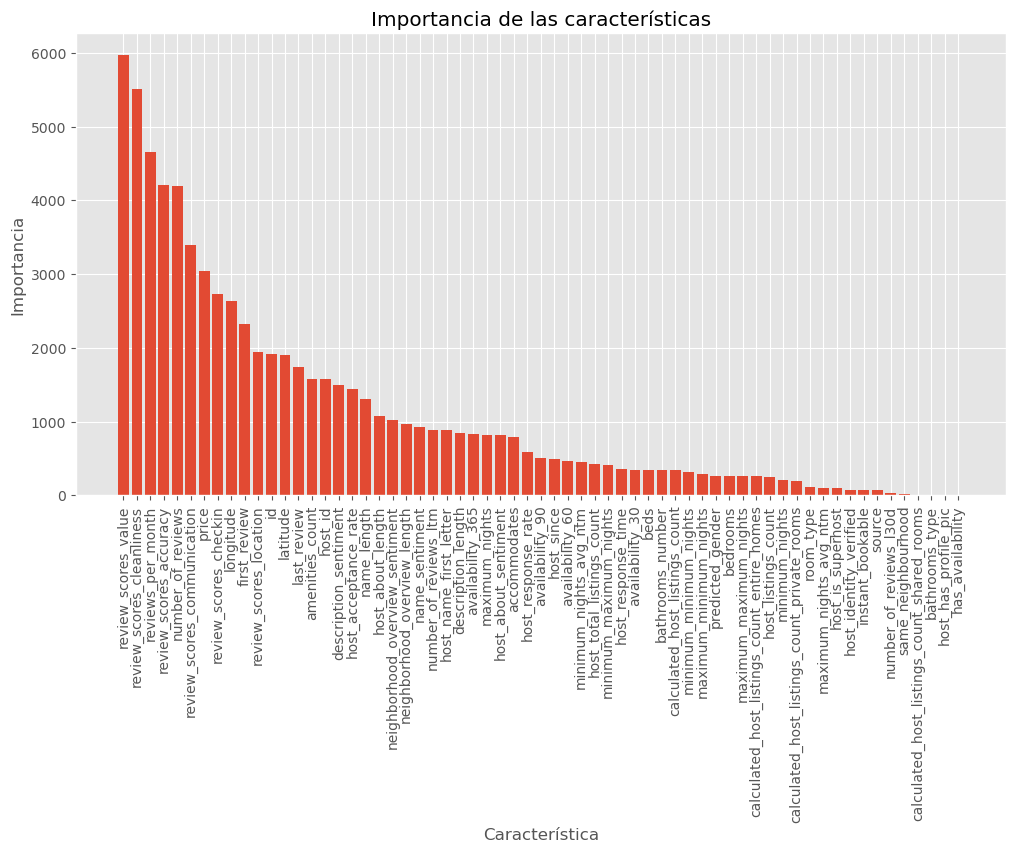

In [18]:
best_params = {
    'n_estimators': 1595,
    'max_depth': 11,
    'num_leaves': 172,
    'learning_rate': 0.0032423174463601257,
    'feature_fraction': 0.920330999733875,
    'bagging_fraction': 0.5107210736090633,
    'bagging_freq': 2,
    'lambda_l1': 1.632085265268351e-08,
    'lambda_l2': 6.767965596525974e-08,
    'min_child_samples': 18
}

best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2): {:.2f}".format(r2))


import matplotlib.pyplot as plt

# Obtener las características más importantes
importances = best_model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Crear un DataFrame con las características y sus importancias
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print("Características más importantes:")
print(importances_df)

# Visualizar las importancias de las características
plt.figure(figsize=(12, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()


In [19]:
# Predecir en la base 'val' sin la columna 'review_scores_rating'
X_val = val.drop('review_scores_rating', axis=1)
y_pred = best_model.predict(X_val)

# Crear un DataFrame con las predicciones
y_pred_df = pd.DataFrame(y_pred, columns=['review_scores_rating'])

# Concatenar las predicciones con la columna 'id' de la base 'val'
submission = pd.concat([val['id'], y_pred_df], axis=1)

# Imprimir el resultado
submission

id  review_scores_rating
0     568520730880917893              4.991046
1     568523400177884625              4.964503
2     568561397403760678              3.996285
3     568683128219348239              4.993373
4     570029413851129083              4.912704
...                  ...                   ...
1228              794322              4.740360
1229              800723              4.807113
1230              801544              4.563043
1231              802052              4.909459
1232              805330              4.934230

[1233 rows x 2 columns]

In [20]:
submission.to_csv('submission.csv', index=False)

## XGBoost

In [21]:
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the objective function for optimization
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 0.0001, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 0.0001, 1.0),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.001, 1.0)
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

# Get the best parameters and best model
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2): {:.2f}".format(r2))

# Print the best parameters found
print("Best Parameters:")
for param, value in best_params.items():
    print("{}: {}".format(param, value))



[I 2023-06-04 18:11:16,035] A new study created in memory with name: no-name-4f8d9310-e324-4b4a-a70e-d94cb7fbc7f6
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/3799063134.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/3799063134.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/3799063134.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

Mean Squared Error: 0.0374
Coefficient of Determination (R^2): 0.50
Best Parameters:
n_estimators: 1247
max_depth: 10
learning_rate: 0.005554283640731778
subsample: 0.5210694161676024
colsample_bytree: 0.6086278512734623
lambda: 0.0008596806067481562
alpha: 0.7605977334819833
min_child_weight: 0.02983999199987138


In [29]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir la función objetivo para la optimización
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.0001, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.0001, 1.0),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.001, 1.0)
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Crear un estudio de Optuna y optimizar la función objetivo
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Obtener los mejores parámetros y el mejor modelo
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2): {:.2f}".format(r2))

# Imprimir los mejores parámetros encontrados
print("Best Parameters:")
for param, value in best_params.items():
    print("{}: {}".format(param, value))


[I 2023-06-04 19:13:23,125] A new study created in memory with name: no-name-dc14d312-e4ba-4a8a-bef8-b9346b8ed038
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/1237386349.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/1237386349.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/1237386349.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

Mean Squared Error: 0.0427
Coefficient of Determination (R^2): 0.39
Best Parameters:
n_estimators: 1989
max_depth: 7
learning_rate: 0.006461279352267925
subsample: 0.6140791081073129
colsample_bytree: 0.5144208350889639
reg_alpha: 0.0003143560494074449
reg_lambda: 0.01388470944813011
min_child_weight: 0.0012668680555423398


[I 2023-06-05 13:56:34,785] A new study created in memory with name: no-name-e83f6acb-a9c8-4f3c-a4fa-708faf99a81a
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/760492083.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/760492083.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/var/folders/q_/r_vc8qlx2gjgzy57nd_nrykw0000gn/T/ipykernel_3180/760492083.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

Mean Squared Error: 0.0610
Coefficient of Determination (R^2): 0.51
Best Parameters:
n_estimators: 529
max_depth: 9
learning_rate: 0.033683406598546815
subsample: 0.9121129840919079
colsample_bytree: 0.9858040233557431
reg_alpha: 0.0012127722983405111
reg_lambda: 0.020978749461181303
min_child_weight: 0.12003126413539614


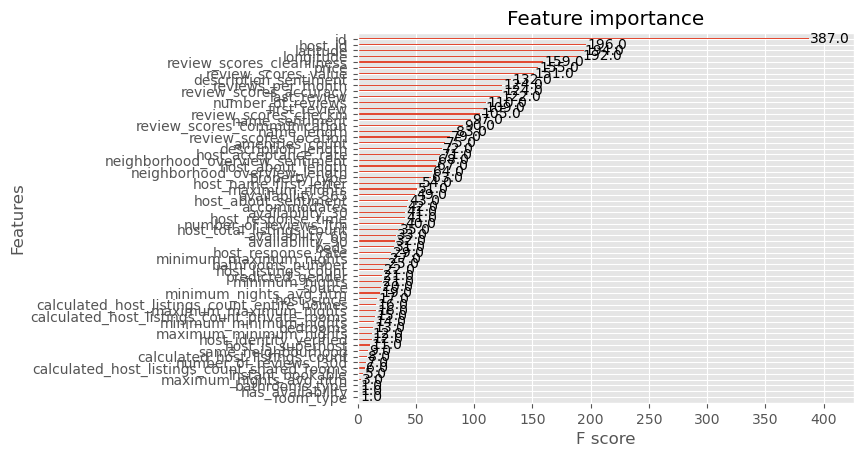

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import optuna

X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir la función objetivo para la optimización con Optuna
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.0001, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.0001, 1.0),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.001, 1.0)
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Crear un estudio de Optuna y optimizar la función objetivo
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Obtener los mejores parámetros y el mejor modelo
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2): {:.2f}".format(r2))

# Imprimir los mejores parámetros encontrados
print("Best Parameters:")
for param, value in best_params.items():
    print("{}: {}".format(param, value))


# Graficar las características más importantes
xgb.plot_importance(model)
plt.show()


In [41]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en características (X) y variable objetivo (y)
X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir la función de objetivo para la optimización
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 0.1)
    }
    
    # Crear el modelo XGBoost
    model = xgb.XGBRegressor(**params)
    
    # Entrenar el modelo y realizar predicciones en el conjunto de prueba
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params)

# Entrenar el mejor modelo con todos los datos de entrenamiento
best_model.fit(X, y)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2): {:.2f}".format(r2))

# Imprimir los mejores hiperparámetros encontrados
print("Best Parameters:")
for param, value in best_params.items():
    print("{}: {}".format(param, value))


[I 2023-06-05 14:58:11,359] A new study created in memory with name: no-name-a19069aa-3c51-4bd5-b429-b30dd9247048
[I 2023-06-05 14:58:21,020] Trial 0 finished with value: 0.024204052904014613 and parameters: {'n_estimators': 836, 'learning_rate': 0.059564127074921945, 'max_depth': 8, 'subsample': 0.9550674866400045, 'colsample_bytree': 0.9615577774263695, 'reg_alpha': 0.0899697499412552, 'reg_lambda': 0.024234086957953583}. Best is trial 0 with value: 0.024204052904014613.
[I 2023-06-05 14:58:26,669] Trial 1 finished with value: 0.01940206615999862 and parameters: {'n_estimators': 779, 'learning_rate': 0.03444386869770685, 'max_depth': 5, 'subsample': 0.9195711782206286, 'colsample_bytree': 0.8196860770222697, 'reg_alpha': 0.09802915640150416, 'reg_lambda': 0.01364055936815497}. Best is trial 1 with value: 0.01940206615999862.
[I 2023-06-05 14:58:28,145] Trial 2 finished with value: 0.31143630269049816 and parameters: {'n_estimators': 199, 'learning_rate': 0.0104303255743499, 'max_dept

Mean Squared Error: 0.0076
Coefficient of Determination (R^2): 0.84
Best Parameters:
n_estimators: 254
learning_rate: 0.041053400405364426
max_depth: 3
subsample: 0.810384986698915
colsample_bytree: 0.9000004330588033
reg_alpha: 0.046062731387814373
reg_lambda: 0.03956313215722197


In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en características (X) y variable objetivo (y)
X_val = val.drop('review_scores_rating', axis=1)
y_val = val['review_scores_rating']

# Definir los mejores hiperparámetros encontrados
best_params = {
    'n_estimators': 254,
    'learning_rate': 0.041053400405364426,
    'max_depth': 3,
    'subsample': 0.810384986698915,
    'colsample_bytree': 0.9000004330588033,
    'reg_alpha': 0.046062731387814373,
    'reg_lambda': 0.03956313215722197
}

# Crear el modelo XGBoost con los mejores hiperparámetros
model = xgb.XGBRegressor(**best_params)

# Entrenar el modelo con todos los datos de entrenamiento y validación
model.fit(X, y)

# Realizar predicciones en el conjunto de validación
y_pred_val = model.predict(X_val)
# Crear un DataFrame con las predicciones en la base 'val'
y_pred_val_df = pd.DataFrame(y_pred_val, columns=['review_scores_rating'])

# Concatenar las predicciones con la columna 'id' de la base 'val'
submission = pd.concat([val['id'], y_pred_val_df], axis=1)

# Imprimir el resultado en la base 'val'
print("Predictions on validation data:")
print(submission)


Predictions on validation data:
                      id  review_scores_rating
0     568520730880917893              4.941219
1     568523400177884625              4.909408
2     568561397403760678              4.013632
3     568683128219348239              4.943851
4     570029413851129083              4.861931
...                  ...                   ...
1228              794322              4.735827
1229              800723              4.783823
1230              801544              4.540090
1231              802052              4.903596
1232              805330              4.961573

[1233 rows x 2 columns]


In [43]:
submission.to_csv('submission.csv', index=False)

In [57]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en características (X) y variable objetivo (y)
X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir la función de objetivo para la optimización
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1.0)
    }
    
    # Crear el modelo XGBoost
    model = xgb.XGBRegressor(**params)
    
    # Entrenar el modelo y realizar predicciones en el conjunto de prueba
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params)

# Entrenar el mejor modelo con todos los datos de entrenamiento
best_model.fit(X, y)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2): {:.2f}".format(r2))

# Imprimir los mejores hiperparámetros encontrados
print("Best Parameters:")
for param, value in best_params.items():
    print("{}: {}".format(param, value))


[I 2023-06-06 16:03:03,676] A new study created in memory with name: no-name-5dbee12c-2567-4dc0-9581-9f1321cb8c03
[I 2023-06-06 16:03:06,557] Trial 0 finished with value: 0.02203965622480075 and parameters: {'n_estimators': 182, 'learning_rate': 0.08531973950765925, 'max_depth': 10, 'subsample': 0.8247142131005809, 'colsample_bytree': 0.9197238887512529, 'reg_alpha': 0.35190804599762215, 'reg_lambda': 0.7906224306969102}. Best is trial 0 with value: 0.02203965622480075.
[I 2023-06-06 16:03:08,964] Trial 1 finished with value: 0.016063545116557124 and parameters: {'n_estimators': 496, 'learning_rate': 0.07406893822814613, 'max_depth': 3, 'subsample': 0.8195987151755649, 'colsample_bytree': 0.9550510672182406, 'reg_alpha': 0.5464300026159412, 'reg_lambda': 0.9952432864802652}. Best is trial 1 with value: 0.016063545116557124.
[I 2023-06-06 16:03:11,640] Trial 2 finished with value: 0.01837633897820742 and parameters: {'n_estimators': 182, 'learning_rate': 0.08763129951416719, 'max_depth'

Mean Squared Error: 0.0031
Coefficient of Determination (R^2): 0.94
Best Parameters:
n_estimators: 186
learning_rate: 0.04765219736762623
max_depth: 9
subsample: 0.8301927287678409
colsample_bytree: 0.8449637168404809
reg_alpha: 0.9319868562050577
reg_lambda: 0.8167343098379423


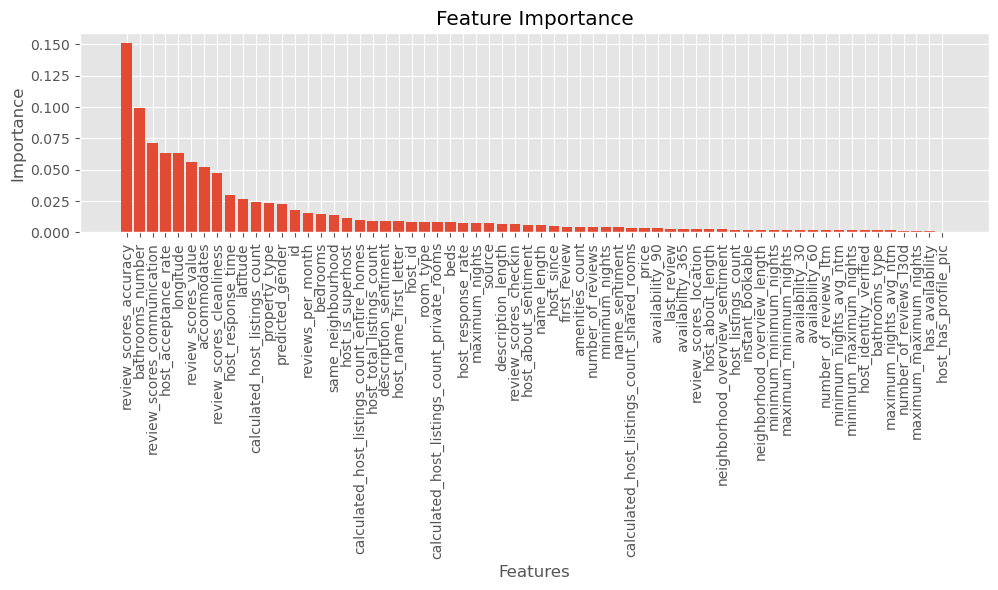

In [58]:
import matplotlib.pyplot as plt

# Entrenar el mejor modelo con todos los datos de entrenamiento
best_model.fit(X, y)

# Obtener la importancia de las características
importance = best_model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Ordenar las características por su importancia
indices = importance.argsort()[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_sorted)), importance_sorted)
plt.xticks(range(len(importance_sorted)), feature_names_sorted, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [48]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en características (X) y variable objetivo (y)
X_val = val.drop('review_scores_rating', axis=1)
y_val = val['review_scores_rating']

# Definir los mejores hiperparámetros encontrados: me dieron 0.92 en train.
best_params = {
    'n_estimators': 298,
    'learning_rate': 0.09098432109637429,
    'max_depth': 4,
    'subsample': 0.87858319010013,
    'colsample_bytree': 0.9554272500395405,
    'reg_alpha': 0.5065495866770399,
    'reg_lambda': 0.830434717842716
}

# Crear el modelo XGBoost con los mejores hiperparámetros
model = xgb.XGBRegressor(**best_params)

# Entrenar el modelo con todos los datos de entrenamiento
model.fit(X, y)

# Realizar predicciones en el conjunto de validación
y_pred_val = model.predict(X_val)


# Crear un DataFrame con las predicciones en la base 'val'
y_pred_val_df = pd.DataFrame(y_pred_val, columns=['review_scores_rating'])

# Concatenar las predicciones con la columna 'id' de la base 'val'
submission = pd.concat([val['id'], y_pred_val_df], axis=1)

# Imprimir el resultado en la base 'val'
print("Predictions on validation data:")
print(submission)


Predictions on validation data:
                      id  review_scores_rating
0     568520730880917893              4.999352
1     568523400177884625              4.968284
2     568561397403760678              4.110758
3     568683128219348239              5.015251
4     570029413851129083              4.893129
...                  ...                   ...
1228              794322              4.753377
1229              800723              4.833302
1230              801544              4.526721
1231              802052              4.906047
1232              805330              4.974673

[1233 rows x 2 columns]


In [51]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en características (X) y variable objetivo (y)
X = train.drop('review_scores_rating', axis=1)
y = train['review_scores_rating']

# Definir los mejores hiperparámetros encontrados
best_params = {
    'n_estimators': 977,
    'learning_rate': 0.041225842739811155,
    'max_depth': 10,
    'subsample': 0.9071406128143468,
    'colsample_bytree': 0.9819524001617075,
    'reg_alpha': 0.3939158347666872,
    'reg_lambda': 0.10013531815980453
}

# Crear el modelo XGBoost con los mejores hiperparámetros
model = xgb.XGBRegressor(**best_params)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X, y)

# Realizar la validación cruzada
cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
mse_scores = -cv_scores  # Convertir los scores negativos a positivos

# Calcular el promedio de MSE y R^2 en los conjuntos de prueba
mean_mse = mse_scores.mean()
mean_r2 = r2_score(y, model.predict(X))

# Imprimir los resultados
print("Cross-Validation Mean Squared Error: {:.4f}".format(mean_mse))
print("Cross-Validation Coefficient of Determination (R^2): {:.2f}".format(mean_r2))


Cross-Validation Mean Squared Error: 0.0553
Cross-Validation Coefficient of Determination (R^2): 1.00


In [52]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en características (X) y variable objetivo (y)
X_val = val.drop('review_scores_rating', axis=1)
y_val = val['review_scores_rating']

# Definir los mejores hiperparámetros encontrados: me dieron 0.92 en train.
best_params = {
    'n_estimators': 977,
    'learning_rate': 0.041225842739811155,
    'max_depth': 10,
    'subsample': 0.9071406128143468,
    'colsample_bytree': 0.9819524001617075,
    'reg_alpha': 0.3939158347666872,
    'reg_lambda': 0.10013531815980453
}

# Crear el modelo XGBoost con los mejores hiperparámetros
model = xgb.XGBRegressor(**best_params)

# Entrenar el modelo con todos los datos de entrenamiento
model.fit(X, y)

# Realizar predicciones en el conjunto de validación
y_pred_val = model.predict(X_val)


# Crear un DataFrame con las predicciones en la base 'val'
y_pred_val_df = pd.DataFrame(y_pred_val, columns=['review_scores_rating'])

# Concatenar las predicciones con la columna 'id' de la base 'val'
submission = pd.concat([val['id'], y_pred_val_df], axis=1)

# Imprimir el resultado en la base 'val'
print("Predictions on validation data:")
print(submission)

Predictions on validation data:
                      id  review_scores_rating
0     568520730880917893              4.907458
1     568523400177884625              4.922049
2     568561397403760678              3.980309
3     568683128219348239              4.927979
4     570029413851129083              4.784629
...                  ...                   ...
1228              794322              4.723949
1229              800723              4.804412
1230              801544              4.562762
1231              802052              4.906806
1232              805330              4.974010

[1233 rows x 2 columns]


In [55]:
import numpy as np

# Truncar las predicciones para asegurarse de que estén en el rango [0, 5]

y_pred_val_truncated = np.clip(y_pred_val, 0, 5)


# Crear un DataFrame con las predicciones truncadas en la base 'val'
y_pred_val_truncated_df = pd.DataFrame(y_pred_val_truncated, columns=['review_scores_rating'])

# Concatenar las predicciones truncadas con la columna 'id' de la base 'val'
submission_truncated = pd.concat([val['id'], y_pred_val_truncated_df], axis=1)

# Imprimir el resultado en la base 'val' truncada
print("Truncated predictions on validation data:")
print(submission_truncated)
submission_truncated.to_csv('submission.csv', index=False)

Truncated predictions on validation data:
                      id  review_scores_rating
0     568520730880917893              4.907458
1     568523400177884625              4.922049
2     568561397403760678              3.980309
3     568683128219348239              4.927979
4     570029413851129083              4.784629
...                  ...                   ...
1228              794322              4.723949
1229              800723              4.804412
1230              801544              4.562762
1231              802052              4.906806
1232              805330              4.974010

[1233 rows x 2 columns]
